In [1]:
!pip install scikit-optimize

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import statsmodels.stats.api as sms
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Functions

In [4]:
from sklearn import metrics

def mae(y_gt, Y_pr):
    return metrics.mean_absolute_error(y_gt, Y_pr)

def mse(y_gt, Y_pr):
    return metrics.mean_squared_error(y_gt, Y_pr)

def rmse(y_gt, Y_pr):
    my_mse = mse(y_gt, Y_pr)
    return np.sqrt(my_mse)

def medae(y_gt, Y_pr):
    return metrics.median_absolute_error(y_gt, Y_pr)

def R2(y_gt, Y_pr):
    return metrics.r2_score(y_gt, Y_pr)

def calc_metrics(true, pred):

    mse1 = mse(true, pred)

    rmse1 = rmse(true, pred)

    mae1 = mae(true, pred)

    medae1 = medae(true, pred)

    R21 = R2(true, pred)

    print('*** VAL **: ')
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse1, rmse1, R21, mae1, medae1))
    print('-'*30)

In [5]:
def target_distr_linear(train_label, test_label, predicted_dv): 
    sns.kdeplot(train_label, label='train')
    sns.kdeplot(test_label, label='test')
    sns.kdeplot(predicted_dv, label='pred')
    plt.legend()
    plt.show()

    sns.scatterplot(test_label, predicted_dv, color='blueviolet')
    plt.title('Linear model')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

In [6]:
from scipy.stats import norm

def draw_histogram(data):
    f,ax_hist = plt.subplots(1)
    sns.distplot(data, hist=True,  kde=True, rug=True, bins=10, fit=norm, ax=ax_hist);
    plt.xlabel("values")
    plt.title("Distribution") 

    mean=data.mean()

    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean={mean:.3f}")
    ax_hist.legend()

    plt.show()

In [7]:
def draw_res_analys(errors, pred):
    sns.scatterplot(list(range(len(errors))),errors);
    plt.title("Distibution of errors")
    plt.ylabel('Error');
    plt.xlabel('Index');
    plt.show();

    sns.scatterplot(pred,errors);
    plt.title('Relationship of true value vs error (resudual analysis)')
    plt.ylabel('Error');
    plt.xlabel('True value');
    plt.show();

In [8]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp, y=model.feature_names_)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

# Unhashing

In [9]:
genre_mapping = {'0ef0aa70-f86c-4141-8054-8b39af97867d': 'Biography',
                '287a1485-7a88-4c2f-bc94-ca418b6c47a1': 'Cartoons',
                '66fad8c3-d84f-458d-a8bf-5b4f154969e0': 'Show',
                '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Theater',
                '9fa28b61-a257-4a3e-945b-a9ef76a146d6': 'Fantasy',
                'b0836a1d-635f-4d89-bcc5-25d10ba56642': 'Anime',
                'd7214feb-8c11-4aea-aabb-ac98a8d56fd5': 'History',
                'dc65dbc8-34ba-4df1-b32c-4f895e10bff8': 'Shorts',
                'eb001d27-5be3-4d42-9d88-90d593f2627d': 'War_movies',
                '364fdc2e-bdfe-40be-b2c5-d30f43ec432e': 'Crime'}

In [10]:
types_mapping = {'1f22ccf1-288a-4e6e-b39a-7502799e7125': 'Лекции',
    '6d640e04-be3a-4c8c-852e-4e9b12449d5d': 'Концерты',
    '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Театр',
    '2f7908cc-e2fd-43cf-b626-ec1aef436160': 'Курсы' }

In [11]:
import pickle

with open('./income_target.pkl', 'rb') as f:
    df = pickle.load(f, encoding='utf-8')

In [12]:
df.shape

(6036, 21)

In [13]:
all_genres = []

for item_genres in df['genre']:
    all_genres.extend(item_genres)

In [14]:
all_unique_genres = set(all_genres)

In [15]:
len(all_unique_genres)

27

In [16]:
all_unique_genres

{'0ef0aa70-f86c-4141-8054-8b39af97867d',
 '287a1485-7a88-4c2f-bc94-ca418b6c47a1',
 '364fdc2e-bdfe-40be-b2c5-d30f43ec432e',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 '7b7c97f6-1adb-4b43-bfe8-9455812fac0b',
 '9fa28b61-a257-4a3e-945b-a9ef76a146d6',
 'Action',
 'Adventure',
 'ArtHouse',
 'Comedy',
 'Detective',
 'Documentary',
 'Drama',
 'Family',
 'ForKids',
 'Horror',
 'Humor',
 'Melodrama',
 'Music',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'b0836a1d-635f-4d89-bcc5-25d10ba56642',
 'd7214feb-8c11-4aea-aabb-ac98a8d56fd5',
 'dc65dbc8-34ba-4df1-b32c-4f895e10bff8',
 'eb001d27-5be3-4d42-9d88-90d593f2627d'}

In [17]:
decoded_genres = [genre_mapping.get(genre, genre) for genre in all_unique_genres]

In [18]:
decoded_genres

['Comedy',
 'Shorts',
 'Humor',
 'Cartoons',
 'Crime',
 'Biography',
 'Horror',
 'Music',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 'ArtHouse',
 'Adventure',
 'Sport',
 'Documentary',
 'Melodrama',
 'History',
 'Theater',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 'Anime',
 'Drama',
 'Sci-Fi',
 'War_movies',
 'Detective',
 'ForKids',
 'Fantasy',
 'Family',
 'Action',
 'Thriller']

In [19]:
all_genres = []

for col in ['actor', 'country', 'genre', 'director']:
    print(f'======{col}======')
    all_values = []
    for i, item_values in enumerate(df[col]):
        try:
            all_values.extend(item_values)
        except:
            print(i, item_values)
    all_values = set(all_values)
    print('Len:', len(all_values))
    # print(all_values)

======actor======
Len: 19196
======country======
Len: 98
======genre======
Len: 27
======director======
Len: 4178


# Preprocessing

In [20]:
prep_df = df.copy(deep=True)

In [21]:
prep_df.shape

(6036, 21)

In [22]:
prep_df.head(1).T

0
availability                                           [SUBSCRIPTION]
actor               [cff3362f-ad91-498d-80b3-ea3ab8ec65cf, a51b376...
age_access_type                                                     0
country                                                 [usa, canada]
average_rating                                                   6.21
duration                                                      4860000
type                                                            MOVIE
name                                              Большое путешествие
release_year                                                     2006
genre                  [Family, 287a1485-7a88-4c2f-bc94-ca418b6c47a1]
director                       [fe598c84-ef4f-47c7-91af-d5cbd89c4e8d]
element_uid                      d8b55146-dee5-4498-957c-5614414b48fb
subscription_only                                                True
av_rate_x                                                   -0.043478
av_rate_y                                                   -0.041667
users_number_x                                                      1
users_number_y                                                      1
user_count_3months                                                  1
av_ratings_3months                                          -0.043478
min_ts                                            2020-09-23 17:37:14
price                                                         56468.0

In [23]:
!pip install gensim

In [24]:
from gensim.models import Word2Vec


class Cat2Vec:
    def __init__(self, n_cat2vec_feature,
                    n_cat2vec_window):
        self.n_cat2vec_feature = n_cat2vec_feature
        self.n_cat2vec_window = n_cat2vec_window
    
    def __create_tokens(self, col_name, values):
        return [f'{col_name} {value}' for value in values]
    
    def __gen_cat2vec_sentences(self, data):
        items = []

        for i, row in data.iterrows():
            item_values = []
            for col, values in zip(row.index, row.values):
                item_values.extend(self.__create_tokens(col, values))
            # shuffle(item_values)
            items.append(item_values)
        return items
    
    def fit(self, cat_features: pd.DataFrame):
        X_w2v = self.__gen_cat2vec_sentences(cat_features)
        self.model = Word2Vec(X_w2v, vector_size=self.n_cat2vec_feature, 
                         window=self.n_cat2vec_window, epochs=5, min_count=2)
        
    def transform(self, cat_features: pd.DataFrame):
        encoded_features = pd.DataFrame()
        for col in cat_features.columns:
            tokens = [self.__create_tokens(col, row) for row in cat_features[col]]
            col_embeds = []
            for row in tokens:
                avg_embeds = np.mean([self.model.wv[token] for token in row if token in self.model.wv.key_to_index], 
                                          axis=0)
                if isinstance(avg_embeds, np.float64):
                    avg_embeds = [np.nan] * self.n_cat2vec_feature
                    
                col_embeds.append(avg_embeds)
            col_embeds = pd.DataFrame(col_embeds, columns=[f'{col}_{i}' for i in range(self.n_cat2vec_feature)])
            encoded_features = pd.concat([encoded_features, col_embeds], axis=1)

        return encoded_features

    
class Preprocesser:
    def __init__(self, 
                 mulpiple_cat_features: list,
                 skewed_num_features: list,
#                  text_features: list,
                 cat_features: list,
                 mltpl_cat_n_top: dict,
                 n_cat2vec_feature: int, 
                 n_cat2vec_window: int):
        self.mulpiple_cat_features = mulpiple_cat_features
        self.skewed_num_features = skewed_num_features
#         self.text_features = text_features
        self.mltpl_cat_n_top = mltpl_cat_n_top
        self.cat_features = cat_features
        
        self.cat2vec = Cat2Vec(n_cat2vec_feature, n_cat2vec_window)
        
    def __get_top_n_mltpl_cat_features(self, df_pr, col):
        all_cats = []
        for element_values in df_pr[col]:
            all_cats.extend(element_values)
        return Counter(all_cats).most_common(self.mltpl_cat_n_top[col])
            
    def __preprocess_mulpiple_cat_features(self, df_pr):
        features = self.cat2vec.transform(df_pr[self.mulpiple_cat_features])
        df_pr[features.columns] = features
        df_pr.drop(self.mulpiple_cat_features, axis=1, inplace=True)
        
        return df_pr
    
    def __preprocess_skewed_num_features(self, df_pr):
        for col in self.skewed_num_features:
            df_pr[col] = df_pr[col].apply(lambda x: np.log1p(x))
        return df_pr
    
    def __preprocess_text_features(self, df_pr):
        for col in self.text_features:
            df_pr[[f'{col}_{i}' for i in range(768)]] = self.embed_model.encode(df_pr[col].values)
            df_pr.drop(col, axis=1, inplace=True)
        return df_pr
    
    def __get_unique_values(self, feature):
        unique_values = []
        print('feature: ', feature)
        for element in feature.dropna():
            unique_values.extend(element)
        return set(unique_values)
    
    def __preprocess_cat_features(self, df_pr):
        for col in self.cat_features:
            unique_values = self.__get_unique_values(df_pr[col])
            cats_df = pd.DataFrame(np.full((len(df_pr), len(unique_values)),
                                            0),
                                   columns=list(unique_values))
            
            for i, element in enumerate(df_pr[col]):
                if isinstance(element, float):
                    cats_df.loc[i, :] = 'Na'
                    continue
                for value in element:
                    cats_df.loc[i, value] = '1'
            df_pr.drop(col, axis=1, inplace=True)
        df_pr[cats_df.columns] = cats_df
        return df_pr  
            
    def fit(self, 
            df: pd.DataFrame):
        self.cat2vec.fit(df[self.mulpiple_cat_features])
        
    def preprocess(self,
                   df: pd.DataFrame):
        df_pr = df.copy()
        df_pr = self.__preprocess_mulpiple_cat_features(df_pr)
        df_pr = self.__preprocess_skewed_num_features(df_pr)
#         df_pr = self.__preprocess_cat_features(df_pr)
        
        return df_pr
        
        
class TargetTransformer:
    def __init__(self, denominator=1):
        self.scale = denominator
        
    def inverse_transform(self, feature):
        return feature.apply(lambda x: np.expm1(x))
    
    def transform(self, feature):
        return feature.apply(lambda x: np.log1p(x))

In [25]:
# types for preprocessing
mltpl_cat_features = ['actor', 'country', 'genre', 'director']
cat_features = ['age_access_type', 'type']
num_features = ['duration']
skewed_num_features = ['duration']
mltpl_cat_n_top = {'actor': 5, 'country': 3, 'genre': 3, 'director': 1}

cat_cols = ['actor', 'genre', 'director', 'country']
n_cat2vec_feature  = len(cat_cols) * 2  # define the cat2vecs dimentions
n_cat2vec_window   = len(cat_cols) * 2

In [26]:
df_modern = prep_df[prep_df['release_year'] >= 2000]
# df_short = df_modern[df_modern['target'] < 0.02]
df_modern.reset_index(drop=True, inplace=True)

In [27]:

df_modern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   availability        4998 non-null   object        
 1   actor               5023 non-null   object        
 2   age_access_type     5023 non-null   object        
 3   country             5023 non-null   object        
 4   average_rating      4845 non-null   object        
 5   duration            5023 non-null   object        
 6   type                5023 non-null   object        
 7   name                5023 non-null   object        
 8   release_year        5023 non-null   object        
 9   genre               5023 non-null   object        
 10  director            5023 non-null   object        
 11  element_uid         5023 non-null   object        
 12  subscription_only   5023 non-null   object        
 13  av_rate_x           5023 non-null   float64     

In [28]:
prep_df['age_access_type'] = prep_df['age_access_type'].astype(str)
prep_df['type'] = prep_df['type'].astype(str)

In [29]:
preprocesser = Preprocesser(mltpl_cat_features,
                            skewed_num_features,
#                             text_features,
                            cat_features,
                            mltpl_cat_n_top,
                            n_cat2vec_feature, 
                            n_cat2vec_window)

preprocesser.fit(df_modern)
df_pr = preprocesser.preprocess(df_modern)

In [30]:
df_pr.head().T

0  \
availability                              [SUBSCRIPTION]   
age_access_type                                        0   
average_rating                                      6.21   
duration                                       15.396549   
type                                               MOVIE   
name                                 Большое путешествие   
release_year                                        2006   
element_uid         d8b55146-dee5-4498-957c-5614414b48fb   
subscription_only                                   True   
av_rate_x                                      -0.043478   
av_rate_y                                      -0.041667   
users_number_x                                         1   
users_number_y                                         1   
user_count_3months                                     1   
av_ratings_3months                             -0.043478   
min_ts                               2020-09-23 17:37:14   
price                                            56468.0   
actor_0                                        -0.158949   
actor_1                                         0.019798   
actor_2                                         0.161149   
actor_3                                         0.105583   
actor_4                                         0.054443   
actor_5                                        -0.201666   
actor_6                                         0.253141   
actor_7                                         0.040384   
country_0                                      -1.406707   
country_1                                       0.638873   
country_2                                       3.500556   
country_3                                        2.35779   
country_4                                       0.887864   
country_5                                      -3.672313   
country_6                                       3.891393   
country_7                                       0.880589   
genre_0                                        -1.356784   
genre_1                                         0.618159   
genre_2                                         3.027932   
genre_3                                         2.089056   
genre_4                                         0.905293   
genre_5                                         -3.15412   
genre_6                                         3.551823   
genre_7                                         0.683331   
director_0                                           NaN   
director_1                                           NaN   
director_2                                           NaN   
director_3                                           NaN   
director_4                                           NaN   
director_5                                           NaN   
director_6                                           NaN   
director_7                                           NaN   

                                                       1  \
availability                                 [DTO, RENT]   
age_access_type                                       16   
average_rating                                       NaN   
duration                                       15.479437   
type                                               MOVIE   
name                                    Роман с кукушкой   
release_year                                        2021   
element_uid         a367ca50-ef7d-4a4c-b89a-c8692defa697   
subscription_only                                  False   
av_rate_x                                       0.010101   
av_rate_y                                       0.006173   
users_number_x                                         5   
users_number_y                                         6   
user_count_3months                                     5   
av_ratings_3months                              0.010101   
min_ts                               2022-07-14 11:49:33   
price                             

In [31]:
df_pr.isna().sum()

availability            25
age_access_type          0
average_rating         178
duration                 0
type                     0
name                     0
release_year             0
element_uid              0
subscription_only        0
av_rate_x                0
av_rate_y                0
users_number_x           0
users_number_y           0
user_count_3months       0
av_ratings_3months       0
min_ts                   0
price                    0
actor_0                406
actor_1                406
actor_2                406
actor_3                406
actor_4                406
actor_5                406
actor_6                406
actor_7                406
country_0                1
country_1                1
country_2                1
country_3                1
country_4                1
country_5                1
country_6                1
country_7                1
genre_0                  0
genre_1                  0
genre_2                  0
genre_3                  0
g

In [32]:
df_pr.columns

Index(['availability', 'age_access_type', 'average_rating', 'duration', 'type',
       'name', 'release_year', 'element_uid', 'subscription_only', 'av_rate_x',
       'av_rate_y', 'users_number_x', 'users_number_y', 'user_count_3months',
       'av_ratings_3months', 'min_ts', 'price', 'actor_0', 'actor_1',
       'actor_2', 'actor_3', 'actor_4', 'actor_5', 'actor_6', 'actor_7',
       'country_0', 'country_1', 'country_2', 'country_3', 'country_4',
       'country_5', 'country_6', 'country_7', 'genre_0', 'genre_1', 'genre_2',
       'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7', 'director_0',
       'director_1', 'director_2', 'director_3', 'director_4', 'director_5',
       'director_6', 'director_7'],
      dtype='object')

In [33]:
cf = ['actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'actor_5',
       'actor_6', 'actor_7', 'country_0', 'country_1', 'country_2',
       'country_3', 'country_4', 'country_5', 'country_6', 'country_7',
       'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5',
       'genre_6', 'genre_7', 'director_0', 'director_1', 'director_2',
       'director_3', 'director_4', 'director_5', 'director_6', 'director_7']

df_pr[cf] = df_pr[cf].replace(np.nan, 'Na')

### choose features

In [34]:
df_pr.head(1).T

0
availability                              [SUBSCRIPTION]
age_access_type                                        0
average_rating                                      6.21
duration                                       15.396549
type                                               MOVIE
name                                 Большое путешествие
release_year                                        2006
element_uid         d8b55146-dee5-4498-957c-5614414b48fb
subscription_only                                   True
av_rate_x                                      -0.043478
av_rate_y                                      -0.041667
users_number_x                                         1
users_number_y                                         1
user_count_3months                                     1
av_ratings_3months                             -0.043478
min_ts                               2020-09-23 17:37:14
price                                            56468.0
actor_0                                        -0.158949
actor_1                                         0.019798
actor_2                                         0.161149
actor_3                                         0.105583
actor_4                                         0.054443
actor_5                                        -0.201666
actor_6                                         0.253141
actor_7                                         0.040384
country_0                                      -1.406707
country_1                                       0.638873
country_2                                       3.500556
country_3                                        2.35779
country_4                                       0.887864
country_5                                      -3.672313
country_6                                       3.891393
country_7                                       0.880589
genre_0                                        -1.356784
genre_1                                         0.618159
genre_2                                         3.027932
genre_3                                         2.089056
genre_4                                         0.905293
genre_5                                         -3.15412
genre_6                                         3.551823
genre_7                                         0.683331
director_0                                            Na
director_1                                            Na
director_2                                            Na
director_3                                            Na
director_4                                            Na
director_5                                            Na
director_6                                            Na
director_7                                            Na

In [35]:
df_pr.columns

Index(['availability', 'age_access_type', 'average_rating', 'duration', 'type',
       'name', 'release_year', 'element_uid', 'subscription_only', 'av_rate_x',
       'av_rate_y', 'users_number_x', 'users_number_y', 'user_count_3months',
       'av_ratings_3months', 'min_ts', 'price', 'actor_0', 'actor_1',
       'actor_2', 'actor_3', 'actor_4', 'actor_5', 'actor_6', 'actor_7',
       'country_0', 'country_1', 'country_2', 'country_3', 'country_4',
       'country_5', 'country_6', 'country_7', 'genre_0', 'genre_1', 'genre_2',
       'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7', 'director_0',
       'director_1', 'director_2', 'director_3', 'director_4', 'director_5',
       'director_6', 'director_7'],
      dtype='object')

In [36]:
data = df_pr[['age_access_type', 'duration', 'type', 
       'price', 
       'actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'actor_5',
       'actor_6', 'actor_7', 'country_0', 'country_1', 'country_2',
       'country_3', 'country_4', 'country_5', 'country_6', 'country_7',
       'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5',
       'genre_6', 'genre_7', 'director_0', 'director_1', 'director_2',
       'director_3', 'director_4', 'director_5', 'director_6', 'director_7']]

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age_access_type  5023 non-null   object 
 1   duration         5023 non-null   float64
 2   type             5023 non-null   object 
 3   price            5023 non-null   float32
 4   actor_0          5023 non-null   object 
 5   actor_1          5023 non-null   object 
 6   actor_2          5023 non-null   object 
 7   actor_3          5023 non-null   object 
 8   actor_4          5023 non-null   object 
 9   actor_5          5023 non-null   object 
 10  actor_6          5023 non-null   object 
 11  actor_7          5023 non-null   object 
 12  country_0        5023 non-null   object 
 13  country_1        5023 non-null   object 
 14  country_2        5023 non-null   object 
 15  country_3        5023 non-null   object 
 16  country_4        5023 non-null   object 
 17  country_5     

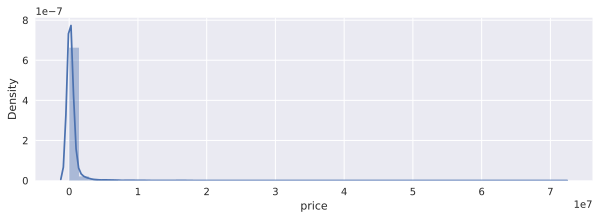

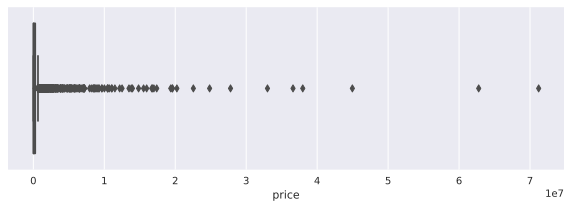

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

plt.figure(figsize=(10, 3))
sns.distplot(df_pr['price'])
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(df_pr['price'], orient='h')
plt.show()

## Split

In [39]:
data.shape

(5023, 36)

In [40]:
X, y = data.drop('price', axis=1), data['price']

y = y.apply(lambda x: np.log1p(x))

In [41]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=False)

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=False)

In [46]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((4068, 35), (452, 35), (503, 35), (4068,), (452,), (503,))

### Model

In [47]:
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint

In [48]:
X_train.head(1)

age_access_type   duration   type   actor_0   actor_1   actor_2   actor_3  \
0               0  15.396549  MOVIE -0.158949  0.019798  0.161149  0.105583   

    actor_4   actor_5   actor_6  ...   genre_6   genre_7 director_0  \
0  0.054443 -0.201666  0.253141  ...  3.551823  0.683331         Na   

  director_1 director_2 director_3 director_4 director_5 director_6  \
0         Na         Na         Na         Na         Na         Na   

   director_7  
0          Na  

[1 rows x 35 columns]

In [49]:
cat_features = ['age_access_type',
                'type']

In [50]:
train_dataset = cat.Pool(data=X_train,
                        label=y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(data=X_test, 
                        label=y_test,
                         cat_features=cat_features)

val_dataset = cat.Pool(X_val, 
                       y_val,
                       cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

cat_model = cat.CatBoostRegressor(**cat_params)

cat_model.fit(
    train_dataset,
    eval_set=val_dataset,
    early_stopping_rounds=500,
    verbose=100,
    plot=False
)

Learning rate set to 0.06347
0:	learn: 1.9535406	test: 2.1552784	best: 2.1552784 (0)	total: 51.1ms	remaining: 51s
100:	learn: 1.6676409	test: 1.9327905	best: 1.9327905 (100)	total: 291ms	remaining: 2.59s
200:	learn: 1.5408383	test: 1.9225316	best: 1.9168075 (164)	total: 525ms	remaining: 2.09s
300:	learn: 1.4292410	test: 1.9213842	best: 1.9109663 (273)	total: 763ms	remaining: 1.77s
400:	learn: 1.3253058	test: 1.9153754	best: 1.9109663 (273)	total: 997ms	remaining: 1.49s
500:	learn: 1.2373088	test: 1.9150830	best: 1.9109663 (273)	total: 1.23s	remaining: 1.23s
600:	learn: 1.1601443	test: 1.9115634	best: 1.9099142 (558)	total: 1.47s	remaining: 974ms
700:	learn: 1.0869178	test: 1.9209513	best: 1.9099142 (558)	total: 1.7s	remaining: 725ms
800:	learn: 1.0231945	test: 1.9222746	best: 1.9099142 (558)	total: 1.93s	remaining: 480ms
900:	learn: 0.9672204	test: 1.9261274	best: 1.9099142 (558)	total: 2.17s	remaining: 238ms
999:	learn: 0.9168196	test: 1.9230733	best: 1.9099142 (558)	total: 2.4s	remai

In [51]:
y_pred = cat_model.predict(test_dataset)

In [52]:
def inverse_transform(feature):
    return np.expm1(feature)

calc_metrics(inverse_transform(y_test), inverse_transform(y_pred))

*** VAL **: 
MSE:   163349424220.2036
RMSE:  404165.09525217983
R2:    -0.07374845192509794
MAE:   132947.92811884196
MedAE: 27337.098958080926
------------------------------


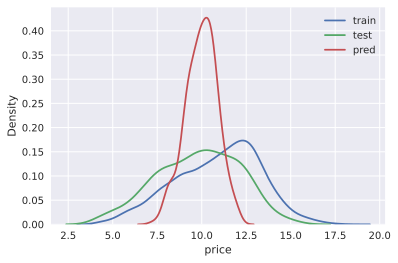

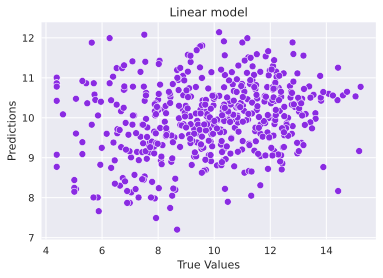

In [53]:
target_distr_linear(y_train, y_test, y_pred)   

### FI

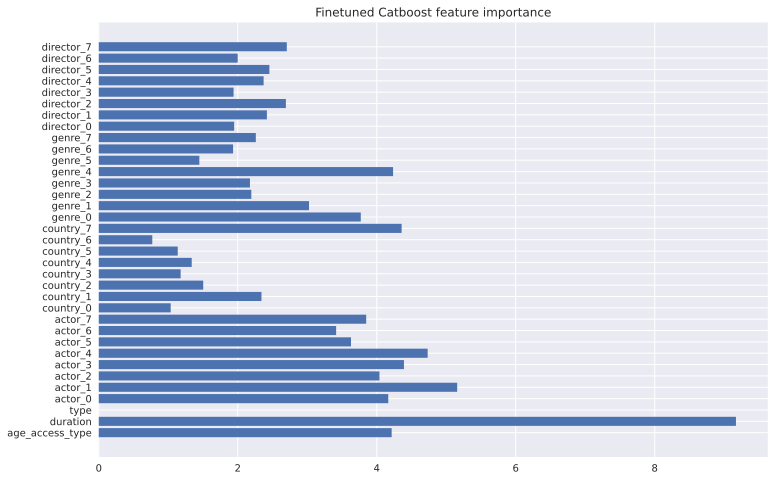

In [54]:
get_feature_imp(cat_model, train_dataset)

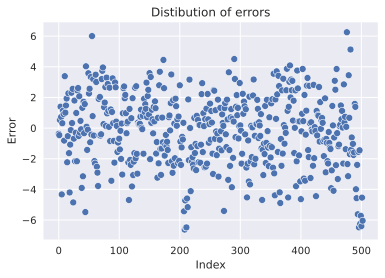

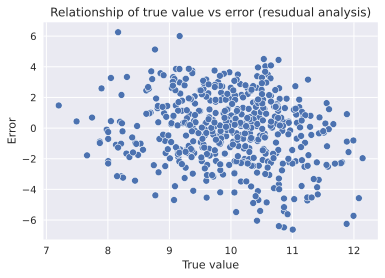

In [55]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)

In [56]:
cat_model.save_model('cat_reg_okko_ratings_cat2vec')

# Tuning

In [57]:
train_dataset = cat.Pool(X_train, 
                         y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(X_test, 
                        y_test,
                        cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

In [58]:
parameters_distr = {'depth': randint(3, 7),
              'learning_rate': uniform(0.01, 0.1),
              'iterations': [100, 1000, 5000]
             }

cat_model = cat.CatBoostRegressor(**cat_params)
grid = RandomizedSearchCV(estimator=cat_model, param_distributions=parameters_distr, 
                            cv=5,
#                           n_jobs=-1, 
                          verbose=3)

grid.fit(X_train, y_train)

import pickle
with open('bestimator_ratings_kinop', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)
grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 1.9606651	total: 1.33ms	remaining: 132ms
1:	learn: 1.9496008	total: 2.47ms	remaining: 121ms
2:	learn: 1.9419730	total: 3.59ms	remaining: 116ms
3:	learn: 1.9343765	total: 4.63ms	remaining: 111ms
4:	learn: 1.9268172	total: 5.67ms	remaining: 108ms
5:	learn: 1.9188660	total: 6.68ms	remaining: 105ms
6:	learn: 1.9111252	total: 7.74ms	remaining: 103ms
7:	learn: 1.9031795	total: 8.76ms	remaining: 101ms
8:	learn: 1.8962229	total: 9.79ms	remaining: 98.9ms
9:	learn: 1.8909629	total: 10.8ms	remaining: 97.5ms
10:	learn: 1.8867883	total: 11.8ms	remaining: 95.8ms
11:	learn: 1.8823184	total: 12.8ms	remaining: 94.1ms
12:	learn: 1.8785998	total: 13.8ms	remaining: 92.6ms
13:	learn: 1.8760042	total: 14.9ms	remaining: 91.3ms
14:	learn: 1.8714866	total: 15.9ms	remaining: 89.9ms
15:	learn: 1.8675876	total: 16.8ms	remaining: 88.3ms
16:	learn: 1.8646640	total: 17.8ms	remaining: 87.1ms
17:	learn: 1.8605087	total: 18.8ms	remaining: 85.8ms
18:

57:	learn: 1.7838548	total: 60.6ms	remaining: 43.9ms
58:	learn: 1.7828615	total: 61.7ms	remaining: 42.9ms
59:	learn: 1.7818488	total: 62.9ms	remaining: 41.9ms
60:	learn: 1.7806937	total: 63.9ms	remaining: 40.9ms
61:	learn: 1.7799219	total: 65ms	remaining: 39.8ms
62:	learn: 1.7785579	total: 66ms	remaining: 38.7ms
63:	learn: 1.7773104	total: 67.7ms	remaining: 38.1ms
64:	learn: 1.7759512	total: 68.7ms	remaining: 37ms
65:	learn: 1.7744929	total: 69.7ms	remaining: 35.9ms
66:	learn: 1.7733820	total: 70.7ms	remaining: 34.8ms
67:	learn: 1.7724378	total: 71.7ms	remaining: 33.8ms
68:	learn: 1.7710174	total: 72.8ms	remaining: 32.7ms
69:	learn: 1.7701910	total: 73.7ms	remaining: 31.6ms
70:	learn: 1.7694518	total: 74.8ms	remaining: 30.5ms
71:	learn: 1.7680755	total: 75.8ms	remaining: 29.5ms
72:	learn: 1.7669490	total: 76.8ms	remaining: 28.4ms
73:	learn: 1.7660732	total: 77.8ms	remaining: 27.4ms
74:	learn: 1.7652881	total: 78.9ms	remaining: 26.3ms
75:	learn: 1.7640849	total: 79.9ms	remaining: 25.2ms

85:	learn: 1.7264505	total: 87.6ms	remaining: 14.3ms
86:	learn: 1.7259502	total: 88.7ms	remaining: 13.3ms
87:	learn: 1.7253568	total: 89.8ms	remaining: 12.2ms
88:	learn: 1.7243625	total: 90.8ms	remaining: 11.2ms
89:	learn: 1.7232575	total: 91.8ms	remaining: 10.2ms
90:	learn: 1.7225709	total: 92.8ms	remaining: 9.18ms
91:	learn: 1.7216816	total: 93.7ms	remaining: 8.15ms
92:	learn: 1.7206835	total: 94.7ms	remaining: 7.13ms
93:	learn: 1.7200896	total: 95.7ms	remaining: 6.11ms
94:	learn: 1.7195716	total: 96.7ms	remaining: 5.09ms
95:	learn: 1.7186528	total: 97.7ms	remaining: 4.07ms
96:	learn: 1.7181167	total: 98.9ms	remaining: 3.06ms
97:	learn: 1.7173063	total: 99.9ms	remaining: 2.04ms
98:	learn: 1.7165035	total: 101ms	remaining: 1.02ms
99:	learn: 1.7158119	total: 102ms	remaining: 0us
[CV 5/5] END depth=4, iterations=100, learning_rate=0.04929041199599755;, score=-0.083 total time=   0.1s
0:	learn: 1.9672554	total: 1.78ms	remaining: 176ms
1:	learn: 1.9634989	total: 3.2ms	remaining: 157ms
2:	

34:	learn: 1.8834809	total: 48.8ms	remaining: 90.6ms
35:	learn: 1.8819571	total: 50.3ms	remaining: 89.5ms
36:	learn: 1.8800755	total: 51.7ms	remaining: 88.1ms
37:	learn: 1.8784429	total: 53.1ms	remaining: 86.6ms
38:	learn: 1.8765720	total: 54.5ms	remaining: 85.2ms
39:	learn: 1.8746913	total: 55.9ms	remaining: 83.8ms
40:	learn: 1.8728675	total: 57.2ms	remaining: 82.3ms
41:	learn: 1.8712824	total: 58.5ms	remaining: 80.8ms
42:	learn: 1.8700720	total: 59.8ms	remaining: 79.3ms
43:	learn: 1.8687081	total: 61.2ms	remaining: 77.9ms
44:	learn: 1.8671211	total: 62.6ms	remaining: 76.5ms
45:	learn: 1.8657171	total: 63.9ms	remaining: 75ms
46:	learn: 1.8643013	total: 65.3ms	remaining: 73.6ms
47:	learn: 1.8628087	total: 66.6ms	remaining: 72.2ms
48:	learn: 1.8615131	total: 68ms	remaining: 70.7ms
49:	learn: 1.8603729	total: 69.3ms	remaining: 69.3ms
50:	learn: 1.8588400	total: 70.7ms	remaining: 67.9ms
51:	learn: 1.8572461	total: 72ms	remaining: 66.5ms
52:	learn: 1.8563438	total: 73.4ms	remaining: 65.1ms

[CV 5/5] END depth=5, iterations=100, learning_rate=0.018345500759646728;, score=-0.126 total time=   0.2s
0:	learn: 1.9571300	total: 1.23ms	remaining: 121ms
1:	learn: 1.9429329	total: 2.31ms	remaining: 113ms
2:	learn: 1.9341195	total: 3.41ms	remaining: 110ms
3:	learn: 1.9246565	total: 4.43ms	remaining: 106ms
4:	learn: 1.9154612	total: 5.45ms	remaining: 103ms
5:	learn: 1.9059728	total: 6.46ms	remaining: 101ms
6:	learn: 1.8968628	total: 7.52ms	remaining: 99.9ms
7:	learn: 1.8874708	total: 8.57ms	remaining: 98.6ms
8:	learn: 1.8798043	total: 9.64ms	remaining: 97.5ms
9:	learn: 1.8738729	total: 10.7ms	remaining: 96.6ms
10:	learn: 1.8701517	total: 11.7ms	remaining: 94.9ms
11:	learn: 1.8647347	total: 12.7ms	remaining: 93.4ms
12:	learn: 1.8603244	total: 13.7ms	remaining: 92ms
13:	learn: 1.8571194	total: 14.7ms	remaining: 90.5ms
14:	learn: 1.8530030	total: 15.8ms	remaining: 89.5ms
15:	learn: 1.8488769	total: 16.8ms	remaining: 88.2ms
16:	learn: 1.8459702	total: 17.8ms	remaining: 86.9ms
17:	learn:

62:	learn: 1.7593708	total: 64.5ms	remaining: 37.9ms
63:	learn: 1.7579313	total: 65.7ms	remaining: 37ms
64:	learn: 1.7566897	total: 66.8ms	remaining: 35.9ms
65:	learn: 1.7550057	total: 67.8ms	remaining: 34.9ms
66:	learn: 1.7538717	total: 68.8ms	remaining: 33.9ms
67:	learn: 1.7529205	total: 69.9ms	remaining: 32.9ms
68:	learn: 1.7517331	total: 70.9ms	remaining: 31.8ms
69:	learn: 1.7508598	total: 71.9ms	remaining: 30.8ms
70:	learn: 1.7500664	total: 72.9ms	remaining: 29.8ms
71:	learn: 1.7490842	total: 73.9ms	remaining: 28.7ms
72:	learn: 1.7475303	total: 74.8ms	remaining: 27.7ms
73:	learn: 1.7459554	total: 75.9ms	remaining: 26.7ms
74:	learn: 1.7450231	total: 76.9ms	remaining: 25.6ms
75:	learn: 1.7442048	total: 77.9ms	remaining: 24.6ms
76:	learn: 1.7430723	total: 78.9ms	remaining: 23.6ms
77:	learn: 1.7418444	total: 79.9ms	remaining: 22.5ms
78:	learn: 1.7405885	total: 80.9ms	remaining: 21.5ms
79:	learn: 1.7394559	total: 81.9ms	remaining: 20.5ms
80:	learn: 1.7387618	total: 82.9ms	remaining: 19

87:	learn: 1.7120242	total: 91.5ms	remaining: 12.5ms
88:	learn: 1.7113149	total: 92.7ms	remaining: 11.5ms
89:	learn: 1.7108656	total: 93.7ms	remaining: 10.4ms
90:	learn: 1.7102032	total: 94.7ms	remaining: 9.37ms
91:	learn: 1.7086449	total: 95.8ms	remaining: 8.33ms
92:	learn: 1.7076651	total: 96.8ms	remaining: 7.29ms
93:	learn: 1.7066557	total: 97.8ms	remaining: 6.24ms
94:	learn: 1.7061647	total: 98.8ms	remaining: 5.2ms
95:	learn: 1.7053419	total: 101ms	remaining: 4.19ms
96:	learn: 1.7040436	total: 102ms	remaining: 3.14ms
97:	learn: 1.7032458	total: 103ms	remaining: 2.09ms
98:	learn: 1.7022442	total: 104ms	remaining: 1.05ms
99:	learn: 1.7012400	total: 105ms	remaining: 0us
[CV 5/5] END depth=4, iterations=100, learning_rate=0.06545328706663801;, score=-0.082 total time=   0.1s
0:	learn: 1.9557916	total: 1.24ms	remaining: 6.18s
1:	learn: 1.9432386	total: 2.2ms	remaining: 5.5s
2:	learn: 1.9320961	total: 3.22ms	remaining: 5.37s
3:	learn: 1.9221194	total: 4.22ms	remaining: 5.27s
4:	learn: 1.

180:	learn: 1.6853242	total: 166ms	remaining: 4.43s
181:	learn: 1.6845565	total: 167ms	remaining: 4.43s
182:	learn: 1.6842285	total: 168ms	remaining: 4.43s
183:	learn: 1.6832433	total: 169ms	remaining: 4.43s
184:	learn: 1.6825892	total: 170ms	remaining: 4.43s
185:	learn: 1.6823463	total: 171ms	remaining: 4.42s
186:	learn: 1.6816509	total: 172ms	remaining: 4.42s
187:	learn: 1.6809065	total: 173ms	remaining: 4.42s
188:	learn: 1.6804478	total: 174ms	remaining: 4.42s
189:	learn: 1.6798924	total: 175ms	remaining: 4.42s
190:	learn: 1.6791845	total: 175ms	remaining: 4.42s
191:	learn: 1.6780384	total: 177ms	remaining: 4.43s
192:	learn: 1.6765128	total: 178ms	remaining: 4.43s
193:	learn: 1.6759067	total: 179ms	remaining: 4.43s
194:	learn: 1.6746117	total: 180ms	remaining: 4.43s
195:	learn: 1.6739699	total: 181ms	remaining: 4.43s
196:	learn: 1.6728526	total: 182ms	remaining: 4.43s
197:	learn: 1.6727360	total: 182ms	remaining: 4.42s
198:	learn: 1.6721948	total: 183ms	remaining: 4.42s
199:	learn: 

400:	learn: 1.5658141	total: 363ms	remaining: 4.16s
401:	learn: 1.5658217	total: 364ms	remaining: 4.17s
402:	learn: 1.5654554	total: 365ms	remaining: 4.16s
403:	learn: 1.5648360	total: 366ms	remaining: 4.16s
404:	learn: 1.5638490	total: 367ms	remaining: 4.16s
405:	learn: 1.5634476	total: 368ms	remaining: 4.16s
406:	learn: 1.5627393	total: 369ms	remaining: 4.16s
407:	learn: 1.5617381	total: 370ms	remaining: 4.16s
408:	learn: 1.5614031	total: 371ms	remaining: 4.16s
409:	learn: 1.5607214	total: 372ms	remaining: 4.16s
410:	learn: 1.5602926	total: 373ms	remaining: 4.16s
411:	learn: 1.5601249	total: 373ms	remaining: 4.16s
412:	learn: 1.5599135	total: 374ms	remaining: 4.16s
413:	learn: 1.5591555	total: 375ms	remaining: 4.16s
414:	learn: 1.5583854	total: 376ms	remaining: 4.16s
415:	learn: 1.5576620	total: 377ms	remaining: 4.15s
416:	learn: 1.5571956	total: 378ms	remaining: 4.15s
417:	learn: 1.5571500	total: 379ms	remaining: 4.15s
418:	learn: 1.5569550	total: 380ms	remaining: 4.15s
419:	learn: 

617:	learn: 1.4666623	total: 560ms	remaining: 3.97s
618:	learn: 1.4663390	total: 561ms	remaining: 3.97s
619:	learn: 1.4657987	total: 562ms	remaining: 3.97s
620:	learn: 1.4651593	total: 563ms	remaining: 3.97s
621:	learn: 1.4648991	total: 564ms	remaining: 3.97s
622:	learn: 1.4642188	total: 565ms	remaining: 3.97s
623:	learn: 1.4642097	total: 566ms	remaining: 3.97s
624:	learn: 1.4636496	total: 567ms	remaining: 3.97s
625:	learn: 1.4634938	total: 568ms	remaining: 3.97s
626:	learn: 1.4631916	total: 569ms	remaining: 3.97s
627:	learn: 1.4631812	total: 570ms	remaining: 3.97s
628:	learn: 1.4626691	total: 571ms	remaining: 3.96s
629:	learn: 1.4625199	total: 572ms	remaining: 3.96s
630:	learn: 1.4620697	total: 572ms	remaining: 3.96s
631:	learn: 1.4614826	total: 573ms	remaining: 3.96s
632:	learn: 1.4607484	total: 574ms	remaining: 3.96s
633:	learn: 1.4602939	total: 575ms	remaining: 3.96s
634:	learn: 1.4598135	total: 576ms	remaining: 3.96s
635:	learn: 1.4591183	total: 577ms	remaining: 3.96s
636:	learn: 

832:	learn: 1.3862106	total: 756ms	remaining: 3.78s
833:	learn: 1.3861161	total: 757ms	remaining: 3.78s
834:	learn: 1.3857928	total: 759ms	remaining: 3.78s
835:	learn: 1.3852993	total: 759ms	remaining: 3.78s
836:	learn: 1.3849894	total: 760ms	remaining: 3.78s
837:	learn: 1.3843890	total: 761ms	remaining: 3.78s
838:	learn: 1.3836922	total: 762ms	remaining: 3.78s
839:	learn: 1.3833835	total: 763ms	remaining: 3.78s
840:	learn: 1.3829313	total: 764ms	remaining: 3.78s
841:	learn: 1.3823175	total: 765ms	remaining: 3.78s
842:	learn: 1.3822603	total: 766ms	remaining: 3.78s
843:	learn: 1.3818020	total: 767ms	remaining: 3.77s
844:	learn: 1.3812990	total: 768ms	remaining: 3.77s
845:	learn: 1.3811249	total: 768ms	remaining: 3.77s
846:	learn: 1.3811619	total: 769ms	remaining: 3.77s
847:	learn: 1.3809821	total: 770ms	remaining: 3.77s
848:	learn: 1.3808326	total: 771ms	remaining: 3.77s
849:	learn: 1.3806173	total: 772ms	remaining: 3.77s
850:	learn: 1.3800079	total: 773ms	remaining: 3.77s
851:	learn: 

1048:	learn: 1.3157618	total: 954ms	remaining: 3.59s
1049:	learn: 1.3157631	total: 955ms	remaining: 3.59s
1050:	learn: 1.3152381	total: 956ms	remaining: 3.59s
1051:	learn: 1.3150042	total: 957ms	remaining: 3.59s
1052:	learn: 1.3149861	total: 958ms	remaining: 3.59s
1053:	learn: 1.3145048	total: 959ms	remaining: 3.59s
1054:	learn: 1.3140751	total: 960ms	remaining: 3.59s
1055:	learn: 1.3135801	total: 961ms	remaining: 3.59s
1056:	learn: 1.3132004	total: 962ms	remaining: 3.59s
1057:	learn: 1.3126878	total: 963ms	remaining: 3.59s
1058:	learn: 1.3124492	total: 963ms	remaining: 3.58s
1059:	learn: 1.3119963	total: 964ms	remaining: 3.58s
1060:	learn: 1.3116853	total: 965ms	remaining: 3.58s
1061:	learn: 1.3113834	total: 966ms	remaining: 3.58s
1062:	learn: 1.3109022	total: 967ms	remaining: 3.58s
1063:	learn: 1.3103826	total: 968ms	remaining: 3.58s
1064:	learn: 1.3100597	total: 969ms	remaining: 3.58s
1065:	learn: 1.3098288	total: 970ms	remaining: 3.58s
1066:	learn: 1.3095999	total: 971ms	remaining:

1265:	learn: 1.2466139	total: 1.15s	remaining: 3.39s
1266:	learn: 1.2461697	total: 1.15s	remaining: 3.39s
1267:	learn: 1.2460507	total: 1.15s	remaining: 3.39s
1268:	learn: 1.2457662	total: 1.15s	remaining: 3.39s
1269:	learn: 1.2456602	total: 1.15s	remaining: 3.39s
1270:	learn: 1.2453867	total: 1.15s	remaining: 3.39s
1271:	learn: 1.2450413	total: 1.16s	remaining: 3.39s
1272:	learn: 1.2446862	total: 1.16s	remaining: 3.39s
1273:	learn: 1.2445649	total: 1.16s	remaining: 3.38s
1274:	learn: 1.2443637	total: 1.16s	remaining: 3.38s
1275:	learn: 1.2441135	total: 1.16s	remaining: 3.38s
1276:	learn: 1.2436778	total: 1.16s	remaining: 3.38s
1277:	learn: 1.2435845	total: 1.16s	remaining: 3.38s
1278:	learn: 1.2435732	total: 1.16s	remaining: 3.38s
1279:	learn: 1.2435231	total: 1.16s	remaining: 3.38s
1280:	learn: 1.2434217	total: 1.16s	remaining: 3.38s
1281:	learn: 1.2431164	total: 1.16s	remaining: 3.38s
1282:	learn: 1.2429231	total: 1.17s	remaining: 3.38s
1283:	learn: 1.2427869	total: 1.17s	remaining:

1479:	learn: 1.1926024	total: 1.34s	remaining: 3.2s
1480:	learn: 1.1924212	total: 1.35s	remaining: 3.2s
1481:	learn: 1.1920946	total: 1.35s	remaining: 3.2s
1482:	learn: 1.1919645	total: 1.35s	remaining: 3.2s
1483:	learn: 1.1915320	total: 1.35s	remaining: 3.2s
1484:	learn: 1.1914878	total: 1.35s	remaining: 3.2s
1485:	learn: 1.1911341	total: 1.35s	remaining: 3.2s
1486:	learn: 1.1907274	total: 1.35s	remaining: 3.19s
1487:	learn: 1.1904940	total: 1.35s	remaining: 3.19s
1488:	learn: 1.1901984	total: 1.35s	remaining: 3.19s
1489:	learn: 1.1900966	total: 1.35s	remaining: 3.19s
1490:	learn: 1.1897995	total: 1.35s	remaining: 3.19s
1491:	learn: 1.1893450	total: 1.36s	remaining: 3.19s
1492:	learn: 1.1890362	total: 1.36s	remaining: 3.19s
1493:	learn: 1.1890196	total: 1.36s	remaining: 3.19s
1494:	learn: 1.1888014	total: 1.36s	remaining: 3.19s
1495:	learn: 1.1885982	total: 1.36s	remaining: 3.19s
1496:	learn: 1.1884275	total: 1.36s	remaining: 3.19s
1497:	learn: 1.1883382	total: 1.36s	remaining: 3.18s


1694:	learn: 1.1367005	total: 1.54s	remaining: 3.01s
1695:	learn: 1.1366216	total: 1.54s	remaining: 3.01s
1696:	learn: 1.1364477	total: 1.54s	remaining: 3s
1697:	learn: 1.1359947	total: 1.54s	remaining: 3s
1698:	learn: 1.1357970	total: 1.55s	remaining: 3s
1699:	learn: 1.1356814	total: 1.55s	remaining: 3s
1700:	learn: 1.1354935	total: 1.55s	remaining: 3s
1701:	learn: 1.1354742	total: 1.55s	remaining: 3s
1702:	learn: 1.1353346	total: 1.55s	remaining: 3s
1703:	learn: 1.1351228	total: 1.55s	remaining: 3s
1704:	learn: 1.1350435	total: 1.55s	remaining: 3s
1705:	learn: 1.1348697	total: 1.55s	remaining: 3s
1706:	learn: 1.1347711	total: 1.55s	remaining: 3s
1707:	learn: 1.1345705	total: 1.55s	remaining: 3s
1708:	learn: 1.1343652	total: 1.55s	remaining: 2.99s
1709:	learn: 1.1342476	total: 1.56s	remaining: 2.99s
1710:	learn: 1.1341501	total: 1.56s	remaining: 2.99s
1711:	learn: 1.1340346	total: 1.56s	remaining: 2.99s
1712:	learn: 1.1339692	total: 1.56s	remaining: 2.99s
1713:	learn: 1.1337582	total:

1909:	learn: 1.0851566	total: 1.74s	remaining: 2.81s
1910:	learn: 1.0851280	total: 1.74s	remaining: 2.81s
1911:	learn: 1.0850411	total: 1.74s	remaining: 2.81s
1912:	learn: 1.0847784	total: 1.74s	remaining: 2.81s
1913:	learn: 1.0845126	total: 1.74s	remaining: 2.81s
1914:	learn: 1.0843834	total: 1.74s	remaining: 2.81s
1915:	learn: 1.0843283	total: 1.74s	remaining: 2.81s
1916:	learn: 1.0839894	total: 1.75s	remaining: 2.81s
1917:	learn: 1.0838074	total: 1.75s	remaining: 2.81s
1918:	learn: 1.0836054	total: 1.75s	remaining: 2.8s
1919:	learn: 1.0831558	total: 1.75s	remaining: 2.8s
1920:	learn: 1.0828520	total: 1.75s	remaining: 2.8s
1921:	learn: 1.0826892	total: 1.75s	remaining: 2.8s
1922:	learn: 1.0826053	total: 1.75s	remaining: 2.8s
1923:	learn: 1.0824768	total: 1.75s	remaining: 2.8s
1924:	learn: 1.0823011	total: 1.75s	remaining: 2.8s
1925:	learn: 1.0821451	total: 1.75s	remaining: 2.8s
1926:	learn: 1.0817959	total: 1.75s	remaining: 2.8s
1927:	learn: 1.0814264	total: 1.75s	remaining: 2.8s
192

2125:	learn: 1.0408886	total: 1.94s	remaining: 2.62s
2126:	learn: 1.0408511	total: 1.94s	remaining: 2.62s
2127:	learn: 1.0405994	total: 1.94s	remaining: 2.61s
2128:	learn: 1.0402727	total: 1.94s	remaining: 2.61s
2129:	learn: 1.0397919	total: 1.94s	remaining: 2.61s
2130:	learn: 1.0396370	total: 1.94s	remaining: 2.61s
2131:	learn: 1.0394926	total: 1.94s	remaining: 2.61s
2132:	learn: 1.0392910	total: 1.94s	remaining: 2.61s
2133:	learn: 1.0389724	total: 1.94s	remaining: 2.61s
2134:	learn: 1.0387098	total: 1.94s	remaining: 2.61s
2135:	learn: 1.0385266	total: 1.94s	remaining: 2.61s
2136:	learn: 1.0384462	total: 1.95s	remaining: 2.61s
2137:	learn: 1.0379902	total: 1.95s	remaining: 2.6s
2138:	learn: 1.0376672	total: 1.95s	remaining: 2.6s
2139:	learn: 1.0374116	total: 1.95s	remaining: 2.6s
2140:	learn: 1.0374077	total: 1.95s	remaining: 2.6s
2141:	learn: 1.0371075	total: 1.95s	remaining: 2.6s
2142:	learn: 1.0369133	total: 1.95s	remaining: 2.6s
2143:	learn: 1.0365763	total: 1.95s	remaining: 2.6s


2340:	learn: 0.9999873	total: 2.13s	remaining: 2.42s
2341:	learn: 0.9997750	total: 2.13s	remaining: 2.42s
2342:	learn: 0.9994578	total: 2.13s	remaining: 2.42s
2343:	learn: 0.9991156	total: 2.14s	remaining: 2.42s
2344:	learn: 0.9991137	total: 2.14s	remaining: 2.42s
2345:	learn: 0.9988567	total: 2.14s	remaining: 2.42s
2346:	learn: 0.9986652	total: 2.14s	remaining: 2.42s
2347:	learn: 0.9984621	total: 2.14s	remaining: 2.42s
2348:	learn: 0.9984195	total: 2.14s	remaining: 2.42s
2349:	learn: 0.9982361	total: 2.14s	remaining: 2.42s
2350:	learn: 0.9980869	total: 2.14s	remaining: 2.41s
2351:	learn: 0.9979476	total: 2.14s	remaining: 2.41s
2352:	learn: 0.9976945	total: 2.14s	remaining: 2.41s
2353:	learn: 0.9974639	total: 2.15s	remaining: 2.41s
2354:	learn: 0.9972325	total: 2.15s	remaining: 2.41s
2355:	learn: 0.9969903	total: 2.15s	remaining: 2.41s
2356:	learn: 0.9968947	total: 2.15s	remaining: 2.41s
2357:	learn: 0.9968521	total: 2.15s	remaining: 2.41s
2358:	learn: 0.9967604	total: 2.15s	remaining:

2556:	learn: 0.9617069	total: 2.33s	remaining: 2.23s
2557:	learn: 0.9615615	total: 2.33s	remaining: 2.23s
2558:	learn: 0.9614654	total: 2.33s	remaining: 2.22s
2559:	learn: 0.9611330	total: 2.33s	remaining: 2.22s
2560:	learn: 0.9609593	total: 2.33s	remaining: 2.22s
2561:	learn: 0.9606279	total: 2.33s	remaining: 2.22s
2562:	learn: 0.9603511	total: 2.33s	remaining: 2.22s
2563:	learn: 0.9601929	total: 2.34s	remaining: 2.22s
2564:	learn: 0.9601802	total: 2.34s	remaining: 2.22s
2565:	learn: 0.9600189	total: 2.34s	remaining: 2.22s
2566:	learn: 0.9598375	total: 2.34s	remaining: 2.22s
2567:	learn: 0.9596309	total: 2.34s	remaining: 2.22s
2568:	learn: 0.9595999	total: 2.34s	remaining: 2.21s
2569:	learn: 0.9594681	total: 2.34s	remaining: 2.21s
2570:	learn: 0.9592945	total: 2.34s	remaining: 2.21s
2571:	learn: 0.9592720	total: 2.34s	remaining: 2.21s
2572:	learn: 0.9592485	total: 2.34s	remaining: 2.21s
2573:	learn: 0.9590350	total: 2.35s	remaining: 2.21s
2574:	learn: 0.9588248	total: 2.35s	remaining:

2774:	learn: 0.9258534	total: 2.52s	remaining: 2.02s
2775:	learn: 0.9257357	total: 2.53s	remaining: 2.02s
2776:	learn: 0.9255608	total: 2.53s	remaining: 2.02s
2777:	learn: 0.9253931	total: 2.53s	remaining: 2.02s
2778:	learn: 0.9252220	total: 2.53s	remaining: 2.02s
2779:	learn: 0.9248190	total: 2.53s	remaining: 2.02s
2780:	learn: 0.9246003	total: 2.53s	remaining: 2.02s
2781:	learn: 0.9244706	total: 2.53s	remaining: 2.02s
2782:	learn: 0.9244177	total: 2.53s	remaining: 2.02s
2783:	learn: 0.9242478	total: 2.53s	remaining: 2.02s
2784:	learn: 0.9239871	total: 2.54s	remaining: 2.02s
2785:	learn: 0.9238327	total: 2.54s	remaining: 2.02s
2786:	learn: 0.9237246	total: 2.54s	remaining: 2.01s
2787:	learn: 0.9233954	total: 2.54s	remaining: 2.01s
2788:	learn: 0.9234053	total: 2.54s	remaining: 2.01s
2789:	learn: 0.9233985	total: 2.54s	remaining: 2.01s
2790:	learn: 0.9233976	total: 2.54s	remaining: 2.01s
2791:	learn: 0.9234150	total: 2.54s	remaining: 2.01s
2792:	learn: 0.9233448	total: 2.54s	remaining:

2991:	learn: 0.8942620	total: 2.72s	remaining: 1.83s
2992:	learn: 0.8941847	total: 2.72s	remaining: 1.83s
2993:	learn: 0.8938937	total: 2.72s	remaining: 1.82s
2994:	learn: 0.8934176	total: 2.73s	remaining: 1.82s
2995:	learn: 0.8932663	total: 2.73s	remaining: 1.82s
2996:	learn: 0.8930899	total: 2.73s	remaining: 1.82s
2997:	learn: 0.8928470	total: 2.73s	remaining: 1.82s
2998:	learn: 0.8926554	total: 2.73s	remaining: 1.82s
2999:	learn: 0.8926236	total: 2.73s	remaining: 1.82s
3000:	learn: 0.8925429	total: 2.73s	remaining: 1.82s
3001:	learn: 0.8925331	total: 2.73s	remaining: 1.82s
3002:	learn: 0.8920669	total: 2.73s	remaining: 1.82s
3003:	learn: 0.8920046	total: 2.73s	remaining: 1.82s
3004:	learn: 0.8917643	total: 2.73s	remaining: 1.81s
3005:	learn: 0.8917584	total: 2.73s	remaining: 1.81s
3006:	learn: 0.8917234	total: 2.74s	remaining: 1.81s
3007:	learn: 0.8916653	total: 2.74s	remaining: 1.81s
3008:	learn: 0.8914568	total: 2.74s	remaining: 1.81s
3009:	learn: 0.8912382	total: 2.74s	remaining:

3208:	learn: 0.8638264	total: 2.92s	remaining: 1.63s
3209:	learn: 0.8637328	total: 2.92s	remaining: 1.63s
3210:	learn: 0.8635201	total: 2.92s	remaining: 1.63s
3211:	learn: 0.8633390	total: 2.92s	remaining: 1.63s
3212:	learn: 0.8631718	total: 2.92s	remaining: 1.63s
3213:	learn: 0.8629527	total: 2.92s	remaining: 1.63s
3214:	learn: 0.8629462	total: 2.93s	remaining: 1.62s
3215:	learn: 0.8627169	total: 2.93s	remaining: 1.62s
3216:	learn: 0.8626992	total: 2.93s	remaining: 1.62s
3217:	learn: 0.8623917	total: 2.93s	remaining: 1.62s
3218:	learn: 0.8623349	total: 2.93s	remaining: 1.62s
3219:	learn: 0.8622975	total: 2.93s	remaining: 1.62s
3220:	learn: 0.8621325	total: 2.93s	remaining: 1.62s
3221:	learn: 0.8619946	total: 2.93s	remaining: 1.62s
3222:	learn: 0.8616814	total: 2.93s	remaining: 1.62s
3223:	learn: 0.8616193	total: 2.93s	remaining: 1.62s
3224:	learn: 0.8614009	total: 2.94s	remaining: 1.61s
3225:	learn: 0.8611677	total: 2.94s	remaining: 1.61s
3226:	learn: 0.8611122	total: 2.94s	remaining:

3425:	learn: 0.8346718	total: 3.12s	remaining: 1.43s
3426:	learn: 0.8346478	total: 3.12s	remaining: 1.43s
3427:	learn: 0.8344902	total: 3.12s	remaining: 1.43s
3428:	learn: 0.8344332	total: 3.12s	remaining: 1.43s
3429:	learn: 0.8343695	total: 3.12s	remaining: 1.43s
3430:	learn: 0.8342893	total: 3.12s	remaining: 1.43s
3431:	learn: 0.8341412	total: 3.12s	remaining: 1.43s
3432:	learn: 0.8340745	total: 3.12s	remaining: 1.43s
3433:	learn: 0.8338742	total: 3.12s	remaining: 1.42s
3434:	learn: 0.8335962	total: 3.13s	remaining: 1.42s
3435:	learn: 0.8335155	total: 3.13s	remaining: 1.42s
3436:	learn: 0.8333632	total: 3.13s	remaining: 1.42s
3437:	learn: 0.8332161	total: 3.13s	remaining: 1.42s
3438:	learn: 0.8330952	total: 3.13s	remaining: 1.42s
3439:	learn: 0.8330031	total: 3.13s	remaining: 1.42s
3440:	learn: 0.8328769	total: 3.13s	remaining: 1.42s
3441:	learn: 0.8327056	total: 3.13s	remaining: 1.42s
3442:	learn: 0.8325865	total: 3.13s	remaining: 1.42s
3443:	learn: 0.8322804	total: 3.13s	remaining:

3642:	learn: 0.8060538	total: 3.31s	remaining: 1.23s
3643:	learn: 0.8060433	total: 3.32s	remaining: 1.23s
3644:	learn: 0.8059017	total: 3.32s	remaining: 1.23s
3645:	learn: 0.8059058	total: 3.32s	remaining: 1.23s
3646:	learn: 0.8057760	total: 3.32s	remaining: 1.23s
3647:	learn: 0.8056658	total: 3.32s	remaining: 1.23s
3648:	learn: 0.8054222	total: 3.32s	remaining: 1.23s
3649:	learn: 0.8053519	total: 3.32s	remaining: 1.23s
3650:	learn: 0.8052530	total: 3.32s	remaining: 1.23s
3651:	learn: 0.8051824	total: 3.32s	remaining: 1.23s
3652:	learn: 0.8047817	total: 3.32s	remaining: 1.23s
3653:	learn: 0.8046542	total: 3.33s	remaining: 1.22s
3654:	learn: 0.8045867	total: 3.33s	remaining: 1.22s
3655:	learn: 0.8044203	total: 3.33s	remaining: 1.22s
3656:	learn: 0.8042437	total: 3.33s	remaining: 1.22s
3657:	learn: 0.8041988	total: 3.33s	remaining: 1.22s
3658:	learn: 0.8041336	total: 3.33s	remaining: 1.22s
3659:	learn: 0.8039278	total: 3.33s	remaining: 1.22s
3660:	learn: 0.8038570	total: 3.33s	remaining:

3859:	learn: 0.7804730	total: 3.51s	remaining: 1.04s
3860:	learn: 0.7803282	total: 3.51s	remaining: 1.04s
3861:	learn: 0.7802412	total: 3.51s	remaining: 1.03s
3862:	learn: 0.7801502	total: 3.51s	remaining: 1.03s
3863:	learn: 0.7799781	total: 3.52s	remaining: 1.03s
3864:	learn: 0.7798208	total: 3.52s	remaining: 1.03s
3865:	learn: 0.7796642	total: 3.52s	remaining: 1.03s
3866:	learn: 0.7795656	total: 3.52s	remaining: 1.03s
3867:	learn: 0.7795564	total: 3.52s	remaining: 1.03s
3868:	learn: 0.7794926	total: 3.52s	remaining: 1.03s
3869:	learn: 0.7793149	total: 3.52s	remaining: 1.03s
3870:	learn: 0.7793124	total: 3.52s	remaining: 1.03s
3871:	learn: 0.7792531	total: 3.52s	remaining: 1.03s
3872:	learn: 0.7791521	total: 3.52s	remaining: 1.02s
3873:	learn: 0.7790143	total: 3.52s	remaining: 1.02s
3874:	learn: 0.7787921	total: 3.52s	remaining: 1.02s
3875:	learn: 0.7787296	total: 3.53s	remaining: 1.02s
3876:	learn: 0.7787315	total: 3.53s	remaining: 1.02s
3877:	learn: 0.7786742	total: 3.53s	remaining:

4075:	learn: 0.7568874	total: 3.71s	remaining: 840ms
4076:	learn: 0.7567560	total: 3.71s	remaining: 839ms
4077:	learn: 0.7566885	total: 3.71s	remaining: 839ms
4078:	learn: 0.7566544	total: 3.71s	remaining: 838ms
4079:	learn: 0.7566011	total: 3.71s	remaining: 837ms
4080:	learn: 0.7565090	total: 3.71s	remaining: 836ms
4081:	learn: 0.7562476	total: 3.71s	remaining: 835ms
4082:	learn: 0.7561996	total: 3.71s	remaining: 834ms
4083:	learn: 0.7561923	total: 3.71s	remaining: 833ms
4084:	learn: 0.7561385	total: 3.71s	remaining: 832ms
4085:	learn: 0.7560590	total: 3.72s	remaining: 831ms
4086:	learn: 0.7559862	total: 3.72s	remaining: 830ms
4087:	learn: 0.7557820	total: 3.72s	remaining: 829ms
4088:	learn: 0.7557751	total: 3.72s	remaining: 829ms
4089:	learn: 0.7556928	total: 3.72s	remaining: 828ms
4090:	learn: 0.7556034	total: 3.72s	remaining: 827ms
4091:	learn: 0.7554965	total: 3.72s	remaining: 826ms
4092:	learn: 0.7552930	total: 3.72s	remaining: 825ms
4093:	learn: 0.7551946	total: 3.72s	remaining:

4290:	learn: 0.7357012	total: 3.9s	remaining: 645ms
4291:	learn: 0.7356802	total: 3.9s	remaining: 644ms
4292:	learn: 0.7356547	total: 3.9s	remaining: 643ms
4293:	learn: 0.7356024	total: 3.91s	remaining: 642ms
4294:	learn: 0.7355251	total: 3.91s	remaining: 641ms
4295:	learn: 0.7354741	total: 3.91s	remaining: 640ms
4296:	learn: 0.7353622	total: 3.91s	remaining: 640ms
4297:	learn: 0.7352672	total: 3.91s	remaining: 639ms
4298:	learn: 0.7351112	total: 3.91s	remaining: 638ms
4299:	learn: 0.7350793	total: 3.91s	remaining: 637ms
4300:	learn: 0.7349562	total: 3.91s	remaining: 636ms
4301:	learn: 0.7348916	total: 3.91s	remaining: 635ms
4302:	learn: 0.7348323	total: 3.91s	remaining: 634ms
4303:	learn: 0.7346826	total: 3.92s	remaining: 633ms
4304:	learn: 0.7343973	total: 3.92s	remaining: 632ms
4305:	learn: 0.7343821	total: 3.92s	remaining: 631ms
4306:	learn: 0.7343457	total: 3.92s	remaining: 630ms
4307:	learn: 0.7342799	total: 3.92s	remaining: 630ms
4308:	learn: 0.7342170	total: 3.92s	remaining: 62

4505:	learn: 0.7150518	total: 4.1s	remaining: 449ms
4506:	learn: 0.7149119	total: 4.1s	remaining: 449ms
4507:	learn: 0.7146702	total: 4.1s	remaining: 448ms
4508:	learn: 0.7145279	total: 4.1s	remaining: 447ms
4509:	learn: 0.7144782	total: 4.1s	remaining: 446ms
4510:	learn: 0.7143867	total: 4.1s	remaining: 445ms
4511:	learn: 0.7143533	total: 4.11s	remaining: 444ms
4512:	learn: 0.7142956	total: 4.11s	remaining: 443ms
4513:	learn: 0.7142292	total: 4.11s	remaining: 442ms
4514:	learn: 0.7140975	total: 4.11s	remaining: 441ms
4515:	learn: 0.7139089	total: 4.11s	remaining: 440ms
4516:	learn: 0.7137962	total: 4.11s	remaining: 439ms
4517:	learn: 0.7137358	total: 4.11s	remaining: 439ms
4518:	learn: 0.7137294	total: 4.11s	remaining: 438ms
4519:	learn: 0.7135822	total: 4.11s	remaining: 437ms
4520:	learn: 0.7134755	total: 4.11s	remaining: 436ms
4521:	learn: 0.7133607	total: 4.11s	remaining: 435ms
4522:	learn: 0.7132872	total: 4.12s	remaining: 434ms
4523:	learn: 0.7131544	total: 4.12s	remaining: 433ms

4721:	learn: 0.6941546	total: 4.3s	remaining: 253ms
4722:	learn: 0.6940202	total: 4.3s	remaining: 252ms
4723:	learn: 0.6939920	total: 4.3s	remaining: 251ms
4724:	learn: 0.6939734	total: 4.3s	remaining: 250ms
4725:	learn: 0.6938829	total: 4.3s	remaining: 249ms
4726:	learn: 0.6938591	total: 4.3s	remaining: 248ms
4727:	learn: 0.6936308	total: 4.3s	remaining: 248ms
4728:	learn: 0.6935423	total: 4.3s	remaining: 247ms
4729:	learn: 0.6934233	total: 4.3s	remaining: 246ms
4730:	learn: 0.6934162	total: 4.31s	remaining: 245ms
4731:	learn: 0.6933513	total: 4.31s	remaining: 244ms
4732:	learn: 0.6933083	total: 4.31s	remaining: 243ms
4733:	learn: 0.6932264	total: 4.31s	remaining: 242ms
4734:	learn: 0.6931661	total: 4.31s	remaining: 241ms
4735:	learn: 0.6931047	total: 4.31s	remaining: 240ms
4736:	learn: 0.6931022	total: 4.31s	remaining: 239ms
4737:	learn: 0.6929908	total: 4.31s	remaining: 238ms
4738:	learn: 0.6927547	total: 4.31s	remaining: 238ms
4739:	learn: 0.6927490	total: 4.31s	remaining: 237ms
47

4938:	learn: 0.6733013	total: 4.5s	remaining: 55.5ms
4939:	learn: 0.6732849	total: 4.5s	remaining: 54.6ms
4940:	learn: 0.6732656	total: 4.5s	remaining: 53.7ms
4941:	learn: 0.6731454	total: 4.5s	remaining: 52.8ms
4942:	learn: 0.6730163	total: 4.5s	remaining: 51.9ms
4943:	learn: 0.6729684	total: 4.5s	remaining: 51ms
4944:	learn: 0.6728659	total: 4.5s	remaining: 50.1ms
4945:	learn: 0.6727782	total: 4.5s	remaining: 49.2ms
4946:	learn: 0.6725142	total: 4.5s	remaining: 48.3ms
4947:	learn: 0.6723758	total: 4.5s	remaining: 47.3ms
4948:	learn: 0.6723131	total: 4.5s	remaining: 46.4ms
4949:	learn: 0.6722282	total: 4.51s	remaining: 45.5ms
4950:	learn: 0.6722287	total: 4.51s	remaining: 44.6ms
4951:	learn: 0.6720854	total: 4.51s	remaining: 43.7ms
4952:	learn: 0.6719121	total: 4.51s	remaining: 42.8ms
4953:	learn: 0.6717667	total: 4.51s	remaining: 41.9ms
4954:	learn: 0.6715735	total: 4.51s	remaining: 41ms
4955:	learn: 0.6715263	total: 4.51s	remaining: 40.1ms
4956:	learn: 0.6715050	total: 4.51s	remaini

108:	learn: 1.7332808	total: 102ms	remaining: 4.57s
109:	learn: 1.7319337	total: 103ms	remaining: 4.58s
110:	learn: 1.7313966	total: 104ms	remaining: 4.58s
111:	learn: 1.7305079	total: 105ms	remaining: 4.57s
112:	learn: 1.7289831	total: 106ms	remaining: 4.57s
113:	learn: 1.7282237	total: 107ms	remaining: 4.57s
114:	learn: 1.7273694	total: 108ms	remaining: 4.57s
115:	learn: 1.7262520	total: 108ms	remaining: 4.56s
116:	learn: 1.7253687	total: 109ms	remaining: 4.56s
117:	learn: 1.7245698	total: 110ms	remaining: 4.56s
118:	learn: 1.7239131	total: 111ms	remaining: 4.55s
119:	learn: 1.7225308	total: 112ms	remaining: 4.55s
120:	learn: 1.7222232	total: 113ms	remaining: 4.55s
121:	learn: 1.7212163	total: 114ms	remaining: 4.55s
122:	learn: 1.7200940	total: 115ms	remaining: 4.54s
123:	learn: 1.7194654	total: 115ms	remaining: 4.54s
124:	learn: 1.7187488	total: 116ms	remaining: 4.53s
125:	learn: 1.7171455	total: 117ms	remaining: 4.53s
126:	learn: 1.7167475	total: 118ms	remaining: 4.53s
127:	learn: 

328:	learn: 1.5944764	total: 297ms	remaining: 4.22s
329:	learn: 1.5940087	total: 298ms	remaining: 4.22s
330:	learn: 1.5932745	total: 299ms	remaining: 4.22s
331:	learn: 1.5929977	total: 300ms	remaining: 4.22s
332:	learn: 1.5923625	total: 301ms	remaining: 4.22s
333:	learn: 1.5911031	total: 302ms	remaining: 4.22s
334:	learn: 1.5903936	total: 303ms	remaining: 4.22s
335:	learn: 1.5899499	total: 304ms	remaining: 4.22s
336:	learn: 1.5888611	total: 305ms	remaining: 4.22s
337:	learn: 1.5880943	total: 306ms	remaining: 4.22s
338:	learn: 1.5874707	total: 307ms	remaining: 4.22s
339:	learn: 1.5874012	total: 308ms	remaining: 4.22s
340:	learn: 1.5870717	total: 308ms	remaining: 4.21s
341:	learn: 1.5864517	total: 309ms	remaining: 4.21s
342:	learn: 1.5859073	total: 310ms	remaining: 4.21s
343:	learn: 1.5852765	total: 311ms	remaining: 4.21s
344:	learn: 1.5846890	total: 312ms	remaining: 4.21s
345:	learn: 1.5838966	total: 313ms	remaining: 4.21s
346:	learn: 1.5830823	total: 314ms	remaining: 4.21s
347:	learn: 

545:	learn: 1.4894219	total: 494ms	remaining: 4.03s
546:	learn: 1.4891592	total: 495ms	remaining: 4.03s
547:	learn: 1.4887676	total: 496ms	remaining: 4.03s
548:	learn: 1.4887000	total: 496ms	remaining: 4.03s
549:	learn: 1.4883023	total: 497ms	remaining: 4.02s
550:	learn: 1.4880942	total: 498ms	remaining: 4.02s
551:	learn: 1.4875532	total: 499ms	remaining: 4.02s
552:	learn: 1.4871301	total: 500ms	remaining: 4.02s
553:	learn: 1.4863584	total: 501ms	remaining: 4.02s
554:	learn: 1.4857782	total: 502ms	remaining: 4.02s
555:	learn: 1.4850279	total: 503ms	remaining: 4.02s
556:	learn: 1.4848466	total: 504ms	remaining: 4.02s
557:	learn: 1.4839466	total: 505ms	remaining: 4.02s
558:	learn: 1.4836803	total: 505ms	remaining: 4.01s
559:	learn: 1.4833388	total: 506ms	remaining: 4.01s
560:	learn: 1.4826937	total: 507ms	remaining: 4.01s
561:	learn: 1.4818752	total: 508ms	remaining: 4.01s
562:	learn: 1.4811656	total: 509ms	remaining: 4.01s
563:	learn: 1.4809027	total: 510ms	remaining: 4.01s
564:	learn: 

760:	learn: 1.3990186	total: 692ms	remaining: 3.85s
761:	learn: 1.3989204	total: 693ms	remaining: 3.85s
762:	learn: 1.3986126	total: 694ms	remaining: 3.85s
763:	learn: 1.3984692	total: 695ms	remaining: 3.85s
764:	learn: 1.3980379	total: 696ms	remaining: 3.85s
765:	learn: 1.3975825	total: 697ms	remaining: 3.85s
766:	learn: 1.3969738	total: 698ms	remaining: 3.85s
767:	learn: 1.3964535	total: 699ms	remaining: 3.85s
768:	learn: 1.3960291	total: 700ms	remaining: 3.85s
769:	learn: 1.3957303	total: 700ms	remaining: 3.85s
770:	learn: 1.3953721	total: 701ms	remaining: 3.85s
771:	learn: 1.3952067	total: 702ms	remaining: 3.85s
772:	learn: 1.3946514	total: 703ms	remaining: 3.85s
773:	learn: 1.3943599	total: 704ms	remaining: 3.84s
774:	learn: 1.3940470	total: 705ms	remaining: 3.84s
775:	learn: 1.3936036	total: 706ms	remaining: 3.84s
776:	learn: 1.3931642	total: 707ms	remaining: 3.84s
777:	learn: 1.3926496	total: 708ms	remaining: 3.84s
778:	learn: 1.3920366	total: 709ms	remaining: 3.84s
779:	learn: 

974:	learn: 1.3261781	total: 887ms	remaining: 3.66s
975:	learn: 1.3258301	total: 889ms	remaining: 3.66s
976:	learn: 1.3254002	total: 890ms	remaining: 3.66s
977:	learn: 1.3249136	total: 891ms	remaining: 3.66s
978:	learn: 1.3247721	total: 891ms	remaining: 3.66s
979:	learn: 1.3246320	total: 892ms	remaining: 3.66s
980:	learn: 1.3239103	total: 893ms	remaining: 3.66s
981:	learn: 1.3235659	total: 894ms	remaining: 3.66s
982:	learn: 1.3232839	total: 895ms	remaining: 3.66s
983:	learn: 1.3228747	total: 896ms	remaining: 3.66s
984:	learn: 1.3226696	total: 897ms	remaining: 3.66s
985:	learn: 1.3223382	total: 898ms	remaining: 3.65s
986:	learn: 1.3221872	total: 899ms	remaining: 3.65s
987:	learn: 1.3221642	total: 900ms	remaining: 3.65s
988:	learn: 1.3220614	total: 901ms	remaining: 3.65s
989:	learn: 1.3216708	total: 902ms	remaining: 3.65s
990:	learn: 1.3212746	total: 902ms	remaining: 3.65s
991:	learn: 1.3210243	total: 903ms	remaining: 3.65s
992:	learn: 1.3207199	total: 904ms	remaining: 3.65s
993:	learn: 

1189:	learn: 1.2626031	total: 1.08s	remaining: 3.47s
1190:	learn: 1.2618681	total: 1.08s	remaining: 3.47s
1191:	learn: 1.2612377	total: 1.09s	remaining: 3.47s
1192:	learn: 1.2609084	total: 1.09s	remaining: 3.47s
1193:	learn: 1.2605631	total: 1.09s	remaining: 3.47s
1194:	learn: 1.2603403	total: 1.09s	remaining: 3.47s
1195:	learn: 1.2600600	total: 1.09s	remaining: 3.47s
1196:	learn: 1.2599039	total: 1.09s	remaining: 3.46s
1197:	learn: 1.2595530	total: 1.09s	remaining: 3.46s
1198:	learn: 1.2593184	total: 1.09s	remaining: 3.46s
1199:	learn: 1.2587254	total: 1.09s	remaining: 3.46s
1200:	learn: 1.2586897	total: 1.09s	remaining: 3.46s
1201:	learn: 1.2581171	total: 1.09s	remaining: 3.46s
1202:	learn: 1.2580219	total: 1.1s	remaining: 3.46s
1203:	learn: 1.2579862	total: 1.1s	remaining: 3.46s
1204:	learn: 1.2575191	total: 1.1s	remaining: 3.46s
1205:	learn: 1.2574510	total: 1.1s	remaining: 3.46s
1206:	learn: 1.2573105	total: 1.1s	remaining: 3.46s
1207:	learn: 1.2571932	total: 1.1s	remaining: 3.46s

1406:	learn: 1.2118967	total: 1.28s	remaining: 3.27s
1407:	learn: 1.2118171	total: 1.28s	remaining: 3.27s
1408:	learn: 1.2115647	total: 1.28s	remaining: 3.27s
1409:	learn: 1.2113072	total: 1.28s	remaining: 3.27s
1410:	learn: 1.2111583	total: 1.28s	remaining: 3.27s
1411:	learn: 1.2110051	total: 1.28s	remaining: 3.27s
1412:	learn: 1.2108725	total: 1.28s	remaining: 3.26s
1413:	learn: 1.2104683	total: 1.29s	remaining: 3.26s
1414:	learn: 1.2100897	total: 1.29s	remaining: 3.26s
1415:	learn: 1.2098489	total: 1.29s	remaining: 3.26s
1416:	learn: 1.2098621	total: 1.29s	remaining: 3.26s
1417:	learn: 1.2091720	total: 1.29s	remaining: 3.26s
1418:	learn: 1.2088753	total: 1.29s	remaining: 3.26s
1419:	learn: 1.2088266	total: 1.29s	remaining: 3.26s
1420:	learn: 1.2087408	total: 1.29s	remaining: 3.26s
1421:	learn: 1.2085989	total: 1.29s	remaining: 3.26s
1422:	learn: 1.2085343	total: 1.29s	remaining: 3.25s
1423:	learn: 1.2082504	total: 1.3s	remaining: 3.25s
1424:	learn: 1.2076207	total: 1.3s	remaining: 3

1621:	learn: 1.1568249	total: 1.48s	remaining: 3.07s
1622:	learn: 1.1565910	total: 1.48s	remaining: 3.07s
1623:	learn: 1.1564106	total: 1.48s	remaining: 3.07s
1624:	learn: 1.1562084	total: 1.48s	remaining: 3.07s
1625:	learn: 1.1560324	total: 1.48s	remaining: 3.07s
1626:	learn: 1.1560083	total: 1.48s	remaining: 3.07s
1627:	learn: 1.1555480	total: 1.48s	remaining: 3.07s
1628:	learn: 1.1552387	total: 1.48s	remaining: 3.07s
1629:	learn: 1.1550551	total: 1.48s	remaining: 3.07s
1630:	learn: 1.1545159	total: 1.48s	remaining: 3.07s
1631:	learn: 1.1542642	total: 1.49s	remaining: 3.06s
1632:	learn: 1.1540926	total: 1.49s	remaining: 3.06s
1633:	learn: 1.1538668	total: 1.49s	remaining: 3.06s
1634:	learn: 1.1537783	total: 1.49s	remaining: 3.06s
1635:	learn: 1.1532748	total: 1.49s	remaining: 3.06s
1636:	learn: 1.1531719	total: 1.49s	remaining: 3.06s
1637:	learn: 1.1528966	total: 1.49s	remaining: 3.06s
1638:	learn: 1.1527494	total: 1.49s	remaining: 3.06s
1639:	learn: 1.1524544	total: 1.49s	remaining:

1835:	learn: 1.1084698	total: 1.67s	remaining: 2.88s
1836:	learn: 1.1080630	total: 1.67s	remaining: 2.88s
1837:	learn: 1.1079098	total: 1.67s	remaining: 2.88s
1838:	learn: 1.1078586	total: 1.68s	remaining: 2.88s
1839:	learn: 1.1078408	total: 1.68s	remaining: 2.88s
1840:	learn: 1.1074922	total: 1.68s	remaining: 2.88s
1841:	learn: 1.1072010	total: 1.68s	remaining: 2.88s
1842:	learn: 1.1071077	total: 1.68s	remaining: 2.88s
1843:	learn: 1.1067529	total: 1.68s	remaining: 2.88s
1844:	learn: 1.1065421	total: 1.68s	remaining: 2.87s
1845:	learn: 1.1063097	total: 1.68s	remaining: 2.87s
1846:	learn: 1.1062882	total: 1.68s	remaining: 2.87s
1847:	learn: 1.1061970	total: 1.68s	remaining: 2.87s
1848:	learn: 1.1060464	total: 1.68s	remaining: 2.87s
1849:	learn: 1.1056536	total: 1.69s	remaining: 2.87s
1850:	learn: 1.1055717	total: 1.69s	remaining: 2.87s
1851:	learn: 1.1052646	total: 1.69s	remaining: 2.87s
1852:	learn: 1.1050449	total: 1.69s	remaining: 2.87s
1853:	learn: 1.1049322	total: 1.69s	remaining:

2050:	learn: 1.0649349	total: 1.87s	remaining: 2.69s
2051:	learn: 1.0647946	total: 1.87s	remaining: 2.69s
2052:	learn: 1.0646907	total: 1.87s	remaining: 2.69s
2053:	learn: 1.0643703	total: 1.87s	remaining: 2.68s
2054:	learn: 1.0641290	total: 1.87s	remaining: 2.68s
2055:	learn: 1.0640255	total: 1.87s	remaining: 2.68s
2056:	learn: 1.0639198	total: 1.87s	remaining: 2.68s
2057:	learn: 1.0636097	total: 1.88s	remaining: 2.68s
2058:	learn: 1.0633890	total: 1.88s	remaining: 2.68s
2059:	learn: 1.0632848	total: 1.88s	remaining: 2.68s
2060:	learn: 1.0631615	total: 1.88s	remaining: 2.68s
2061:	learn: 1.0631770	total: 1.88s	remaining: 2.68s
2062:	learn: 1.0629053	total: 1.88s	remaining: 2.68s
2063:	learn: 1.0628952	total: 1.88s	remaining: 2.67s
2064:	learn: 1.0628793	total: 1.88s	remaining: 2.67s
2065:	learn: 1.0624927	total: 1.88s	remaining: 2.67s
2066:	learn: 1.0623882	total: 1.88s	remaining: 2.67s
2067:	learn: 1.0622468	total: 1.88s	remaining: 2.67s
2068:	learn: 1.0619071	total: 1.89s	remaining:

2265:	learn: 1.0250452	total: 2.06s	remaining: 2.49s
2266:	learn: 1.0248146	total: 2.07s	remaining: 2.49s
2267:	learn: 1.0246140	total: 2.07s	remaining: 2.49s
2268:	learn: 1.0245151	total: 2.07s	remaining: 2.49s
2269:	learn: 1.0244840	total: 2.07s	remaining: 2.49s
2270:	learn: 1.0243634	total: 2.07s	remaining: 2.49s
2271:	learn: 1.0241241	total: 2.07s	remaining: 2.49s
2272:	learn: 1.0240054	total: 2.07s	remaining: 2.48s
2273:	learn: 1.0237538	total: 2.07s	remaining: 2.48s
2274:	learn: 1.0237078	total: 2.07s	remaining: 2.48s
2275:	learn: 1.0235338	total: 2.07s	remaining: 2.48s
2276:	learn: 1.0232990	total: 2.08s	remaining: 2.48s
2277:	learn: 1.0231454	total: 2.08s	remaining: 2.48s
2278:	learn: 1.0228947	total: 2.08s	remaining: 2.48s
2279:	learn: 1.0227855	total: 2.08s	remaining: 2.48s
2280:	learn: 1.0224805	total: 2.08s	remaining: 2.48s
2281:	learn: 1.0224259	total: 2.08s	remaining: 2.48s
2282:	learn: 1.0219737	total: 2.08s	remaining: 2.48s
2283:	learn: 1.0219285	total: 2.08s	remaining:

2480:	learn: 0.9876283	total: 2.26s	remaining: 2.3s
2481:	learn: 0.9874794	total: 2.26s	remaining: 2.29s
2482:	learn: 0.9873214	total: 2.26s	remaining: 2.29s
2483:	learn: 0.9871704	total: 2.26s	remaining: 2.29s
2484:	learn: 0.9871512	total: 2.27s	remaining: 2.29s
2485:	learn: 0.9868047	total: 2.27s	remaining: 2.29s
2486:	learn: 0.9866624	total: 2.27s	remaining: 2.29s
2487:	learn: 0.9865195	total: 2.27s	remaining: 2.29s
2488:	learn: 0.9863364	total: 2.27s	remaining: 2.29s
2489:	learn: 0.9861258	total: 2.27s	remaining: 2.29s
2490:	learn: 0.9858810	total: 2.27s	remaining: 2.29s
2491:	learn: 0.9856372	total: 2.27s	remaining: 2.29s
2492:	learn: 0.9854635	total: 2.27s	remaining: 2.29s
2493:	learn: 0.9853847	total: 2.27s	remaining: 2.28s
2494:	learn: 0.9853165	total: 2.27s	remaining: 2.28s
2495:	learn: 0.9850963	total: 2.27s	remaining: 2.28s
2496:	learn: 0.9849059	total: 2.28s	remaining: 2.28s
2497:	learn: 0.9845876	total: 2.28s	remaining: 2.28s
2498:	learn: 0.9844144	total: 2.28s	remaining: 

2697:	learn: 0.9491081	total: 2.46s	remaining: 2.1s
2698:	learn: 0.9489364	total: 2.46s	remaining: 2.1s
2699:	learn: 0.9487045	total: 2.46s	remaining: 2.1s
2700:	learn: 0.9486266	total: 2.46s	remaining: 2.1s
2701:	learn: 0.9485653	total: 2.46s	remaining: 2.09s
2702:	learn: 0.9483421	total: 2.46s	remaining: 2.09s
2703:	learn: 0.9482674	total: 2.46s	remaining: 2.09s
2704:	learn: 0.9481017	total: 2.46s	remaining: 2.09s
2705:	learn: 0.9479050	total: 2.46s	remaining: 2.09s
2706:	learn: 0.9477800	total: 2.47s	remaining: 2.09s
2707:	learn: 0.9476364	total: 2.47s	remaining: 2.09s
2708:	learn: 0.9474084	total: 2.47s	remaining: 2.09s
2709:	learn: 0.9470759	total: 2.47s	remaining: 2.09s
2710:	learn: 0.9469968	total: 2.47s	remaining: 2.08s
2711:	learn: 0.9466791	total: 2.47s	remaining: 2.08s
2712:	learn: 0.9465839	total: 2.47s	remaining: 2.08s
2713:	learn: 0.9464503	total: 2.47s	remaining: 2.08s
2714:	learn: 0.9463079	total: 2.47s	remaining: 2.08s
2715:	learn: 0.9460570	total: 2.47s	remaining: 2.0

2914:	learn: 0.9166667	total: 2.65s	remaining: 1.9s
2915:	learn: 0.9164187	total: 2.65s	remaining: 1.9s
2916:	learn: 0.9162866	total: 2.66s	remaining: 1.9s
2917:	learn: 0.9160547	total: 2.66s	remaining: 1.9s
2918:	learn: 0.9156507	total: 2.66s	remaining: 1.9s
2919:	learn: 0.9155497	total: 2.66s	remaining: 1.89s
2920:	learn: 0.9154920	total: 2.66s	remaining: 1.89s
2921:	learn: 0.9154430	total: 2.66s	remaining: 1.89s
2922:	learn: 0.9152789	total: 2.66s	remaining: 1.89s
2923:	learn: 0.9152412	total: 2.66s	remaining: 1.89s
2924:	learn: 0.9151068	total: 2.66s	remaining: 1.89s
2925:	learn: 0.9148445	total: 2.66s	remaining: 1.89s
2926:	learn: 0.9147719	total: 2.67s	remaining: 1.89s
2927:	learn: 0.9146111	total: 2.67s	remaining: 1.89s
2928:	learn: 0.9144525	total: 2.67s	remaining: 1.89s
2929:	learn: 0.9144078	total: 2.67s	remaining: 1.89s
2930:	learn: 0.9142872	total: 2.67s	remaining: 1.88s
2931:	learn: 0.9141952	total: 2.67s	remaining: 1.88s
2932:	learn: 0.9139616	total: 2.67s	remaining: 1.88

3132:	learn: 0.8873440	total: 2.85s	remaining: 1.7s
3133:	learn: 0.8869375	total: 2.85s	remaining: 1.7s
3134:	learn: 0.8869303	total: 2.85s	remaining: 1.7s
3135:	learn: 0.8865436	total: 2.85s	remaining: 1.7s
3136:	learn: 0.8863675	total: 2.85s	remaining: 1.7s
3137:	learn: 0.8863744	total: 2.85s	remaining: 1.69s
3138:	learn: 0.8862484	total: 2.86s	remaining: 1.69s
3139:	learn: 0.8860647	total: 2.86s	remaining: 1.69s
3140:	learn: 0.8859415	total: 2.86s	remaining: 1.69s
3141:	learn: 0.8856977	total: 2.86s	remaining: 1.69s
3142:	learn: 0.8854935	total: 2.86s	remaining: 1.69s
3143:	learn: 0.8853593	total: 2.86s	remaining: 1.69s
3144:	learn: 0.8852680	total: 2.86s	remaining: 1.69s
3145:	learn: 0.8850347	total: 2.86s	remaining: 1.69s
3146:	learn: 0.8850233	total: 2.86s	remaining: 1.69s
3147:	learn: 0.8848556	total: 2.86s	remaining: 1.69s
3148:	learn: 0.8847891	total: 2.87s	remaining: 1.68s
3149:	learn: 0.8846073	total: 2.87s	remaining: 1.68s
3150:	learn: 0.8844529	total: 2.87s	remaining: 1.68

3348:	learn: 0.8577411	total: 3.05s	remaining: 1.5s
3349:	learn: 0.8574682	total: 3.05s	remaining: 1.5s
3350:	learn: 0.8571510	total: 3.05s	remaining: 1.5s
3351:	learn: 0.8569790	total: 3.05s	remaining: 1.5s
3352:	learn: 0.8565908	total: 3.05s	remaining: 1.5s
3353:	learn: 0.8563904	total: 3.05s	remaining: 1.5s
3354:	learn: 0.8563561	total: 3.05s	remaining: 1.5s
3355:	learn: 0.8563037	total: 3.05s	remaining: 1.5s
3356:	learn: 0.8561550	total: 3.06s	remaining: 1.5s
3357:	learn: 0.8560569	total: 3.06s	remaining: 1.49s
3358:	learn: 0.8560355	total: 3.06s	remaining: 1.49s
3359:	learn: 0.8558204	total: 3.06s	remaining: 1.49s
3360:	learn: 0.8557547	total: 3.06s	remaining: 1.49s
3361:	learn: 0.8556551	total: 3.06s	remaining: 1.49s
3362:	learn: 0.8555102	total: 3.06s	remaining: 1.49s
3363:	learn: 0.8554130	total: 3.06s	remaining: 1.49s
3364:	learn: 0.8551721	total: 3.06s	remaining: 1.49s
3365:	learn: 0.8548946	total: 3.06s	remaining: 1.49s
3366:	learn: 0.8548192	total: 3.06s	remaining: 1.49s
33

3564:	learn: 0.8302608	total: 3.24s	remaining: 1.3s
3565:	learn: 0.8301039	total: 3.25s	remaining: 1.3s
3566:	learn: 0.8299873	total: 3.25s	remaining: 1.3s
3567:	learn: 0.8299107	total: 3.25s	remaining: 1.3s
3568:	learn: 0.8296381	total: 3.25s	remaining: 1.3s
3569:	learn: 0.8292899	total: 3.25s	remaining: 1.3s
3570:	learn: 0.8292635	total: 3.25s	remaining: 1.3s
3571:	learn: 0.8290765	total: 3.25s	remaining: 1.3s
3572:	learn: 0.8289905	total: 3.25s	remaining: 1.3s
3573:	learn: 0.8287987	total: 3.25s	remaining: 1.3s
3574:	learn: 0.8287460	total: 3.25s	remaining: 1.3s
3575:	learn: 0.8286101	total: 3.25s	remaining: 1.29s
3576:	learn: 0.8285513	total: 3.25s	remaining: 1.29s
3577:	learn: 0.8283101	total: 3.25s	remaining: 1.29s
3578:	learn: 0.8283002	total: 3.26s	remaining: 1.29s
3579:	learn: 0.8281746	total: 3.26s	remaining: 1.29s
3580:	learn: 0.8281545	total: 3.26s	remaining: 1.29s
3581:	learn: 0.8280778	total: 3.26s	remaining: 1.29s
3582:	learn: 0.8279444	total: 3.26s	remaining: 1.29s
3583

3780:	learn: 0.8049950	total: 3.44s	remaining: 1.11s
3781:	learn: 0.8047986	total: 3.44s	remaining: 1.11s
3782:	learn: 0.8046279	total: 3.44s	remaining: 1.11s
3783:	learn: 0.8044460	total: 3.44s	remaining: 1.11s
3784:	learn: 0.8042762	total: 3.44s	remaining: 1.1s
3785:	learn: 0.8041651	total: 3.44s	remaining: 1.1s
3786:	learn: 0.8040751	total: 3.44s	remaining: 1.1s
3787:	learn: 0.8038804	total: 3.45s	remaining: 1.1s
3788:	learn: 0.8037805	total: 3.45s	remaining: 1.1s
3789:	learn: 0.8037259	total: 3.45s	remaining: 1.1s
3790:	learn: 0.8035500	total: 3.45s	remaining: 1.1s
3791:	learn: 0.8032737	total: 3.45s	remaining: 1.1s
3792:	learn: 0.8031615	total: 3.45s	remaining: 1.1s
3793:	learn: 0.8031067	total: 3.45s	remaining: 1.1s
3794:	learn: 0.8030349	total: 3.45s	remaining: 1.1s
3795:	learn: 0.8028973	total: 3.45s	remaining: 1.09s
3796:	learn: 0.8028264	total: 3.45s	remaining: 1.09s
3797:	learn: 0.8027437	total: 3.46s	remaining: 1.09s
3798:	learn: 0.8026092	total: 3.46s	remaining: 1.09s
3799

3996:	learn: 0.7796616	total: 3.64s	remaining: 913ms
3997:	learn: 0.7796555	total: 3.64s	remaining: 912ms
3998:	learn: 0.7796442	total: 3.64s	remaining: 911ms
3999:	learn: 0.7793936	total: 3.64s	remaining: 910ms
4000:	learn: 0.7793517	total: 3.64s	remaining: 909ms
4001:	learn: 0.7792291	total: 3.64s	remaining: 908ms
4002:	learn: 0.7790499	total: 3.64s	remaining: 907ms
4003:	learn: 0.7789904	total: 3.64s	remaining: 906ms
4004:	learn: 0.7788249	total: 3.64s	remaining: 905ms
4005:	learn: 0.7786855	total: 3.64s	remaining: 904ms
4006:	learn: 0.7784440	total: 3.65s	remaining: 903ms
4007:	learn: 0.7784197	total: 3.65s	remaining: 903ms
4008:	learn: 0.7783838	total: 3.65s	remaining: 902ms
4009:	learn: 0.7783478	total: 3.65s	remaining: 901ms
4010:	learn: 0.7782628	total: 3.65s	remaining: 900ms
4011:	learn: 0.7780592	total: 3.65s	remaining: 899ms
4012:	learn: 0.7777498	total: 3.65s	remaining: 898ms
4013:	learn: 0.7776085	total: 3.65s	remaining: 897ms
4014:	learn: 0.7774652	total: 3.65s	remaining:

4212:	learn: 0.7568465	total: 3.83s	remaining: 716ms
4213:	learn: 0.7566874	total: 3.83s	remaining: 715ms
4214:	learn: 0.7565823	total: 3.83s	remaining: 714ms
4215:	learn: 0.7563903	total: 3.83s	remaining: 713ms
4216:	learn: 0.7563523	total: 3.84s	remaining: 712ms
4217:	learn: 0.7562492	total: 3.84s	remaining: 711ms
4218:	learn: 0.7561996	total: 3.84s	remaining: 711ms
4219:	learn: 0.7561741	total: 3.84s	remaining: 710ms
4220:	learn: 0.7560852	total: 3.84s	remaining: 709ms
4221:	learn: 0.7560215	total: 3.84s	remaining: 708ms
4222:	learn: 0.7560090	total: 3.84s	remaining: 707ms
4223:	learn: 0.7559225	total: 3.84s	remaining: 706ms
4224:	learn: 0.7556981	total: 3.84s	remaining: 705ms
4225:	learn: 0.7556818	total: 3.84s	remaining: 704ms
4226:	learn: 0.7555528	total: 3.85s	remaining: 703ms
4227:	learn: 0.7552519	total: 3.85s	remaining: 702ms
4228:	learn: 0.7551220	total: 3.85s	remaining: 701ms
4229:	learn: 0.7550465	total: 3.85s	remaining: 701ms
4230:	learn: 0.7549956	total: 3.85s	remaining:

4428:	learn: 0.7340908	total: 4.03s	remaining: 519ms
4429:	learn: 0.7340874	total: 4.03s	remaining: 519ms
4430:	learn: 0.7338327	total: 4.03s	remaining: 518ms
4431:	learn: 0.7336431	total: 4.03s	remaining: 517ms
4432:	learn: 0.7336163	total: 4.03s	remaining: 516ms
4433:	learn: 0.7335398	total: 4.03s	remaining: 515ms
4434:	learn: 0.7334866	total: 4.03s	remaining: 514ms
4435:	learn: 0.7333310	total: 4.04s	remaining: 513ms
4436:	learn: 0.7331974	total: 4.04s	remaining: 512ms
4437:	learn: 0.7330479	total: 4.04s	remaining: 511ms
4438:	learn: 0.7329407	total: 4.04s	remaining: 510ms
4439:	learn: 0.7328557	total: 4.04s	remaining: 509ms
4440:	learn: 0.7328271	total: 4.04s	remaining: 509ms
4441:	learn: 0.7328224	total: 4.04s	remaining: 508ms
4442:	learn: 0.7328002	total: 4.04s	remaining: 507ms
4443:	learn: 0.7326176	total: 4.04s	remaining: 506ms
4444:	learn: 0.7324550	total: 4.04s	remaining: 505ms
4445:	learn: 0.7322688	total: 4.04s	remaining: 504ms
4446:	learn: 0.7321268	total: 4.04s	remaining:

4645:	learn: 0.7126805	total: 4.22s	remaining: 322ms
4646:	learn: 0.7126349	total: 4.23s	remaining: 321ms
4647:	learn: 0.7125627	total: 4.23s	remaining: 320ms
4648:	learn: 0.7125256	total: 4.23s	remaining: 319ms
4649:	learn: 0.7124051	total: 4.23s	remaining: 318ms
4650:	learn: 0.7123706	total: 4.23s	remaining: 317ms
4651:	learn: 0.7123272	total: 4.23s	remaining: 317ms
4652:	learn: 0.7122284	total: 4.23s	remaining: 316ms
4653:	learn: 0.7121258	total: 4.23s	remaining: 315ms
4654:	learn: 0.7120495	total: 4.23s	remaining: 314ms
4655:	learn: 0.7119590	total: 4.23s	remaining: 313ms
4656:	learn: 0.7117346	total: 4.24s	remaining: 312ms
4657:	learn: 0.7115375	total: 4.24s	remaining: 311ms
4658:	learn: 0.7113409	total: 4.24s	remaining: 310ms
4659:	learn: 0.7113436	total: 4.24s	remaining: 309ms
4660:	learn: 0.7111735	total: 4.24s	remaining: 308ms
4661:	learn: 0.7110279	total: 4.24s	remaining: 307ms
4662:	learn: 0.7109126	total: 4.24s	remaining: 307ms
4663:	learn: 0.7109061	total: 4.24s	remaining:

4860:	learn: 0.6923188	total: 4.42s	remaining: 126ms
4861:	learn: 0.6922744	total: 4.42s	remaining: 126ms
4862:	learn: 0.6921710	total: 4.42s	remaining: 125ms
4863:	learn: 0.6921333	total: 4.42s	remaining: 124ms
4864:	learn: 0.6920923	total: 4.42s	remaining: 123ms
4865:	learn: 0.6920580	total: 4.43s	remaining: 122ms
4866:	learn: 0.6919490	total: 4.43s	remaining: 121ms
4867:	learn: 0.6918921	total: 4.43s	remaining: 120ms
4868:	learn: 0.6917577	total: 4.43s	remaining: 119ms
4869:	learn: 0.6916530	total: 4.43s	remaining: 118ms
4870:	learn: 0.6915547	total: 4.43s	remaining: 117ms
4871:	learn: 0.6913974	total: 4.43s	remaining: 116ms
4872:	learn: 0.6912191	total: 4.43s	remaining: 116ms
4873:	learn: 0.6911022	total: 4.43s	remaining: 115ms
4874:	learn: 0.6910722	total: 4.43s	remaining: 114ms
4875:	learn: 0.6909677	total: 4.43s	remaining: 113ms
4876:	learn: 0.6909141	total: 4.44s	remaining: 112ms
4877:	learn: 0.6908574	total: 4.44s	remaining: 111ms
4878:	learn: 0.6907728	total: 4.44s	remaining:

35:	learn: 1.8270950	total: 35.6ms	remaining: 4.91s
36:	learn: 1.8263979	total: 36.7ms	remaining: 4.92s
37:	learn: 1.8256532	total: 37.6ms	remaining: 4.92s
38:	learn: 1.8249804	total: 38.6ms	remaining: 4.91s
39:	learn: 1.8227066	total: 39.5ms	remaining: 4.9s
40:	learn: 1.8200196	total: 40.5ms	remaining: 4.9s
41:	learn: 1.8193604	total: 41.4ms	remaining: 4.88s
42:	learn: 1.8182860	total: 42.3ms	remaining: 4.88s
43:	learn: 1.8170743	total: 43.2ms	remaining: 4.87s
44:	learn: 1.8159932	total: 44.1ms	remaining: 4.86s
45:	learn: 1.8154854	total: 45.1ms	remaining: 4.85s
46:	learn: 1.8137919	total: 46ms	remaining: 4.84s
47:	learn: 1.8129937	total: 46.9ms	remaining: 4.84s
48:	learn: 1.8118788	total: 47.8ms	remaining: 4.83s
49:	learn: 1.8105922	total: 48.7ms	remaining: 4.82s
50:	learn: 1.8097607	total: 49.6ms	remaining: 4.81s
51:	learn: 1.8083946	total: 50.4ms	remaining: 4.8s
52:	learn: 1.8080529	total: 51.2ms	remaining: 4.78s
53:	learn: 1.8068628	total: 52.2ms	remaining: 4.79s
54:	learn: 1.8065

253:	learn: 1.6596852	total: 232ms	remaining: 4.34s
254:	learn: 1.6588707	total: 234ms	remaining: 4.35s
255:	learn: 1.6582204	total: 235ms	remaining: 4.35s
256:	learn: 1.6570222	total: 236ms	remaining: 4.35s
257:	learn: 1.6561422	total: 236ms	remaining: 4.35s
258:	learn: 1.6557103	total: 237ms	remaining: 4.35s
259:	learn: 1.6546612	total: 238ms	remaining: 4.34s
260:	learn: 1.6535911	total: 239ms	remaining: 4.34s
261:	learn: 1.6523735	total: 240ms	remaining: 4.34s
262:	learn: 1.6516006	total: 241ms	remaining: 4.34s
263:	learn: 1.6506578	total: 242ms	remaining: 4.34s
264:	learn: 1.6496566	total: 243ms	remaining: 4.34s
265:	learn: 1.6494042	total: 244ms	remaining: 4.34s
266:	learn: 1.6489763	total: 245ms	remaining: 4.33s
267:	learn: 1.6478729	total: 245ms	remaining: 4.33s
268:	learn: 1.6471823	total: 246ms	remaining: 4.33s
269:	learn: 1.6468715	total: 247ms	remaining: 4.33s
270:	learn: 1.6461412	total: 248ms	remaining: 4.33s
271:	learn: 1.6455427	total: 249ms	remaining: 4.33s
272:	learn: 

469:	learn: 1.5405638	total: 429ms	remaining: 4.13s
470:	learn: 1.5399233	total: 430ms	remaining: 4.13s
471:	learn: 1.5393596	total: 431ms	remaining: 4.13s
472:	learn: 1.5385411	total: 432ms	remaining: 4.13s
473:	learn: 1.5374833	total: 433ms	remaining: 4.13s
474:	learn: 1.5371471	total: 434ms	remaining: 4.13s
475:	learn: 1.5367934	total: 435ms	remaining: 4.13s
476:	learn: 1.5362859	total: 435ms	remaining: 4.13s
477:	learn: 1.5359076	total: 436ms	remaining: 4.13s
478:	learn: 1.5356966	total: 437ms	remaining: 4.13s
479:	learn: 1.5355693	total: 438ms	remaining: 4.13s
480:	learn: 1.5349064	total: 439ms	remaining: 4.13s
481:	learn: 1.5345768	total: 440ms	remaining: 4.13s
482:	learn: 1.5341693	total: 441ms	remaining: 4.13s
483:	learn: 1.5334175	total: 442ms	remaining: 4.12s
484:	learn: 1.5329664	total: 443ms	remaining: 4.12s
485:	learn: 1.5326275	total: 444ms	remaining: 4.12s
486:	learn: 1.5319502	total: 445ms	remaining: 4.12s
487:	learn: 1.5315325	total: 446ms	remaining: 4.12s
488:	learn: 

684:	learn: 1.4466745	total: 625ms	remaining: 3.94s
685:	learn: 1.4463514	total: 626ms	remaining: 3.94s
686:	learn: 1.4461954	total: 627ms	remaining: 3.94s
687:	learn: 1.4453688	total: 628ms	remaining: 3.94s
688:	learn: 1.4450632	total: 629ms	remaining: 3.93s
689:	learn: 1.4444993	total: 630ms	remaining: 3.93s
690:	learn: 1.4442865	total: 631ms	remaining: 3.93s
691:	learn: 1.4438964	total: 631ms	remaining: 3.93s
692:	learn: 1.4436883	total: 632ms	remaining: 3.93s
693:	learn: 1.4432685	total: 633ms	remaining: 3.93s
694:	learn: 1.4423106	total: 634ms	remaining: 3.93s
695:	learn: 1.4419329	total: 635ms	remaining: 3.93s
696:	learn: 1.4417915	total: 636ms	remaining: 3.92s
697:	learn: 1.4414937	total: 637ms	remaining: 3.92s
698:	learn: 1.4413482	total: 638ms	remaining: 3.92s
699:	learn: 1.4412621	total: 639ms	remaining: 3.92s
700:	learn: 1.4408615	total: 639ms	remaining: 3.92s
701:	learn: 1.4403584	total: 640ms	remaining: 3.92s
702:	learn: 1.4399119	total: 641ms	remaining: 3.92s
703:	learn: 

900:	learn: 1.3689120	total: 820ms	remaining: 3.73s
901:	learn: 1.3685401	total: 822ms	remaining: 3.73s
902:	learn: 1.3682074	total: 823ms	remaining: 3.73s
903:	learn: 1.3680374	total: 824ms	remaining: 3.73s
904:	learn: 1.3679218	total: 824ms	remaining: 3.73s
905:	learn: 1.3675001	total: 825ms	remaining: 3.73s
906:	learn: 1.3674713	total: 826ms	remaining: 3.73s
907:	learn: 1.3674477	total: 827ms	remaining: 3.73s
908:	learn: 1.3672103	total: 828ms	remaining: 3.73s
909:	learn: 1.3669970	total: 829ms	remaining: 3.73s
910:	learn: 1.3668610	total: 830ms	remaining: 3.72s
911:	learn: 1.3663228	total: 831ms	remaining: 3.72s
912:	learn: 1.3657147	total: 832ms	remaining: 3.72s
913:	learn: 1.3655521	total: 832ms	remaining: 3.72s
914:	learn: 1.3651103	total: 833ms	remaining: 3.72s
915:	learn: 1.3647952	total: 834ms	remaining: 3.72s
916:	learn: 1.3644698	total: 835ms	remaining: 3.72s
917:	learn: 1.3640451	total: 836ms	remaining: 3.72s
918:	learn: 1.3635975	total: 837ms	remaining: 3.72s
919:	learn: 

1115:	learn: 1.3004973	total: 1.02s	remaining: 3.54s
1116:	learn: 1.3004116	total: 1.02s	remaining: 3.54s
1117:	learn: 1.3004102	total: 1.02s	remaining: 3.54s
1118:	learn: 1.3000824	total: 1.02s	remaining: 3.53s
1119:	learn: 1.2996733	total: 1.02s	remaining: 3.53s
1120:	learn: 1.2996240	total: 1.02s	remaining: 3.53s
1121:	learn: 1.2993203	total: 1.02s	remaining: 3.53s
1122:	learn: 1.2987761	total: 1.02s	remaining: 3.53s
1123:	learn: 1.2985897	total: 1.02s	remaining: 3.53s
1124:	learn: 1.2983680	total: 1.02s	remaining: 3.53s
1125:	learn: 1.2979923	total: 1.02s	remaining: 3.53s
1126:	learn: 1.2977525	total: 1.03s	remaining: 3.53s
1127:	learn: 1.2974497	total: 1.03s	remaining: 3.52s
1128:	learn: 1.2974571	total: 1.03s	remaining: 3.52s
1129:	learn: 1.2974169	total: 1.03s	remaining: 3.52s
1130:	learn: 1.2970917	total: 1.03s	remaining: 3.52s
1131:	learn: 1.2964825	total: 1.03s	remaining: 3.52s
1132:	learn: 1.2960927	total: 1.03s	remaining: 3.52s
1133:	learn: 1.2958884	total: 1.03s	remaining:

1326:	learn: 1.2380696	total: 1.21s	remaining: 3.36s
1327:	learn: 1.2376199	total: 1.21s	remaining: 3.36s
1328:	learn: 1.2372251	total: 1.21s	remaining: 3.35s
1329:	learn: 1.2370997	total: 1.22s	remaining: 3.35s
1330:	learn: 1.2369059	total: 1.22s	remaining: 3.35s
1331:	learn: 1.2366841	total: 1.22s	remaining: 3.35s
1332:	learn: 1.2363840	total: 1.22s	remaining: 3.35s
1333:	learn: 1.2361508	total: 1.22s	remaining: 3.35s
1334:	learn: 1.2358922	total: 1.22s	remaining: 3.35s
1335:	learn: 1.2352389	total: 1.22s	remaining: 3.35s
1336:	learn: 1.2346123	total: 1.22s	remaining: 3.35s
1337:	learn: 1.2342962	total: 1.22s	remaining: 3.35s
1338:	learn: 1.2342077	total: 1.22s	remaining: 3.35s
1339:	learn: 1.2340337	total: 1.23s	remaining: 3.35s
1340:	learn: 1.2337079	total: 1.23s	remaining: 3.35s
1341:	learn: 1.2334722	total: 1.23s	remaining: 3.35s
1342:	learn: 1.2329515	total: 1.23s	remaining: 3.34s
1343:	learn: 1.2327114	total: 1.23s	remaining: 3.34s
1344:	learn: 1.2321835	total: 1.23s	remaining:

1541:	learn: 1.1803411	total: 1.41s	remaining: 3.16s
1542:	learn: 1.1799453	total: 1.41s	remaining: 3.16s
1543:	learn: 1.1796220	total: 1.41s	remaining: 3.16s
1544:	learn: 1.1792943	total: 1.41s	remaining: 3.16s
1545:	learn: 1.1789792	total: 1.41s	remaining: 3.16s
1546:	learn: 1.1786144	total: 1.42s	remaining: 3.16s
1547:	learn: 1.1784391	total: 1.42s	remaining: 3.16s
1548:	learn: 1.1783232	total: 1.42s	remaining: 3.16s
1549:	learn: 1.1782717	total: 1.42s	remaining: 3.16s
1550:	learn: 1.1781701	total: 1.42s	remaining: 3.15s
1551:	learn: 1.1780141	total: 1.42s	remaining: 3.15s
1552:	learn: 1.1778562	total: 1.42s	remaining: 3.15s
1553:	learn: 1.1777234	total: 1.42s	remaining: 3.15s
1554:	learn: 1.1775162	total: 1.42s	remaining: 3.15s
1555:	learn: 1.1773250	total: 1.42s	remaining: 3.15s
1556:	learn: 1.1768421	total: 1.42s	remaining: 3.15s
1557:	learn: 1.1766042	total: 1.43s	remaining: 3.15s
1558:	learn: 1.1764127	total: 1.43s	remaining: 3.15s
1559:	learn: 1.1761381	total: 1.43s	remaining:

1756:	learn: 1.1298230	total: 1.61s	remaining: 2.96s
1757:	learn: 1.1296823	total: 1.61s	remaining: 2.96s
1758:	learn: 1.1296717	total: 1.61s	remaining: 2.96s
1759:	learn: 1.1294377	total: 1.61s	remaining: 2.96s
1760:	learn: 1.1291059	total: 1.61s	remaining: 2.96s
1761:	learn: 1.1286903	total: 1.61s	remaining: 2.96s
1762:	learn: 1.1285848	total: 1.61s	remaining: 2.96s
1763:	learn: 1.1282618	total: 1.61s	remaining: 2.96s
1764:	learn: 1.1282075	total: 1.61s	remaining: 2.96s
1765:	learn: 1.1279497	total: 1.61s	remaining: 2.96s
1766:	learn: 1.1276888	total: 1.62s	remaining: 2.96s
1767:	learn: 1.1275394	total: 1.62s	remaining: 2.96s
1768:	learn: 1.1269721	total: 1.62s	remaining: 2.96s
1769:	learn: 1.1269322	total: 1.62s	remaining: 2.96s
1770:	learn: 1.1264841	total: 1.62s	remaining: 2.95s
1771:	learn: 1.1261142	total: 1.62s	remaining: 2.95s
1772:	learn: 1.1257220	total: 1.62s	remaining: 2.95s
1773:	learn: 1.1255602	total: 1.62s	remaining: 2.95s
1774:	learn: 1.1249985	total: 1.62s	remaining:

1970:	learn: 1.0822733	total: 1.8s	remaining: 2.77s
1971:	learn: 1.0821720	total: 1.8s	remaining: 2.77s
1972:	learn: 1.0820293	total: 1.8s	remaining: 2.77s
1973:	learn: 1.0818333	total: 1.81s	remaining: 2.77s
1974:	learn: 1.0815733	total: 1.81s	remaining: 2.77s
1975:	learn: 1.0814802	total: 1.81s	remaining: 2.77s
1976:	learn: 1.0811518	total: 1.81s	remaining: 2.77s
1977:	learn: 1.0809877	total: 1.81s	remaining: 2.77s
1978:	learn: 1.0807500	total: 1.81s	remaining: 2.76s
1979:	learn: 1.0804110	total: 1.81s	remaining: 2.76s
1980:	learn: 1.0802021	total: 1.81s	remaining: 2.76s
1981:	learn: 1.0801334	total: 1.81s	remaining: 2.76s
1982:	learn: 1.0796456	total: 1.81s	remaining: 2.76s
1983:	learn: 1.0796365	total: 1.81s	remaining: 2.76s
1984:	learn: 1.0796013	total: 1.82s	remaining: 2.76s
1985:	learn: 1.0793226	total: 1.82s	remaining: 2.76s
1986:	learn: 1.0793169	total: 1.82s	remaining: 2.76s
1987:	learn: 1.0792168	total: 1.82s	remaining: 2.75s
1988:	learn: 1.0789993	total: 1.82s	remaining: 2.

2179:	learn: 1.0378931	total: 2s	remaining: 2.59s
2180:	learn: 1.0377241	total: 2s	remaining: 2.58s
2181:	learn: 1.0372750	total: 2s	remaining: 2.58s
2182:	learn: 1.0372074	total: 2s	remaining: 2.58s
2183:	learn: 1.0370987	total: 2s	remaining: 2.58s
2184:	learn: 1.0367271	total: 2s	remaining: 2.58s
2185:	learn: 1.0366370	total: 2s	remaining: 2.58s
2186:	learn: 1.0366208	total: 2.01s	remaining: 2.58s
2187:	learn: 1.0365612	total: 2.01s	remaining: 2.58s
2188:	learn: 1.0364804	total: 2.01s	remaining: 2.58s
2189:	learn: 1.0361983	total: 2.01s	remaining: 2.58s
2190:	learn: 1.0359826	total: 2.01s	remaining: 2.58s
2191:	learn: 1.0355430	total: 2.01s	remaining: 2.58s
2192:	learn: 1.0355303	total: 2.01s	remaining: 2.58s
2193:	learn: 1.0353144	total: 2.01s	remaining: 2.57s
2194:	learn: 1.0350971	total: 2.01s	remaining: 2.57s
2195:	learn: 1.0347511	total: 2.01s	remaining: 2.57s
2196:	learn: 1.0345779	total: 2.02s	remaining: 2.57s
2197:	learn: 1.0344998	total: 2.02s	remaining: 2.57s
2198:	learn: 1

2394:	learn: 0.9998561	total: 2.2s	remaining: 2.39s
2395:	learn: 0.9997824	total: 2.2s	remaining: 2.39s
2396:	learn: 0.9996250	total: 2.2s	remaining: 2.39s
2397:	learn: 0.9995220	total: 2.2s	remaining: 2.39s
2398:	learn: 0.9992616	total: 2.2s	remaining: 2.39s
2399:	learn: 0.9992091	total: 2.2s	remaining: 2.38s
2400:	learn: 0.9989998	total: 2.2s	remaining: 2.38s
2401:	learn: 0.9988897	total: 2.2s	remaining: 2.38s
2402:	learn: 0.9987150	total: 2.2s	remaining: 2.38s
2403:	learn: 0.9985804	total: 2.21s	remaining: 2.38s
2404:	learn: 0.9985757	total: 2.21s	remaining: 2.38s
2405:	learn: 0.9984817	total: 2.21s	remaining: 2.38s
2406:	learn: 0.9984371	total: 2.21s	remaining: 2.38s
2407:	learn: 0.9983828	total: 2.21s	remaining: 2.38s
2408:	learn: 0.9981856	total: 2.21s	remaining: 2.38s
2409:	learn: 0.9978849	total: 2.21s	remaining: 2.38s
2410:	learn: 0.9977504	total: 2.21s	remaining: 2.38s
2411:	learn: 0.9976841	total: 2.21s	remaining: 2.37s
2412:	learn: 0.9976605	total: 2.21s	remaining: 2.37s
24

2608:	learn: 0.9626463	total: 2.39s	remaining: 2.19s
2609:	learn: 0.9626350	total: 2.4s	remaining: 2.19s
2610:	learn: 0.9625189	total: 2.4s	remaining: 2.19s
2611:	learn: 0.9620890	total: 2.4s	remaining: 2.19s
2612:	learn: 0.9617712	total: 2.4s	remaining: 2.19s
2613:	learn: 0.9613965	total: 2.4s	remaining: 2.19s
2614:	learn: 0.9611378	total: 2.4s	remaining: 2.19s
2615:	learn: 0.9609233	total: 2.4s	remaining: 2.19s
2616:	learn: 0.9606840	total: 2.4s	remaining: 2.19s
2617:	learn: 0.9604698	total: 2.4s	remaining: 2.19s
2618:	learn: 0.9603425	total: 2.4s	remaining: 2.19s
2619:	learn: 0.9603040	total: 2.4s	remaining: 2.18s
2620:	learn: 0.9602473	total: 2.4s	remaining: 2.18s
2621:	learn: 0.9600678	total: 2.41s	remaining: 2.18s
2622:	learn: 0.9598469	total: 2.41s	remaining: 2.18s
2623:	learn: 0.9597138	total: 2.41s	remaining: 2.18s
2624:	learn: 0.9595726	total: 2.41s	remaining: 2.18s
2625:	learn: 0.9595735	total: 2.41s	remaining: 2.18s
2626:	learn: 0.9593604	total: 2.41s	remaining: 2.18s
2627:

2822:	learn: 0.9273624	total: 2.59s	remaining: 2s
2823:	learn: 0.9273195	total: 2.59s	remaining: 2s
2824:	learn: 0.9272725	total: 2.59s	remaining: 2s
2825:	learn: 0.9272235	total: 2.59s	remaining: 1.99s
2826:	learn: 0.9268487	total: 2.59s	remaining: 1.99s
2827:	learn: 0.9266248	total: 2.6s	remaining: 1.99s
2828:	learn: 0.9264388	total: 2.6s	remaining: 1.99s
2829:	learn: 0.9262887	total: 2.6s	remaining: 1.99s
2830:	learn: 0.9261232	total: 2.6s	remaining: 1.99s
2831:	learn: 0.9260408	total: 2.6s	remaining: 1.99s
2832:	learn: 0.9256813	total: 2.6s	remaining: 1.99s
2833:	learn: 0.9253961	total: 2.6s	remaining: 1.99s
2834:	learn: 0.9250597	total: 2.6s	remaining: 1.99s
2835:	learn: 0.9250092	total: 2.6s	remaining: 1.99s
2836:	learn: 0.9247399	total: 2.6s	remaining: 1.99s
2837:	learn: 0.9246413	total: 2.6s	remaining: 1.98s
2838:	learn: 0.9243666	total: 2.61s	remaining: 1.98s
2839:	learn: 0.9241749	total: 2.61s	remaining: 1.98s
2840:	learn: 0.9241151	total: 2.61s	remaining: 1.98s
2841:	learn: 

3035:	learn: 0.8926939	total: 2.79s	remaining: 1.8s
3036:	learn: 0.8925190	total: 2.79s	remaining: 1.8s
3037:	learn: 0.8924631	total: 2.79s	remaining: 1.8s
3038:	learn: 0.8922494	total: 2.79s	remaining: 1.8s
3039:	learn: 0.8922419	total: 2.79s	remaining: 1.8s
3040:	learn: 0.8921052	total: 2.79s	remaining: 1.8s
3041:	learn: 0.8918146	total: 2.79s	remaining: 1.8s
3042:	learn: 0.8916624	total: 2.79s	remaining: 1.8s
3043:	learn: 0.8914817	total: 2.79s	remaining: 1.8s
3044:	learn: 0.8912841	total: 2.79s	remaining: 1.79s
3045:	learn: 0.8911909	total: 2.8s	remaining: 1.79s
3046:	learn: 0.8911261	total: 2.8s	remaining: 1.79s
3047:	learn: 0.8908114	total: 2.8s	remaining: 1.79s
3048:	learn: 0.8906497	total: 2.8s	remaining: 1.79s
3049:	learn: 0.8905153	total: 2.8s	remaining: 1.79s
3050:	learn: 0.8904088	total: 2.8s	remaining: 1.79s
3051:	learn: 0.8902800	total: 2.8s	remaining: 1.79s
3052:	learn: 0.8900090	total: 2.8s	remaining: 1.79s
3053:	learn: 0.8898366	total: 2.8s	remaining: 1.79s
3054:	learn

3248:	learn: 0.8633847	total: 2.98s	remaining: 1.61s
3249:	learn: 0.8631739	total: 2.98s	remaining: 1.61s
3250:	learn: 0.8631187	total: 2.98s	remaining: 1.61s
3251:	learn: 0.8630432	total: 2.99s	remaining: 1.6s
3252:	learn: 0.8629368	total: 2.99s	remaining: 1.6s
3253:	learn: 0.8627624	total: 2.99s	remaining: 1.6s
3254:	learn: 0.8625963	total: 2.99s	remaining: 1.6s
3255:	learn: 0.8625094	total: 2.99s	remaining: 1.6s
3256:	learn: 0.8623593	total: 2.99s	remaining: 1.6s
3257:	learn: 0.8621692	total: 2.99s	remaining: 1.6s
3258:	learn: 0.8619543	total: 2.99s	remaining: 1.6s
3259:	learn: 0.8618725	total: 2.99s	remaining: 1.6s
3260:	learn: 0.8616932	total: 2.99s	remaining: 1.6s
3261:	learn: 0.8615065	total: 3s	remaining: 1.6s
3262:	learn: 0.8613832	total: 3s	remaining: 1.59s
3263:	learn: 0.8612452	total: 3s	remaining: 1.59s
3264:	learn: 0.8609757	total: 3s	remaining: 1.59s
3265:	learn: 0.8609010	total: 3s	remaining: 1.59s
3266:	learn: 0.8607590	total: 3s	remaining: 1.59s
3267:	learn: 0.8606870

3461:	learn: 0.8377582	total: 3.18s	remaining: 1.41s
3462:	learn: 0.8376927	total: 3.18s	remaining: 1.41s
3463:	learn: 0.8376114	total: 3.18s	remaining: 1.41s
3464:	learn: 0.8374513	total: 3.18s	remaining: 1.41s
3465:	learn: 0.8374292	total: 3.18s	remaining: 1.41s
3466:	learn: 0.8373699	total: 3.19s	remaining: 1.41s
3467:	learn: 0.8372819	total: 3.19s	remaining: 1.41s
3468:	learn: 0.8370473	total: 3.19s	remaining: 1.41s
3469:	learn: 0.8369330	total: 3.19s	remaining: 1.41s
3470:	learn: 0.8369057	total: 3.19s	remaining: 1.4s
3471:	learn: 0.8366392	total: 3.19s	remaining: 1.4s
3472:	learn: 0.8364821	total: 3.19s	remaining: 1.4s
3473:	learn: 0.8364248	total: 3.19s	remaining: 1.4s
3474:	learn: 0.8362684	total: 3.19s	remaining: 1.4s
3475:	learn: 0.8360138	total: 3.19s	remaining: 1.4s
3476:	learn: 0.8359740	total: 3.19s	remaining: 1.4s
3477:	learn: 0.8358537	total: 3.19s	remaining: 1.4s
3478:	learn: 0.8357759	total: 3.2s	remaining: 1.4s
3479:	learn: 0.8355917	total: 3.2s	remaining: 1.4s
3480:

3677:	learn: 0.8109303	total: 3.38s	remaining: 1.21s
3678:	learn: 0.8107390	total: 3.38s	remaining: 1.21s
3679:	learn: 0.8106400	total: 3.38s	remaining: 1.21s
3680:	learn: 0.8103407	total: 3.38s	remaining: 1.21s
3681:	learn: 0.8101830	total: 3.38s	remaining: 1.21s
3682:	learn: 0.8100789	total: 3.38s	remaining: 1.21s
3683:	learn: 0.8097199	total: 3.38s	remaining: 1.21s
3684:	learn: 0.8095983	total: 3.38s	remaining: 1.21s
3685:	learn: 0.8094804	total: 3.38s	remaining: 1.21s
3686:	learn: 0.8093054	total: 3.39s	remaining: 1.21s
3687:	learn: 0.8092895	total: 3.39s	remaining: 1.21s
3688:	learn: 0.8092720	total: 3.39s	remaining: 1.2s
3689:	learn: 0.8091827	total: 3.39s	remaining: 1.2s
3690:	learn: 0.8090310	total: 3.39s	remaining: 1.2s
3691:	learn: 0.8089846	total: 3.39s	remaining: 1.2s
3692:	learn: 0.8088561	total: 3.39s	remaining: 1.2s
3693:	learn: 0.8087790	total: 3.39s	remaining: 1.2s
3694:	learn: 0.8087629	total: 3.39s	remaining: 1.2s
3695:	learn: 0.8087532	total: 3.39s	remaining: 1.2s
3

3889:	learn: 0.7862293	total: 3.57s	remaining: 1.02s
3890:	learn: 0.7860198	total: 3.57s	remaining: 1.02s
3891:	learn: 0.7859324	total: 3.58s	remaining: 1.02s
3892:	learn: 0.7858802	total: 3.58s	remaining: 1.02s
3893:	learn: 0.7858281	total: 3.58s	remaining: 1.02s
3894:	learn: 0.7857908	total: 3.58s	remaining: 1.01s
3895:	learn: 0.7857799	total: 3.58s	remaining: 1.01s
3896:	learn: 0.7856490	total: 3.58s	remaining: 1.01s
3897:	learn: 0.7854537	total: 3.58s	remaining: 1.01s
3898:	learn: 0.7854397	total: 3.58s	remaining: 1.01s
3899:	learn: 0.7853326	total: 3.58s	remaining: 1.01s
3900:	learn: 0.7853170	total: 3.58s	remaining: 1.01s
3901:	learn: 0.7853095	total: 3.58s	remaining: 1.01s
3902:	learn: 0.7850404	total: 3.58s	remaining: 1.01s
3903:	learn: 0.7848928	total: 3.59s	remaining: 1.01s
3904:	learn: 0.7847924	total: 3.59s	remaining: 1.01s
3905:	learn: 0.7846569	total: 3.59s	remaining: 1s
3906:	learn: 0.7845502	total: 3.59s	remaining: 1s
3907:	learn: 0.7843774	total: 3.59s	remaining: 1s
39

4103:	learn: 0.7607515	total: 3.77s	remaining: 823ms
4104:	learn: 0.7607009	total: 3.77s	remaining: 823ms
4105:	learn: 0.7606207	total: 3.77s	remaining: 822ms
4106:	learn: 0.7606253	total: 3.77s	remaining: 821ms
4107:	learn: 0.7604346	total: 3.77s	remaining: 820ms
4108:	learn: 0.7602891	total: 3.78s	remaining: 819ms
4109:	learn: 0.7602810	total: 3.78s	remaining: 818ms
4110:	learn: 0.7601767	total: 3.78s	remaining: 817ms
4111:	learn: 0.7600185	total: 3.78s	remaining: 816ms
4112:	learn: 0.7600031	total: 3.78s	remaining: 815ms
4113:	learn: 0.7599314	total: 3.78s	remaining: 814ms
4114:	learn: 0.7598233	total: 3.78s	remaining: 813ms
4115:	learn: 0.7596164	total: 3.78s	remaining: 812ms
4116:	learn: 0.7594644	total: 3.78s	remaining: 811ms
4117:	learn: 0.7594054	total: 3.78s	remaining: 811ms
4118:	learn: 0.7592853	total: 3.79s	remaining: 810ms
4119:	learn: 0.7592884	total: 3.79s	remaining: 809ms
4120:	learn: 0.7591262	total: 3.79s	remaining: 808ms
4121:	learn: 0.7590596	total: 3.79s	remaining:

4316:	learn: 0.7379453	total: 3.97s	remaining: 628ms
4317:	learn: 0.7377830	total: 3.97s	remaining: 627ms
4318:	learn: 0.7375982	total: 3.97s	remaining: 626ms
4319:	learn: 0.7374201	total: 3.97s	remaining: 625ms
4320:	learn: 0.7374069	total: 3.97s	remaining: 624ms
4321:	learn: 0.7371921	total: 3.97s	remaining: 624ms
4322:	learn: 0.7371606	total: 3.98s	remaining: 623ms
4323:	learn: 0.7370183	total: 3.98s	remaining: 622ms
4324:	learn: 0.7369544	total: 3.98s	remaining: 621ms
4325:	learn: 0.7368788	total: 3.98s	remaining: 620ms
4326:	learn: 0.7367750	total: 3.98s	remaining: 619ms
4327:	learn: 0.7367347	total: 3.98s	remaining: 618ms
4328:	learn: 0.7364775	total: 3.98s	remaining: 617ms
4329:	learn: 0.7364473	total: 3.98s	remaining: 616ms
4330:	learn: 0.7364038	total: 3.98s	remaining: 615ms
4331:	learn: 0.7363474	total: 3.98s	remaining: 614ms
4332:	learn: 0.7361039	total: 3.98s	remaining: 613ms
4333:	learn: 0.7360270	total: 3.99s	remaining: 613ms
4334:	learn: 0.7359715	total: 3.99s	remaining:

4527:	learn: 0.7163223	total: 4.17s	remaining: 434ms
4528:	learn: 0.7163061	total: 4.17s	remaining: 434ms
4529:	learn: 0.7162496	total: 4.17s	remaining: 433ms
4530:	learn: 0.7161820	total: 4.17s	remaining: 432ms
4531:	learn: 0.7160985	total: 4.17s	remaining: 431ms
4532:	learn: 0.7160904	total: 4.17s	remaining: 430ms
4533:	learn: 0.7159794	total: 4.17s	remaining: 429ms
4534:	learn: 0.7158813	total: 4.17s	remaining: 428ms
4535:	learn: 0.7157902	total: 4.17s	remaining: 427ms
4536:	learn: 0.7157823	total: 4.17s	remaining: 426ms
4537:	learn: 0.7157465	total: 4.18s	remaining: 425ms
4538:	learn: 0.7156361	total: 4.18s	remaining: 424ms
4539:	learn: 0.7156303	total: 4.18s	remaining: 423ms
4540:	learn: 0.7155548	total: 4.18s	remaining: 422ms
4541:	learn: 0.7155566	total: 4.18s	remaining: 422ms
4542:	learn: 0.7153700	total: 4.18s	remaining: 421ms
4543:	learn: 0.7152075	total: 4.18s	remaining: 420ms
4544:	learn: 0.7151290	total: 4.18s	remaining: 419ms
4545:	learn: 0.7151088	total: 4.18s	remaining:

4743:	learn: 0.6966428	total: 4.37s	remaining: 236ms
4744:	learn: 0.6965548	total: 4.37s	remaining: 235ms
4745:	learn: 0.6965480	total: 4.37s	remaining: 234ms
4746:	learn: 0.6964915	total: 4.37s	remaining: 233ms
4747:	learn: 0.6963856	total: 4.37s	remaining: 232ms
4748:	learn: 0.6962909	total: 4.37s	remaining: 231ms
4749:	learn: 0.6962610	total: 4.37s	remaining: 230ms
4750:	learn: 0.6961708	total: 4.37s	remaining: 229ms
4751:	learn: 0.6960397	total: 4.37s	remaining: 228ms
4752:	learn: 0.6959609	total: 4.37s	remaining: 227ms
4753:	learn: 0.6958757	total: 4.38s	remaining: 226ms
4754:	learn: 0.6957747	total: 4.38s	remaining: 225ms
4755:	learn: 0.6955281	total: 4.38s	remaining: 225ms
4756:	learn: 0.6954425	total: 4.38s	remaining: 224ms
4757:	learn: 0.6952003	total: 4.38s	remaining: 223ms
4758:	learn: 0.6949872	total: 4.38s	remaining: 222ms
4759:	learn: 0.6948264	total: 4.38s	remaining: 221ms
4760:	learn: 0.6947913	total: 4.38s	remaining: 220ms
4761:	learn: 0.6947041	total: 4.38s	remaining:

4959:	learn: 0.6754756	total: 4.56s	remaining: 36.8ms
4960:	learn: 0.6753451	total: 4.56s	remaining: 35.9ms
4961:	learn: 0.6752601	total: 4.57s	remaining: 35ms
4962:	learn: 0.6751451	total: 4.57s	remaining: 34ms
4963:	learn: 0.6750213	total: 4.57s	remaining: 33.1ms
4964:	learn: 0.6749475	total: 4.57s	remaining: 32.2ms
4965:	learn: 0.6749394	total: 4.57s	remaining: 31.3ms
4966:	learn: 0.6748671	total: 4.57s	remaining: 30.4ms
4967:	learn: 0.6748320	total: 4.57s	remaining: 29.4ms
4968:	learn: 0.6748263	total: 4.57s	remaining: 28.5ms
4969:	learn: 0.6747237	total: 4.57s	remaining: 27.6ms
4970:	learn: 0.6747000	total: 4.57s	remaining: 26.7ms
4971:	learn: 0.6745884	total: 4.57s	remaining: 25.8ms
4972:	learn: 0.6745499	total: 4.58s	remaining: 24.8ms
4973:	learn: 0.6744805	total: 4.58s	remaining: 23.9ms
4974:	learn: 0.6743955	total: 4.58s	remaining: 23ms
4975:	learn: 0.6742813	total: 4.58s	remaining: 22.1ms
4976:	learn: 0.6742395	total: 4.58s	remaining: 21.2ms
4977:	learn: 0.6741367	total: 4.58

131:	learn: 1.7492146	total: 123ms	remaining: 4.54s
132:	learn: 1.7490047	total: 124ms	remaining: 4.55s
133:	learn: 1.7480294	total: 125ms	remaining: 4.55s
134:	learn: 1.7471423	total: 126ms	remaining: 4.55s
135:	learn: 1.7463085	total: 127ms	remaining: 4.55s
136:	learn: 1.7452422	total: 128ms	remaining: 4.55s
137:	learn: 1.7442390	total: 129ms	remaining: 4.54s
138:	learn: 1.7435342	total: 130ms	remaining: 4.54s
139:	learn: 1.7427009	total: 131ms	remaining: 4.54s
140:	learn: 1.7420097	total: 132ms	remaining: 4.54s
141:	learn: 1.7415598	total: 133ms	remaining: 4.53s
142:	learn: 1.7411137	total: 133ms	remaining: 4.53s
143:	learn: 1.7407255	total: 134ms	remaining: 4.53s
144:	learn: 1.7401720	total: 135ms	remaining: 4.53s
145:	learn: 1.7395981	total: 136ms	remaining: 4.52s
146:	learn: 1.7383693	total: 137ms	remaining: 4.52s
147:	learn: 1.7370874	total: 138ms	remaining: 4.52s
148:	learn: 1.7361110	total: 139ms	remaining: 4.52s
149:	learn: 1.7358883	total: 140ms	remaining: 4.52s
150:	learn: 

348:	learn: 1.6138314	total: 321ms	remaining: 4.28s
349:	learn: 1.6127096	total: 323ms	remaining: 4.28s
350:	learn: 1.6119443	total: 323ms	remaining: 4.28s
351:	learn: 1.6116106	total: 324ms	remaining: 4.28s
352:	learn: 1.6113706	total: 325ms	remaining: 4.28s
353:	learn: 1.6107877	total: 326ms	remaining: 4.28s
354:	learn: 1.6105205	total: 327ms	remaining: 4.28s
355:	learn: 1.6097011	total: 328ms	remaining: 4.28s
356:	learn: 1.6089532	total: 329ms	remaining: 4.28s
357:	learn: 1.6084572	total: 330ms	remaining: 4.27s
358:	learn: 1.6079785	total: 331ms	remaining: 4.27s
359:	learn: 1.6072920	total: 332ms	remaining: 4.27s
360:	learn: 1.6068818	total: 332ms	remaining: 4.27s
361:	learn: 1.6062540	total: 333ms	remaining: 4.27s
362:	learn: 1.6056566	total: 334ms	remaining: 4.27s
363:	learn: 1.6053051	total: 335ms	remaining: 4.27s
364:	learn: 1.6051993	total: 336ms	remaining: 4.27s
365:	learn: 1.6044700	total: 337ms	remaining: 4.27s
366:	learn: 1.6043870	total: 338ms	remaining: 4.26s
367:	learn: 

563:	learn: 1.5143518	total: 518ms	remaining: 4.07s
564:	learn: 1.5135669	total: 519ms	remaining: 4.07s
565:	learn: 1.5132349	total: 520ms	remaining: 4.07s
566:	learn: 1.5128520	total: 521ms	remaining: 4.07s
567:	learn: 1.5121948	total: 522ms	remaining: 4.07s
568:	learn: 1.5116950	total: 523ms	remaining: 4.07s
569:	learn: 1.5107014	total: 523ms	remaining: 4.07s
570:	learn: 1.5103581	total: 524ms	remaining: 4.07s
571:	learn: 1.5102338	total: 525ms	remaining: 4.07s
572:	learn: 1.5098656	total: 526ms	remaining: 4.06s
573:	learn: 1.5095789	total: 527ms	remaining: 4.06s
574:	learn: 1.5093884	total: 528ms	remaining: 4.06s
575:	learn: 1.5086093	total: 529ms	remaining: 4.06s
576:	learn: 1.5076239	total: 530ms	remaining: 4.06s
577:	learn: 1.5074325	total: 531ms	remaining: 4.06s
578:	learn: 1.5071617	total: 532ms	remaining: 4.06s
579:	learn: 1.5065643	total: 533ms	remaining: 4.06s
580:	learn: 1.5062100	total: 534ms	remaining: 4.06s
581:	learn: 1.5057594	total: 534ms	remaining: 4.06s
582:	learn: 

777:	learn: 1.4302870	total: 715ms	remaining: 3.88s
778:	learn: 1.4297579	total: 716ms	remaining: 3.88s
779:	learn: 1.4294992	total: 717ms	remaining: 3.88s
780:	learn: 1.4290828	total: 718ms	remaining: 3.88s
781:	learn: 1.4286851	total: 719ms	remaining: 3.88s
782:	learn: 1.4280897	total: 720ms	remaining: 3.88s
783:	learn: 1.4276640	total: 721ms	remaining: 3.88s
784:	learn: 1.4274926	total: 722ms	remaining: 3.87s
785:	learn: 1.4270198	total: 723ms	remaining: 3.87s
786:	learn: 1.4265281	total: 723ms	remaining: 3.87s
787:	learn: 1.4263563	total: 724ms	remaining: 3.87s
788:	learn: 1.4255987	total: 725ms	remaining: 3.87s
789:	learn: 1.4249334	total: 726ms	remaining: 3.87s
790:	learn: 1.4243329	total: 727ms	remaining: 3.87s
791:	learn: 1.4240755	total: 728ms	remaining: 3.87s
792:	learn: 1.4238172	total: 729ms	remaining: 3.87s
793:	learn: 1.4232792	total: 730ms	remaining: 3.87s
794:	learn: 1.4230766	total: 731ms	remaining: 3.87s
795:	learn: 1.4224735	total: 732ms	remaining: 3.86s
796:	learn: 

993:	learn: 1.3563061	total: 911ms	remaining: 3.67s
994:	learn: 1.3558018	total: 912ms	remaining: 3.67s
995:	learn: 1.3553306	total: 913ms	remaining: 3.67s
996:	learn: 1.3552235	total: 914ms	remaining: 3.67s
997:	learn: 1.3548343	total: 915ms	remaining: 3.67s
998:	learn: 1.3545165	total: 916ms	remaining: 3.67s
999:	learn: 1.3541185	total: 917ms	remaining: 3.67s
1000:	learn: 1.3537824	total: 918ms	remaining: 3.67s
1001:	learn: 1.3535181	total: 919ms	remaining: 3.67s
1002:	learn: 1.3529888	total: 920ms	remaining: 3.67s
1003:	learn: 1.3525470	total: 921ms	remaining: 3.66s
1004:	learn: 1.3522957	total: 922ms	remaining: 3.66s
1005:	learn: 1.3518944	total: 923ms	remaining: 3.66s
1006:	learn: 1.3517640	total: 924ms	remaining: 3.66s
1007:	learn: 1.3517479	total: 925ms	remaining: 3.66s
1008:	learn: 1.3513328	total: 925ms	remaining: 3.66s
1009:	learn: 1.3509178	total: 926ms	remaining: 3.66s
1010:	learn: 1.3506859	total: 927ms	remaining: 3.66s
1011:	learn: 1.3503974	total: 928ms	remaining: 3.66s


1209:	learn: 1.2897243	total: 1.11s	remaining: 3.47s
1210:	learn: 1.2894727	total: 1.11s	remaining: 3.47s
1211:	learn: 1.2889166	total: 1.11s	remaining: 3.47s
1212:	learn: 1.2888917	total: 1.11s	remaining: 3.47s
1213:	learn: 1.2881711	total: 1.11s	remaining: 3.47s
1214:	learn: 1.2881175	total: 1.11s	remaining: 3.47s
1215:	learn: 1.2878325	total: 1.11s	remaining: 3.47s
1216:	learn: 1.2876886	total: 1.11s	remaining: 3.46s
1217:	learn: 1.2872280	total: 1.11s	remaining: 3.46s
1218:	learn: 1.2871957	total: 1.12s	remaining: 3.46s
1219:	learn: 1.2870190	total: 1.12s	remaining: 3.46s
1220:	learn: 1.2867925	total: 1.12s	remaining: 3.46s
1221:	learn: 1.2862390	total: 1.12s	remaining: 3.46s
1222:	learn: 1.2861106	total: 1.12s	remaining: 3.46s
1223:	learn: 1.2856431	total: 1.12s	remaining: 3.46s
1224:	learn: 1.2854025	total: 1.12s	remaining: 3.46s
1225:	learn: 1.2849860	total: 1.12s	remaining: 3.46s
1226:	learn: 1.2848814	total: 1.12s	remaining: 3.46s
1227:	learn: 1.2845103	total: 1.12s	remaining:

1425:	learn: 1.2324472	total: 1.3s	remaining: 3.27s
1426:	learn: 1.2319585	total: 1.3s	remaining: 3.27s
1427:	learn: 1.2318463	total: 1.31s	remaining: 3.27s
1428:	learn: 1.2315419	total: 1.31s	remaining: 3.27s
1429:	learn: 1.2314865	total: 1.31s	remaining: 3.27s
1430:	learn: 1.2312116	total: 1.31s	remaining: 3.26s
1431:	learn: 1.2307682	total: 1.31s	remaining: 3.26s
1432:	learn: 1.2303248	total: 1.31s	remaining: 3.26s
1433:	learn: 1.2300111	total: 1.31s	remaining: 3.26s
1434:	learn: 1.2298571	total: 1.31s	remaining: 3.26s
1435:	learn: 1.2297346	total: 1.31s	remaining: 3.26s
1436:	learn: 1.2296147	total: 1.31s	remaining: 3.26s
1437:	learn: 1.2293955	total: 1.32s	remaining: 3.26s
1438:	learn: 1.2290180	total: 1.32s	remaining: 3.26s
1439:	learn: 1.2288989	total: 1.32s	remaining: 3.26s
1440:	learn: 1.2286748	total: 1.32s	remaining: 3.26s
1441:	learn: 1.2284069	total: 1.32s	remaining: 3.25s
1442:	learn: 1.2280636	total: 1.32s	remaining: 3.25s
1443:	learn: 1.2278766	total: 1.32s	remaining: 3

1642:	learn: 1.1836506	total: 1.5s	remaining: 3.06s
1643:	learn: 1.1835590	total: 1.5s	remaining: 3.06s
1644:	learn: 1.1834066	total: 1.5s	remaining: 3.06s
1645:	learn: 1.1829767	total: 1.5s	remaining: 3.06s
1646:	learn: 1.1828508	total: 1.5s	remaining: 3.06s
1647:	learn: 1.1826429	total: 1.5s	remaining: 3.06s
1648:	learn: 1.1823201	total: 1.51s	remaining: 3.06s
1649:	learn: 1.1820671	total: 1.51s	remaining: 3.06s
1650:	learn: 1.1816599	total: 1.51s	remaining: 3.06s
1651:	learn: 1.1816487	total: 1.51s	remaining: 3.06s
1652:	learn: 1.1815952	total: 1.51s	remaining: 3.06s
1653:	learn: 1.1815678	total: 1.51s	remaining: 3.06s
1654:	learn: 1.1814056	total: 1.51s	remaining: 3.05s
1655:	learn: 1.1810997	total: 1.51s	remaining: 3.05s
1656:	learn: 1.1807750	total: 1.51s	remaining: 3.05s
1657:	learn: 1.1804492	total: 1.51s	remaining: 3.05s
1658:	learn: 1.1804206	total: 1.51s	remaining: 3.05s
1659:	learn: 1.1803434	total: 1.51s	remaining: 3.05s
1660:	learn: 1.1799123	total: 1.52s	remaining: 3.05s

1859:	learn: 1.1363424	total: 1.7s	remaining: 2.86s
1860:	learn: 1.1362047	total: 1.7s	remaining: 2.86s
1861:	learn: 1.1359610	total: 1.7s	remaining: 2.86s
1862:	learn: 1.1356575	total: 1.7s	remaining: 2.86s
1863:	learn: 1.1354092	total: 1.7s	remaining: 2.86s
1864:	learn: 1.1347855	total: 1.7s	remaining: 2.86s
1865:	learn: 1.1344238	total: 1.7s	remaining: 2.86s
1866:	learn: 1.1342073	total: 1.7s	remaining: 2.86s
1867:	learn: 1.1341891	total: 1.7s	remaining: 2.86s
1868:	learn: 1.1338508	total: 1.71s	remaining: 2.86s
1869:	learn: 1.1336128	total: 1.71s	remaining: 2.85s
1870:	learn: 1.1333755	total: 1.71s	remaining: 2.85s
1871:	learn: 1.1331466	total: 1.71s	remaining: 2.85s
1872:	learn: 1.1331645	total: 1.71s	remaining: 2.85s
1873:	learn: 1.1329433	total: 1.71s	remaining: 2.85s
1874:	learn: 1.1327272	total: 1.71s	remaining: 2.85s
1875:	learn: 1.1327100	total: 1.71s	remaining: 2.85s
1876:	learn: 1.1324965	total: 1.71s	remaining: 2.85s
1877:	learn: 1.1321865	total: 1.71s	remaining: 2.85s
18

2074:	learn: 1.0915686	total: 1.89s	remaining: 2.67s
2075:	learn: 1.0914060	total: 1.89s	remaining: 2.67s
2076:	learn: 1.0912700	total: 1.9s	remaining: 2.67s
2077:	learn: 1.0909263	total: 1.9s	remaining: 2.67s
2078:	learn: 1.0905717	total: 1.9s	remaining: 2.67s
2079:	learn: 1.0902928	total: 1.9s	remaining: 2.66s
2080:	learn: 1.0900345	total: 1.9s	remaining: 2.66s
2081:	learn: 1.0900180	total: 1.9s	remaining: 2.66s
2082:	learn: 1.0896909	total: 1.9s	remaining: 2.66s
2083:	learn: 1.0892776	total: 1.9s	remaining: 2.66s
2084:	learn: 1.0891022	total: 1.9s	remaining: 2.66s
2085:	learn: 1.0888916	total: 1.9s	remaining: 2.66s
2086:	learn: 1.0887314	total: 1.9s	remaining: 2.66s
2087:	learn: 1.0886790	total: 1.91s	remaining: 2.66s
2088:	learn: 1.0884162	total: 1.91s	remaining: 2.65s
2089:	learn: 1.0883743	total: 1.91s	remaining: 2.65s
2090:	learn: 1.0880555	total: 1.91s	remaining: 2.65s
2091:	learn: 1.0878654	total: 1.91s	remaining: 2.65s
2092:	learn: 1.0876757	total: 1.91s	remaining: 2.65s
2093

2289:	learn: 1.0514624	total: 2.09s	remaining: 2.47s
2290:	learn: 1.0511631	total: 2.09s	remaining: 2.47s
2291:	learn: 1.0509929	total: 2.09s	remaining: 2.47s
2292:	learn: 1.0506650	total: 2.09s	remaining: 2.47s
2293:	learn: 1.0504450	total: 2.1s	remaining: 2.47s
2294:	learn: 1.0503098	total: 2.1s	remaining: 2.47s
2295:	learn: 1.0500345	total: 2.1s	remaining: 2.47s
2296:	learn: 1.0498907	total: 2.1s	remaining: 2.47s
2297:	learn: 1.0496170	total: 2.1s	remaining: 2.47s
2298:	learn: 1.0495137	total: 2.1s	remaining: 2.47s
2299:	learn: 1.0492826	total: 2.1s	remaining: 2.47s
2300:	learn: 1.0489368	total: 2.1s	remaining: 2.46s
2301:	learn: 1.0487967	total: 2.1s	remaining: 2.46s
2302:	learn: 1.0485630	total: 2.1s	remaining: 2.46s
2303:	learn: 1.0482650	total: 2.1s	remaining: 2.46s
2304:	learn: 1.0482581	total: 2.1s	remaining: 2.46s
2305:	learn: 1.0482268	total: 2.11s	remaining: 2.46s
2306:	learn: 1.0481478	total: 2.11s	remaining: 2.46s
2307:	learn: 1.0478805	total: 2.11s	remaining: 2.46s
2308:

2505:	learn: 1.0128891	total: 2.29s	remaining: 2.28s
2506:	learn: 1.0125643	total: 2.29s	remaining: 2.28s
2507:	learn: 1.0122737	total: 2.29s	remaining: 2.27s
2508:	learn: 1.0122162	total: 2.29s	remaining: 2.27s
2509:	learn: 1.0120967	total: 2.29s	remaining: 2.27s
2510:	learn: 1.0118966	total: 2.29s	remaining: 2.27s
2511:	learn: 1.0117883	total: 2.29s	remaining: 2.27s
2512:	learn: 1.0115474	total: 2.29s	remaining: 2.27s
2513:	learn: 1.0113223	total: 2.29s	remaining: 2.27s
2514:	learn: 1.0112087	total: 2.3s	remaining: 2.27s
2515:	learn: 1.0110792	total: 2.3s	remaining: 2.27s
2516:	learn: 1.0110716	total: 2.3s	remaining: 2.27s
2517:	learn: 1.0109592	total: 2.3s	remaining: 2.27s
2518:	learn: 1.0108177	total: 2.3s	remaining: 2.27s
2519:	learn: 1.0106750	total: 2.3s	remaining: 2.26s
2520:	learn: 1.0105378	total: 2.3s	remaining: 2.26s
2521:	learn: 1.0103790	total: 2.3s	remaining: 2.26s
2522:	learn: 1.0102992	total: 2.3s	remaining: 2.26s
2523:	learn: 1.0102525	total: 2.3s	remaining: 2.26s
252

2716:	learn: 0.9753698	total: 2.48s	remaining: 2.09s
2717:	learn: 0.9753164	total: 2.48s	remaining: 2.09s
2718:	learn: 0.9751337	total: 2.49s	remaining: 2.08s
2719:	learn: 0.9749437	total: 2.49s	remaining: 2.08s
2720:	learn: 0.9746263	total: 2.49s	remaining: 2.08s
2721:	learn: 0.9744083	total: 2.49s	remaining: 2.08s
2722:	learn: 0.9742051	total: 2.49s	remaining: 2.08s
2723:	learn: 0.9738924	total: 2.49s	remaining: 2.08s
2724:	learn: 0.9735281	total: 2.49s	remaining: 2.08s
2725:	learn: 0.9733648	total: 2.49s	remaining: 2.08s
2726:	learn: 0.9731885	total: 2.49s	remaining: 2.08s
2727:	learn: 0.9729904	total: 2.49s	remaining: 2.08s
2728:	learn: 0.9728432	total: 2.5s	remaining: 2.08s
2729:	learn: 0.9727063	total: 2.5s	remaining: 2.08s
2730:	learn: 0.9725473	total: 2.5s	remaining: 2.07s
2731:	learn: 0.9724090	total: 2.5s	remaining: 2.07s
2732:	learn: 0.9720292	total: 2.5s	remaining: 2.07s
2733:	learn: 0.9719751	total: 2.5s	remaining: 2.07s
2734:	learn: 0.9719130	total: 2.5s	remaining: 2.07s


2930:	learn: 0.9413369	total: 2.68s	remaining: 1.89s
2931:	learn: 0.9410565	total: 2.68s	remaining: 1.89s
2932:	learn: 0.9408343	total: 2.68s	remaining: 1.89s
2933:	learn: 0.9406330	total: 2.68s	remaining: 1.89s
2934:	learn: 0.9406436	total: 2.68s	remaining: 1.89s
2935:	learn: 0.9405086	total: 2.69s	remaining: 1.89s
2936:	learn: 0.9403693	total: 2.69s	remaining: 1.89s
2937:	learn: 0.9399921	total: 2.69s	remaining: 1.89s
2938:	learn: 0.9398171	total: 2.69s	remaining: 1.89s
2939:	learn: 0.9396734	total: 2.69s	remaining: 1.88s
2940:	learn: 0.9395696	total: 2.69s	remaining: 1.88s
2941:	learn: 0.9394493	total: 2.69s	remaining: 1.88s
2942:	learn: 0.9391612	total: 2.69s	remaining: 1.88s
2943:	learn: 0.9389610	total: 2.69s	remaining: 1.88s
2944:	learn: 0.9387440	total: 2.69s	remaining: 1.88s
2945:	learn: 0.9386629	total: 2.69s	remaining: 1.88s
2946:	learn: 0.9385085	total: 2.69s	remaining: 1.88s
2947:	learn: 0.9384742	total: 2.7s	remaining: 1.88s
2948:	learn: 0.9383951	total: 2.7s	remaining: 1

3145:	learn: 0.9082877	total: 2.88s	remaining: 1.7s
3146:	learn: 0.9080771	total: 2.88s	remaining: 1.69s
3147:	learn: 0.9079273	total: 2.88s	remaining: 1.69s
3148:	learn: 0.9076666	total: 2.88s	remaining: 1.69s
3149:	learn: 0.9074846	total: 2.88s	remaining: 1.69s
3150:	learn: 0.9073738	total: 2.88s	remaining: 1.69s
3151:	learn: 0.9073084	total: 2.88s	remaining: 1.69s
3152:	learn: 0.9072330	total: 2.88s	remaining: 1.69s
3153:	learn: 0.9070324	total: 2.88s	remaining: 1.69s
3154:	learn: 0.9069028	total: 2.88s	remaining: 1.69s
3155:	learn: 0.9068666	total: 2.89s	remaining: 1.69s
3156:	learn: 0.9067270	total: 2.89s	remaining: 1.69s
3157:	learn: 0.9066280	total: 2.89s	remaining: 1.68s
3158:	learn: 0.9065949	total: 2.89s	remaining: 1.68s
3159:	learn: 0.9065006	total: 2.89s	remaining: 1.68s
3160:	learn: 0.9063462	total: 2.89s	remaining: 1.68s
3161:	learn: 0.9062644	total: 2.89s	remaining: 1.68s
3162:	learn: 0.9060215	total: 2.89s	remaining: 1.68s
3163:	learn: 0.9058895	total: 2.89s	remaining: 

3358:	learn: 0.8791418	total: 3.07s	remaining: 1.5s
3359:	learn: 0.8790595	total: 3.08s	remaining: 1.5s
3360:	learn: 0.8790420	total: 3.08s	remaining: 1.5s
3361:	learn: 0.8788186	total: 3.08s	remaining: 1.5s
3362:	learn: 0.8787864	total: 3.08s	remaining: 1.5s
3363:	learn: 0.8787194	total: 3.08s	remaining: 1.5s
3364:	learn: 0.8785765	total: 3.08s	remaining: 1.5s
3365:	learn: 0.8784808	total: 3.08s	remaining: 1.5s
3366:	learn: 0.8783478	total: 3.08s	remaining: 1.49s
3367:	learn: 0.8782239	total: 3.08s	remaining: 1.49s
3368:	learn: 0.8780879	total: 3.08s	remaining: 1.49s
3369:	learn: 0.8779262	total: 3.08s	remaining: 1.49s
3370:	learn: 0.8776067	total: 3.08s	remaining: 1.49s
3371:	learn: 0.8775636	total: 3.09s	remaining: 1.49s
3372:	learn: 0.8774677	total: 3.09s	remaining: 1.49s
3373:	learn: 0.8774382	total: 3.09s	remaining: 1.49s
3374:	learn: 0.8772053	total: 3.09s	remaining: 1.49s
3375:	learn: 0.8770092	total: 3.09s	remaining: 1.49s
3376:	learn: 0.8768067	total: 3.09s	remaining: 1.49s
3

3567:	learn: 0.8508126	total: 3.27s	remaining: 1.31s
3568:	learn: 0.8506343	total: 3.27s	remaining: 1.31s
3569:	learn: 0.8505613	total: 3.27s	remaining: 1.31s
3570:	learn: 0.8504619	total: 3.27s	remaining: 1.31s
3571:	learn: 0.8502894	total: 3.27s	remaining: 1.31s
3572:	learn: 0.8502180	total: 3.27s	remaining: 1.31s
3573:	learn: 0.8501574	total: 3.28s	remaining: 1.31s
3574:	learn: 0.8498779	total: 3.28s	remaining: 1.31s
3575:	learn: 0.8496848	total: 3.28s	remaining: 1.3s
3576:	learn: 0.8495746	total: 3.28s	remaining: 1.3s
3577:	learn: 0.8494444	total: 3.28s	remaining: 1.3s
3578:	learn: 0.8493155	total: 3.28s	remaining: 1.3s
3579:	learn: 0.8492507	total: 3.28s	remaining: 1.3s
3580:	learn: 0.8492092	total: 3.28s	remaining: 1.3s
3581:	learn: 0.8491144	total: 3.28s	remaining: 1.3s
3582:	learn: 0.8489288	total: 3.29s	remaining: 1.3s
3583:	learn: 0.8488154	total: 3.29s	remaining: 1.3s
3584:	learn: 0.8485941	total: 3.29s	remaining: 1.3s
3585:	learn: 0.8483966	total: 3.29s	remaining: 1.3s
3586

3773:	learn: 0.8248504	total: 3.47s	remaining: 1.13s
3774:	learn: 0.8247216	total: 3.47s	remaining: 1.13s
3775:	learn: 0.8244993	total: 3.47s	remaining: 1.12s
3776:	learn: 0.8243622	total: 3.47s	remaining: 1.12s
3777:	learn: 0.8242287	total: 3.47s	remaining: 1.12s
3778:	learn: 0.8239904	total: 3.47s	remaining: 1.12s
3779:	learn: 0.8238707	total: 3.47s	remaining: 1.12s
3780:	learn: 0.8238644	total: 3.47s	remaining: 1.12s
3781:	learn: 0.8236861	total: 3.48s	remaining: 1.12s
3782:	learn: 0.8234401	total: 3.48s	remaining: 1.12s
3783:	learn: 0.8233985	total: 3.48s	remaining: 1.12s
3784:	learn: 0.8233498	total: 3.48s	remaining: 1.12s
3785:	learn: 0.8233497	total: 3.48s	remaining: 1.11s
3786:	learn: 0.8232431	total: 3.48s	remaining: 1.11s
3787:	learn: 0.8232235	total: 3.48s	remaining: 1.11s
3788:	learn: 0.8231734	total: 3.48s	remaining: 1.11s
3789:	learn: 0.8231093	total: 3.48s	remaining: 1.11s
3790:	learn: 0.8230477	total: 3.48s	remaining: 1.11s
3791:	learn: 0.8229911	total: 3.48s	remaining:

3987:	learn: 0.7994695	total: 3.66s	remaining: 930ms
3988:	learn: 0.7992696	total: 3.66s	remaining: 929ms
3989:	learn: 0.7992243	total: 3.67s	remaining: 928ms
3990:	learn: 0.7991185	total: 3.67s	remaining: 927ms
3991:	learn: 0.7988714	total: 3.67s	remaining: 926ms
3992:	learn: 0.7987049	total: 3.67s	remaining: 925ms
3993:	learn: 0.7985566	total: 3.67s	remaining: 924ms
3994:	learn: 0.7984219	total: 3.67s	remaining: 923ms
3995:	learn: 0.7983720	total: 3.67s	remaining: 922ms
3996:	learn: 0.7983085	total: 3.67s	remaining: 921ms
3997:	learn: 0.7981335	total: 3.67s	remaining: 921ms
3998:	learn: 0.7981142	total: 3.67s	remaining: 920ms
3999:	learn: 0.7980552	total: 3.67s	remaining: 919ms
4000:	learn: 0.7978818	total: 3.67s	remaining: 918ms
4001:	learn: 0.7978072	total: 3.68s	remaining: 917ms
4002:	learn: 0.7975769	total: 3.68s	remaining: 916ms
4003:	learn: 0.7972947	total: 3.68s	remaining: 915ms
4004:	learn: 0.7972749	total: 3.68s	remaining: 914ms
4005:	learn: 0.7970838	total: 3.68s	remaining:

4201:	learn: 0.7747693	total: 3.86s	remaining: 733ms
4202:	learn: 0.7745928	total: 3.86s	remaining: 732ms
4203:	learn: 0.7744018	total: 3.86s	remaining: 731ms
4204:	learn: 0.7743918	total: 3.86s	remaining: 730ms
4205:	learn: 0.7742459	total: 3.86s	remaining: 729ms
4206:	learn: 0.7742088	total: 3.86s	remaining: 728ms
4207:	learn: 0.7741002	total: 3.87s	remaining: 727ms
4208:	learn: 0.7739929	total: 3.87s	remaining: 727ms
4209:	learn: 0.7739418	total: 3.87s	remaining: 726ms
4210:	learn: 0.7738684	total: 3.87s	remaining: 725ms
4211:	learn: 0.7737671	total: 3.87s	remaining: 724ms
4212:	learn: 0.7737023	total: 3.87s	remaining: 723ms
4213:	learn: 0.7733580	total: 3.87s	remaining: 722ms
4214:	learn: 0.7733589	total: 3.87s	remaining: 721ms
4215:	learn: 0.7733190	total: 3.87s	remaining: 720ms
4216:	learn: 0.7732985	total: 3.87s	remaining: 719ms
4217:	learn: 0.7731190	total: 3.88s	remaining: 718ms
4218:	learn: 0.7730464	total: 3.88s	remaining: 718ms
4219:	learn: 0.7728169	total: 3.88s	remaining:

4416:	learn: 0.7526396	total: 4.06s	remaining: 535ms
4417:	learn: 0.7525385	total: 4.06s	remaining: 534ms
4418:	learn: 0.7524062	total: 4.06s	remaining: 534ms
4419:	learn: 0.7523194	total: 4.06s	remaining: 533ms
4420:	learn: 0.7522000	total: 4.06s	remaining: 532ms
4421:	learn: 0.7521222	total: 4.06s	remaining: 531ms
4422:	learn: 0.7520640	total: 4.06s	remaining: 530ms
4423:	learn: 0.7520649	total: 4.06s	remaining: 529ms
4424:	learn: 0.7520003	total: 4.06s	remaining: 528ms
4425:	learn: 0.7519428	total: 4.06s	remaining: 527ms
4426:	learn: 0.7518910	total: 4.07s	remaining: 526ms
4427:	learn: 0.7517654	total: 4.07s	remaining: 525ms
4428:	learn: 0.7517092	total: 4.07s	remaining: 524ms
4429:	learn: 0.7516488	total: 4.07s	remaining: 523ms
4430:	learn: 0.7516144	total: 4.07s	remaining: 523ms
4431:	learn: 0.7514571	total: 4.07s	remaining: 522ms
4432:	learn: 0.7512153	total: 4.07s	remaining: 521ms
4433:	learn: 0.7511970	total: 4.07s	remaining: 520ms
4434:	learn: 0.7510703	total: 4.07s	remaining:

4633:	learn: 0.7318630	total: 4.25s	remaining: 336ms
4634:	learn: 0.7316374	total: 4.25s	remaining: 335ms
4635:	learn: 0.7314792	total: 4.25s	remaining: 334ms
4636:	learn: 0.7314409	total: 4.26s	remaining: 333ms
4637:	learn: 0.7314326	total: 4.26s	remaining: 332ms
4638:	learn: 0.7311346	total: 4.26s	remaining: 331ms
4639:	learn: 0.7310293	total: 4.26s	remaining: 330ms
4640:	learn: 0.7310113	total: 4.26s	remaining: 330ms
4641:	learn: 0.7309655	total: 4.26s	remaining: 329ms
4642:	learn: 0.7308466	total: 4.26s	remaining: 328ms
4643:	learn: 0.7307966	total: 4.26s	remaining: 327ms
4644:	learn: 0.7307668	total: 4.26s	remaining: 326ms
4645:	learn: 0.7307147	total: 4.26s	remaining: 325ms
4646:	learn: 0.7306403	total: 4.26s	remaining: 324ms
4647:	learn: 0.7304486	total: 4.27s	remaining: 323ms
4648:	learn: 0.7303782	total: 4.27s	remaining: 322ms
4649:	learn: 0.7301647	total: 4.27s	remaining: 321ms
4650:	learn: 0.7299806	total: 4.27s	remaining: 320ms
4651:	learn: 0.7298807	total: 4.27s	remaining:

4846:	learn: 0.7120192	total: 4.45s	remaining: 140ms
4847:	learn: 0.7118256	total: 4.45s	remaining: 140ms
4848:	learn: 0.7117508	total: 4.45s	remaining: 139ms
4849:	learn: 0.7115328	total: 4.45s	remaining: 138ms
4850:	learn: 0.7114527	total: 4.45s	remaining: 137ms
4851:	learn: 0.7114318	total: 4.45s	remaining: 136ms
4852:	learn: 0.7112934	total: 4.46s	remaining: 135ms
4853:	learn: 0.7111932	total: 4.46s	remaining: 134ms
4854:	learn: 0.7109308	total: 4.46s	remaining: 133ms
4855:	learn: 0.7108819	total: 4.46s	remaining: 132ms
4856:	learn: 0.7108237	total: 4.46s	remaining: 131ms
4857:	learn: 0.7107077	total: 4.46s	remaining: 130ms
4858:	learn: 0.7107026	total: 4.46s	remaining: 129ms
4859:	learn: 0.7106096	total: 4.46s	remaining: 129ms
4860:	learn: 0.7104162	total: 4.46s	remaining: 128ms
4861:	learn: 0.7101971	total: 4.46s	remaining: 127ms
4862:	learn: 0.7100245	total: 4.46s	remaining: 126ms
4863:	learn: 0.7098859	total: 4.46s	remaining: 125ms
4864:	learn: 0.7098073	total: 4.47s	remaining:

18:	learn: 1.8061675	total: 18.4ms	remaining: 4.83s
19:	learn: 1.8036710	total: 19.5ms	remaining: 4.85s
20:	learn: 1.8015655	total: 20.5ms	remaining: 4.85s
21:	learn: 1.7994368	total: 21.4ms	remaining: 4.83s
22:	learn: 1.7981017	total: 22.3ms	remaining: 4.83s
23:	learn: 1.7950986	total: 23.2ms	remaining: 4.8s
24:	learn: 1.7941574	total: 24.1ms	remaining: 4.79s
25:	learn: 1.7919825	total: 25ms	remaining: 4.79s
26:	learn: 1.7895783	total: 26ms	remaining: 4.79s
27:	learn: 1.7882072	total: 26.9ms	remaining: 4.77s
28:	learn: 1.7860339	total: 27.8ms	remaining: 4.76s
29:	learn: 1.7844207	total: 28.7ms	remaining: 4.75s
30:	learn: 1.7828434	total: 29.6ms	remaining: 4.74s
31:	learn: 1.7816255	total: 30.5ms	remaining: 4.74s
32:	learn: 1.7795629	total: 31.6ms	remaining: 4.75s
33:	learn: 1.7772326	total: 32.5ms	remaining: 4.74s
34:	learn: 1.7758209	total: 33.4ms	remaining: 4.74s
35:	learn: 1.7747156	total: 34.3ms	remaining: 4.74s
36:	learn: 1.7732024	total: 35.3ms	remaining: 4.74s
37:	learn: 1.7720

234:	learn: 1.6204942	total: 216ms	remaining: 4.39s
235:	learn: 1.6198704	total: 217ms	remaining: 4.39s
236:	learn: 1.6188659	total: 218ms	remaining: 4.39s
237:	learn: 1.6186909	total: 219ms	remaining: 4.39s
238:	learn: 1.6179944	total: 220ms	remaining: 4.39s
239:	learn: 1.6174929	total: 221ms	remaining: 4.38s
240:	learn: 1.6169766	total: 222ms	remaining: 4.38s
241:	learn: 1.6167271	total: 224ms	remaining: 4.4s
242:	learn: 1.6166230	total: 224ms	remaining: 4.39s
243:	learn: 1.6165391	total: 225ms	remaining: 4.39s
244:	learn: 1.6154515	total: 226ms	remaining: 4.39s
245:	learn: 1.6147125	total: 227ms	remaining: 4.39s
246:	learn: 1.6138523	total: 228ms	remaining: 4.39s
247:	learn: 1.6127980	total: 229ms	remaining: 4.39s
248:	learn: 1.6123219	total: 230ms	remaining: 4.39s
249:	learn: 1.6114110	total: 231ms	remaining: 4.38s
250:	learn: 1.6107104	total: 232ms	remaining: 4.38s
251:	learn: 1.6098877	total: 233ms	remaining: 4.38s
252:	learn: 1.6096506	total: 234ms	remaining: 4.38s
253:	learn: 1

447:	learn: 1.4994896	total: 412ms	remaining: 4.19s
448:	learn: 1.4990120	total: 414ms	remaining: 4.19s
449:	learn: 1.4983679	total: 415ms	remaining: 4.19s
450:	learn: 1.4976313	total: 415ms	remaining: 4.19s
451:	learn: 1.4969615	total: 416ms	remaining: 4.19s
452:	learn: 1.4967702	total: 417ms	remaining: 4.19s
453:	learn: 1.4964559	total: 418ms	remaining: 4.19s
454:	learn: 1.4960510	total: 419ms	remaining: 4.19s
455:	learn: 1.4956140	total: 420ms	remaining: 4.18s
456:	learn: 1.4953386	total: 422ms	remaining: 4.19s
457:	learn: 1.4945035	total: 422ms	remaining: 4.19s
458:	learn: 1.4941515	total: 423ms	remaining: 4.19s
459:	learn: 1.4939371	total: 424ms	remaining: 4.19s
460:	learn: 1.4934404	total: 425ms	remaining: 4.19s
461:	learn: 1.4930859	total: 426ms	remaining: 4.19s
462:	learn: 1.4922112	total: 427ms	remaining: 4.19s
463:	learn: 1.4915322	total: 428ms	remaining: 4.18s
464:	learn: 1.4908760	total: 429ms	remaining: 4.18s
465:	learn: 1.4900690	total: 430ms	remaining: 4.18s
466:	learn: 

659:	learn: 1.4048706	total: 608ms	remaining: 4s
660:	learn: 1.4041656	total: 610ms	remaining: 4s
661:	learn: 1.4035499	total: 611ms	remaining: 4s
662:	learn: 1.4029803	total: 612ms	remaining: 4s
663:	learn: 1.4021064	total: 612ms	remaining: 4s
664:	learn: 1.4020178	total: 613ms	remaining: 4s
665:	learn: 1.4016783	total: 614ms	remaining: 4s
666:	learn: 1.4011342	total: 615ms	remaining: 4s
667:	learn: 1.4008756	total: 616ms	remaining: 4s
668:	learn: 1.4007608	total: 617ms	remaining: 4s
669:	learn: 1.4005224	total: 618ms	remaining: 4s
670:	learn: 1.4004528	total: 619ms	remaining: 3.99s
671:	learn: 1.4001952	total: 620ms	remaining: 3.99s
672:	learn: 1.3998892	total: 621ms	remaining: 3.99s
673:	learn: 1.3994173	total: 622ms	remaining: 3.99s
674:	learn: 1.3991001	total: 623ms	remaining: 3.99s
675:	learn: 1.3988207	total: 624ms	remaining: 3.99s
676:	learn: 1.3986191	total: 625ms	remaining: 3.99s
677:	learn: 1.3978745	total: 626ms	remaining: 3.99s
678:	learn: 1.3973640	total: 627ms	remaining:

869:	learn: 1.3270446	total: 805ms	remaining: 3.82s
870:	learn: 1.3267922	total: 806ms	remaining: 3.82s
871:	learn: 1.3263406	total: 807ms	remaining: 3.82s
872:	learn: 1.3262861	total: 808ms	remaining: 3.82s
873:	learn: 1.3257466	total: 809ms	remaining: 3.82s
874:	learn: 1.3255269	total: 810ms	remaining: 3.82s
875:	learn: 1.3251637	total: 810ms	remaining: 3.81s
876:	learn: 1.3247190	total: 811ms	remaining: 3.81s
877:	learn: 1.3246089	total: 812ms	remaining: 3.81s
878:	learn: 1.3240002	total: 813ms	remaining: 3.81s
879:	learn: 1.3238012	total: 814ms	remaining: 3.81s
880:	learn: 1.3235626	total: 815ms	remaining: 3.81s
881:	learn: 1.3233835	total: 816ms	remaining: 3.81s
882:	learn: 1.3233418	total: 817ms	remaining: 3.81s
883:	learn: 1.3227970	total: 817ms	remaining: 3.81s
884:	learn: 1.3223988	total: 818ms	remaining: 3.81s
885:	learn: 1.3221341	total: 819ms	remaining: 3.8s
886:	learn: 1.3219331	total: 820ms	remaining: 3.8s
887:	learn: 1.3217833	total: 821ms	remaining: 3.8s
888:	learn: 1.3

1080:	learn: 1.2583568	total: 1s	remaining: 3.63s
1081:	learn: 1.2581323	total: 1s	remaining: 3.63s
1082:	learn: 1.2580651	total: 1s	remaining: 3.63s
1083:	learn: 1.2578285	total: 1s	remaining: 3.63s
1084:	learn: 1.2575529	total: 1s	remaining: 3.63s
1085:	learn: 1.2571368	total: 1s	remaining: 3.63s
1086:	learn: 1.2568651	total: 1.01s	remaining: 3.62s
1087:	learn: 1.2566005	total: 1.01s	remaining: 3.62s
1088:	learn: 1.2562225	total: 1.01s	remaining: 3.62s
1089:	learn: 1.2558200	total: 1.01s	remaining: 3.62s
1090:	learn: 1.2554099	total: 1.01s	remaining: 3.62s
1091:	learn: 1.2550713	total: 1.01s	remaining: 3.62s
1092:	learn: 1.2548046	total: 1.01s	remaining: 3.62s
1093:	learn: 1.2542892	total: 1.01s	remaining: 3.62s
1094:	learn: 1.2540877	total: 1.01s	remaining: 3.62s
1095:	learn: 1.2537746	total: 1.01s	remaining: 3.62s
1096:	learn: 1.2534663	total: 1.02s	remaining: 3.62s
1097:	learn: 1.2529808	total: 1.02s	remaining: 3.62s
1098:	learn: 1.2528169	total: 1.02s	remaining: 3.62s
1099:	learn

1292:	learn: 1.1983691	total: 1.2s	remaining: 3.43s
1293:	learn: 1.1980702	total: 1.2s	remaining: 3.43s
1294:	learn: 1.1975390	total: 1.2s	remaining: 3.43s
1295:	learn: 1.1973704	total: 1.2s	remaining: 3.43s
1296:	learn: 1.1971885	total: 1.2s	remaining: 3.43s
1297:	learn: 1.1971971	total: 1.2s	remaining: 3.43s
1298:	learn: 1.1969107	total: 1.2s	remaining: 3.43s
1299:	learn: 1.1966673	total: 1.2s	remaining: 3.43s
1300:	learn: 1.1964447	total: 1.21s	remaining: 3.43s
1301:	learn: 1.1961899	total: 1.21s	remaining: 3.42s
1302:	learn: 1.1960565	total: 1.21s	remaining: 3.42s
1303:	learn: 1.1958890	total: 1.21s	remaining: 3.42s
1304:	learn: 1.1958911	total: 1.21s	remaining: 3.42s
1305:	learn: 1.1956529	total: 1.21s	remaining: 3.42s
1306:	learn: 1.1955314	total: 1.21s	remaining: 3.42s
1307:	learn: 1.1952258	total: 1.21s	remaining: 3.42s
1308:	learn: 1.1950772	total: 1.21s	remaining: 3.42s
1309:	learn: 1.1948967	total: 1.21s	remaining: 3.42s
1310:	learn: 1.1947385	total: 1.21s	remaining: 3.42s
1

1506:	learn: 1.1432837	total: 1.39s	remaining: 3.23s
1507:	learn: 1.1430554	total: 1.4s	remaining: 3.23s
1508:	learn: 1.1426161	total: 1.4s	remaining: 3.23s
1509:	learn: 1.1424914	total: 1.4s	remaining: 3.23s
1510:	learn: 1.1423934	total: 1.4s	remaining: 3.23s
1511:	learn: 1.1422996	total: 1.4s	remaining: 3.23s
1512:	learn: 1.1418833	total: 1.4s	remaining: 3.23s
1513:	learn: 1.1415862	total: 1.4s	remaining: 3.23s
1514:	learn: 1.1411108	total: 1.4s	remaining: 3.22s
1515:	learn: 1.1408759	total: 1.4s	remaining: 3.22s
1516:	learn: 1.1407479	total: 1.4s	remaining: 3.22s
1517:	learn: 1.1404168	total: 1.4s	remaining: 3.22s
1518:	learn: 1.1401758	total: 1.41s	remaining: 3.22s
1519:	learn: 1.1399805	total: 1.41s	remaining: 3.22s
1520:	learn: 1.1399134	total: 1.41s	remaining: 3.22s
1521:	learn: 1.1396010	total: 1.41s	remaining: 3.22s
1522:	learn: 1.1394397	total: 1.41s	remaining: 3.22s
1523:	learn: 1.1390532	total: 1.41s	remaining: 3.22s
1524:	learn: 1.1390417	total: 1.41s	remaining: 3.21s
1525

1719:	learn: 1.0967790	total: 1.59s	remaining: 3.04s
1720:	learn: 1.0965984	total: 1.59s	remaining: 3.04s
1721:	learn: 1.0964102	total: 1.59s	remaining: 3.04s
1722:	learn: 1.0963974	total: 1.59s	remaining: 3.03s
1723:	learn: 1.0960844	total: 1.6s	remaining: 3.03s
1724:	learn: 1.0955499	total: 1.6s	remaining: 3.03s
1725:	learn: 1.0952901	total: 1.6s	remaining: 3.03s
1726:	learn: 1.0951203	total: 1.6s	remaining: 3.03s
1727:	learn: 1.0949847	total: 1.6s	remaining: 3.03s
1728:	learn: 1.0949678	total: 1.6s	remaining: 3.03s
1729:	learn: 1.0948375	total: 1.6s	remaining: 3.03s
1730:	learn: 1.0947291	total: 1.6s	remaining: 3.03s
1731:	learn: 1.0942001	total: 1.6s	remaining: 3.03s
1732:	learn: 1.0939398	total: 1.6s	remaining: 3.02s
1733:	learn: 1.0938024	total: 1.6s	remaining: 3.02s
1734:	learn: 1.0935052	total: 1.61s	remaining: 3.02s
1735:	learn: 1.0933913	total: 1.61s	remaining: 3.02s
1736:	learn: 1.0931800	total: 1.61s	remaining: 3.02s
1737:	learn: 1.0930363	total: 1.61s	remaining: 3.02s
1738

1929:	learn: 1.0535342	total: 1.79s	remaining: 2.85s
1930:	learn: 1.0533394	total: 1.79s	remaining: 2.84s
1931:	learn: 1.0530804	total: 1.79s	remaining: 2.84s
1932:	learn: 1.0527000	total: 1.79s	remaining: 2.84s
1933:	learn: 1.0525854	total: 1.79s	remaining: 2.84s
1934:	learn: 1.0522529	total: 1.79s	remaining: 2.84s
1935:	learn: 1.0521405	total: 1.79s	remaining: 2.84s
1936:	learn: 1.0520726	total: 1.79s	remaining: 2.84s
1937:	learn: 1.0517407	total: 1.8s	remaining: 2.84s
1938:	learn: 1.0515861	total: 1.8s	remaining: 2.84s
1939:	learn: 1.0512679	total: 1.8s	remaining: 2.84s
1940:	learn: 1.0512480	total: 1.8s	remaining: 2.83s
1941:	learn: 1.0510744	total: 1.8s	remaining: 2.83s
1942:	learn: 1.0507437	total: 1.8s	remaining: 2.83s
1943:	learn: 1.0504329	total: 1.8s	remaining: 2.83s
1944:	learn: 1.0503329	total: 1.8s	remaining: 2.83s
1945:	learn: 1.0500739	total: 1.8s	remaining: 2.83s
1946:	learn: 1.0498013	total: 1.8s	remaining: 2.83s
1947:	learn: 1.0496771	total: 1.8s	remaining: 2.83s
1948

2138:	learn: 1.0097197	total: 1.99s	remaining: 2.65s
2139:	learn: 1.0095278	total: 1.99s	remaining: 2.65s
2140:	learn: 1.0092629	total: 1.99s	remaining: 2.65s
2141:	learn: 1.0092595	total: 1.99s	remaining: 2.65s
2142:	learn: 1.0091883	total: 1.99s	remaining: 2.65s
2143:	learn: 1.0089067	total: 1.99s	remaining: 2.65s
2144:	learn: 1.0088977	total: 1.99s	remaining: 2.65s
2145:	learn: 1.0085134	total: 1.99s	remaining: 2.65s
2146:	learn: 1.0083036	total: 1.99s	remaining: 2.65s
2147:	learn: 1.0082045	total: 1.99s	remaining: 2.65s
2148:	learn: 1.0081522	total: 1.99s	remaining: 2.65s
2149:	learn: 1.0080133	total: 2s	remaining: 2.65s
2150:	learn: 1.0077946	total: 2s	remaining: 2.64s
2151:	learn: 1.0077198	total: 2s	remaining: 2.64s
2152:	learn: 1.0074752	total: 2s	remaining: 2.64s
2153:	learn: 1.0074550	total: 2s	remaining: 2.64s
2154:	learn: 1.0073706	total: 2s	remaining: 2.64s
2155:	learn: 1.0070149	total: 2s	remaining: 2.64s
2156:	learn: 1.0068632	total: 2s	remaining: 2.64s
2157:	learn: 1.00

2350:	learn: 0.9725141	total: 2.18s	remaining: 2.46s
2351:	learn: 0.9722263	total: 2.18s	remaining: 2.46s
2352:	learn: 0.9719769	total: 2.18s	remaining: 2.46s
2353:	learn: 0.9716865	total: 2.18s	remaining: 2.46s
2354:	learn: 0.9713431	total: 2.19s	remaining: 2.45s
2355:	learn: 0.9711357	total: 2.19s	remaining: 2.45s
2356:	learn: 0.9709320	total: 2.19s	remaining: 2.45s
2357:	learn: 0.9705460	total: 2.19s	remaining: 2.45s
2358:	learn: 0.9705087	total: 2.19s	remaining: 2.45s
2359:	learn: 0.9703529	total: 2.19s	remaining: 2.45s
2360:	learn: 0.9702301	total: 2.19s	remaining: 2.45s
2361:	learn: 0.9700855	total: 2.19s	remaining: 2.45s
2362:	learn: 0.9700460	total: 2.19s	remaining: 2.45s
2363:	learn: 0.9699563	total: 2.19s	remaining: 2.45s
2364:	learn: 0.9698463	total: 2.19s	remaining: 2.44s
2365:	learn: 0.9696206	total: 2.19s	remaining: 2.44s
2366:	learn: 0.9695623	total: 2.2s	remaining: 2.44s
2367:	learn: 0.9693097	total: 2.2s	remaining: 2.44s
2368:	learn: 0.9690589	total: 2.2s	remaining: 2.

2562:	learn: 0.9357011	total: 2.38s	remaining: 2.26s
2563:	learn: 0.9355105	total: 2.38s	remaining: 2.26s
2564:	learn: 0.9354257	total: 2.38s	remaining: 2.26s
2565:	learn: 0.9352221	total: 2.38s	remaining: 2.26s
2566:	learn: 0.9350073	total: 2.38s	remaining: 2.26s
2567:	learn: 0.9346904	total: 2.38s	remaining: 2.26s
2568:	learn: 0.9344301	total: 2.38s	remaining: 2.26s
2569:	learn: 0.9341024	total: 2.38s	remaining: 2.25s
2570:	learn: 0.9337753	total: 2.39s	remaining: 2.25s
2571:	learn: 0.9336072	total: 2.39s	remaining: 2.25s
2572:	learn: 0.9334021	total: 2.39s	remaining: 2.25s
2573:	learn: 0.9331933	total: 2.39s	remaining: 2.25s
2574:	learn: 0.9329518	total: 2.39s	remaining: 2.25s
2575:	learn: 0.9326811	total: 2.39s	remaining: 2.25s
2576:	learn: 0.9325394	total: 2.39s	remaining: 2.25s
2577:	learn: 0.9323555	total: 2.39s	remaining: 2.25s
2578:	learn: 0.9321845	total: 2.39s	remaining: 2.25s
2579:	learn: 0.9319987	total: 2.39s	remaining: 2.25s
2580:	learn: 0.9318006	total: 2.4s	remaining: 

2773:	learn: 0.8998107	total: 2.58s	remaining: 2.07s
2774:	learn: 0.8995368	total: 2.58s	remaining: 2.07s
2775:	learn: 0.8995346	total: 2.58s	remaining: 2.07s
2776:	learn: 0.8992822	total: 2.58s	remaining: 2.06s
2777:	learn: 0.8990747	total: 2.58s	remaining: 2.06s
2778:	learn: 0.8988998	total: 2.58s	remaining: 2.06s
2779:	learn: 0.8987399	total: 2.58s	remaining: 2.06s
2780:	learn: 0.8985959	total: 2.58s	remaining: 2.06s
2781:	learn: 0.8984294	total: 2.58s	remaining: 2.06s
2782:	learn: 0.8984065	total: 2.58s	remaining: 2.06s
2783:	learn: 0.8982722	total: 2.59s	remaining: 2.06s
2784:	learn: 0.8979973	total: 2.59s	remaining: 2.06s
2785:	learn: 0.8979412	total: 2.59s	remaining: 2.06s
2786:	learn: 0.8977562	total: 2.59s	remaining: 2.06s
2787:	learn: 0.8976278	total: 2.59s	remaining: 2.06s
2788:	learn: 0.8976066	total: 2.59s	remaining: 2.05s
2789:	learn: 0.8974921	total: 2.59s	remaining: 2.05s
2790:	learn: 0.8972768	total: 2.59s	remaining: 2.05s
2791:	learn: 0.8971391	total: 2.59s	remaining:

2988:	learn: 0.8677654	total: 2.77s	remaining: 1.87s
2989:	learn: 0.8677564	total: 2.77s	remaining: 1.86s
2990:	learn: 0.8675743	total: 2.77s	remaining: 1.86s
2991:	learn: 0.8673584	total: 2.78s	remaining: 1.86s
2992:	learn: 0.8671633	total: 2.78s	remaining: 1.86s
2993:	learn: 0.8670199	total: 2.78s	remaining: 1.86s
2994:	learn: 0.8669203	total: 2.78s	remaining: 1.86s
2995:	learn: 0.8667296	total: 2.78s	remaining: 1.86s
2996:	learn: 0.8666880	total: 2.78s	remaining: 1.86s
2997:	learn: 0.8664246	total: 2.78s	remaining: 1.86s
2998:	learn: 0.8662946	total: 2.78s	remaining: 1.86s
2999:	learn: 0.8662309	total: 2.78s	remaining: 1.86s
3000:	learn: 0.8660996	total: 2.79s	remaining: 1.85s
3001:	learn: 0.8658699	total: 2.79s	remaining: 1.85s
3002:	learn: 0.8658432	total: 2.79s	remaining: 1.85s
3003:	learn: 0.8658217	total: 2.79s	remaining: 1.85s
3004:	learn: 0.8657747	total: 2.79s	remaining: 1.85s
3005:	learn: 0.8657586	total: 2.79s	remaining: 1.85s
3006:	learn: 0.8654816	total: 2.79s	remaining:

3200:	learn: 0.8392029	total: 2.97s	remaining: 1.67s
3201:	learn: 0.8390174	total: 2.97s	remaining: 1.67s
3202:	learn: 0.8388756	total: 2.97s	remaining: 1.67s
3203:	learn: 0.8387429	total: 2.97s	remaining: 1.67s
3204:	learn: 0.8386139	total: 2.97s	remaining: 1.67s
3205:	learn: 0.8384055	total: 2.98s	remaining: 1.67s
3206:	learn: 0.8383688	total: 2.98s	remaining: 1.66s
3207:	learn: 0.8382710	total: 2.98s	remaining: 1.66s
3208:	learn: 0.8382591	total: 2.98s	remaining: 1.66s
3209:	learn: 0.8380714	total: 2.98s	remaining: 1.66s
3210:	learn: 0.8378749	total: 2.98s	remaining: 1.66s
3211:	learn: 0.8376262	total: 2.98s	remaining: 1.66s
3212:	learn: 0.8374772	total: 2.98s	remaining: 1.66s
3213:	learn: 0.8373066	total: 2.98s	remaining: 1.66s
3214:	learn: 0.8371530	total: 2.98s	remaining: 1.66s
3215:	learn: 0.8371007	total: 2.98s	remaining: 1.66s
3216:	learn: 0.8369923	total: 2.98s	remaining: 1.65s
3217:	learn: 0.8369277	total: 2.99s	remaining: 1.65s
3218:	learn: 0.8367558	total: 2.99s	remaining:

3414:	learn: 0.8114155	total: 3.17s	remaining: 1.47s
3415:	learn: 0.8113218	total: 3.17s	remaining: 1.47s
3416:	learn: 0.8111115	total: 3.17s	remaining: 1.47s
3417:	learn: 0.8109940	total: 3.17s	remaining: 1.47s
3418:	learn: 0.8109057	total: 3.17s	remaining: 1.47s
3419:	learn: 0.8107258	total: 3.17s	remaining: 1.47s
3420:	learn: 0.8106541	total: 3.17s	remaining: 1.46s
3421:	learn: 0.8105584	total: 3.17s	remaining: 1.46s
3422:	learn: 0.8103576	total: 3.17s	remaining: 1.46s
3423:	learn: 0.8101232	total: 3.17s	remaining: 1.46s
3424:	learn: 0.8099909	total: 3.18s	remaining: 1.46s
3425:	learn: 0.8097358	total: 3.18s	remaining: 1.46s
3426:	learn: 0.8096765	total: 3.18s	remaining: 1.46s
3427:	learn: 0.8094029	total: 3.18s	remaining: 1.46s
3428:	learn: 0.8093707	total: 3.18s	remaining: 1.46s
3429:	learn: 0.8092449	total: 3.18s	remaining: 1.46s
3430:	learn: 0.8090106	total: 3.18s	remaining: 1.46s
3431:	learn: 0.8089001	total: 3.18s	remaining: 1.46s
3432:	learn: 0.8088837	total: 3.19s	remaining:

3623:	learn: 0.7870052	total: 3.37s	remaining: 1.28s
3624:	learn: 0.7868420	total: 3.37s	remaining: 1.28s
3625:	learn: 0.7867597	total: 3.37s	remaining: 1.27s
3626:	learn: 0.7865859	total: 3.37s	remaining: 1.27s
3627:	learn: 0.7864936	total: 3.37s	remaining: 1.27s
3628:	learn: 0.7863981	total: 3.37s	remaining: 1.27s
3629:	learn: 0.7863155	total: 3.37s	remaining: 1.27s
3630:	learn: 0.7862936	total: 3.37s	remaining: 1.27s
3631:	learn: 0.7861125	total: 3.37s	remaining: 1.27s
3632:	learn: 0.7860278	total: 3.37s	remaining: 1.27s
3633:	learn: 0.7857525	total: 3.37s	remaining: 1.27s
3634:	learn: 0.7857360	total: 3.38s	remaining: 1.27s
3635:	learn: 0.7855886	total: 3.38s	remaining: 1.27s
3636:	learn: 0.7855499	total: 3.38s	remaining: 1.26s
3637:	learn: 0.7854584	total: 3.38s	remaining: 1.26s
3638:	learn: 0.7853003	total: 3.38s	remaining: 1.26s
3639:	learn: 0.7852420	total: 3.38s	remaining: 1.26s
3640:	learn: 0.7849795	total: 3.38s	remaining: 1.26s
3641:	learn: 0.7848144	total: 3.38s	remaining:

3836:	learn: 0.7594318	total: 3.56s	remaining: 1.08s
3837:	learn: 0.7594252	total: 3.56s	remaining: 1.08s
3838:	learn: 0.7592424	total: 3.56s	remaining: 1.08s
3839:	learn: 0.7589832	total: 3.56s	remaining: 1.08s
3840:	learn: 0.7589439	total: 3.56s	remaining: 1.07s
3841:	learn: 0.7587489	total: 3.57s	remaining: 1.07s
3842:	learn: 0.7586741	total: 3.57s	remaining: 1.07s
3843:	learn: 0.7586803	total: 3.57s	remaining: 1.07s
3844:	learn: 0.7585207	total: 3.57s	remaining: 1.07s
3845:	learn: 0.7584669	total: 3.57s	remaining: 1.07s
3846:	learn: 0.7584599	total: 3.57s	remaining: 1.07s
3847:	learn: 0.7583547	total: 3.57s	remaining: 1.07s
3848:	learn: 0.7582926	total: 3.57s	remaining: 1.07s
3849:	learn: 0.7582161	total: 3.57s	remaining: 1.07s
3850:	learn: 0.7580815	total: 3.57s	remaining: 1.07s
3851:	learn: 0.7580230	total: 3.58s	remaining: 1.06s
3852:	learn: 0.7579655	total: 3.58s	remaining: 1.06s
3853:	learn: 0.7578271	total: 3.58s	remaining: 1.06s
3854:	learn: 0.7578199	total: 3.58s	remaining:

4047:	learn: 0.7353165	total: 3.76s	remaining: 884ms
4048:	learn: 0.7351583	total: 3.76s	remaining: 883ms
4049:	learn: 0.7351204	total: 3.76s	remaining: 882ms
4050:	learn: 0.7350807	total: 3.76s	remaining: 881ms
4051:	learn: 0.7350751	total: 3.76s	remaining: 880ms
4052:	learn: 0.7350102	total: 3.76s	remaining: 879ms
4053:	learn: 0.7349262	total: 3.76s	remaining: 878ms
4054:	learn: 0.7348797	total: 3.76s	remaining: 877ms
4055:	learn: 0.7346962	total: 3.77s	remaining: 876ms
4056:	learn: 0.7346017	total: 3.77s	remaining: 875ms
4057:	learn: 0.7344648	total: 3.77s	remaining: 874ms
4058:	learn: 0.7344490	total: 3.77s	remaining: 874ms
4059:	learn: 0.7344437	total: 3.77s	remaining: 873ms
4060:	learn: 0.7343221	total: 3.77s	remaining: 872ms
4061:	learn: 0.7343081	total: 3.77s	remaining: 871ms
4062:	learn: 0.7342125	total: 3.77s	remaining: 870ms
4063:	learn: 0.7341099	total: 3.77s	remaining: 869ms
4064:	learn: 0.7340194	total: 3.77s	remaining: 868ms
4065:	learn: 0.7338862	total: 3.77s	remaining:

4260:	learn: 0.7138997	total: 3.95s	remaining: 686ms
4261:	learn: 0.7138304	total: 3.96s	remaining: 685ms
4262:	learn: 0.7138048	total: 3.96s	remaining: 684ms
4263:	learn: 0.7137405	total: 3.96s	remaining: 683ms
4264:	learn: 0.7136273	total: 3.96s	remaining: 682ms
4265:	learn: 0.7135439	total: 3.96s	remaining: 681ms
4266:	learn: 0.7133552	total: 3.96s	remaining: 680ms
4267:	learn: 0.7132774	total: 3.96s	remaining: 679ms
4268:	learn: 0.7132690	total: 3.96s	remaining: 678ms
4269:	learn: 0.7132488	total: 3.96s	remaining: 677ms
4270:	learn: 0.7132302	total: 3.96s	remaining: 676ms
4271:	learn: 0.7131955	total: 3.96s	remaining: 676ms
4272:	learn: 0.7131306	total: 3.96s	remaining: 675ms
4273:	learn: 0.7130225	total: 3.97s	remaining: 674ms
4274:	learn: 0.7130334	total: 3.97s	remaining: 673ms
4275:	learn: 0.7129663	total: 3.97s	remaining: 672ms
4276:	learn: 0.7129351	total: 3.97s	remaining: 671ms
4277:	learn: 0.7127999	total: 3.97s	remaining: 670ms
4278:	learn: 0.7127978	total: 3.97s	remaining:

4473:	learn: 0.6920835	total: 4.15s	remaining: 488ms
4474:	learn: 0.6920020	total: 4.15s	remaining: 487ms
4475:	learn: 0.6920025	total: 4.15s	remaining: 486ms
4476:	learn: 0.6918176	total: 4.15s	remaining: 485ms
4477:	learn: 0.6917391	total: 4.16s	remaining: 484ms
4478:	learn: 0.6916676	total: 4.16s	remaining: 483ms
4479:	learn: 0.6915674	total: 4.16s	remaining: 483ms
4480:	learn: 0.6915661	total: 4.16s	remaining: 482ms
4481:	learn: 0.6915518	total: 4.16s	remaining: 481ms
4482:	learn: 0.6914250	total: 4.16s	remaining: 480ms
4483:	learn: 0.6912882	total: 4.16s	remaining: 479ms
4484:	learn: 0.6912914	total: 4.16s	remaining: 478ms
4485:	learn: 0.6911599	total: 4.16s	remaining: 477ms
4486:	learn: 0.6910791	total: 4.16s	remaining: 476ms
4487:	learn: 0.6909529	total: 4.16s	remaining: 475ms
4488:	learn: 0.6908371	total: 4.17s	remaining: 474ms
4489:	learn: 0.6906629	total: 4.17s	remaining: 473ms
4490:	learn: 0.6904783	total: 4.17s	remaining: 472ms
4491:	learn: 0.6903921	total: 4.17s	remaining:

4688:	learn: 0.6707706	total: 4.35s	remaining: 288ms
4689:	learn: 0.6706342	total: 4.35s	remaining: 288ms
4690:	learn: 0.6705837	total: 4.35s	remaining: 287ms
4691:	learn: 0.6705117	total: 4.35s	remaining: 286ms
4692:	learn: 0.6703768	total: 4.35s	remaining: 285ms
4693:	learn: 0.6703738	total: 4.35s	remaining: 284ms
4694:	learn: 0.6703556	total: 4.35s	remaining: 283ms
4695:	learn: 0.6703596	total: 4.36s	remaining: 282ms
4696:	learn: 0.6701682	total: 4.36s	remaining: 281ms
4697:	learn: 0.6701458	total: 4.36s	remaining: 280ms
4698:	learn: 0.6700544	total: 4.36s	remaining: 279ms
4699:	learn: 0.6699268	total: 4.36s	remaining: 278ms
4700:	learn: 0.6699020	total: 4.36s	remaining: 277ms
4701:	learn: 0.6697780	total: 4.36s	remaining: 276ms
4702:	learn: 0.6697609	total: 4.36s	remaining: 275ms
4703:	learn: 0.6696641	total: 4.36s	remaining: 275ms
4704:	learn: 0.6696357	total: 4.36s	remaining: 274ms
4705:	learn: 0.6694696	total: 4.36s	remaining: 273ms
4706:	learn: 0.6693997	total: 4.37s	remaining:

4901:	learn: 0.6514852	total: 4.55s	remaining: 90.9ms
4902:	learn: 0.6514162	total: 4.55s	remaining: 90ms
4903:	learn: 0.6513752	total: 4.55s	remaining: 89ms
4904:	learn: 0.6513235	total: 4.55s	remaining: 88.1ms
4905:	learn: 0.6511844	total: 4.55s	remaining: 87.2ms
4906:	learn: 0.6511735	total: 4.55s	remaining: 86.3ms
4907:	learn: 0.6510692	total: 4.55s	remaining: 85.3ms
4908:	learn: 0.6510676	total: 4.55s	remaining: 84.4ms
4909:	learn: 0.6509913	total: 4.55s	remaining: 83.5ms
4910:	learn: 0.6509178	total: 4.55s	remaining: 82.6ms
4911:	learn: 0.6508583	total: 4.56s	remaining: 81.6ms
4912:	learn: 0.6508580	total: 4.56s	remaining: 80.7ms
4913:	learn: 0.6507054	total: 4.56s	remaining: 79.8ms
4914:	learn: 0.6506817	total: 4.56s	remaining: 78.9ms
4915:	learn: 0.6505276	total: 4.56s	remaining: 77.9ms
4916:	learn: 0.6504456	total: 4.56s	remaining: 77ms
4917:	learn: 0.6503213	total: 4.56s	remaining: 76.1ms
4918:	learn: 0.6502293	total: 4.56s	remaining: 75.1ms
4919:	learn: 0.6501749	total: 4.56

66:	learn: 1.7872930	total: 70.9ms	remaining: 34.9ms
67:	learn: 1.7866556	total: 72ms	remaining: 33.9ms
68:	learn: 1.7860588	total: 73ms	remaining: 32.8ms
69:	learn: 1.7848145	total: 74.1ms	remaining: 31.7ms
70:	learn: 1.7841246	total: 75.1ms	remaining: 30.7ms
71:	learn: 1.7834832	total: 76.1ms	remaining: 29.6ms
72:	learn: 1.7815579	total: 77.1ms	remaining: 28.5ms
73:	learn: 1.7807684	total: 78.1ms	remaining: 27.4ms
74:	learn: 1.7790319	total: 79.1ms	remaining: 26.4ms
75:	learn: 1.7782802	total: 80.2ms	remaining: 25.3ms
76:	learn: 1.7778032	total: 81.2ms	remaining: 24.3ms
77:	learn: 1.7770572	total: 82.2ms	remaining: 23.2ms
78:	learn: 1.7761087	total: 83.2ms	remaining: 22.1ms
79:	learn: 1.7756730	total: 84.2ms	remaining: 21.1ms
80:	learn: 1.7740590	total: 85.3ms	remaining: 20ms
81:	learn: 1.7735261	total: 86.3ms	remaining: 18.9ms
82:	learn: 1.7728691	total: 87.3ms	remaining: 17.9ms
83:	learn: 1.7722708	total: 88.3ms	remaining: 16.8ms
84:	learn: 1.7717174	total: 89.3ms	remaining: 15.8ms

88:	learn: 1.7957050	total: 92.1ms	remaining: 11.4ms
89:	learn: 1.7950261	total: 93.3ms	remaining: 10.4ms
90:	learn: 1.7938939	total: 94.4ms	remaining: 9.33ms
91:	learn: 1.7933170	total: 95.4ms	remaining: 8.3ms
92:	learn: 1.7927777	total: 96.4ms	remaining: 7.26ms
93:	learn: 1.7914389	total: 97.4ms	remaining: 6.22ms
94:	learn: 1.7905459	total: 98.5ms	remaining: 5.18ms
95:	learn: 1.7899173	total: 99.5ms	remaining: 4.14ms
96:	learn: 1.7891969	total: 101ms	remaining: 3.11ms
97:	learn: 1.7882404	total: 102ms	remaining: 2.07ms
98:	learn: 1.7873664	total: 103ms	remaining: 1.04ms
99:	learn: 1.7865879	total: 104ms	remaining: 0us
[CV 4/5] END depth=4, iterations=100, learning_rate=0.045372750280666924;, score=0.113 total time=   0.1s
0:	learn: 1.8848170	total: 1.21ms	remaining: 120ms
1:	learn: 1.8799156	total: 2.31ms	remaining: 113ms
2:	learn: 1.8763552	total: 3.31ms	remaining: 107ms
3:	learn: 1.8721005	total: 4.38ms	remaining: 105ms
4:	learn: 1.8662076	total: 5.43ms	remaining: 103ms
5:	learn: 1

204:	learn: 1.6660192	total: 244ms	remaining: 948ms
205:	learn: 1.6655552	total: 246ms	remaining: 946ms
206:	learn: 1.6646943	total: 247ms	remaining: 945ms
207:	learn: 1.6639749	total: 248ms	remaining: 944ms
208:	learn: 1.6634255	total: 249ms	remaining: 943ms
209:	learn: 1.6626484	total: 250ms	remaining: 941ms
210:	learn: 1.6618333	total: 251ms	remaining: 940ms
211:	learn: 1.6614243	total: 253ms	remaining: 939ms
212:	learn: 1.6604178	total: 254ms	remaining: 938ms
213:	learn: 1.6601515	total: 255ms	remaining: 936ms
214:	learn: 1.6593357	total: 256ms	remaining: 935ms
215:	learn: 1.6585588	total: 257ms	remaining: 933ms
216:	learn: 1.6579236	total: 258ms	remaining: 932ms
217:	learn: 1.6578870	total: 260ms	remaining: 932ms
218:	learn: 1.6567036	total: 261ms	remaining: 931ms
219:	learn: 1.6562063	total: 262ms	remaining: 930ms
220:	learn: 1.6553622	total: 263ms	remaining: 929ms
221:	learn: 1.6545169	total: 265ms	remaining: 927ms
222:	learn: 1.6542089	total: 266ms	remaining: 926ms
223:	learn: 

370:	learn: 1.5534849	total: 441ms	remaining: 749ms
371:	learn: 1.5527669	total: 443ms	remaining: 748ms
372:	learn: 1.5527082	total: 444ms	remaining: 746ms
373:	learn: 1.5521987	total: 445ms	remaining: 745ms
374:	learn: 1.5515162	total: 446ms	remaining: 744ms
375:	learn: 1.5504058	total: 447ms	remaining: 743ms
376:	learn: 1.5503142	total: 449ms	remaining: 741ms
377:	learn: 1.5491459	total: 450ms	remaining: 740ms
378:	learn: 1.5489068	total: 451ms	remaining: 739ms
379:	learn: 1.5482490	total: 452ms	remaining: 738ms
380:	learn: 1.5477517	total: 453ms	remaining: 736ms
381:	learn: 1.5471058	total: 455ms	remaining: 735ms
382:	learn: 1.5464243	total: 456ms	remaining: 734ms
383:	learn: 1.5453969	total: 457ms	remaining: 733ms
384:	learn: 1.5449855	total: 458ms	remaining: 732ms
385:	learn: 1.5442185	total: 459ms	remaining: 731ms
386:	learn: 1.5436390	total: 461ms	remaining: 730ms
387:	learn: 1.5428884	total: 462ms	remaining: 729ms
388:	learn: 1.5422503	total: 463ms	remaining: 728ms
389:	learn: 

536:	learn: 1.4572096	total: 639ms	remaining: 551ms
537:	learn: 1.4564540	total: 640ms	remaining: 550ms
538:	learn: 1.4564163	total: 641ms	remaining: 548ms
539:	learn: 1.4562783	total: 642ms	remaining: 547ms
540:	learn: 1.4553655	total: 644ms	remaining: 546ms
541:	learn: 1.4550366	total: 645ms	remaining: 545ms
542:	learn: 1.4547175	total: 646ms	remaining: 544ms
543:	learn: 1.4543561	total: 647ms	remaining: 542ms
544:	learn: 1.4543173	total: 648ms	remaining: 541ms
545:	learn: 1.4534707	total: 649ms	remaining: 540ms
546:	learn: 1.4533210	total: 650ms	remaining: 539ms
547:	learn: 1.4531386	total: 652ms	remaining: 537ms
548:	learn: 1.4523282	total: 653ms	remaining: 536ms
549:	learn: 1.4521316	total: 654ms	remaining: 535ms
550:	learn: 1.4514788	total: 655ms	remaining: 534ms
551:	learn: 1.4514318	total: 656ms	remaining: 533ms
552:	learn: 1.4506828	total: 657ms	remaining: 531ms
553:	learn: 1.4503828	total: 659ms	remaining: 530ms
554:	learn: 1.4500472	total: 660ms	remaining: 529ms
555:	learn: 

701:	learn: 1.3804752	total: 836ms	remaining: 355ms
702:	learn: 1.3802245	total: 837ms	remaining: 354ms
703:	learn: 1.3797662	total: 839ms	remaining: 353ms
704:	learn: 1.3792457	total: 840ms	remaining: 351ms
705:	learn: 1.3786297	total: 841ms	remaining: 350ms
706:	learn: 1.3785638	total: 842ms	remaining: 349ms
707:	learn: 1.3780049	total: 843ms	remaining: 348ms
708:	learn: 1.3777577	total: 845ms	remaining: 347ms
709:	learn: 1.3770287	total: 846ms	remaining: 345ms
710:	learn: 1.3764249	total: 847ms	remaining: 344ms
711:	learn: 1.3757160	total: 848ms	remaining: 343ms
712:	learn: 1.3754639	total: 849ms	remaining: 342ms
713:	learn: 1.3751818	total: 850ms	remaining: 341ms
714:	learn: 1.3750141	total: 852ms	remaining: 339ms
715:	learn: 1.3745763	total: 853ms	remaining: 338ms
716:	learn: 1.3742284	total: 854ms	remaining: 337ms
717:	learn: 1.3735020	total: 855ms	remaining: 336ms
718:	learn: 1.3733981	total: 856ms	remaining: 335ms
719:	learn: 1.3730329	total: 858ms	remaining: 334ms
720:	learn: 

869:	learn: 1.3157168	total: 1.03s	remaining: 154ms
870:	learn: 1.3151811	total: 1.03s	remaining: 153ms
871:	learn: 1.3147284	total: 1.04s	remaining: 152ms
872:	learn: 1.3141942	total: 1.04s	remaining: 151ms
873:	learn: 1.3136734	total: 1.04s	remaining: 150ms
874:	learn: 1.3132303	total: 1.04s	remaining: 149ms
875:	learn: 1.3129954	total: 1.04s	remaining: 147ms
876:	learn: 1.3123208	total: 1.04s	remaining: 146ms
877:	learn: 1.3117361	total: 1.04s	remaining: 145ms
878:	learn: 1.3113258	total: 1.04s	remaining: 144ms
879:	learn: 1.3110709	total: 1.04s	remaining: 143ms
880:	learn: 1.3105032	total: 1.05s	remaining: 141ms
881:	learn: 1.3099858	total: 1.05s	remaining: 140ms
882:	learn: 1.3094700	total: 1.05s	remaining: 139ms
883:	learn: 1.3094221	total: 1.05s	remaining: 138ms
884:	learn: 1.3094093	total: 1.05s	remaining: 137ms
885:	learn: 1.3087679	total: 1.05s	remaining: 135ms
886:	learn: 1.3083087	total: 1.05s	remaining: 134ms
887:	learn: 1.3080216	total: 1.05s	remaining: 133ms
888:	learn: 

181:	learn: 1.6757913	total: 217ms	remaining: 974ms
182:	learn: 1.6745333	total: 218ms	remaining: 973ms
183:	learn: 1.6739544	total: 219ms	remaining: 972ms
184:	learn: 1.6732021	total: 220ms	remaining: 971ms
185:	learn: 1.6716257	total: 222ms	remaining: 970ms
186:	learn: 1.6705392	total: 223ms	remaining: 968ms
187:	learn: 1.6694998	total: 224ms	remaining: 967ms
188:	learn: 1.6682198	total: 225ms	remaining: 966ms
189:	learn: 1.6671358	total: 226ms	remaining: 965ms
190:	learn: 1.6661964	total: 227ms	remaining: 963ms
191:	learn: 1.6652870	total: 229ms	remaining: 962ms
192:	learn: 1.6645495	total: 230ms	remaining: 961ms
193:	learn: 1.6643260	total: 231ms	remaining: 959ms
194:	learn: 1.6641594	total: 232ms	remaining: 958ms
195:	learn: 1.6637778	total: 233ms	remaining: 956ms
196:	learn: 1.6631982	total: 234ms	remaining: 955ms
197:	learn: 1.6620221	total: 236ms	remaining: 954ms
198:	learn: 1.6610535	total: 237ms	remaining: 953ms
199:	learn: 1.6600732	total: 238ms	remaining: 952ms
200:	learn: 

349:	learn: 1.5611664	total: 416ms	remaining: 772ms
350:	learn: 1.5602880	total: 417ms	remaining: 771ms
351:	learn: 1.5600807	total: 418ms	remaining: 769ms
352:	learn: 1.5599743	total: 419ms	remaining: 768ms
353:	learn: 1.5597157	total: 420ms	remaining: 767ms
354:	learn: 1.5590379	total: 421ms	remaining: 766ms
355:	learn: 1.5581502	total: 422ms	remaining: 764ms
356:	learn: 1.5573736	total: 424ms	remaining: 763ms
357:	learn: 1.5570738	total: 425ms	remaining: 762ms
358:	learn: 1.5562296	total: 426ms	remaining: 761ms
359:	learn: 1.5554965	total: 427ms	remaining: 760ms
360:	learn: 1.5546077	total: 429ms	remaining: 759ms
361:	learn: 1.5542447	total: 430ms	remaining: 757ms
362:	learn: 1.5531607	total: 431ms	remaining: 756ms
363:	learn: 1.5526199	total: 432ms	remaining: 755ms
364:	learn: 1.5519862	total: 433ms	remaining: 754ms
365:	learn: 1.5508252	total: 434ms	remaining: 752ms
366:	learn: 1.5508035	total: 436ms	remaining: 752ms
367:	learn: 1.5503088	total: 437ms	remaining: 751ms
368:	learn: 

519:	learn: 1.4733174	total: 613ms	remaining: 566ms
520:	learn: 1.4728272	total: 614ms	remaining: 564ms
521:	learn: 1.4724092	total: 615ms	remaining: 563ms
522:	learn: 1.4719949	total: 616ms	remaining: 562ms
523:	learn: 1.4714660	total: 618ms	remaining: 561ms
524:	learn: 1.4706234	total: 619ms	remaining: 560ms
525:	learn: 1.4702814	total: 620ms	remaining: 559ms
526:	learn: 1.4695589	total: 621ms	remaining: 558ms
527:	learn: 1.4695067	total: 622ms	remaining: 556ms
528:	learn: 1.4686524	total: 624ms	remaining: 555ms
529:	learn: 1.4678927	total: 625ms	remaining: 554ms
530:	learn: 1.4672858	total: 626ms	remaining: 553ms
531:	learn: 1.4665965	total: 627ms	remaining: 552ms
532:	learn: 1.4659957	total: 628ms	remaining: 550ms
533:	learn: 1.4652870	total: 629ms	remaining: 549ms
534:	learn: 1.4649824	total: 631ms	remaining: 548ms
535:	learn: 1.4642356	total: 632ms	remaining: 547ms
536:	learn: 1.4639276	total: 633ms	remaining: 546ms
537:	learn: 1.4639076	total: 634ms	remaining: 544ms
538:	learn: 

686:	learn: 1.3862993	total: 810ms	remaining: 369ms
687:	learn: 1.3858267	total: 811ms	remaining: 368ms
688:	learn: 1.3852712	total: 812ms	remaining: 367ms
689:	learn: 1.3844798	total: 813ms	remaining: 365ms
690:	learn: 1.3843431	total: 815ms	remaining: 364ms
691:	learn: 1.3836837	total: 816ms	remaining: 363ms
692:	learn: 1.3830488	total: 817ms	remaining: 362ms
693:	learn: 1.3828284	total: 818ms	remaining: 361ms
694:	learn: 1.3823615	total: 819ms	remaining: 360ms
695:	learn: 1.3820435	total: 821ms	remaining: 358ms
696:	learn: 1.3816192	total: 822ms	remaining: 357ms
697:	learn: 1.3810816	total: 823ms	remaining: 356ms
698:	learn: 1.3807095	total: 824ms	remaining: 355ms
699:	learn: 1.3803705	total: 825ms	remaining: 354ms
700:	learn: 1.3800982	total: 827ms	remaining: 353ms
701:	learn: 1.3794391	total: 828ms	remaining: 351ms
702:	learn: 1.3789643	total: 829ms	remaining: 350ms
703:	learn: 1.3783728	total: 830ms	remaining: 349ms
704:	learn: 1.3780936	total: 831ms	remaining: 348ms
705:	learn: 

851:	learn: 1.3133323	total: 1.01s	remaining: 175ms
852:	learn: 1.3125350	total: 1.01s	remaining: 174ms
853:	learn: 1.3122123	total: 1.01s	remaining: 172ms
854:	learn: 1.3117918	total: 1.01s	remaining: 171ms
855:	learn: 1.3116190	total: 1.01s	remaining: 170ms
856:	learn: 1.3109451	total: 1.01s	remaining: 169ms
857:	learn: 1.3109340	total: 1.01s	remaining: 168ms
858:	learn: 1.3107180	total: 1.01s	remaining: 167ms
859:	learn: 1.3100419	total: 1.01s	remaining: 165ms
860:	learn: 1.3094105	total: 1.02s	remaining: 164ms
861:	learn: 1.3088779	total: 1.02s	remaining: 163ms
862:	learn: 1.3084283	total: 1.02s	remaining: 162ms
863:	learn: 1.3079116	total: 1.02s	remaining: 161ms
864:	learn: 1.3074516	total: 1.02s	remaining: 159ms
865:	learn: 1.3067505	total: 1.02s	remaining: 158ms
866:	learn: 1.3065110	total: 1.02s	remaining: 157ms
867:	learn: 1.3061060	total: 1.02s	remaining: 156ms
868:	learn: 1.3057267	total: 1.03s	remaining: 155ms
869:	learn: 1.3051603	total: 1.03s	remaining: 154ms
870:	learn: 

165:	learn: 1.7105705	total: 199ms	remaining: 1s
166:	learn: 1.7100210	total: 201ms	remaining: 1s
167:	learn: 1.7087667	total: 202ms	remaining: 1s
168:	learn: 1.7076700	total: 203ms	remaining: 1000ms
169:	learn: 1.7061591	total: 205ms	remaining: 999ms
170:	learn: 1.7053498	total: 206ms	remaining: 999ms
171:	learn: 1.7049853	total: 207ms	remaining: 997ms
172:	learn: 1.7045082	total: 208ms	remaining: 995ms
173:	learn: 1.7038709	total: 209ms	remaining: 994ms
174:	learn: 1.7032962	total: 210ms	remaining: 992ms
175:	learn: 1.7027118	total: 212ms	remaining: 991ms
176:	learn: 1.7018259	total: 213ms	remaining: 989ms
177:	learn: 1.7016505	total: 214ms	remaining: 988ms
178:	learn: 1.7009954	total: 215ms	remaining: 986ms
179:	learn: 1.7004637	total: 216ms	remaining: 984ms
180:	learn: 1.6995082	total: 217ms	remaining: 983ms
181:	learn: 1.6985848	total: 218ms	remaining: 982ms
182:	learn: 1.6983803	total: 220ms	remaining: 980ms
183:	learn: 1.6974858	total: 221ms	remaining: 979ms
184:	learn: 1.696155

333:	learn: 1.5922088	total: 395ms	remaining: 789ms
334:	learn: 1.5913078	total: 397ms	remaining: 788ms
335:	learn: 1.5906410	total: 398ms	remaining: 787ms
336:	learn: 1.5904349	total: 399ms	remaining: 785ms
337:	learn: 1.5894954	total: 400ms	remaining: 784ms
338:	learn: 1.5890007	total: 402ms	remaining: 783ms
339:	learn: 1.5886762	total: 403ms	remaining: 782ms
340:	learn: 1.5880669	total: 404ms	remaining: 780ms
341:	learn: 1.5874380	total: 405ms	remaining: 779ms
342:	learn: 1.5867604	total: 406ms	remaining: 778ms
343:	learn: 1.5860386	total: 407ms	remaining: 777ms
344:	learn: 1.5858707	total: 408ms	remaining: 775ms
345:	learn: 1.5850400	total: 410ms	remaining: 774ms
346:	learn: 1.5844800	total: 411ms	remaining: 773ms
347:	learn: 1.5838984	total: 412ms	remaining: 772ms
348:	learn: 1.5831294	total: 413ms	remaining: 771ms
349:	learn: 1.5820384	total: 414ms	remaining: 770ms
350:	learn: 1.5812801	total: 416ms	remaining: 769ms
351:	learn: 1.5803555	total: 417ms	remaining: 767ms
352:	learn: 

500:	learn: 1.4860961	total: 593ms	remaining: 591ms
501:	learn: 1.4860090	total: 594ms	remaining: 590ms
502:	learn: 1.4853571	total: 596ms	remaining: 588ms
503:	learn: 1.4849522	total: 597ms	remaining: 587ms
504:	learn: 1.4841288	total: 598ms	remaining: 586ms
505:	learn: 1.4840509	total: 599ms	remaining: 585ms
506:	learn: 1.4832423	total: 600ms	remaining: 584ms
507:	learn: 1.4829843	total: 601ms	remaining: 582ms
508:	learn: 1.4823999	total: 603ms	remaining: 581ms
509:	learn: 1.4815359	total: 604ms	remaining: 580ms
510:	learn: 1.4806725	total: 605ms	remaining: 579ms
511:	learn: 1.4799344	total: 606ms	remaining: 578ms
512:	learn: 1.4792765	total: 608ms	remaining: 577ms
513:	learn: 1.4788520	total: 609ms	remaining: 576ms
514:	learn: 1.4780556	total: 610ms	remaining: 574ms
515:	learn: 1.4773405	total: 611ms	remaining: 573ms
516:	learn: 1.4771609	total: 612ms	remaining: 572ms
517:	learn: 1.4763999	total: 614ms	remaining: 571ms
518:	learn: 1.4757219	total: 615ms	remaining: 570ms
519:	learn: 

666:	learn: 1.3971563	total: 790ms	remaining: 395ms
667:	learn: 1.3970724	total: 792ms	remaining: 393ms
668:	learn: 1.3962397	total: 793ms	remaining: 392ms
669:	learn: 1.3956227	total: 795ms	remaining: 391ms
670:	learn: 1.3950201	total: 796ms	remaining: 390ms
671:	learn: 1.3944927	total: 797ms	remaining: 389ms
672:	learn: 1.3940432	total: 798ms	remaining: 388ms
673:	learn: 1.3936383	total: 799ms	remaining: 387ms
674:	learn: 1.3931169	total: 801ms	remaining: 385ms
675:	learn: 1.3927421	total: 802ms	remaining: 384ms
676:	learn: 1.3922103	total: 803ms	remaining: 383ms
677:	learn: 1.3920224	total: 804ms	remaining: 382ms
678:	learn: 1.3917777	total: 805ms	remaining: 381ms
679:	learn: 1.3911838	total: 806ms	remaining: 379ms
680:	learn: 1.3904967	total: 808ms	remaining: 378ms
681:	learn: 1.3900200	total: 809ms	remaining: 377ms
682:	learn: 1.3897103	total: 810ms	remaining: 376ms
683:	learn: 1.3896890	total: 811ms	remaining: 375ms
684:	learn: 1.3891564	total: 812ms	remaining: 373ms
685:	learn: 

833:	learn: 1.3237287	total: 989ms	remaining: 197ms
834:	learn: 1.3235725	total: 991ms	remaining: 196ms
835:	learn: 1.3232624	total: 992ms	remaining: 195ms
836:	learn: 1.3231016	total: 993ms	remaining: 193ms
837:	learn: 1.3227490	total: 994ms	remaining: 192ms
838:	learn: 1.3225608	total: 995ms	remaining: 191ms
839:	learn: 1.3221441	total: 997ms	remaining: 190ms
840:	learn: 1.3215966	total: 998ms	remaining: 189ms
841:	learn: 1.3208203	total: 999ms	remaining: 187ms
842:	learn: 1.3200719	total: 1s	remaining: 186ms
843:	learn: 1.3195795	total: 1s	remaining: 185ms
844:	learn: 1.3191192	total: 1s	remaining: 184ms
845:	learn: 1.3187091	total: 1s	remaining: 183ms
846:	learn: 1.3184084	total: 1s	remaining: 182ms
847:	learn: 1.3181108	total: 1.01s	remaining: 180ms
848:	learn: 1.3171743	total: 1.01s	remaining: 179ms
849:	learn: 1.3166816	total: 1.01s	remaining: 178ms
850:	learn: 1.3160870	total: 1.01s	remaining: 177ms
851:	learn: 1.3157000	total: 1.01s	remaining: 176ms
852:	learn: 1.3155170	total

999:	learn: 1.2520565	total: 1.19s	remaining: 0us
[CV 3/5] END depth=4, iterations=1000, learning_rate=0.05777100148081809;, score=0.103 total time=   1.2s
0:	learn: 1.9978882	total: 1.39ms	remaining: 1.39s
1:	learn: 1.9860247	total: 2.75ms	remaining: 1.37s
2:	learn: 1.9772660	total: 4.06ms	remaining: 1.35s
3:	learn: 1.9664561	total: 5.3ms	remaining: 1.32s
4:	learn: 1.9580186	total: 6.67ms	remaining: 1.33s
5:	learn: 1.9486824	total: 8.03ms	remaining: 1.33s
6:	learn: 1.9416822	total: 9.23ms	remaining: 1.31s
7:	learn: 1.9341153	total: 10.5ms	remaining: 1.3s
8:	learn: 1.9275893	total: 11.7ms	remaining: 1.28s
9:	learn: 1.9199203	total: 13.3ms	remaining: 1.31s
10:	learn: 1.9148722	total: 14.5ms	remaining: 1.3s
11:	learn: 1.9092482	total: 15.7ms	remaining: 1.29s
12:	learn: 1.9040347	total: 16.9ms	remaining: 1.28s
13:	learn: 1.9006308	total: 18.1ms	remaining: 1.27s
14:	learn: 1.8961387	total: 19.3ms	remaining: 1.27s
15:	learn: 1.8919588	total: 20.5ms	remaining: 1.26s
16:	learn: 1.8877625	tota

309:	learn: 1.6125659	total: 370ms	remaining: 824ms
310:	learn: 1.6119794	total: 371ms	remaining: 823ms
311:	learn: 1.6118953	total: 373ms	remaining: 822ms
312:	learn: 1.6108838	total: 374ms	remaining: 821ms
313:	learn: 1.6103775	total: 375ms	remaining: 819ms
314:	learn: 1.6100694	total: 376ms	remaining: 818ms
315:	learn: 1.6089477	total: 377ms	remaining: 816ms
316:	learn: 1.6080052	total: 378ms	remaining: 815ms
317:	learn: 1.6075543	total: 380ms	remaining: 814ms
318:	learn: 1.6068565	total: 381ms	remaining: 813ms
319:	learn: 1.6057970	total: 382ms	remaining: 812ms
320:	learn: 1.6051521	total: 383ms	remaining: 811ms
321:	learn: 1.6045053	total: 384ms	remaining: 809ms
322:	learn: 1.6039961	total: 385ms	remaining: 808ms
323:	learn: 1.6030341	total: 387ms	remaining: 807ms
324:	learn: 1.6024922	total: 388ms	remaining: 806ms
325:	learn: 1.6016411	total: 389ms	remaining: 804ms
326:	learn: 1.6009418	total: 390ms	remaining: 803ms
327:	learn: 1.6006215	total: 391ms	remaining: 802ms
328:	learn: 

476:	learn: 1.5149804	total: 567ms	remaining: 621ms
477:	learn: 1.5146055	total: 568ms	remaining: 620ms
478:	learn: 1.5139692	total: 569ms	remaining: 619ms
479:	learn: 1.5129017	total: 570ms	remaining: 618ms
480:	learn: 1.5123786	total: 572ms	remaining: 617ms
481:	learn: 1.5119161	total: 573ms	remaining: 616ms
482:	learn: 1.5112395	total: 574ms	remaining: 615ms
483:	learn: 1.5107932	total: 575ms	remaining: 613ms
484:	learn: 1.5100063	total: 577ms	remaining: 612ms
485:	learn: 1.5097109	total: 578ms	remaining: 611ms
486:	learn: 1.5090730	total: 579ms	remaining: 610ms
487:	learn: 1.5083751	total: 580ms	remaining: 608ms
488:	learn: 1.5082540	total: 581ms	remaining: 607ms
489:	learn: 1.5078613	total: 582ms	remaining: 606ms
490:	learn: 1.5072436	total: 584ms	remaining: 605ms
491:	learn: 1.5066348	total: 585ms	remaining: 604ms
492:	learn: 1.5061530	total: 586ms	remaining: 603ms
493:	learn: 1.5059463	total: 587ms	remaining: 601ms
494:	learn: 1.5053226	total: 588ms	remaining: 600ms
495:	learn: 

642:	learn: 1.4338461	total: 764ms	remaining: 424ms
643:	learn: 1.4333885	total: 766ms	remaining: 423ms
644:	learn: 1.4333624	total: 767ms	remaining: 422ms
645:	learn: 1.4331243	total: 768ms	remaining: 421ms
646:	learn: 1.4328486	total: 769ms	remaining: 420ms
647:	learn: 1.4323549	total: 770ms	remaining: 418ms
648:	learn: 1.4323418	total: 771ms	remaining: 417ms
649:	learn: 1.4318241	total: 772ms	remaining: 416ms
650:	learn: 1.4314298	total: 773ms	remaining: 415ms
651:	learn: 1.4309814	total: 775ms	remaining: 413ms
652:	learn: 1.4304572	total: 776ms	remaining: 412ms
653:	learn: 1.4298464	total: 777ms	remaining: 411ms
654:	learn: 1.4287928	total: 778ms	remaining: 410ms
655:	learn: 1.4287815	total: 779ms	remaining: 409ms
656:	learn: 1.4279927	total: 780ms	remaining: 407ms
657:	learn: 1.4276739	total: 782ms	remaining: 406ms
658:	learn: 1.4271551	total: 783ms	remaining: 405ms
659:	learn: 1.4266031	total: 784ms	remaining: 404ms
660:	learn: 1.4263604	total: 785ms	remaining: 403ms
661:	learn: 

809:	learn: 1.3608003	total: 961ms	remaining: 226ms
810:	learn: 1.3603062	total: 963ms	remaining: 224ms
811:	learn: 1.3597444	total: 964ms	remaining: 223ms
812:	learn: 1.3595409	total: 965ms	remaining: 222ms
813:	learn: 1.3591613	total: 966ms	remaining: 221ms
814:	learn: 1.3587453	total: 967ms	remaining: 220ms
815:	learn: 1.3585787	total: 969ms	remaining: 218ms
816:	learn: 1.3582717	total: 970ms	remaining: 217ms
817:	learn: 1.3579911	total: 971ms	remaining: 216ms
818:	learn: 1.3574238	total: 972ms	remaining: 215ms
819:	learn: 1.3571241	total: 973ms	remaining: 214ms
820:	learn: 1.3569018	total: 974ms	remaining: 212ms
821:	learn: 1.3566167	total: 976ms	remaining: 211ms
822:	learn: 1.3562404	total: 977ms	remaining: 210ms
823:	learn: 1.3561343	total: 978ms	remaining: 209ms
824:	learn: 1.3558293	total: 979ms	remaining: 208ms
825:	learn: 1.3553140	total: 980ms	remaining: 207ms
826:	learn: 1.3547541	total: 982ms	remaining: 205ms
827:	learn: 1.3543966	total: 983ms	remaining: 204ms
828:	learn: 

975:	learn: 1.2951517	total: 1.16s	remaining: 28.5ms
976:	learn: 1.2946970	total: 1.16s	remaining: 27.3ms
977:	learn: 1.2944668	total: 1.16s	remaining: 26.1ms
978:	learn: 1.2941695	total: 1.16s	remaining: 24.9ms
979:	learn: 1.2936528	total: 1.16s	remaining: 23.7ms
980:	learn: 1.2932425	total: 1.16s	remaining: 22.5ms
981:	learn: 1.2930491	total: 1.17s	remaining: 21.4ms
982:	learn: 1.2926520	total: 1.17s	remaining: 20.2ms
983:	learn: 1.2923950	total: 1.17s	remaining: 19ms
984:	learn: 1.2918961	total: 1.17s	remaining: 17.8ms
985:	learn: 1.2914819	total: 1.17s	remaining: 16.6ms
986:	learn: 1.2910576	total: 1.17s	remaining: 15.4ms
987:	learn: 1.2905888	total: 1.17s	remaining: 14.2ms
988:	learn: 1.2903966	total: 1.17s	remaining: 13.1ms
989:	learn: 1.2899626	total: 1.17s	remaining: 11.9ms
990:	learn: 1.2896803	total: 1.18s	remaining: 10.7ms
991:	learn: 1.2893407	total: 1.18s	remaining: 9.49ms
992:	learn: 1.2889228	total: 1.18s	remaining: 8.31ms
993:	learn: 1.2884423	total: 1.18s	remaining: 7.

282:	learn: 1.5698916	total: 340ms	remaining: 861ms
283:	learn: 1.5695164	total: 341ms	remaining: 860ms
284:	learn: 1.5686288	total: 342ms	remaining: 859ms
285:	learn: 1.5676588	total: 344ms	remaining: 858ms
286:	learn: 1.5674325	total: 345ms	remaining: 857ms
287:	learn: 1.5667661	total: 346ms	remaining: 856ms
288:	learn: 1.5664326	total: 347ms	remaining: 854ms
289:	learn: 1.5654264	total: 348ms	remaining: 853ms
290:	learn: 1.5644325	total: 350ms	remaining: 852ms
291:	learn: 1.5638333	total: 351ms	remaining: 850ms
292:	learn: 1.5634192	total: 352ms	remaining: 849ms
293:	learn: 1.5626359	total: 353ms	remaining: 848ms
294:	learn: 1.5622414	total: 354ms	remaining: 846ms
295:	learn: 1.5611432	total: 355ms	remaining: 845ms
296:	learn: 1.5603338	total: 357ms	remaining: 844ms
297:	learn: 1.5593538	total: 358ms	remaining: 843ms
298:	learn: 1.5583655	total: 359ms	remaining: 842ms
299:	learn: 1.5570806	total: 360ms	remaining: 841ms
300:	learn: 1.5567155	total: 362ms	remaining: 840ms
301:	learn: 

447:	learn: 1.4657155	total: 537ms	remaining: 662ms
448:	learn: 1.4650873	total: 539ms	remaining: 661ms
449:	learn: 1.4639559	total: 540ms	remaining: 660ms
450:	learn: 1.4632117	total: 541ms	remaining: 659ms
451:	learn: 1.4625440	total: 542ms	remaining: 658ms
452:	learn: 1.4616631	total: 544ms	remaining: 656ms
453:	learn: 1.4610014	total: 545ms	remaining: 655ms
454:	learn: 1.4606363	total: 546ms	remaining: 654ms
455:	learn: 1.4602071	total: 547ms	remaining: 653ms
456:	learn: 1.4593632	total: 548ms	remaining: 652ms
457:	learn: 1.4592080	total: 550ms	remaining: 650ms
458:	learn: 1.4583202	total: 551ms	remaining: 649ms
459:	learn: 1.4579982	total: 552ms	remaining: 648ms
460:	learn: 1.4575649	total: 553ms	remaining: 647ms
461:	learn: 1.4572794	total: 554ms	remaining: 646ms
462:	learn: 1.4568331	total: 556ms	remaining: 644ms
463:	learn: 1.4558743	total: 557ms	remaining: 643ms
464:	learn: 1.4553136	total: 558ms	remaining: 642ms
465:	learn: 1.4548845	total: 559ms	remaining: 641ms
466:	learn: 

612:	learn: 1.3802476	total: 734ms	remaining: 463ms
613:	learn: 1.3797313	total: 735ms	remaining: 462ms
614:	learn: 1.3790926	total: 737ms	remaining: 461ms
615:	learn: 1.3784602	total: 738ms	remaining: 460ms
616:	learn: 1.3777948	total: 739ms	remaining: 459ms
617:	learn: 1.3773115	total: 740ms	remaining: 457ms
618:	learn: 1.3771247	total: 741ms	remaining: 456ms
619:	learn: 1.3767749	total: 742ms	remaining: 455ms
620:	learn: 1.3761565	total: 744ms	remaining: 454ms
621:	learn: 1.3760385	total: 745ms	remaining: 453ms
622:	learn: 1.3751920	total: 746ms	remaining: 451ms
623:	learn: 1.3744127	total: 747ms	remaining: 450ms
624:	learn: 1.3741882	total: 748ms	remaining: 449ms
625:	learn: 1.3736108	total: 750ms	remaining: 448ms
626:	learn: 1.3731450	total: 751ms	remaining: 447ms
627:	learn: 1.3728784	total: 752ms	remaining: 445ms
628:	learn: 1.3723504	total: 753ms	remaining: 444ms
629:	learn: 1.3720572	total: 755ms	remaining: 443ms
630:	learn: 1.3716320	total: 756ms	remaining: 442ms
631:	learn: 

777:	learn: 1.3037176	total: 931ms	remaining: 266ms
778:	learn: 1.3032265	total: 932ms	remaining: 265ms
779:	learn: 1.3027308	total: 934ms	remaining: 263ms
780:	learn: 1.3027250	total: 935ms	remaining: 262ms
781:	learn: 1.3024479	total: 936ms	remaining: 261ms
782:	learn: 1.3024021	total: 937ms	remaining: 260ms
783:	learn: 1.3018345	total: 938ms	remaining: 258ms
784:	learn: 1.3013246	total: 939ms	remaining: 257ms
785:	learn: 1.3010019	total: 940ms	remaining: 256ms
786:	learn: 1.3001747	total: 942ms	remaining: 255ms
787:	learn: 1.2998921	total: 943ms	remaining: 254ms
788:	learn: 1.2997926	total: 944ms	remaining: 252ms
789:	learn: 1.2989787	total: 945ms	remaining: 251ms
790:	learn: 1.2985491	total: 947ms	remaining: 250ms
791:	learn: 1.2983178	total: 948ms	remaining: 249ms
792:	learn: 1.2980327	total: 949ms	remaining: 248ms
793:	learn: 1.2975730	total: 950ms	remaining: 247ms
794:	learn: 1.2969018	total: 951ms	remaining: 245ms
795:	learn: 1.2965852	total: 953ms	remaining: 244ms
796:	learn: 

941:	learn: 1.2338836	total: 1.13s	remaining: 69.5ms
942:	learn: 1.2336094	total: 1.13s	remaining: 68.3ms
943:	learn: 1.2330888	total: 1.13s	remaining: 67.1ms
944:	learn: 1.2328838	total: 1.13s	remaining: 65.9ms
945:	learn: 1.2325660	total: 1.13s	remaining: 64.7ms
946:	learn: 1.2321374	total: 1.13s	remaining: 63.5ms
947:	learn: 1.2316035	total: 1.14s	remaining: 62.3ms
948:	learn: 1.2312165	total: 1.14s	remaining: 61.1ms
949:	learn: 1.2309065	total: 1.14s	remaining: 59.9ms
950:	learn: 1.2303865	total: 1.14s	remaining: 58.7ms
951:	learn: 1.2296094	total: 1.14s	remaining: 57.5ms
952:	learn: 1.2293152	total: 1.14s	remaining: 56.3ms
953:	learn: 1.2289342	total: 1.14s	remaining: 55.1ms
954:	learn: 1.2285766	total: 1.14s	remaining: 53.9ms
955:	learn: 1.2281834	total: 1.15s	remaining: 52.7ms
956:	learn: 1.2280578	total: 1.15s	remaining: 51.5ms
957:	learn: 1.2276426	total: 1.15s	remaining: 50.3ms
958:	learn: 1.2272598	total: 1.15s	remaining: 49.1ms
959:	learn: 1.2268657	total: 1.15s	remaining: 

190:	learn: 1.5164502	total: 305ms	remaining: 7.67s
191:	learn: 1.5161808	total: 306ms	remaining: 7.67s
192:	learn: 1.5156206	total: 308ms	remaining: 7.66s
193:	learn: 1.5130746	total: 309ms	remaining: 7.66s
194:	learn: 1.5106938	total: 311ms	remaining: 7.66s
195:	learn: 1.5085848	total: 313ms	remaining: 7.66s
196:	learn: 1.5072474	total: 314ms	remaining: 7.66s
197:	learn: 1.5049122	total: 316ms	remaining: 7.66s
198:	learn: 1.5032657	total: 317ms	remaining: 7.66s
199:	learn: 1.5014703	total: 319ms	remaining: 7.66s
200:	learn: 1.5006105	total: 321ms	remaining: 7.65s
201:	learn: 1.4984998	total: 322ms	remaining: 7.65s
202:	learn: 1.4970084	total: 324ms	remaining: 7.65s
203:	learn: 1.4964017	total: 325ms	remaining: 7.64s
204:	learn: 1.4961208	total: 326ms	remaining: 7.63s
205:	learn: 1.4937877	total: 328ms	remaining: 7.63s
206:	learn: 1.4934984	total: 330ms	remaining: 7.63s
207:	learn: 1.4917698	total: 331ms	remaining: 7.63s
208:	learn: 1.4897564	total: 333ms	remaining: 7.62s
209:	learn: 

441:	learn: 1.2309144	total: 702ms	remaining: 7.24s
442:	learn: 1.2295201	total: 704ms	remaining: 7.24s
443:	learn: 1.2282960	total: 706ms	remaining: 7.24s
444:	learn: 1.2275406	total: 707ms	remaining: 7.24s
445:	learn: 1.2261235	total: 709ms	remaining: 7.24s
446:	learn: 1.2251729	total: 710ms	remaining: 7.24s
447:	learn: 1.2247007	total: 712ms	remaining: 7.23s
448:	learn: 1.2233598	total: 714ms	remaining: 7.23s
449:	learn: 1.2230946	total: 715ms	remaining: 7.23s
450:	learn: 1.2224801	total: 716ms	remaining: 7.22s
451:	learn: 1.2223890	total: 718ms	remaining: 7.22s
452:	learn: 1.2215352	total: 720ms	remaining: 7.22s
453:	learn: 1.2205559	total: 721ms	remaining: 7.22s
454:	learn: 1.2192294	total: 723ms	remaining: 7.22s
455:	learn: 1.2180742	total: 724ms	remaining: 7.22s
456:	learn: 1.2173366	total: 726ms	remaining: 7.21s
457:	learn: 1.2158307	total: 727ms	remaining: 7.21s
458:	learn: 1.2156265	total: 729ms	remaining: 7.21s
459:	learn: 1.2139734	total: 730ms	remaining: 7.21s
460:	learn: 

692:	learn: 1.0237284	total: 1.1s	remaining: 6.82s
693:	learn: 1.0233649	total: 1.1s	remaining: 6.82s
694:	learn: 1.0231890	total: 1.1s	remaining: 6.82s
695:	learn: 1.0221416	total: 1.1s	remaining: 6.82s
696:	learn: 1.0211567	total: 1.1s	remaining: 6.82s
697:	learn: 1.0210904	total: 1.1s	remaining: 6.81s
698:	learn: 1.0203478	total: 1.11s	remaining: 6.81s
699:	learn: 1.0195056	total: 1.11s	remaining: 6.81s
700:	learn: 1.0190457	total: 1.11s	remaining: 6.81s
701:	learn: 1.0180560	total: 1.11s	remaining: 6.81s
702:	learn: 1.0173381	total: 1.11s	remaining: 6.81s
703:	learn: 1.0169008	total: 1.11s	remaining: 6.8s
704:	learn: 1.0158154	total: 1.12s	remaining: 6.8s
705:	learn: 1.0151281	total: 1.12s	remaining: 6.8s
706:	learn: 1.0141091	total: 1.12s	remaining: 6.8s
707:	learn: 1.0140810	total: 1.12s	remaining: 6.8s
708:	learn: 1.0133670	total: 1.12s	remaining: 6.8s
709:	learn: 1.0124028	total: 1.12s	remaining: 6.79s
710:	learn: 1.0120909	total: 1.13s	remaining: 6.79s
711:	learn: 1.0116460	to

945:	learn: 0.8682836	total: 1.5s	remaining: 6.41s
946:	learn: 0.8676054	total: 1.5s	remaining: 6.41s
947:	learn: 0.8668694	total: 1.5s	remaining: 6.41s
948:	learn: 0.8661034	total: 1.5s	remaining: 6.41s
949:	learn: 0.8655715	total: 1.5s	remaining: 6.4s
950:	learn: 0.8651325	total: 1.5s	remaining: 6.4s
951:	learn: 0.8643549	total: 1.5s	remaining: 6.4s
952:	learn: 0.8637995	total: 1.51s	remaining: 6.4s
953:	learn: 0.8632388	total: 1.51s	remaining: 6.4s
954:	learn: 0.8628891	total: 1.51s	remaining: 6.4s
955:	learn: 0.8624009	total: 1.51s	remaining: 6.39s
956:	learn: 0.8617229	total: 1.51s	remaining: 6.39s
957:	learn: 0.8607292	total: 1.51s	remaining: 6.39s
958:	learn: 0.8599560	total: 1.52s	remaining: 6.39s
959:	learn: 0.8595229	total: 1.52s	remaining: 6.39s
960:	learn: 0.8589193	total: 1.52s	remaining: 6.39s
961:	learn: 0.8583629	total: 1.52s	remaining: 6.39s
962:	learn: 0.8580183	total: 1.52s	remaining: 6.39s
963:	learn: 0.8576229	total: 1.52s	remaining: 6.38s
964:	learn: 0.8572289	tot

1197:	learn: 0.7486793	total: 1.89s	remaining: 6.01s
1198:	learn: 0.7479460	total: 1.9s	remaining: 6.01s
1199:	learn: 0.7477638	total: 1.9s	remaining: 6.01s
1200:	learn: 0.7473771	total: 1.9s	remaining: 6s
1201:	learn: 0.7469744	total: 1.9s	remaining: 6s
1202:	learn: 0.7468397	total: 1.9s	remaining: 6s
1203:	learn: 0.7465326	total: 1.9s	remaining: 6s
1204:	learn: 0.7458303	total: 1.9s	remaining: 6s
1205:	learn: 0.7455897	total: 1.91s	remaining: 6s
1206:	learn: 0.7453259	total: 1.91s	remaining: 6s
1207:	learn: 0.7445688	total: 1.91s	remaining: 6s
1208:	learn: 0.7441704	total: 1.91s	remaining: 5.99s
1209:	learn: 0.7438127	total: 1.91s	remaining: 5.99s
1210:	learn: 0.7434169	total: 1.91s	remaining: 5.99s
1211:	learn: 0.7429668	total: 1.92s	remaining: 5.99s
1212:	learn: 0.7427355	total: 1.92s	remaining: 5.99s
1213:	learn: 0.7423991	total: 1.92s	remaining: 5.99s
1214:	learn: 0.7420261	total: 1.92s	remaining: 5.98s
1215:	learn: 0.7417369	total: 1.92s	remaining: 5.98s
1216:	learn: 0.7413464	t

1450:	learn: 0.6466002	total: 2.29s	remaining: 5.6s
1451:	learn: 0.6465699	total: 2.29s	remaining: 5.6s
1452:	learn: 0.6460795	total: 2.29s	remaining: 5.59s
1453:	learn: 0.6459518	total: 2.29s	remaining: 5.59s
1454:	learn: 0.6452052	total: 2.29s	remaining: 5.59s
1455:	learn: 0.6452026	total: 2.29s	remaining: 5.59s
1456:	learn: 0.6446159	total: 2.3s	remaining: 5.59s
1457:	learn: 0.6440460	total: 2.3s	remaining: 5.58s
1458:	learn: 0.6438058	total: 2.3s	remaining: 5.58s
1459:	learn: 0.6434241	total: 2.3s	remaining: 5.58s
1460:	learn: 0.6430243	total: 2.3s	remaining: 5.58s
1461:	learn: 0.6425546	total: 2.3s	remaining: 5.58s
1462:	learn: 0.6415648	total: 2.31s	remaining: 5.58s
1463:	learn: 0.6411616	total: 2.31s	remaining: 5.57s
1464:	learn: 0.6408644	total: 2.31s	remaining: 5.57s
1465:	learn: 0.6406809	total: 2.31s	remaining: 5.57s
1466:	learn: 0.6401314	total: 2.31s	remaining: 5.57s
1467:	learn: 0.6398038	total: 2.31s	remaining: 5.57s
1468:	learn: 0.6389912	total: 2.31s	remaining: 5.57s
1

1704:	learn: 0.5653980	total: 2.69s	remaining: 5.19s
1705:	learn: 0.5650396	total: 2.69s	remaining: 5.19s
1706:	learn: 0.5647867	total: 2.69s	remaining: 5.19s
1707:	learn: 0.5644202	total: 2.69s	remaining: 5.18s
1708:	learn: 0.5639598	total: 2.69s	remaining: 5.18s
1709:	learn: 0.5637108	total: 2.69s	remaining: 5.18s
1710:	learn: 0.5635444	total: 2.69s	remaining: 5.18s
1711:	learn: 0.5632138	total: 2.7s	remaining: 5.18s
1712:	learn: 0.5629610	total: 2.7s	remaining: 5.18s
1713:	learn: 0.5624961	total: 2.7s	remaining: 5.17s
1714:	learn: 0.5622797	total: 2.7s	remaining: 5.17s
1715:	learn: 0.5617583	total: 2.7s	remaining: 5.17s
1716:	learn: 0.5616424	total: 2.7s	remaining: 5.17s
1717:	learn: 0.5611459	total: 2.71s	remaining: 5.17s
1718:	learn: 0.5610864	total: 2.71s	remaining: 5.17s
1719:	learn: 0.5606374	total: 2.71s	remaining: 5.17s
1720:	learn: 0.5604923	total: 2.71s	remaining: 5.16s
1721:	learn: 0.5601228	total: 2.71s	remaining: 5.16s
1722:	learn: 0.5600788	total: 2.71s	remaining: 5.16s

1957:	learn: 0.4955426	total: 3.08s	remaining: 4.79s
1958:	learn: 0.4955017	total: 3.08s	remaining: 4.79s
1959:	learn: 0.4950825	total: 3.08s	remaining: 4.79s
1960:	learn: 0.4947859	total: 3.09s	remaining: 4.78s
1961:	learn: 0.4945928	total: 3.09s	remaining: 4.78s
1962:	learn: 0.4945659	total: 3.09s	remaining: 4.78s
1963:	learn: 0.4942754	total: 3.09s	remaining: 4.78s
1964:	learn: 0.4940675	total: 3.09s	remaining: 4.78s
1965:	learn: 0.4937447	total: 3.09s	remaining: 4.78s
1966:	learn: 0.4937318	total: 3.1s	remaining: 4.77s
1967:	learn: 0.4933869	total: 3.1s	remaining: 4.77s
1968:	learn: 0.4932038	total: 3.1s	remaining: 4.77s
1969:	learn: 0.4928491	total: 3.1s	remaining: 4.77s
1970:	learn: 0.4925562	total: 3.1s	remaining: 4.77s
1971:	learn: 0.4922088	total: 3.1s	remaining: 4.77s
1972:	learn: 0.4920639	total: 3.1s	remaining: 4.76s
1973:	learn: 0.4916057	total: 3.11s	remaining: 4.76s
1974:	learn: 0.4912366	total: 3.11s	remaining: 4.76s
1975:	learn: 0.4911184	total: 3.11s	remaining: 4.76s


2209:	learn: 0.4360380	total: 3.48s	remaining: 4.39s
2210:	learn: 0.4357039	total: 3.48s	remaining: 4.39s
2211:	learn: 0.4353363	total: 3.48s	remaining: 4.39s
2212:	learn: 0.4350967	total: 3.48s	remaining: 4.39s
2213:	learn: 0.4349528	total: 3.48s	remaining: 4.38s
2214:	learn: 0.4344916	total: 3.49s	remaining: 4.38s
2215:	learn: 0.4340896	total: 3.49s	remaining: 4.38s
2216:	learn: 0.4340219	total: 3.49s	remaining: 4.38s
2217:	learn: 0.4337936	total: 3.49s	remaining: 4.38s
2218:	learn: 0.4335788	total: 3.49s	remaining: 4.38s
2219:	learn: 0.4335184	total: 3.49s	remaining: 4.38s
2220:	learn: 0.4332700	total: 3.5s	remaining: 4.38s
2221:	learn: 0.4330669	total: 3.5s	remaining: 4.37s
2222:	learn: 0.4329508	total: 3.5s	remaining: 4.37s
2223:	learn: 0.4328275	total: 3.5s	remaining: 4.37s
2224:	learn: 0.4326134	total: 3.5s	remaining: 4.37s
2225:	learn: 0.4324884	total: 3.5s	remaining: 4.37s
2226:	learn: 0.4323092	total: 3.5s	remaining: 4.37s
2227:	learn: 0.4321673	total: 3.51s	remaining: 4.36s


2464:	learn: 0.3888686	total: 3.88s	remaining: 3.99s
2465:	learn: 0.3886647	total: 3.88s	remaining: 3.98s
2466:	learn: 0.3884080	total: 3.88s	remaining: 3.98s
2467:	learn: 0.3883817	total: 3.88s	remaining: 3.98s
2468:	learn: 0.3881073	total: 3.88s	remaining: 3.98s
2469:	learn: 0.3878736	total: 3.88s	remaining: 3.98s
2470:	learn: 0.3876598	total: 3.89s	remaining: 3.98s
2471:	learn: 0.3874415	total: 3.89s	remaining: 3.98s
2472:	learn: 0.3871367	total: 3.89s	remaining: 3.97s
2473:	learn: 0.3869688	total: 3.89s	remaining: 3.97s
2474:	learn: 0.3868274	total: 3.89s	remaining: 3.97s
2475:	learn: 0.3866251	total: 3.89s	remaining: 3.97s
2476:	learn: 0.3864173	total: 3.9s	remaining: 3.97s
2477:	learn: 0.3862535	total: 3.9s	remaining: 3.97s
2478:	learn: 0.3861579	total: 3.9s	remaining: 3.96s
2479:	learn: 0.3860102	total: 3.9s	remaining: 3.96s
2480:	learn: 0.3857956	total: 3.9s	remaining: 3.96s
2481:	learn: 0.3855732	total: 3.9s	remaining: 3.96s
2482:	learn: 0.3853761	total: 3.9s	remaining: 3.96s


2716:	learn: 0.3508114	total: 4.27s	remaining: 3.59s
2717:	learn: 0.3506149	total: 4.27s	remaining: 3.59s
2718:	learn: 0.3505173	total: 4.28s	remaining: 3.59s
2719:	learn: 0.3504856	total: 4.28s	remaining: 3.58s
2720:	learn: 0.3503090	total: 4.28s	remaining: 3.58s
2721:	learn: 0.3503070	total: 4.28s	remaining: 3.58s
2722:	learn: 0.3501810	total: 4.28s	remaining: 3.58s
2723:	learn: 0.3500344	total: 4.28s	remaining: 3.58s
2724:	learn: 0.3498010	total: 4.29s	remaining: 3.58s
2725:	learn: 0.3496467	total: 4.29s	remaining: 3.58s
2726:	learn: 0.3496137	total: 4.29s	remaining: 3.57s
2727:	learn: 0.3495071	total: 4.29s	remaining: 3.57s
2728:	learn: 0.3494617	total: 4.29s	remaining: 3.57s
2729:	learn: 0.3493523	total: 4.29s	remaining: 3.57s
2730:	learn: 0.3491996	total: 4.29s	remaining: 3.57s
2731:	learn: 0.3490966	total: 4.3s	remaining: 3.57s
2732:	learn: 0.3489319	total: 4.3s	remaining: 3.56s
2733:	learn: 0.3488613	total: 4.3s	remaining: 3.56s
2734:	learn: 0.3487283	total: 4.3s	remaining: 3.5

2968:	learn: 0.3168873	total: 4.67s	remaining: 3.19s
2969:	learn: 0.3168829	total: 4.67s	remaining: 3.19s
2970:	learn: 0.3167733	total: 4.67s	remaining: 3.19s
2971:	learn: 0.3166966	total: 4.67s	remaining: 3.19s
2972:	learn: 0.3165515	total: 4.67s	remaining: 3.19s
2973:	learn: 0.3163582	total: 4.68s	remaining: 3.19s
2974:	learn: 0.3162496	total: 4.68s	remaining: 3.18s
2975:	learn: 0.3160785	total: 4.68s	remaining: 3.18s
2976:	learn: 0.3158582	total: 4.68s	remaining: 3.18s
2977:	learn: 0.3157486	total: 4.68s	remaining: 3.18s
2978:	learn: 0.3155975	total: 4.68s	remaining: 3.18s
2979:	learn: 0.3153131	total: 4.69s	remaining: 3.18s
2980:	learn: 0.3151864	total: 4.69s	remaining: 3.17s
2981:	learn: 0.3151288	total: 4.69s	remaining: 3.17s
2982:	learn: 0.3151039	total: 4.69s	remaining: 3.17s
2983:	learn: 0.3148863	total: 4.69s	remaining: 3.17s
2984:	learn: 0.3147555	total: 4.69s	remaining: 3.17s
2985:	learn: 0.3144713	total: 4.7s	remaining: 3.17s
2986:	learn: 0.3143592	total: 4.7s	remaining: 3

3219:	learn: 0.2864210	total: 5.06s	remaining: 2.8s
3220:	learn: 0.2863824	total: 5.07s	remaining: 2.8s
3221:	learn: 0.2862886	total: 5.07s	remaining: 2.8s
3222:	learn: 0.2859967	total: 5.07s	remaining: 2.79s
3223:	learn: 0.2858988	total: 5.07s	remaining: 2.79s
3224:	learn: 0.2858602	total: 5.07s	remaining: 2.79s
3225:	learn: 0.2858010	total: 5.07s	remaining: 2.79s
3226:	learn: 0.2855843	total: 5.08s	remaining: 2.79s
3227:	learn: 0.2854390	total: 5.08s	remaining: 2.79s
3228:	learn: 0.2853488	total: 5.08s	remaining: 2.79s
3229:	learn: 0.2851855	total: 5.08s	remaining: 2.78s
3230:	learn: 0.2851095	total: 5.08s	remaining: 2.78s
3231:	learn: 0.2848331	total: 5.08s	remaining: 2.78s
3232:	learn: 0.2847845	total: 5.08s	remaining: 2.78s
3233:	learn: 0.2847238	total: 5.09s	remaining: 2.78s
3234:	learn: 0.2845967	total: 5.09s	remaining: 2.77s
3235:	learn: 0.2845557	total: 5.09s	remaining: 2.77s
3236:	learn: 0.2843963	total: 5.09s	remaining: 2.77s
3237:	learn: 0.2843595	total: 5.09s	remaining: 2.

3467:	learn: 0.2589987	total: 5.46s	remaining: 2.41s
3468:	learn: 0.2589572	total: 5.46s	remaining: 2.41s
3469:	learn: 0.2588122	total: 5.46s	remaining: 2.41s
3470:	learn: 0.2587592	total: 5.46s	remaining: 2.41s
3471:	learn: 0.2586637	total: 5.46s	remaining: 2.4s
3472:	learn: 0.2585926	total: 5.47s	remaining: 2.4s
3473:	learn: 0.2584359	total: 5.47s	remaining: 2.4s
3474:	learn: 0.2583697	total: 5.47s	remaining: 2.4s
3475:	learn: 0.2583501	total: 5.47s	remaining: 2.4s
3476:	learn: 0.2581607	total: 5.47s	remaining: 2.4s
3477:	learn: 0.2580561	total: 5.47s	remaining: 2.4s
3478:	learn: 0.2580477	total: 5.48s	remaining: 2.39s
3479:	learn: 0.2578354	total: 5.48s	remaining: 2.39s
3480:	learn: 0.2577945	total: 5.48s	remaining: 2.39s
3481:	learn: 0.2576143	total: 5.48s	remaining: 2.39s
3482:	learn: 0.2575319	total: 5.48s	remaining: 2.39s
3483:	learn: 0.2574555	total: 5.48s	remaining: 2.39s
3484:	learn: 0.2574264	total: 5.49s	remaining: 2.38s
3485:	learn: 0.2573461	total: 5.49s	remaining: 2.38s


3717:	learn: 0.2363672	total: 5.86s	remaining: 2.02s
3718:	learn: 0.2363201	total: 5.86s	remaining: 2.02s
3719:	learn: 0.2363012	total: 5.86s	remaining: 2.02s
3720:	learn: 0.2362475	total: 5.86s	remaining: 2.01s
3721:	learn: 0.2362261	total: 5.86s	remaining: 2.01s
3722:	learn: 0.2362018	total: 5.86s	remaining: 2.01s
3723:	learn: 0.2360556	total: 5.87s	remaining: 2.01s
3724:	learn: 0.2359524	total: 5.87s	remaining: 2.01s
3725:	learn: 0.2358337	total: 5.87s	remaining: 2.01s
3726:	learn: 0.2356739	total: 5.87s	remaining: 2s
3727:	learn: 0.2356356	total: 5.87s	remaining: 2s
3728:	learn: 0.2355112	total: 5.87s	remaining: 2s
3729:	learn: 0.2354983	total: 5.88s	remaining: 2s
3730:	learn: 0.2353387	total: 5.88s	remaining: 2s
3731:	learn: 0.2352948	total: 5.88s	remaining: 2s
3732:	learn: 0.2351767	total: 5.88s	remaining: 2s
3733:	learn: 0.2351129	total: 5.88s	remaining: 1.99s
3734:	learn: 0.2350862	total: 5.88s	remaining: 1.99s
3735:	learn: 0.2349683	total: 5.88s	remaining: 1.99s
3736:	learn: 0

3965:	learn: 0.2170864	total: 6.25s	remaining: 1.63s
3966:	learn: 0.2170271	total: 6.25s	remaining: 1.63s
3967:	learn: 0.2169623	total: 6.25s	remaining: 1.63s
3968:	learn: 0.2168705	total: 6.26s	remaining: 1.63s
3969:	learn: 0.2168316	total: 6.26s	remaining: 1.62s
3970:	learn: 0.2168030	total: 6.26s	remaining: 1.62s
3971:	learn: 0.2167625	total: 6.26s	remaining: 1.62s
3972:	learn: 0.2167226	total: 6.26s	remaining: 1.62s
3973:	learn: 0.2167000	total: 6.26s	remaining: 1.62s
3974:	learn: 0.2165808	total: 6.27s	remaining: 1.61s
3975:	learn: 0.2164908	total: 6.27s	remaining: 1.61s
3976:	learn: 0.2162848	total: 6.27s	remaining: 1.61s
3977:	learn: 0.2160995	total: 6.27s	remaining: 1.61s
3978:	learn: 0.2160854	total: 6.27s	remaining: 1.61s
3979:	learn: 0.2160846	total: 6.27s	remaining: 1.61s
3980:	learn: 0.2160601	total: 6.28s	remaining: 1.61s
3981:	learn: 0.2160121	total: 6.28s	remaining: 1.6s
3982:	learn: 0.2159540	total: 6.28s	remaining: 1.6s
3983:	learn: 0.2159346	total: 6.28s	remaining: 1

4216:	learn: 0.1988815	total: 6.65s	remaining: 1.23s
4217:	learn: 0.1987839	total: 6.65s	remaining: 1.23s
4218:	learn: 0.1987216	total: 6.65s	remaining: 1.23s
4219:	learn: 0.1987107	total: 6.65s	remaining: 1.23s
4220:	learn: 0.1986710	total: 6.66s	remaining: 1.23s
4221:	learn: 0.1985406	total: 6.66s	remaining: 1.23s
4222:	learn: 0.1985161	total: 6.66s	remaining: 1.23s
4223:	learn: 0.1984234	total: 6.66s	remaining: 1.22s
4224:	learn: 0.1983604	total: 6.66s	remaining: 1.22s
4225:	learn: 0.1982462	total: 6.66s	remaining: 1.22s
4226:	learn: 0.1981765	total: 6.67s	remaining: 1.22s
4227:	learn: 0.1981179	total: 6.67s	remaining: 1.22s
4228:	learn: 0.1980406	total: 6.67s	remaining: 1.22s
4229:	learn: 0.1979585	total: 6.67s	remaining: 1.21s
4230:	learn: 0.1978877	total: 6.67s	remaining: 1.21s
4231:	learn: 0.1978828	total: 6.67s	remaining: 1.21s
4232:	learn: 0.1978047	total: 6.67s	remaining: 1.21s
4233:	learn: 0.1977971	total: 6.68s	remaining: 1.21s
4234:	learn: 0.1977286	total: 6.68s	remaining:

4467:	learn: 0.1830021	total: 7.05s	remaining: 839ms
4468:	learn: 0.1829531	total: 7.05s	remaining: 838ms
4469:	learn: 0.1829407	total: 7.05s	remaining: 836ms
4470:	learn: 0.1828734	total: 7.05s	remaining: 834ms
4471:	learn: 0.1828366	total: 7.05s	remaining: 833ms
4472:	learn: 0.1827825	total: 7.05s	remaining: 831ms
4473:	learn: 0.1827580	total: 7.06s	remaining: 830ms
4474:	learn: 0.1826528	total: 7.06s	remaining: 828ms
4475:	learn: 0.1826127	total: 7.06s	remaining: 826ms
4476:	learn: 0.1825678	total: 7.06s	remaining: 825ms
4477:	learn: 0.1824657	total: 7.06s	remaining: 823ms
4478:	learn: 0.1823924	total: 7.06s	remaining: 822ms
4479:	learn: 0.1823634	total: 7.07s	remaining: 820ms
4480:	learn: 0.1822901	total: 7.07s	remaining: 819ms
4481:	learn: 0.1822170	total: 7.07s	remaining: 817ms
4482:	learn: 0.1821396	total: 7.07s	remaining: 815ms
4483:	learn: 0.1820939	total: 7.07s	remaining: 814ms
4484:	learn: 0.1820650	total: 7.07s	remaining: 812ms
4485:	learn: 0.1819800	total: 7.08s	remaining:

4714:	learn: 0.1698147	total: 7.44s	remaining: 450ms
4715:	learn: 0.1697287	total: 7.45s	remaining: 448ms
4716:	learn: 0.1696558	total: 7.45s	remaining: 447ms
4717:	learn: 0.1696263	total: 7.45s	remaining: 445ms
4718:	learn: 0.1695968	total: 7.45s	remaining: 444ms
4719:	learn: 0.1695759	total: 7.45s	remaining: 442ms
4720:	learn: 0.1695103	total: 7.45s	remaining: 441ms
4721:	learn: 0.1694890	total: 7.46s	remaining: 439ms
4722:	learn: 0.1693833	total: 7.46s	remaining: 437ms
4723:	learn: 0.1693649	total: 7.46s	remaining: 436ms
4724:	learn: 0.1693392	total: 7.46s	remaining: 434ms
4725:	learn: 0.1692715	total: 7.46s	remaining: 433ms
4726:	learn: 0.1691438	total: 7.46s	remaining: 431ms
4727:	learn: 0.1691188	total: 7.46s	remaining: 429ms
4728:	learn: 0.1690393	total: 7.47s	remaining: 428ms
4729:	learn: 0.1689283	total: 7.47s	remaining: 426ms
4730:	learn: 0.1688568	total: 7.47s	remaining: 425ms
4731:	learn: 0.1687508	total: 7.47s	remaining: 423ms
4732:	learn: 0.1686506	total: 7.47s	remaining:

4959:	learn: 0.1570553	total: 7.84s	remaining: 63.2ms
4960:	learn: 0.1569716	total: 7.84s	remaining: 61.7ms
4961:	learn: 0.1569352	total: 7.84s	remaining: 60.1ms
4962:	learn: 0.1569225	total: 7.84s	remaining: 58.5ms
4963:	learn: 0.1568286	total: 7.85s	remaining: 56.9ms
4964:	learn: 0.1568028	total: 7.85s	remaining: 55.3ms
4965:	learn: 0.1567707	total: 7.85s	remaining: 53.7ms
4966:	learn: 0.1567217	total: 7.85s	remaining: 52.2ms
4967:	learn: 0.1567007	total: 7.85s	remaining: 50.6ms
4968:	learn: 0.1566793	total: 7.85s	remaining: 49ms
4969:	learn: 0.1566714	total: 7.86s	remaining: 47.4ms
4970:	learn: 0.1565818	total: 7.86s	remaining: 45.8ms
4971:	learn: 0.1565562	total: 7.86s	remaining: 44.3ms
4972:	learn: 0.1565206	total: 7.86s	remaining: 42.7ms
4973:	learn: 0.1564774	total: 7.86s	remaining: 41.1ms
4974:	learn: 0.1564036	total: 7.86s	remaining: 39.5ms
4975:	learn: 0.1562953	total: 7.87s	remaining: 37.9ms
4976:	learn: 0.1562585	total: 7.87s	remaining: 36.4ms
4977:	learn: 0.1562434	total: 

173:	learn: 1.5187780	total: 275ms	remaining: 7.62s
174:	learn: 1.5160983	total: 277ms	remaining: 7.63s
175:	learn: 1.5151296	total: 278ms	remaining: 7.63s
176:	learn: 1.5138620	total: 280ms	remaining: 7.62s
177:	learn: 1.5117346	total: 281ms	remaining: 7.62s
178:	learn: 1.5102766	total: 283ms	remaining: 7.62s
179:	learn: 1.5085283	total: 284ms	remaining: 7.62s
180:	learn: 1.5070008	total: 286ms	remaining: 7.62s
181:	learn: 1.5061552	total: 288ms	remaining: 7.61s
182:	learn: 1.5047809	total: 289ms	remaining: 7.61s
183:	learn: 1.5039481	total: 291ms	remaining: 7.61s
184:	learn: 1.5024206	total: 292ms	remaining: 7.61s
185:	learn: 1.5012154	total: 294ms	remaining: 7.6s
186:	learn: 1.5008063	total: 295ms	remaining: 7.6s
187:	learn: 1.5000296	total: 297ms	remaining: 7.6s
188:	learn: 1.4988857	total: 298ms	remaining: 7.59s
189:	learn: 1.4962855	total: 300ms	remaining: 7.59s
190:	learn: 1.4952036	total: 301ms	remaining: 7.59s
191:	learn: 1.4950174	total: 303ms	remaining: 7.58s
192:	learn: 1.4

425:	learn: 1.2310005	total: 672ms	remaining: 7.21s
426:	learn: 1.2301024	total: 674ms	remaining: 7.22s
427:	learn: 1.2291335	total: 676ms	remaining: 7.22s
428:	learn: 1.2282341	total: 677ms	remaining: 7.22s
429:	learn: 1.2274848	total: 679ms	remaining: 7.22s
430:	learn: 1.2265260	total: 681ms	remaining: 7.21s
431:	learn: 1.2261188	total: 682ms	remaining: 7.21s
432:	learn: 1.2253430	total: 684ms	remaining: 7.21s
433:	learn: 1.2241473	total: 685ms	remaining: 7.21s
434:	learn: 1.2234397	total: 687ms	remaining: 7.21s
435:	learn: 1.2227442	total: 688ms	remaining: 7.2s
436:	learn: 1.2219938	total: 690ms	remaining: 7.2s
437:	learn: 1.2205525	total: 692ms	remaining: 7.21s
438:	learn: 1.2199494	total: 694ms	remaining: 7.21s
439:	learn: 1.2184408	total: 695ms	remaining: 7.21s
440:	learn: 1.2174173	total: 697ms	remaining: 7.2s
441:	learn: 1.2164346	total: 698ms	remaining: 7.2s
442:	learn: 1.2158388	total: 700ms	remaining: 7.2s
443:	learn: 1.2149574	total: 702ms	remaining: 7.2s
444:	learn: 1.2140

675:	learn: 1.0290054	total: 1.07s	remaining: 6.83s
676:	learn: 1.0282019	total: 1.07s	remaining: 6.83s
677:	learn: 1.0274040	total: 1.07s	remaining: 6.83s
678:	learn: 1.0268411	total: 1.07s	remaining: 6.83s
679:	learn: 1.0263624	total: 1.07s	remaining: 6.82s
680:	learn: 1.0256571	total: 1.07s	remaining: 6.82s
681:	learn: 1.0252832	total: 1.08s	remaining: 6.82s
682:	learn: 1.0245996	total: 1.08s	remaining: 6.82s
683:	learn: 1.0238232	total: 1.08s	remaining: 6.82s
684:	learn: 1.0227607	total: 1.08s	remaining: 6.82s
685:	learn: 1.0216422	total: 1.08s	remaining: 6.82s
686:	learn: 1.0208026	total: 1.08s	remaining: 6.81s
687:	learn: 1.0205227	total: 1.09s	remaining: 6.81s
688:	learn: 1.0196993	total: 1.09s	remaining: 6.81s
689:	learn: 1.0186065	total: 1.09s	remaining: 6.81s
690:	learn: 1.0177889	total: 1.09s	remaining: 6.81s
691:	learn: 1.0167665	total: 1.09s	remaining: 6.81s
692:	learn: 1.0159826	total: 1.09s	remaining: 6.8s
693:	learn: 1.0152937	total: 1.1s	remaining: 6.8s
694:	learn: 1.0

926:	learn: 0.8721708	total: 1.47s	remaining: 6.45s
927:	learn: 0.8714761	total: 1.47s	remaining: 6.45s
928:	learn: 0.8707516	total: 1.47s	remaining: 6.44s
929:	learn: 0.8698957	total: 1.47s	remaining: 6.44s
930:	learn: 0.8689727	total: 1.47s	remaining: 6.44s
931:	learn: 0.8689352	total: 1.47s	remaining: 6.44s
932:	learn: 0.8681266	total: 1.48s	remaining: 6.44s
933:	learn: 0.8676298	total: 1.48s	remaining: 6.43s
934:	learn: 0.8673548	total: 1.48s	remaining: 6.43s
935:	learn: 0.8666457	total: 1.48s	remaining: 6.43s
936:	learn: 0.8663338	total: 1.48s	remaining: 6.43s
937:	learn: 0.8658592	total: 1.48s	remaining: 6.43s
938:	learn: 0.8651175	total: 1.49s	remaining: 6.43s
939:	learn: 0.8645212	total: 1.49s	remaining: 6.42s
940:	learn: 0.8641618	total: 1.49s	remaining: 6.42s
941:	learn: 0.8633621	total: 1.49s	remaining: 6.42s
942:	learn: 0.8629840	total: 1.49s	remaining: 6.42s
943:	learn: 0.8626970	total: 1.49s	remaining: 6.42s
944:	learn: 0.8623657	total: 1.5s	remaining: 6.42s
945:	learn: 0

1175:	learn: 0.7457365	total: 1.86s	remaining: 6.06s
1176:	learn: 0.7453556	total: 1.86s	remaining: 6.05s
1177:	learn: 0.7451909	total: 1.86s	remaining: 6.05s
1178:	learn: 0.7449724	total: 1.87s	remaining: 6.05s
1179:	learn: 0.7448639	total: 1.87s	remaining: 6.05s
1180:	learn: 0.7445566	total: 1.87s	remaining: 6.05s
1181:	learn: 0.7438210	total: 1.87s	remaining: 6.05s
1182:	learn: 0.7436093	total: 1.87s	remaining: 6.04s
1183:	learn: 0.7430897	total: 1.87s	remaining: 6.04s
1184:	learn: 0.7430379	total: 1.88s	remaining: 6.04s
1185:	learn: 0.7428030	total: 1.88s	remaining: 6.04s
1186:	learn: 0.7421711	total: 1.88s	remaining: 6.04s
1187:	learn: 0.7413303	total: 1.88s	remaining: 6.04s
1188:	learn: 0.7407471	total: 1.88s	remaining: 6.03s
1189:	learn: 0.7400020	total: 1.88s	remaining: 6.03s
1190:	learn: 0.7396237	total: 1.89s	remaining: 6.03s
1191:	learn: 0.7395912	total: 1.89s	remaining: 6.03s
1192:	learn: 0.7395559	total: 1.89s	remaining: 6.03s
1193:	learn: 0.7389885	total: 1.89s	remaining:

1425:	learn: 0.6496925	total: 2.26s	remaining: 5.67s
1426:	learn: 0.6495060	total: 2.26s	remaining: 5.67s
1427:	learn: 0.6492169	total: 2.26s	remaining: 5.66s
1428:	learn: 0.6490486	total: 2.27s	remaining: 5.66s
1429:	learn: 0.6488397	total: 2.27s	remaining: 5.66s
1430:	learn: 0.6485482	total: 2.27s	remaining: 5.66s
1431:	learn: 0.6481255	total: 2.27s	remaining: 5.66s
1432:	learn: 0.6475308	total: 2.27s	remaining: 5.66s
1433:	learn: 0.6473432	total: 2.27s	remaining: 5.65s
1434:	learn: 0.6471787	total: 2.27s	remaining: 5.65s
1435:	learn: 0.6470895	total: 2.28s	remaining: 5.65s
1436:	learn: 0.6468293	total: 2.28s	remaining: 5.65s
1437:	learn: 0.6463198	total: 2.28s	remaining: 5.65s
1438:	learn: 0.6455630	total: 2.28s	remaining: 5.64s
1439:	learn: 0.6455301	total: 2.28s	remaining: 5.64s
1440:	learn: 0.6448260	total: 2.28s	remaining: 5.64s
1441:	learn: 0.6444451	total: 2.29s	remaining: 5.64s
1442:	learn: 0.6441907	total: 2.29s	remaining: 5.64s
1443:	learn: 0.6437267	total: 2.29s	remaining:

1676:	learn: 0.5756579	total: 2.66s	remaining: 5.27s
1677:	learn: 0.5754919	total: 2.66s	remaining: 5.27s
1678:	learn: 0.5750588	total: 2.66s	remaining: 5.26s
1679:	learn: 0.5746161	total: 2.66s	remaining: 5.26s
1680:	learn: 0.5743370	total: 2.66s	remaining: 5.26s
1681:	learn: 0.5740975	total: 2.67s	remaining: 5.26s
1682:	learn: 0.5739706	total: 2.67s	remaining: 5.26s
1683:	learn: 0.5737330	total: 2.67s	remaining: 5.26s
1684:	learn: 0.5737064	total: 2.67s	remaining: 5.25s
1685:	learn: 0.5735666	total: 2.67s	remaining: 5.25s
1686:	learn: 0.5732197	total: 2.67s	remaining: 5.25s
1687:	learn: 0.5730029	total: 2.67s	remaining: 5.25s
1688:	learn: 0.5727417	total: 2.68s	remaining: 5.25s
1689:	learn: 0.5723064	total: 2.68s	remaining: 5.25s
1690:	learn: 0.5720960	total: 2.68s	remaining: 5.25s
1691:	learn: 0.5718521	total: 2.68s	remaining: 5.24s
1692:	learn: 0.5715181	total: 2.68s	remaining: 5.24s
1693:	learn: 0.5711732	total: 2.68s	remaining: 5.24s
1694:	learn: 0.5707478	total: 2.69s	remaining:

1926:	learn: 0.5059539	total: 3.05s	remaining: 4.87s
1927:	learn: 0.5057427	total: 3.06s	remaining: 4.87s
1928:	learn: 0.5057016	total: 3.06s	remaining: 4.87s
1929:	learn: 0.5052992	total: 3.06s	remaining: 4.87s
1930:	learn: 0.5050516	total: 3.06s	remaining: 4.87s
1931:	learn: 0.5047795	total: 3.06s	remaining: 4.86s
1932:	learn: 0.5043104	total: 3.06s	remaining: 4.86s
1933:	learn: 0.5040038	total: 3.07s	remaining: 4.86s
1934:	learn: 0.5038545	total: 3.07s	remaining: 4.86s
1935:	learn: 0.5036915	total: 3.07s	remaining: 4.86s
1936:	learn: 0.5035259	total: 3.07s	remaining: 4.86s
1937:	learn: 0.5035192	total: 3.07s	remaining: 4.85s
1938:	learn: 0.5031804	total: 3.07s	remaining: 4.85s
1939:	learn: 0.5030585	total: 3.08s	remaining: 4.85s
1940:	learn: 0.5028846	total: 3.08s	remaining: 4.85s
1941:	learn: 0.5024472	total: 3.08s	remaining: 4.85s
1942:	learn: 0.5021812	total: 3.08s	remaining: 4.85s
1943:	learn: 0.5020022	total: 3.08s	remaining: 4.84s
1944:	learn: 0.5018837	total: 3.08s	remaining:

2173:	learn: 0.4476721	total: 3.45s	remaining: 4.49s
2174:	learn: 0.4473975	total: 3.45s	remaining: 4.48s
2175:	learn: 0.4470590	total: 3.45s	remaining: 4.48s
2176:	learn: 0.4467718	total: 3.46s	remaining: 4.48s
2177:	learn: 0.4465722	total: 3.46s	remaining: 4.48s
2178:	learn: 0.4463147	total: 3.46s	remaining: 4.48s
2179:	learn: 0.4461301	total: 3.46s	remaining: 4.48s
2180:	learn: 0.4458938	total: 3.46s	remaining: 4.47s
2181:	learn: 0.4456776	total: 3.46s	remaining: 4.47s
2182:	learn: 0.4455029	total: 3.46s	remaining: 4.47s
2183:	learn: 0.4453865	total: 3.47s	remaining: 4.47s
2184:	learn: 0.4451534	total: 3.47s	remaining: 4.47s
2185:	learn: 0.4449996	total: 3.47s	remaining: 4.47s
2186:	learn: 0.4448742	total: 3.47s	remaining: 4.46s
2187:	learn: 0.4447298	total: 3.47s	remaining: 4.46s
2188:	learn: 0.4444613	total: 3.48s	remaining: 4.46s
2189:	learn: 0.4442848	total: 3.48s	remaining: 4.46s
2190:	learn: 0.4441983	total: 3.48s	remaining: 4.46s
2191:	learn: 0.4439397	total: 3.48s	remaining:

2422:	learn: 0.3975604	total: 3.85s	remaining: 4.09s
2423:	learn: 0.3973923	total: 3.85s	remaining: 4.09s
2424:	learn: 0.3970854	total: 3.85s	remaining: 4.09s
2425:	learn: 0.3967634	total: 3.85s	remaining: 4.09s
2426:	learn: 0.3965356	total: 3.85s	remaining: 4.08s
2427:	learn: 0.3964110	total: 3.85s	remaining: 4.08s
2428:	learn: 0.3962265	total: 3.86s	remaining: 4.08s
2429:	learn: 0.3960957	total: 3.86s	remaining: 4.08s
2430:	learn: 0.3959645	total: 3.86s	remaining: 4.08s
2431:	learn: 0.3958568	total: 3.86s	remaining: 4.08s
2432:	learn: 0.3958311	total: 3.86s	remaining: 4.08s
2433:	learn: 0.3957057	total: 3.86s	remaining: 4.07s
2434:	learn: 0.3956082	total: 3.87s	remaining: 4.07s
2435:	learn: 0.3954147	total: 3.87s	remaining: 4.07s
2436:	learn: 0.3951766	total: 3.87s	remaining: 4.07s
2437:	learn: 0.3948335	total: 3.87s	remaining: 4.07s
2438:	learn: 0.3947049	total: 3.87s	remaining: 4.07s
2439:	learn: 0.3943139	total: 3.87s	remaining: 4.06s
2440:	learn: 0.3941661	total: 3.88s	remaining:

2671:	learn: 0.3571532	total: 4.24s	remaining: 3.7s
2672:	learn: 0.3570195	total: 4.24s	remaining: 3.69s
2673:	learn: 0.3567434	total: 4.25s	remaining: 3.69s
2674:	learn: 0.3565777	total: 4.25s	remaining: 3.69s
2675:	learn: 0.3564295	total: 4.25s	remaining: 3.69s
2676:	learn: 0.3563246	total: 4.25s	remaining: 3.69s
2677:	learn: 0.3562398	total: 4.25s	remaining: 3.69s
2678:	learn: 0.3562318	total: 4.25s	remaining: 3.68s
2679:	learn: 0.3559953	total: 4.25s	remaining: 3.68s
2680:	learn: 0.3558743	total: 4.26s	remaining: 3.68s
2681:	learn: 0.3558385	total: 4.26s	remaining: 3.68s
2682:	learn: 0.3557277	total: 4.26s	remaining: 3.68s
2683:	learn: 0.3555590	total: 4.26s	remaining: 3.68s
2684:	learn: 0.3553336	total: 4.26s	remaining: 3.67s
2685:	learn: 0.3551729	total: 4.26s	remaining: 3.67s
2686:	learn: 0.3550255	total: 4.27s	remaining: 3.67s
2687:	learn: 0.3549501	total: 4.27s	remaining: 3.67s
2688:	learn: 0.3547110	total: 4.27s	remaining: 3.67s
2689:	learn: 0.3546159	total: 4.27s	remaining: 

2917:	learn: 0.3220996	total: 4.64s	remaining: 3.31s
2918:	learn: 0.3220247	total: 4.64s	remaining: 3.31s
2919:	learn: 0.3219817	total: 4.64s	remaining: 3.31s
2920:	learn: 0.3219293	total: 4.64s	remaining: 3.31s
2921:	learn: 0.3218774	total: 4.64s	remaining: 3.3s
2922:	learn: 0.3217562	total: 4.65s	remaining: 3.3s
2923:	learn: 0.3216337	total: 4.65s	remaining: 3.3s
2924:	learn: 0.3215055	total: 4.65s	remaining: 3.3s
2925:	learn: 0.3213774	total: 4.65s	remaining: 3.3s
2926:	learn: 0.3212277	total: 4.65s	remaining: 3.29s
2927:	learn: 0.3210151	total: 4.66s	remaining: 3.29s
2928:	learn: 0.3209608	total: 4.66s	remaining: 3.29s
2929:	learn: 0.3208397	total: 4.66s	remaining: 3.29s
2930:	learn: 0.3207244	total: 4.66s	remaining: 3.29s
2931:	learn: 0.3207084	total: 4.66s	remaining: 3.29s
2932:	learn: 0.3206532	total: 4.66s	remaining: 3.29s
2933:	learn: 0.3205938	total: 4.66s	remaining: 3.28s
2934:	learn: 0.3204491	total: 4.67s	remaining: 3.28s
2935:	learn: 0.3203310	total: 4.67s	remaining: 3.28

3165:	learn: 0.2936159	total: 5.04s	remaining: 2.92s
3166:	learn: 0.2934822	total: 5.04s	remaining: 2.92s
3167:	learn: 0.2933790	total: 5.04s	remaining: 2.91s
3168:	learn: 0.2933702	total: 5.04s	remaining: 2.91s
3169:	learn: 0.2932676	total: 5.04s	remaining: 2.91s
3170:	learn: 0.2930453	total: 5.04s	remaining: 2.91s
3171:	learn: 0.2929140	total: 5.05s	remaining: 2.91s
3172:	learn: 0.2928009	total: 5.05s	remaining: 2.91s
3173:	learn: 0.2927220	total: 5.05s	remaining: 2.9s
3174:	learn: 0.2926359	total: 5.05s	remaining: 2.9s
3175:	learn: 0.2926305	total: 5.05s	remaining: 2.9s
3176:	learn: 0.2925150	total: 5.05s	remaining: 2.9s
3177:	learn: 0.2924100	total: 5.06s	remaining: 2.9s
3178:	learn: 0.2923804	total: 5.06s	remaining: 2.9s
3179:	learn: 0.2922632	total: 5.06s	remaining: 2.9s
3180:	learn: 0.2919995	total: 5.06s	remaining: 2.89s
3181:	learn: 0.2918979	total: 5.06s	remaining: 2.89s
3182:	learn: 0.2918417	total: 5.06s	remaining: 2.89s
3183:	learn: 0.2918389	total: 5.07s	remaining: 2.89s


3414:	learn: 0.2670543	total: 5.43s	remaining: 2.52s
3415:	learn: 0.2670269	total: 5.44s	remaining: 2.52s
3416:	learn: 0.2669290	total: 5.44s	remaining: 2.52s
3417:	learn: 0.2668567	total: 5.44s	remaining: 2.52s
3418:	learn: 0.2667852	total: 5.44s	remaining: 2.52s
3419:	learn: 0.2667799	total: 5.44s	remaining: 2.51s
3420:	learn: 0.2667745	total: 5.45s	remaining: 2.51s
3421:	learn: 0.2666204	total: 5.45s	remaining: 2.51s
3422:	learn: 0.2665125	total: 5.45s	remaining: 2.51s
3423:	learn: 0.2663652	total: 5.45s	remaining: 2.51s
3424:	learn: 0.2663260	total: 5.45s	remaining: 2.51s
3425:	learn: 0.2662743	total: 5.45s	remaining: 2.5s
3426:	learn: 0.2662127	total: 5.46s	remaining: 2.5s
3427:	learn: 0.2661530	total: 5.46s	remaining: 2.5s
3428:	learn: 0.2660057	total: 5.46s	remaining: 2.5s
3429:	learn: 0.2659036	total: 5.46s	remaining: 2.5s
3430:	learn: 0.2658673	total: 5.46s	remaining: 2.5s
3431:	learn: 0.2656961	total: 5.46s	remaining: 2.5s
3432:	learn: 0.2655340	total: 5.46s	remaining: 2.49s


3659:	learn: 0.2419209	total: 5.83s	remaining: 2.13s
3660:	learn: 0.2418294	total: 5.83s	remaining: 2.13s
3661:	learn: 0.2416952	total: 5.84s	remaining: 2.13s
3662:	learn: 0.2416156	total: 5.84s	remaining: 2.13s
3663:	learn: 0.2415929	total: 5.84s	remaining: 2.13s
3664:	learn: 0.2414558	total: 5.84s	remaining: 2.13s
3665:	learn: 0.2412872	total: 5.84s	remaining: 2.13s
3666:	learn: 0.2412039	total: 5.84s	remaining: 2.12s
3667:	learn: 0.2410174	total: 5.85s	remaining: 2.12s
3668:	learn: 0.2409613	total: 5.85s	remaining: 2.12s
3669:	learn: 0.2409182	total: 5.85s	remaining: 2.12s
3670:	learn: 0.2407877	total: 5.85s	remaining: 2.12s
3671:	learn: 0.2406747	total: 5.85s	remaining: 2.12s
3672:	learn: 0.2405875	total: 5.85s	remaining: 2.12s
3673:	learn: 0.2404701	total: 5.86s	remaining: 2.11s
3674:	learn: 0.2403420	total: 5.86s	remaining: 2.11s
3675:	learn: 0.2402351	total: 5.86s	remaining: 2.11s
3676:	learn: 0.2400529	total: 5.86s	remaining: 2.11s
3677:	learn: 0.2399731	total: 5.86s	remaining:

3907:	learn: 0.2192708	total: 6.23s	remaining: 1.74s
3908:	learn: 0.2191547	total: 6.23s	remaining: 1.74s
3909:	learn: 0.2190502	total: 6.23s	remaining: 1.74s
3910:	learn: 0.2189888	total: 6.24s	remaining: 1.74s
3911:	learn: 0.2188701	total: 6.24s	remaining: 1.73s
3912:	learn: 0.2188470	total: 6.24s	remaining: 1.73s
3913:	learn: 0.2188219	total: 6.24s	remaining: 1.73s
3914:	learn: 0.2187526	total: 6.24s	remaining: 1.73s
3915:	learn: 0.2186846	total: 6.24s	remaining: 1.73s
3916:	learn: 0.2186131	total: 6.25s	remaining: 1.73s
3917:	learn: 0.2185071	total: 6.25s	remaining: 1.73s
3918:	learn: 0.2184676	total: 6.25s	remaining: 1.72s
3919:	learn: 0.2183944	total: 6.25s	remaining: 1.72s
3920:	learn: 0.2182782	total: 6.25s	remaining: 1.72s
3921:	learn: 0.2182404	total: 6.25s	remaining: 1.72s
3922:	learn: 0.2180893	total: 6.25s	remaining: 1.72s
3923:	learn: 0.2179607	total: 6.26s	remaining: 1.72s
3924:	learn: 0.2178620	total: 6.26s	remaining: 1.71s
3925:	learn: 0.2177018	total: 6.26s	remaining:

4156:	learn: 0.1999860	total: 6.63s	remaining: 1.34s
4157:	learn: 0.1999354	total: 6.63s	remaining: 1.34s
4158:	learn: 0.1998822	total: 6.63s	remaining: 1.34s
4159:	learn: 0.1998396	total: 6.63s	remaining: 1.34s
4160:	learn: 0.1997872	total: 6.63s	remaining: 1.34s
4161:	learn: 0.1997500	total: 6.63s	remaining: 1.33s
4162:	learn: 0.1997304	total: 6.64s	remaining: 1.33s
4163:	learn: 0.1997246	total: 6.64s	remaining: 1.33s
4164:	learn: 0.1995522	total: 6.64s	remaining: 1.33s
4165:	learn: 0.1994014	total: 6.64s	remaining: 1.33s
4166:	learn: 0.1993361	total: 6.64s	remaining: 1.33s
4167:	learn: 0.1993214	total: 6.64s	remaining: 1.33s
4168:	learn: 0.1991856	total: 6.65s	remaining: 1.32s
4169:	learn: 0.1991341	total: 6.65s	remaining: 1.32s
4170:	learn: 0.1990424	total: 6.65s	remaining: 1.32s
4171:	learn: 0.1989016	total: 6.65s	remaining: 1.32s
4172:	learn: 0.1988599	total: 6.65s	remaining: 1.32s
4173:	learn: 0.1987430	total: 6.65s	remaining: 1.32s
4174:	learn: 0.1986887	total: 6.66s	remaining:

4405:	learn: 0.1834587	total: 7.02s	remaining: 947ms
4406:	learn: 0.1834160	total: 7.03s	remaining: 945ms
4407:	learn: 0.1833785	total: 7.03s	remaining: 944ms
4408:	learn: 0.1833105	total: 7.03s	remaining: 942ms
4409:	learn: 0.1832113	total: 7.03s	remaining: 941ms
4410:	learn: 0.1831678	total: 7.03s	remaining: 939ms
4411:	learn: 0.1831393	total: 7.03s	remaining: 937ms
4412:	learn: 0.1830596	total: 7.04s	remaining: 936ms
4413:	learn: 0.1830218	total: 7.04s	remaining: 934ms
4414:	learn: 0.1830032	total: 7.04s	remaining: 933ms
4415:	learn: 0.1829821	total: 7.04s	remaining: 931ms
4416:	learn: 0.1829574	total: 7.04s	remaining: 929ms
4417:	learn: 0.1828560	total: 7.04s	remaining: 928ms
4418:	learn: 0.1828012	total: 7.04s	remaining: 926ms
4419:	learn: 0.1827829	total: 7.04s	remaining: 925ms
4420:	learn: 0.1827805	total: 7.05s	remaining: 923ms
4421:	learn: 0.1826769	total: 7.05s	remaining: 921ms
4422:	learn: 0.1826234	total: 7.05s	remaining: 920ms
4423:	learn: 0.1825899	total: 7.05s	remaining:

4657:	learn: 0.1683493	total: 7.42s	remaining: 545ms
4658:	learn: 0.1682020	total: 7.42s	remaining: 543ms
4659:	learn: 0.1681390	total: 7.42s	remaining: 542ms
4660:	learn: 0.1681019	total: 7.42s	remaining: 540ms
4661:	learn: 0.1680723	total: 7.43s	remaining: 538ms
4662:	learn: 0.1679267	total: 7.43s	remaining: 537ms
4663:	learn: 0.1678663	total: 7.43s	remaining: 535ms
4664:	learn: 0.1677967	total: 7.43s	remaining: 534ms
4665:	learn: 0.1677625	total: 7.43s	remaining: 532ms
4666:	learn: 0.1676640	total: 7.43s	remaining: 530ms
4667:	learn: 0.1676406	total: 7.43s	remaining: 529ms
4668:	learn: 0.1675321	total: 7.44s	remaining: 527ms
4669:	learn: 0.1674878	total: 7.44s	remaining: 526ms
4670:	learn: 0.1674067	total: 7.44s	remaining: 524ms
4671:	learn: 0.1673532	total: 7.44s	remaining: 522ms
4672:	learn: 0.1672684	total: 7.44s	remaining: 521ms
4673:	learn: 0.1671934	total: 7.44s	remaining: 519ms
4674:	learn: 0.1671797	total: 7.45s	remaining: 518ms
4675:	learn: 0.1671366	total: 7.45s	remaining:

4906:	learn: 0.1542993	total: 7.82s	remaining: 148ms
4907:	learn: 0.1542345	total: 7.82s	remaining: 147ms
4908:	learn: 0.1541884	total: 7.82s	remaining: 145ms
4909:	learn: 0.1541662	total: 7.82s	remaining: 143ms
4910:	learn: 0.1541327	total: 7.82s	remaining: 142ms
4911:	learn: 0.1541166	total: 7.82s	remaining: 140ms
4912:	learn: 0.1540607	total: 7.83s	remaining: 139ms
4913:	learn: 0.1540312	total: 7.83s	remaining: 137ms
4914:	learn: 0.1539587	total: 7.83s	remaining: 135ms
4915:	learn: 0.1539125	total: 7.83s	remaining: 134ms
4916:	learn: 0.1538368	total: 7.83s	remaining: 132ms
4917:	learn: 0.1537879	total: 7.83s	remaining: 131ms
4918:	learn: 0.1537520	total: 7.83s	remaining: 129ms
4919:	learn: 0.1537463	total: 7.84s	remaining: 127ms
4920:	learn: 0.1536933	total: 7.84s	remaining: 126ms
4921:	learn: 0.1536634	total: 7.84s	remaining: 124ms
4922:	learn: 0.1536103	total: 7.84s	remaining: 123ms
4923:	learn: 0.1535456	total: 7.84s	remaining: 121ms
4924:	learn: 0.1534259	total: 7.84s	remaining:

124:	learn: 1.6285185	total: 200ms	remaining: 7.82s
125:	learn: 1.6259680	total: 202ms	remaining: 7.82s
126:	learn: 1.6250956	total: 204ms	remaining: 7.82s
127:	learn: 1.6227151	total: 205ms	remaining: 7.81s
128:	learn: 1.6211299	total: 207ms	remaining: 7.81s
129:	learn: 1.6201762	total: 208ms	remaining: 7.8s
130:	learn: 1.6176726	total: 210ms	remaining: 7.81s
131:	learn: 1.6146519	total: 212ms	remaining: 7.8s
132:	learn: 1.6127295	total: 213ms	remaining: 7.8s
133:	learn: 1.6112093	total: 215ms	remaining: 7.79s
134:	learn: 1.6102890	total: 216ms	remaining: 7.79s
135:	learn: 1.6094694	total: 218ms	remaining: 7.78s
136:	learn: 1.6080787	total: 219ms	remaining: 7.78s
137:	learn: 1.6067555	total: 221ms	remaining: 7.78s
138:	learn: 1.6045851	total: 222ms	remaining: 7.78s
139:	learn: 1.6031672	total: 224ms	remaining: 7.77s
140:	learn: 1.6014400	total: 225ms	remaining: 7.77s
141:	learn: 1.5982863	total: 227ms	remaining: 7.76s
142:	learn: 1.5955188	total: 229ms	remaining: 7.76s
143:	learn: 1.5

376:	learn: 1.2853569	total: 599ms	remaining: 7.35s
377:	learn: 1.2845775	total: 601ms	remaining: 7.35s
378:	learn: 1.2835353	total: 602ms	remaining: 7.34s
379:	learn: 1.2821992	total: 604ms	remaining: 7.34s
380:	learn: 1.2813531	total: 606ms	remaining: 7.34s
381:	learn: 1.2807500	total: 607ms	remaining: 7.34s
382:	learn: 1.2806890	total: 609ms	remaining: 7.33s
383:	learn: 1.2788248	total: 610ms	remaining: 7.33s
384:	learn: 1.2781628	total: 612ms	remaining: 7.33s
385:	learn: 1.2773377	total: 613ms	remaining: 7.33s
386:	learn: 1.2759871	total: 615ms	remaining: 7.33s
387:	learn: 1.2749954	total: 617ms	remaining: 7.33s
388:	learn: 1.2739530	total: 618ms	remaining: 7.33s
389:	learn: 1.2726991	total: 620ms	remaining: 7.33s
390:	learn: 1.2709799	total: 622ms	remaining: 7.33s
391:	learn: 1.2709371	total: 623ms	remaining: 7.33s
392:	learn: 1.2701415	total: 625ms	remaining: 7.32s
393:	learn: 1.2682342	total: 627ms	remaining: 7.32s
394:	learn: 1.2673565	total: 628ms	remaining: 7.32s
395:	learn: 

623:	learn: 1.0647639	total: 995ms	remaining: 6.98s
624:	learn: 1.0639719	total: 997ms	remaining: 6.97s
625:	learn: 1.0630098	total: 998ms	remaining: 6.97s
626:	learn: 1.0617698	total: 1000ms	remaining: 6.97s
627:	learn: 1.0611431	total: 1s	remaining: 6.97s
628:	learn: 1.0596159	total: 1s	remaining: 6.97s
629:	learn: 1.0588824	total: 1s	remaining: 6.97s
630:	learn: 1.0575776	total: 1.01s	remaining: 6.96s
631:	learn: 1.0566113	total: 1.01s	remaining: 6.96s
632:	learn: 1.0558851	total: 1.01s	remaining: 6.96s
633:	learn: 1.0552634	total: 1.01s	remaining: 6.96s
634:	learn: 1.0547202	total: 1.01s	remaining: 6.96s
635:	learn: 1.0537566	total: 1.01s	remaining: 6.96s
636:	learn: 1.0527229	total: 1.01s	remaining: 6.95s
637:	learn: 1.0526626	total: 1.02s	remaining: 6.95s
638:	learn: 1.0519614	total: 1.02s	remaining: 6.95s
639:	learn: 1.0517383	total: 1.02s	remaining: 6.95s
640:	learn: 1.0513611	total: 1.02s	remaining: 6.95s
641:	learn: 1.0504826	total: 1.02s	remaining: 6.94s
642:	learn: 1.049647

874:	learn: 0.8982524	total: 1.39s	remaining: 6.55s
875:	learn: 0.8972990	total: 1.39s	remaining: 6.55s
876:	learn: 0.8970739	total: 1.39s	remaining: 6.55s
877:	learn: 0.8961403	total: 1.4s	remaining: 6.55s
878:	learn: 0.8951691	total: 1.4s	remaining: 6.55s
879:	learn: 0.8944377	total: 1.4s	remaining: 6.55s
880:	learn: 0.8941938	total: 1.4s	remaining: 6.55s
881:	learn: 0.8936056	total: 1.4s	remaining: 6.54s
882:	learn: 0.8928919	total: 1.4s	remaining: 6.54s
883:	learn: 0.8926447	total: 1.4s	remaining: 6.54s
884:	learn: 0.8920034	total: 1.41s	remaining: 6.54s
885:	learn: 0.8915987	total: 1.41s	remaining: 6.54s
886:	learn: 0.8912173	total: 1.41s	remaining: 6.54s
887:	learn: 0.8903409	total: 1.41s	remaining: 6.53s
888:	learn: 0.8901193	total: 1.41s	remaining: 6.53s
889:	learn: 0.8892683	total: 1.41s	remaining: 6.53s
890:	learn: 0.8885896	total: 1.42s	remaining: 6.53s
891:	learn: 0.8876397	total: 1.42s	remaining: 6.53s
892:	learn: 0.8870188	total: 1.42s	remaining: 6.53s
893:	learn: 0.88650

1124:	learn: 0.7671855	total: 1.79s	remaining: 6.15s
1125:	learn: 0.7669998	total: 1.79s	remaining: 6.15s
1126:	learn: 0.7667207	total: 1.79s	remaining: 6.15s
1127:	learn: 0.7660943	total: 1.79s	remaining: 6.15s
1128:	learn: 0.7656621	total: 1.79s	remaining: 6.15s
1129:	learn: 0.7653431	total: 1.79s	remaining: 6.14s
1130:	learn: 0.7650037	total: 1.79s	remaining: 6.14s
1131:	learn: 0.7644398	total: 1.8s	remaining: 6.14s
1132:	learn: 0.7639929	total: 1.8s	remaining: 6.14s
1133:	learn: 0.7631248	total: 1.8s	remaining: 6.14s
1134:	learn: 0.7623970	total: 1.8s	remaining: 6.14s
1135:	learn: 0.7622223	total: 1.8s	remaining: 6.13s
1136:	learn: 0.7615262	total: 1.8s	remaining: 6.13s
1137:	learn: 0.7612293	total: 1.81s	remaining: 6.13s
1138:	learn: 0.7608718	total: 1.81s	remaining: 6.13s
1139:	learn: 0.7604129	total: 1.81s	remaining: 6.13s
1140:	learn: 0.7599559	total: 1.81s	remaining: 6.13s
1141:	learn: 0.7592943	total: 1.81s	remaining: 6.13s
1142:	learn: 0.7589153	total: 1.81s	remaining: 6.13s

1374:	learn: 0.6691223	total: 2.18s	remaining: 5.76s
1375:	learn: 0.6687223	total: 2.19s	remaining: 5.76s
1376:	learn: 0.6684661	total: 2.19s	remaining: 5.75s
1377:	learn: 0.6683924	total: 2.19s	remaining: 5.75s
1378:	learn: 0.6680670	total: 2.19s	remaining: 5.75s
1379:	learn: 0.6676429	total: 2.19s	remaining: 5.75s
1380:	learn: 0.6675214	total: 2.19s	remaining: 5.75s
1381:	learn: 0.6670738	total: 2.19s	remaining: 5.75s
1382:	learn: 0.6667537	total: 2.2s	remaining: 5.74s
1383:	learn: 0.6661867	total: 2.2s	remaining: 5.74s
1384:	learn: 0.6656027	total: 2.2s	remaining: 5.74s
1385:	learn: 0.6654056	total: 2.2s	remaining: 5.74s
1386:	learn: 0.6648871	total: 2.2s	remaining: 5.74s
1387:	learn: 0.6647341	total: 2.2s	remaining: 5.74s
1388:	learn: 0.6643289	total: 2.21s	remaining: 5.74s
1389:	learn: 0.6638522	total: 2.21s	remaining: 5.73s
1390:	learn: 0.6634747	total: 2.21s	remaining: 5.73s
1391:	learn: 0.6633206	total: 2.21s	remaining: 5.73s
1392:	learn: 0.6629325	total: 2.21s	remaining: 5.73s

1625:	learn: 0.5880962	total: 2.58s	remaining: 5.36s
1626:	learn: 0.5876569	total: 2.58s	remaining: 5.36s
1627:	learn: 0.5874215	total: 2.59s	remaining: 5.36s
1628:	learn: 0.5874177	total: 2.59s	remaining: 5.35s
1629:	learn: 0.5869271	total: 2.59s	remaining: 5.35s
1630:	learn: 0.5865171	total: 2.59s	remaining: 5.35s
1631:	learn: 0.5859987	total: 2.59s	remaining: 5.35s
1632:	learn: 0.5855146	total: 2.59s	remaining: 5.35s
1633:	learn: 0.5850416	total: 2.6s	remaining: 5.35s
1634:	learn: 0.5849812	total: 2.6s	remaining: 5.35s
1635:	learn: 0.5845507	total: 2.6s	remaining: 5.34s
1636:	learn: 0.5839933	total: 2.6s	remaining: 5.34s
1637:	learn: 0.5837600	total: 2.6s	remaining: 5.34s
1638:	learn: 0.5835631	total: 2.6s	remaining: 5.34s
1639:	learn: 0.5832167	total: 2.6s	remaining: 5.34s
1640:	learn: 0.5828700	total: 2.61s	remaining: 5.34s
1641:	learn: 0.5825462	total: 2.61s	remaining: 5.33s
1642:	learn: 0.5823793	total: 2.61s	remaining: 5.33s
1643:	learn: 0.5820893	total: 2.61s	remaining: 5.33s


1875:	learn: 0.5190632	total: 2.98s	remaining: 4.96s
1876:	learn: 0.5190026	total: 2.98s	remaining: 4.96s
1877:	learn: 0.5187795	total: 2.98s	remaining: 4.96s
1878:	learn: 0.5184015	total: 2.98s	remaining: 4.96s
1879:	learn: 0.5179604	total: 2.98s	remaining: 4.95s
1880:	learn: 0.5178143	total: 2.99s	remaining: 4.95s
1881:	learn: 0.5173510	total: 2.99s	remaining: 4.95s
1882:	learn: 0.5168948	total: 2.99s	remaining: 4.95s
1883:	learn: 0.5168365	total: 2.99s	remaining: 4.95s
1884:	learn: 0.5167630	total: 2.99s	remaining: 4.95s
1885:	learn: 0.5165596	total: 2.99s	remaining: 4.94s
1886:	learn: 0.5163326	total: 3s	remaining: 4.94s
1887:	learn: 0.5160587	total: 3s	remaining: 4.94s
1888:	learn: 0.5158576	total: 3s	remaining: 4.94s
1889:	learn: 0.5154862	total: 3s	remaining: 4.94s
1890:	learn: 0.5149856	total: 3s	remaining: 4.94s
1891:	learn: 0.5147294	total: 3s	remaining: 4.93s
1892:	learn: 0.5145052	total: 3s	remaining: 4.93s
1893:	learn: 0.5138602	total: 3.01s	remaining: 4.93s
1894:	learn: 0

2127:	learn: 0.4575414	total: 3.38s	remaining: 4.55s
2128:	learn: 0.4573209	total: 3.38s	remaining: 4.55s
2129:	learn: 0.4570119	total: 3.38s	remaining: 4.55s
2130:	learn: 0.4567015	total: 3.38s	remaining: 4.55s
2131:	learn: 0.4564062	total: 3.38s	remaining: 4.55s
2132:	learn: 0.4561212	total: 3.38s	remaining: 4.55s
2133:	learn: 0.4559742	total: 3.38s	remaining: 4.54s
2134:	learn: 0.4555613	total: 3.39s	remaining: 4.54s
2135:	learn: 0.4552770	total: 3.39s	remaining: 4.54s
2136:	learn: 0.4550325	total: 3.39s	remaining: 4.54s
2137:	learn: 0.4547671	total: 3.39s	remaining: 4.54s
2138:	learn: 0.4547181	total: 3.39s	remaining: 4.54s
2139:	learn: 0.4546555	total: 3.39s	remaining: 4.54s
2140:	learn: 0.4546089	total: 3.4s	remaining: 4.53s
2141:	learn: 0.4542822	total: 3.4s	remaining: 4.53s
2142:	learn: 0.4541593	total: 3.4s	remaining: 4.53s
2143:	learn: 0.4538708	total: 3.4s	remaining: 4.53s
2144:	learn: 0.4536480	total: 3.4s	remaining: 4.53s
2145:	learn: 0.4534603	total: 3.4s	remaining: 4.53s

2378:	learn: 0.4069842	total: 3.77s	remaining: 4.15s
2379:	learn: 0.4066068	total: 3.77s	remaining: 4.15s
2380:	learn: 0.4063530	total: 3.77s	remaining: 4.15s
2381:	learn: 0.4060547	total: 3.78s	remaining: 4.15s
2382:	learn: 0.4059234	total: 3.78s	remaining: 4.15s
2383:	learn: 0.4056622	total: 3.78s	remaining: 4.15s
2384:	learn: 0.4053558	total: 3.78s	remaining: 4.14s
2385:	learn: 0.4051940	total: 3.78s	remaining: 4.14s
2386:	learn: 0.4050234	total: 3.78s	remaining: 4.14s
2387:	learn: 0.4049143	total: 3.79s	remaining: 4.14s
2388:	learn: 0.4046178	total: 3.79s	remaining: 4.14s
2389:	learn: 0.4044697	total: 3.79s	remaining: 4.14s
2390:	learn: 0.4042671	total: 3.79s	remaining: 4.14s
2391:	learn: 0.4039754	total: 3.79s	remaining: 4.13s
2392:	learn: 0.4038291	total: 3.79s	remaining: 4.13s
2393:	learn: 0.4035291	total: 3.79s	remaining: 4.13s
2394:	learn: 0.4032751	total: 3.8s	remaining: 4.13s
2395:	learn: 0.4032471	total: 3.8s	remaining: 4.13s
2396:	learn: 0.4029182	total: 3.8s	remaining: 4.

2628:	learn: 0.3624054	total: 4.17s	remaining: 3.76s
2629:	learn: 0.3621586	total: 4.17s	remaining: 3.76s
2630:	learn: 0.3620115	total: 4.17s	remaining: 3.75s
2631:	learn: 0.3617161	total: 4.17s	remaining: 3.75s
2632:	learn: 0.3615499	total: 4.17s	remaining: 3.75s
2633:	learn: 0.3613393	total: 4.17s	remaining: 3.75s
2634:	learn: 0.3611773	total: 4.18s	remaining: 3.75s
2635:	learn: 0.3610967	total: 4.18s	remaining: 3.75s
2636:	learn: 0.3609167	total: 4.18s	remaining: 3.75s
2637:	learn: 0.3608404	total: 4.18s	remaining: 3.74s
2638:	learn: 0.3606346	total: 4.18s	remaining: 3.74s
2639:	learn: 0.3605778	total: 4.18s	remaining: 3.74s
2640:	learn: 0.3602701	total: 4.19s	remaining: 3.74s
2641:	learn: 0.3602588	total: 4.19s	remaining: 3.74s
2642:	learn: 0.3602454	total: 4.19s	remaining: 3.73s
2643:	learn: 0.3600733	total: 4.19s	remaining: 3.73s
2644:	learn: 0.3598655	total: 4.19s	remaining: 3.73s
2645:	learn: 0.3597183	total: 4.19s	remaining: 3.73s
2646:	learn: 0.3596173	total: 4.2s	remaining: 

2878:	learn: 0.3241211	total: 4.56s	remaining: 3.36s
2879:	learn: 0.3240349	total: 4.56s	remaining: 3.36s
2880:	learn: 0.3239198	total: 4.57s	remaining: 3.36s
2881:	learn: 0.3237769	total: 4.57s	remaining: 3.36s
2882:	learn: 0.3236199	total: 4.57s	remaining: 3.35s
2883:	learn: 0.3235055	total: 4.57s	remaining: 3.35s
2884:	learn: 0.3232913	total: 4.57s	remaining: 3.35s
2885:	learn: 0.3231646	total: 4.57s	remaining: 3.35s
2886:	learn: 0.3229545	total: 4.58s	remaining: 3.35s
2887:	learn: 0.3227894	total: 4.58s	remaining: 3.35s
2888:	learn: 0.3226674	total: 4.58s	remaining: 3.35s
2889:	learn: 0.3224971	total: 4.58s	remaining: 3.34s
2890:	learn: 0.3224472	total: 4.58s	remaining: 3.34s
2891:	learn: 0.3222625	total: 4.58s	remaining: 3.34s
2892:	learn: 0.3221762	total: 4.58s	remaining: 3.34s
2893:	learn: 0.3220803	total: 4.58s	remaining: 3.34s
2894:	learn: 0.3220760	total: 4.59s	remaining: 3.33s
2895:	learn: 0.3218505	total: 4.59s	remaining: 3.33s
2896:	learn: 0.3218128	total: 4.59s	remaining:

3127:	learn: 0.2915963	total: 4.96s	remaining: 2.97s
3128:	learn: 0.2915037	total: 4.96s	remaining: 2.96s
3129:	learn: 0.2913555	total: 4.96s	remaining: 2.96s
3130:	learn: 0.2912883	total: 4.96s	remaining: 2.96s
3131:	learn: 0.2912753	total: 4.96s	remaining: 2.96s
3132:	learn: 0.2912472	total: 4.96s	remaining: 2.96s
3133:	learn: 0.2911023	total: 4.97s	remaining: 2.96s
3134:	learn: 0.2909873	total: 4.97s	remaining: 2.96s
3135:	learn: 0.2908684	total: 4.97s	remaining: 2.95s
3136:	learn: 0.2908043	total: 4.97s	remaining: 2.95s
3137:	learn: 0.2907999	total: 4.97s	remaining: 2.95s
3138:	learn: 0.2907636	total: 4.97s	remaining: 2.95s
3139:	learn: 0.2906573	total: 4.98s	remaining: 2.95s
3140:	learn: 0.2904551	total: 4.98s	remaining: 2.95s
3141:	learn: 0.2903568	total: 4.98s	remaining: 2.94s
3142:	learn: 0.2902893	total: 4.98s	remaining: 2.94s
3143:	learn: 0.2902049	total: 4.98s	remaining: 2.94s
3144:	learn: 0.2900851	total: 4.98s	remaining: 2.94s
3145:	learn: 0.2899599	total: 4.99s	remaining:

3378:	learn: 0.2622886	total: 5.36s	remaining: 2.57s
3379:	learn: 0.2621803	total: 5.36s	remaining: 2.57s
3380:	learn: 0.2620130	total: 5.36s	remaining: 2.57s
3381:	learn: 0.2618630	total: 5.36s	remaining: 2.56s
3382:	learn: 0.2617906	total: 5.36s	remaining: 2.56s
3383:	learn: 0.2616386	total: 5.36s	remaining: 2.56s
3384:	learn: 0.2616004	total: 5.37s	remaining: 2.56s
3385:	learn: 0.2615987	total: 5.37s	remaining: 2.56s
3386:	learn: 0.2614369	total: 5.37s	remaining: 2.56s
3387:	learn: 0.2613183	total: 5.37s	remaining: 2.56s
3388:	learn: 0.2612876	total: 5.37s	remaining: 2.55s
3389:	learn: 0.2612385	total: 5.37s	remaining: 2.55s
3390:	learn: 0.2611279	total: 5.38s	remaining: 2.55s
3391:	learn: 0.2610028	total: 5.38s	remaining: 2.55s
3392:	learn: 0.2608552	total: 5.38s	remaining: 2.55s
3393:	learn: 0.2608237	total: 5.38s	remaining: 2.54s
3394:	learn: 0.2606677	total: 5.38s	remaining: 2.54s
3395:	learn: 0.2605150	total: 5.38s	remaining: 2.54s
3396:	learn: 0.2604781	total: 5.38s	remaining:

3628:	learn: 0.2372495	total: 5.75s	remaining: 2.17s
3629:	learn: 0.2371076	total: 5.76s	remaining: 2.17s
3630:	learn: 0.2370275	total: 5.76s	remaining: 2.17s
3631:	learn: 0.2369418	total: 5.76s	remaining: 2.17s
3632:	learn: 0.2368574	total: 5.76s	remaining: 2.17s
3633:	learn: 0.2368049	total: 5.76s	remaining: 2.17s
3634:	learn: 0.2367130	total: 5.76s	remaining: 2.16s
3635:	learn: 0.2366456	total: 5.77s	remaining: 2.16s
3636:	learn: 0.2366301	total: 5.77s	remaining: 2.16s
3637:	learn: 0.2365285	total: 5.77s	remaining: 2.16s
3638:	learn: 0.2364196	total: 5.77s	remaining: 2.16s
3639:	learn: 0.2363011	total: 5.77s	remaining: 2.16s
3640:	learn: 0.2362001	total: 5.77s	remaining: 2.15s
3641:	learn: 0.2360528	total: 5.78s	remaining: 2.15s
3642:	learn: 0.2360103	total: 5.78s	remaining: 2.15s
3643:	learn: 0.2358834	total: 5.78s	remaining: 2.15s
3644:	learn: 0.2358571	total: 5.78s	remaining: 2.15s
3645:	learn: 0.2357489	total: 5.78s	remaining: 2.15s
3646:	learn: 0.2356010	total: 5.78s	remaining:

3877:	learn: 0.2147689	total: 6.15s	remaining: 1.78s
3878:	learn: 0.2145977	total: 6.15s	remaining: 1.78s
3879:	learn: 0.2144609	total: 6.15s	remaining: 1.78s
3880:	learn: 0.2144302	total: 6.16s	remaining: 1.77s
3881:	learn: 0.2143252	total: 6.16s	remaining: 1.77s
3882:	learn: 0.2142449	total: 6.16s	remaining: 1.77s
3883:	learn: 0.2141813	total: 6.16s	remaining: 1.77s
3884:	learn: 0.2141772	total: 6.16s	remaining: 1.77s
3885:	learn: 0.2140415	total: 6.16s	remaining: 1.77s
3886:	learn: 0.2139842	total: 6.17s	remaining: 1.76s
3887:	learn: 0.2139196	total: 6.17s	remaining: 1.76s
3888:	learn: 0.2139074	total: 6.17s	remaining: 1.76s
3889:	learn: 0.2138254	total: 6.17s	remaining: 1.76s
3890:	learn: 0.2138121	total: 6.17s	remaining: 1.76s
3891:	learn: 0.2137209	total: 6.17s	remaining: 1.76s
3892:	learn: 0.2136337	total: 6.17s	remaining: 1.75s
3893:	learn: 0.2135616	total: 6.18s	remaining: 1.75s
3894:	learn: 0.2134435	total: 6.18s	remaining: 1.75s
3895:	learn: 0.2134390	total: 6.18s	remaining:

4127:	learn: 0.1962672	total: 6.55s	remaining: 1.38s
4128:	learn: 0.1962352	total: 6.55s	remaining: 1.38s
4129:	learn: 0.1961589	total: 6.55s	remaining: 1.38s
4130:	learn: 0.1960719	total: 6.55s	remaining: 1.38s
4131:	learn: 0.1959696	total: 6.55s	remaining: 1.38s
4132:	learn: 0.1959674	total: 6.55s	remaining: 1.37s
4133:	learn: 0.1959022	total: 6.56s	remaining: 1.37s
4134:	learn: 0.1958073	total: 6.56s	remaining: 1.37s
4135:	learn: 0.1958011	total: 6.56s	remaining: 1.37s
4136:	learn: 0.1956935	total: 6.56s	remaining: 1.37s
4137:	learn: 0.1956325	total: 6.56s	remaining: 1.37s
4138:	learn: 0.1954644	total: 6.56s	remaining: 1.36s
4139:	learn: 0.1954245	total: 6.57s	remaining: 1.36s
4140:	learn: 0.1953850	total: 6.57s	remaining: 1.36s
4141:	learn: 0.1952540	total: 6.57s	remaining: 1.36s
4142:	learn: 0.1952465	total: 6.57s	remaining: 1.36s
4143:	learn: 0.1952448	total: 6.57s	remaining: 1.36s
4144:	learn: 0.1951814	total: 6.57s	remaining: 1.35s
4145:	learn: 0.1951760	total: 6.57s	remaining:

4379:	learn: 0.1803187	total: 6.94s	remaining: 983ms
4380:	learn: 0.1802851	total: 6.94s	remaining: 981ms
4381:	learn: 0.1802627	total: 6.95s	remaining: 980ms
4382:	learn: 0.1801817	total: 6.95s	remaining: 978ms
4383:	learn: 0.1801258	total: 6.95s	remaining: 976ms
4384:	learn: 0.1800286	total: 6.95s	remaining: 975ms
4385:	learn: 0.1800249	total: 6.95s	remaining: 973ms
4386:	learn: 0.1799828	total: 6.95s	remaining: 972ms
4387:	learn: 0.1798661	total: 6.96s	remaining: 970ms
4388:	learn: 0.1798257	total: 6.96s	remaining: 969ms
4389:	learn: 0.1798106	total: 6.96s	remaining: 967ms
4390:	learn: 0.1796285	total: 6.96s	remaining: 965ms
4391:	learn: 0.1795565	total: 6.96s	remaining: 964ms
4392:	learn: 0.1794572	total: 6.96s	remaining: 962ms
4393:	learn: 0.1793996	total: 6.96s	remaining: 961ms
4394:	learn: 0.1793282	total: 6.97s	remaining: 959ms
4395:	learn: 0.1792857	total: 6.97s	remaining: 957ms
4396:	learn: 0.1792741	total: 6.97s	remaining: 956ms
4397:	learn: 0.1792159	total: 6.97s	remaining:

4627:	learn: 0.1659196	total: 7.34s	remaining: 590ms
4628:	learn: 0.1658634	total: 7.34s	remaining: 588ms
4629:	learn: 0.1657906	total: 7.34s	remaining: 587ms
4630:	learn: 0.1656989	total: 7.34s	remaining: 585ms
4631:	learn: 0.1656721	total: 7.34s	remaining: 584ms
4632:	learn: 0.1656425	total: 7.35s	remaining: 582ms
4633:	learn: 0.1656261	total: 7.35s	remaining: 580ms
4634:	learn: 0.1655426	total: 7.35s	remaining: 579ms
4635:	learn: 0.1653971	total: 7.35s	remaining: 577ms
4636:	learn: 0.1653516	total: 7.35s	remaining: 576ms
4637:	learn: 0.1652493	total: 7.36s	remaining: 574ms
4638:	learn: 0.1651939	total: 7.36s	remaining: 572ms
4639:	learn: 0.1650938	total: 7.36s	remaining: 571ms
4640:	learn: 0.1650609	total: 7.36s	remaining: 569ms
4641:	learn: 0.1650334	total: 7.36s	remaining: 568ms
4642:	learn: 0.1650223	total: 7.36s	remaining: 566ms
4643:	learn: 0.1649407	total: 7.36s	remaining: 565ms
4644:	learn: 0.1649124	total: 7.37s	remaining: 563ms
4645:	learn: 0.1648783	total: 7.37s	remaining:

4878:	learn: 0.1530104	total: 7.73s	remaining: 192ms
4879:	learn: 0.1529950	total: 7.74s	remaining: 190ms
4880:	learn: 0.1529882	total: 7.74s	remaining: 189ms
4881:	learn: 0.1529315	total: 7.74s	remaining: 187ms
4882:	learn: 0.1528901	total: 7.74s	remaining: 185ms
4883:	learn: 0.1528893	total: 7.74s	remaining: 184ms
4884:	learn: 0.1528144	total: 7.74s	remaining: 182ms
4885:	learn: 0.1527083	total: 7.75s	remaining: 181ms
4886:	learn: 0.1526007	total: 7.75s	remaining: 179ms
4887:	learn: 0.1525598	total: 7.75s	remaining: 178ms
4888:	learn: 0.1524189	total: 7.75s	remaining: 176ms
4889:	learn: 0.1523812	total: 7.75s	remaining: 174ms
4890:	learn: 0.1523795	total: 7.75s	remaining: 173ms
4891:	learn: 0.1522677	total: 7.75s	remaining: 171ms
4892:	learn: 0.1522049	total: 7.76s	remaining: 170ms
4893:	learn: 0.1521887	total: 7.76s	remaining: 168ms
4894:	learn: 0.1521684	total: 7.76s	remaining: 166ms
4895:	learn: 0.1520595	total: 7.76s	remaining: 165ms
4896:	learn: 0.1520445	total: 7.76s	remaining:

112:	learn: 1.6506701	total: 185ms	remaining: 8.02s
113:	learn: 1.6482459	total: 187ms	remaining: 8.02s
114:	learn: 1.6467266	total: 189ms	remaining: 8.02s
115:	learn: 1.6441304	total: 190ms	remaining: 8.02s
116:	learn: 1.6427740	total: 192ms	remaining: 8.02s
117:	learn: 1.6413212	total: 194ms	remaining: 8.01s
118:	learn: 1.6405871	total: 195ms	remaining: 8s
119:	learn: 1.6391022	total: 197ms	remaining: 7.99s
120:	learn: 1.6378029	total: 198ms	remaining: 7.99s
121:	learn: 1.6367898	total: 200ms	remaining: 7.98s
122:	learn: 1.6347668	total: 201ms	remaining: 7.97s
123:	learn: 1.6325550	total: 203ms	remaining: 7.97s
124:	learn: 1.6305353	total: 204ms	remaining: 7.97s
125:	learn: 1.6283343	total: 206ms	remaining: 7.96s
126:	learn: 1.6278467	total: 207ms	remaining: 7.95s
127:	learn: 1.6271695	total: 209ms	remaining: 7.94s
128:	learn: 1.6251974	total: 210ms	remaining: 7.94s
129:	learn: 1.6228637	total: 212ms	remaining: 7.93s
130:	learn: 1.6219532	total: 213ms	remaining: 7.93s
131:	learn: 1.6

362:	learn: 1.3317929	total: 581ms	remaining: 7.43s
363:	learn: 1.3304458	total: 583ms	remaining: 7.43s
364:	learn: 1.3291893	total: 585ms	remaining: 7.42s
365:	learn: 1.3281379	total: 586ms	remaining: 7.42s
366:	learn: 1.3272581	total: 588ms	remaining: 7.42s
367:	learn: 1.3257936	total: 589ms	remaining: 7.42s
368:	learn: 1.3248706	total: 591ms	remaining: 7.42s
369:	learn: 1.3248067	total: 592ms	remaining: 7.41s
370:	learn: 1.3241722	total: 594ms	remaining: 7.41s
371:	learn: 1.3223738	total: 596ms	remaining: 7.41s
372:	learn: 1.3217377	total: 597ms	remaining: 7.41s
373:	learn: 1.3205888	total: 599ms	remaining: 7.41s
374:	learn: 1.3197683	total: 600ms	remaining: 7.4s
375:	learn: 1.3182045	total: 602ms	remaining: 7.4s
376:	learn: 1.3169928	total: 603ms	remaining: 7.4s
377:	learn: 1.3162011	total: 605ms	remaining: 7.4s
378:	learn: 1.3145811	total: 607ms	remaining: 7.39s
379:	learn: 1.3143893	total: 608ms	remaining: 7.39s
380:	learn: 1.3137095	total: 610ms	remaining: 7.39s
381:	learn: 1.31

615:	learn: 1.1102386	total: 980ms	remaining: 6.97s
616:	learn: 1.1095038	total: 982ms	remaining: 6.97s
617:	learn: 1.1091093	total: 983ms	remaining: 6.97s
618:	learn: 1.1082181	total: 985ms	remaining: 6.97s
619:	learn: 1.1072884	total: 986ms	remaining: 6.97s
620:	learn: 1.1064049	total: 988ms	remaining: 6.96s
621:	learn: 1.1054951	total: 989ms	remaining: 6.96s
622:	learn: 1.1049608	total: 991ms	remaining: 6.96s
623:	learn: 1.1037599	total: 992ms	remaining: 6.96s
624:	learn: 1.1033561	total: 994ms	remaining: 6.96s
625:	learn: 1.1024968	total: 995ms	remaining: 6.96s
626:	learn: 1.1018520	total: 997ms	remaining: 6.95s
627:	learn: 1.1004148	total: 999ms	remaining: 6.95s
628:	learn: 1.0999301	total: 1s	remaining: 6.95s
629:	learn: 1.0991698	total: 1s	remaining: 6.95s
630:	learn: 1.0983794	total: 1s	remaining: 6.95s
631:	learn: 1.0974609	total: 1s	remaining: 6.94s
632:	learn: 1.0969592	total: 1.01s	remaining: 6.94s
633:	learn: 1.0966022	total: 1.01s	remaining: 6.94s
634:	learn: 1.0960028	to

867:	learn: 0.9417824	total: 1.38s	remaining: 6.55s
868:	learn: 0.9415994	total: 1.38s	remaining: 6.55s
869:	learn: 0.9407253	total: 1.38s	remaining: 6.55s
870:	learn: 0.9401877	total: 1.38s	remaining: 6.55s
871:	learn: 0.9391090	total: 1.38s	remaining: 6.55s
872:	learn: 0.9384784	total: 1.38s	remaining: 6.54s
873:	learn: 0.9379863	total: 1.39s	remaining: 6.54s
874:	learn: 0.9371571	total: 1.39s	remaining: 6.54s
875:	learn: 0.9366306	total: 1.39s	remaining: 6.54s
876:	learn: 0.9358275	total: 1.39s	remaining: 6.54s
877:	learn: 0.9357457	total: 1.39s	remaining: 6.54s
878:	learn: 0.9349844	total: 1.39s	remaining: 6.54s
879:	learn: 0.9345441	total: 1.4s	remaining: 6.53s
880:	learn: 0.9339744	total: 1.4s	remaining: 6.53s
881:	learn: 0.9332784	total: 1.4s	remaining: 6.53s
882:	learn: 0.9332540	total: 1.4s	remaining: 6.53s
883:	learn: 0.9321503	total: 1.4s	remaining: 6.53s
884:	learn: 0.9319074	total: 1.4s	remaining: 6.52s
885:	learn: 0.9309752	total: 1.4s	remaining: 6.52s
886:	learn: 0.93007

1119:	learn: 0.8080791	total: 1.77s	remaining: 6.15s
1120:	learn: 0.8077305	total: 1.78s	remaining: 6.15s
1121:	learn: 0.8073299	total: 1.78s	remaining: 6.15s
1122:	learn: 0.8070185	total: 1.78s	remaining: 6.14s
1123:	learn: 0.8065033	total: 1.78s	remaining: 6.14s
1124:	learn: 0.8057344	total: 1.78s	remaining: 6.14s
1125:	learn: 0.8054350	total: 1.78s	remaining: 6.14s
1126:	learn: 0.8049147	total: 1.79s	remaining: 6.14s
1127:	learn: 0.8044885	total: 1.79s	remaining: 6.14s
1128:	learn: 0.8042784	total: 1.79s	remaining: 6.13s
1129:	learn: 0.8036956	total: 1.79s	remaining: 6.13s
1130:	learn: 0.8032610	total: 1.79s	remaining: 6.13s
1131:	learn: 0.8029430	total: 1.79s	remaining: 6.13s
1132:	learn: 0.8029035	total: 1.79s	remaining: 6.13s
1133:	learn: 0.8025713	total: 1.8s	remaining: 6.13s
1134:	learn: 0.8017540	total: 1.8s	remaining: 6.12s
1135:	learn: 0.8012972	total: 1.8s	remaining: 6.12s
1136:	learn: 0.8004920	total: 1.8s	remaining: 6.12s
1137:	learn: 0.7998668	total: 1.8s	remaining: 6.12

1371:	learn: 0.6990455	total: 2.17s	remaining: 5.75s
1372:	learn: 0.6985585	total: 2.17s	remaining: 5.75s
1373:	learn: 0.6981687	total: 2.18s	remaining: 5.74s
1374:	learn: 0.6977027	total: 2.18s	remaining: 5.74s
1375:	learn: 0.6973412	total: 2.18s	remaining: 5.74s
1376:	learn: 0.6971590	total: 2.18s	remaining: 5.74s
1377:	learn: 0.6966992	total: 2.18s	remaining: 5.74s
1378:	learn: 0.6964572	total: 2.18s	remaining: 5.74s
1379:	learn: 0.6957644	total: 2.19s	remaining: 5.73s
1380:	learn: 0.6951971	total: 2.19s	remaining: 5.73s
1381:	learn: 0.6951098	total: 2.19s	remaining: 5.73s
1382:	learn: 0.6950672	total: 2.19s	remaining: 5.73s
1383:	learn: 0.6944906	total: 2.19s	remaining: 5.73s
1384:	learn: 0.6940825	total: 2.19s	remaining: 5.73s
1385:	learn: 0.6934895	total: 2.19s	remaining: 5.72s
1386:	learn: 0.6929641	total: 2.2s	remaining: 5.72s
1387:	learn: 0.6922992	total: 2.2s	remaining: 5.72s
1388:	learn: 0.6920077	total: 2.2s	remaining: 5.72s
1389:	learn: 0.6915211	total: 2.2s	remaining: 5.7

1621:	learn: 0.6113670	total: 2.57s	remaining: 5.36s
1622:	learn: 0.6111427	total: 2.57s	remaining: 5.35s
1623:	learn: 0.6109876	total: 2.57s	remaining: 5.35s
1624:	learn: 0.6107859	total: 2.58s	remaining: 5.35s
1625:	learn: 0.6104850	total: 2.58s	remaining: 5.35s
1626:	learn: 0.6102973	total: 2.58s	remaining: 5.35s
1627:	learn: 0.6101321	total: 2.58s	remaining: 5.34s
1628:	learn: 0.6099365	total: 2.58s	remaining: 5.34s
1629:	learn: 0.6094270	total: 2.58s	remaining: 5.34s
1630:	learn: 0.6090613	total: 2.58s	remaining: 5.34s
1631:	learn: 0.6083622	total: 2.59s	remaining: 5.34s
1632:	learn: 0.6081312	total: 2.59s	remaining: 5.34s
1633:	learn: 0.6076610	total: 2.59s	remaining: 5.33s
1634:	learn: 0.6074252	total: 2.59s	remaining: 5.33s
1635:	learn: 0.6070298	total: 2.59s	remaining: 5.33s
1636:	learn: 0.6065654	total: 2.6s	remaining: 5.33s
1637:	learn: 0.6060829	total: 2.6s	remaining: 5.33s
1638:	learn: 0.6058800	total: 2.6s	remaining: 5.33s
1639:	learn: 0.6055058	total: 2.6s	remaining: 5.3

1872:	learn: 0.5316474	total: 2.97s	remaining: 4.96s
1873:	learn: 0.5313826	total: 2.97s	remaining: 4.96s
1874:	learn: 0.5311223	total: 2.97s	remaining: 4.96s
1875:	learn: 0.5305594	total: 2.98s	remaining: 4.96s
1876:	learn: 0.5302311	total: 2.98s	remaining: 4.95s
1877:	learn: 0.5298645	total: 2.98s	remaining: 4.95s
1878:	learn: 0.5296491	total: 2.98s	remaining: 4.95s
1879:	learn: 0.5293468	total: 2.98s	remaining: 4.95s
1880:	learn: 0.5289806	total: 2.98s	remaining: 4.95s
1881:	learn: 0.5285532	total: 2.98s	remaining: 4.95s
1882:	learn: 0.5283135	total: 2.99s	remaining: 4.95s
1883:	learn: 0.5281187	total: 2.99s	remaining: 4.94s
1884:	learn: 0.5274627	total: 2.99s	remaining: 4.94s
1885:	learn: 0.5270361	total: 2.99s	remaining: 4.94s
1886:	learn: 0.5264505	total: 2.99s	remaining: 4.94s
1887:	learn: 0.5262420	total: 3s	remaining: 4.94s
1888:	learn: 0.5258674	total: 3s	remaining: 4.94s
1889:	learn: 0.5253770	total: 3s	remaining: 4.93s
1890:	learn: 0.5249783	total: 3s	remaining: 4.93s
1891:

2125:	learn: 0.4661195	total: 3.37s	remaining: 4.56s
2126:	learn: 0.4660889	total: 3.37s	remaining: 4.55s
2127:	learn: 0.4655327	total: 3.37s	remaining: 4.55s
2128:	learn: 0.4652527	total: 3.38s	remaining: 4.55s
2129:	learn: 0.4647584	total: 3.38s	remaining: 4.55s
2130:	learn: 0.4646373	total: 3.38s	remaining: 4.55s
2131:	learn: 0.4643009	total: 3.38s	remaining: 4.55s
2132:	learn: 0.4641657	total: 3.38s	remaining: 4.55s
2133:	learn: 0.4639748	total: 3.38s	remaining: 4.54s
2134:	learn: 0.4637223	total: 3.38s	remaining: 4.54s
2135:	learn: 0.4635637	total: 3.39s	remaining: 4.54s
2136:	learn: 0.4633655	total: 3.39s	remaining: 4.54s
2137:	learn: 0.4631390	total: 3.39s	remaining: 4.54s
2138:	learn: 0.4627834	total: 3.39s	remaining: 4.54s
2139:	learn: 0.4622688	total: 3.39s	remaining: 4.53s
2140:	learn: 0.4621110	total: 3.39s	remaining: 4.53s
2141:	learn: 0.4619969	total: 3.4s	remaining: 4.53s
2142:	learn: 0.4616895	total: 3.4s	remaining: 4.53s
2143:	learn: 0.4615810	total: 3.4s	remaining: 4.

2377:	learn: 0.4150428	total: 3.77s	remaining: 4.15s
2378:	learn: 0.4149962	total: 3.77s	remaining: 4.15s
2379:	learn: 0.4149131	total: 3.77s	remaining: 4.15s
2380:	learn: 0.4146630	total: 3.77s	remaining: 4.15s
2381:	learn: 0.4145585	total: 3.77s	remaining: 4.15s
2382:	learn: 0.4142503	total: 3.77s	remaining: 4.14s
2383:	learn: 0.4140281	total: 3.77s	remaining: 4.14s
2384:	learn: 0.4138653	total: 3.78s	remaining: 4.14s
2385:	learn: 0.4136567	total: 3.78s	remaining: 4.14s
2386:	learn: 0.4135594	total: 3.78s	remaining: 4.14s
2387:	learn: 0.4134171	total: 3.78s	remaining: 4.14s
2388:	learn: 0.4132327	total: 3.78s	remaining: 4.13s
2389:	learn: 0.4130593	total: 3.78s	remaining: 4.13s
2390:	learn: 0.4129260	total: 3.79s	remaining: 4.13s
2391:	learn: 0.4128242	total: 3.79s	remaining: 4.13s
2392:	learn: 0.4126725	total: 3.79s	remaining: 4.13s
2393:	learn: 0.4126374	total: 3.79s	remaining: 4.13s
2394:	learn: 0.4123077	total: 3.79s	remaining: 4.12s
2395:	learn: 0.4121362	total: 3.79s	remaining:

2629:	learn: 0.3721207	total: 4.16s	remaining: 3.75s
2630:	learn: 0.3721127	total: 4.16s	remaining: 3.75s
2631:	learn: 0.3720202	total: 4.17s	remaining: 3.75s
2632:	learn: 0.3716844	total: 4.17s	remaining: 3.75s
2633:	learn: 0.3715452	total: 4.17s	remaining: 3.74s
2634:	learn: 0.3714163	total: 4.17s	remaining: 3.74s
2635:	learn: 0.3710778	total: 4.17s	remaining: 3.74s
2636:	learn: 0.3710591	total: 4.17s	remaining: 3.74s
2637:	learn: 0.3710159	total: 4.17s	remaining: 3.74s
2638:	learn: 0.3709785	total: 4.18s	remaining: 3.74s
2639:	learn: 0.3708130	total: 4.18s	remaining: 3.73s
2640:	learn: 0.3706347	total: 4.18s	remaining: 3.73s
2641:	learn: 0.3704190	total: 4.18s	remaining: 3.73s
2642:	learn: 0.3703524	total: 4.18s	remaining: 3.73s
2643:	learn: 0.3701417	total: 4.18s	remaining: 3.73s
2644:	learn: 0.3699319	total: 4.19s	remaining: 3.73s
2645:	learn: 0.3696717	total: 4.19s	remaining: 3.73s
2646:	learn: 0.3696258	total: 4.19s	remaining: 3.72s
2647:	learn: 0.3693070	total: 4.19s	remaining:

2878:	learn: 0.3347157	total: 4.56s	remaining: 3.36s
2879:	learn: 0.3344871	total: 4.56s	remaining: 3.36s
2880:	learn: 0.3342873	total: 4.56s	remaining: 3.36s
2881:	learn: 0.3341274	total: 4.56s	remaining: 3.35s
2882:	learn: 0.3339541	total: 4.57s	remaining: 3.35s
2883:	learn: 0.3338451	total: 4.57s	remaining: 3.35s
2884:	learn: 0.3337284	total: 4.57s	remaining: 3.35s
2885:	learn: 0.3335676	total: 4.57s	remaining: 3.35s
2886:	learn: 0.3334045	total: 4.57s	remaining: 3.35s
2887:	learn: 0.3332166	total: 4.57s	remaining: 3.35s
2888:	learn: 0.3329181	total: 4.58s	remaining: 3.34s
2889:	learn: 0.3326336	total: 4.58s	remaining: 3.34s
2890:	learn: 0.3324013	total: 4.58s	remaining: 3.34s
2891:	learn: 0.3323698	total: 4.58s	remaining: 3.34s
2892:	learn: 0.3321587	total: 4.58s	remaining: 3.34s
2893:	learn: 0.3319952	total: 4.58s	remaining: 3.33s
2894:	learn: 0.3318232	total: 4.58s	remaining: 3.33s
2895:	learn: 0.3317494	total: 4.59s	remaining: 3.33s
2896:	learn: 0.3316120	total: 4.59s	remaining:

3124:	learn: 0.2995396	total: 4.96s	remaining: 2.97s
3125:	learn: 0.2994245	total: 4.96s	remaining: 2.97s
3126:	learn: 0.2993041	total: 4.96s	remaining: 2.97s
3127:	learn: 0.2991627	total: 4.96s	remaining: 2.97s
3128:	learn: 0.2989834	total: 4.96s	remaining: 2.97s
3129:	learn: 0.2987730	total: 4.96s	remaining: 2.97s
3130:	learn: 0.2986770	total: 4.97s	remaining: 2.96s
3131:	learn: 0.2986440	total: 4.97s	remaining: 2.96s
3132:	learn: 0.2984853	total: 4.97s	remaining: 2.96s
3133:	learn: 0.2982553	total: 4.97s	remaining: 2.96s
3134:	learn: 0.2982471	total: 4.97s	remaining: 2.96s
3135:	learn: 0.2981769	total: 4.97s	remaining: 2.96s
3136:	learn: 0.2980944	total: 4.97s	remaining: 2.95s
3137:	learn: 0.2979182	total: 4.98s	remaining: 2.95s
3138:	learn: 0.2978849	total: 4.98s	remaining: 2.95s
3139:	learn: 0.2976634	total: 4.98s	remaining: 2.95s
3140:	learn: 0.2975201	total: 4.98s	remaining: 2.95s
3141:	learn: 0.2973595	total: 4.98s	remaining: 2.95s
3142:	learn: 0.2971563	total: 4.99s	remaining:

3370:	learn: 0.2696242	total: 5.35s	remaining: 2.59s
3371:	learn: 0.2695109	total: 5.35s	remaining: 2.58s
3372:	learn: 0.2694715	total: 5.36s	remaining: 2.58s
3373:	learn: 0.2693345	total: 5.36s	remaining: 2.58s
3374:	learn: 0.2692963	total: 5.36s	remaining: 2.58s
3375:	learn: 0.2692798	total: 5.36s	remaining: 2.58s
3376:	learn: 0.2691081	total: 5.36s	remaining: 2.58s
3377:	learn: 0.2691063	total: 5.36s	remaining: 2.58s
3378:	learn: 0.2690001	total: 5.36s	remaining: 2.57s
3379:	learn: 0.2688485	total: 5.37s	remaining: 2.57s
3380:	learn: 0.2686843	total: 5.37s	remaining: 2.57s
3381:	learn: 0.2686556	total: 5.37s	remaining: 2.57s
3382:	learn: 0.2685179	total: 5.37s	remaining: 2.57s
3383:	learn: 0.2683381	total: 5.37s	remaining: 2.56s
3384:	learn: 0.2682896	total: 5.37s	remaining: 2.56s
3385:	learn: 0.2681543	total: 5.38s	remaining: 2.56s
3386:	learn: 0.2681333	total: 5.38s	remaining: 2.56s
3387:	learn: 0.2680568	total: 5.38s	remaining: 2.56s
3388:	learn: 0.2678699	total: 5.38s	remaining:

3621:	learn: 0.2452059	total: 5.75s	remaining: 2.19s
3622:	learn: 0.2450397	total: 5.75s	remaining: 2.19s
3623:	learn: 0.2448539	total: 5.75s	remaining: 2.18s
3624:	learn: 0.2446942	total: 5.75s	remaining: 2.18s
3625:	learn: 0.2445467	total: 5.76s	remaining: 2.18s
3626:	learn: 0.2445335	total: 5.76s	remaining: 2.18s
3627:	learn: 0.2444333	total: 5.76s	remaining: 2.18s
3628:	learn: 0.2443601	total: 5.76s	remaining: 2.18s
3629:	learn: 0.2442222	total: 5.76s	remaining: 2.17s
3630:	learn: 0.2439854	total: 5.76s	remaining: 2.17s
3631:	learn: 0.2438688	total: 5.76s	remaining: 2.17s
3632:	learn: 0.2438597	total: 5.77s	remaining: 2.17s
3633:	learn: 0.2436790	total: 5.77s	remaining: 2.17s
3634:	learn: 0.2435293	total: 5.77s	remaining: 2.17s
3635:	learn: 0.2434286	total: 5.77s	remaining: 2.17s
3636:	learn: 0.2433087	total: 5.77s	remaining: 2.16s
3637:	learn: 0.2432493	total: 5.78s	remaining: 2.16s
3638:	learn: 0.2431487	total: 5.78s	remaining: 2.16s
3639:	learn: 0.2430705	total: 5.78s	remaining:

3868:	learn: 0.2227229	total: 6.14s	remaining: 1.8s
3869:	learn: 0.2227202	total: 6.15s	remaining: 1.79s
3870:	learn: 0.2226479	total: 6.15s	remaining: 1.79s
3871:	learn: 0.2225511	total: 6.15s	remaining: 1.79s
3872:	learn: 0.2224867	total: 6.15s	remaining: 1.79s
3873:	learn: 0.2223946	total: 6.15s	remaining: 1.79s
3874:	learn: 0.2222857	total: 6.16s	remaining: 1.79s
3875:	learn: 0.2221699	total: 6.16s	remaining: 1.78s
3876:	learn: 0.2220100	total: 6.16s	remaining: 1.78s
3877:	learn: 0.2219829	total: 6.16s	remaining: 1.78s
3878:	learn: 0.2219000	total: 6.16s	remaining: 1.78s
3879:	learn: 0.2217716	total: 6.16s	remaining: 1.78s
3880:	learn: 0.2216732	total: 6.17s	remaining: 1.78s
3881:	learn: 0.2215624	total: 6.17s	remaining: 1.78s
3882:	learn: 0.2215293	total: 6.17s	remaining: 1.77s
3883:	learn: 0.2214153	total: 6.17s	remaining: 1.77s
3884:	learn: 0.2213028	total: 6.17s	remaining: 1.77s
3885:	learn: 0.2211956	total: 6.17s	remaining: 1.77s
3886:	learn: 0.2210564	total: 6.17s	remaining: 

4116:	learn: 0.2037691	total: 6.54s	remaining: 1.4s
4117:	learn: 0.2037543	total: 6.54s	remaining: 1.4s
4118:	learn: 0.2036992	total: 6.54s	remaining: 1.4s
4119:	learn: 0.2036493	total: 6.55s	remaining: 1.4s
4120:	learn: 0.2035693	total: 6.55s	remaining: 1.4s
4121:	learn: 0.2034159	total: 6.55s	remaining: 1.4s
4122:	learn: 0.2033456	total: 6.55s	remaining: 1.39s
4123:	learn: 0.2032727	total: 6.55s	remaining: 1.39s
4124:	learn: 0.2031497	total: 6.55s	remaining: 1.39s
4125:	learn: 0.2031062	total: 6.56s	remaining: 1.39s
4126:	learn: 0.2030381	total: 6.56s	remaining: 1.39s
4127:	learn: 0.2029501	total: 6.56s	remaining: 1.39s
4128:	learn: 0.2028792	total: 6.56s	remaining: 1.38s
4129:	learn: 0.2028421	total: 6.56s	remaining: 1.38s
4130:	learn: 0.2027943	total: 6.57s	remaining: 1.38s
4131:	learn: 0.2027250	total: 6.57s	remaining: 1.38s
4132:	learn: 0.2026266	total: 6.57s	remaining: 1.38s
4133:	learn: 0.2025090	total: 6.57s	remaining: 1.38s
4134:	learn: 0.2024381	total: 6.57s	remaining: 1.37s

4363:	learn: 0.1872099	total: 6.94s	remaining: 1.01s
4364:	learn: 0.1871248	total: 6.94s	remaining: 1.01s
4365:	learn: 0.1870844	total: 6.94s	remaining: 1.01s
4366:	learn: 0.1870522	total: 6.95s	remaining: 1.01s
4367:	learn: 0.1870427	total: 6.95s	remaining: 1s
4368:	learn: 0.1869369	total: 6.95s	remaining: 1s
4369:	learn: 0.1868871	total: 6.95s	remaining: 1s
4370:	learn: 0.1868625	total: 6.95s	remaining: 1s
4371:	learn: 0.1868015	total: 6.95s	remaining: 999ms
4372:	learn: 0.1867789	total: 6.96s	remaining: 997ms
4373:	learn: 0.1866538	total: 6.96s	remaining: 996ms
4374:	learn: 0.1866282	total: 6.96s	remaining: 994ms
4375:	learn: 0.1865873	total: 6.96s	remaining: 993ms
4376:	learn: 0.1864707	total: 6.96s	remaining: 991ms
4377:	learn: 0.1864405	total: 6.96s	remaining: 989ms
4378:	learn: 0.1864310	total: 6.96s	remaining: 988ms
4379:	learn: 0.1863424	total: 6.97s	remaining: 986ms
4380:	learn: 0.1863369	total: 6.97s	remaining: 985ms
4381:	learn: 0.1862161	total: 6.97s	remaining: 983ms
4382:

4611:	learn: 0.1724852	total: 7.34s	remaining: 617ms
4612:	learn: 0.1724400	total: 7.34s	remaining: 616ms
4613:	learn: 0.1724012	total: 7.34s	remaining: 614ms
4614:	learn: 0.1723211	total: 7.34s	remaining: 613ms
4615:	learn: 0.1722503	total: 7.34s	remaining: 611ms
4616:	learn: 0.1722241	total: 7.35s	remaining: 609ms
4617:	learn: 0.1720985	total: 7.35s	remaining: 608ms
4618:	learn: 0.1719879	total: 7.35s	remaining: 606ms
4619:	learn: 0.1719518	total: 7.35s	remaining: 605ms
4620:	learn: 0.1718955	total: 7.35s	remaining: 603ms
4621:	learn: 0.1718124	total: 7.35s	remaining: 601ms
4622:	learn: 0.1717904	total: 7.36s	remaining: 600ms
4623:	learn: 0.1716980	total: 7.36s	remaining: 598ms
4624:	learn: 0.1716565	total: 7.36s	remaining: 597ms
4625:	learn: 0.1716293	total: 7.36s	remaining: 595ms
4626:	learn: 0.1715607	total: 7.36s	remaining: 594ms
4627:	learn: 0.1715230	total: 7.36s	remaining: 592ms
4628:	learn: 0.1715077	total: 7.37s	remaining: 590ms
4629:	learn: 0.1714616	total: 7.37s	remaining:

4860:	learn: 0.1587210	total: 7.74s	remaining: 221ms
4861:	learn: 0.1586441	total: 7.74s	remaining: 220ms
4862:	learn: 0.1585492	total: 7.74s	remaining: 218ms
4863:	learn: 0.1585426	total: 7.74s	remaining: 216ms
4864:	learn: 0.1585061	total: 7.74s	remaining: 215ms
4865:	learn: 0.1583991	total: 7.74s	remaining: 213ms
4866:	learn: 0.1582487	total: 7.75s	remaining: 212ms
4867:	learn: 0.1581523	total: 7.75s	remaining: 210ms
4868:	learn: 0.1580883	total: 7.75s	remaining: 208ms
4869:	learn: 0.1580348	total: 7.75s	remaining: 207ms
4870:	learn: 0.1580035	total: 7.75s	remaining: 205ms
4871:	learn: 0.1579211	total: 7.75s	remaining: 204ms
4872:	learn: 0.1577929	total: 7.75s	remaining: 202ms
4873:	learn: 0.1576463	total: 7.76s	remaining: 201ms
4874:	learn: 0.1576402	total: 7.76s	remaining: 199ms
4875:	learn: 0.1575319	total: 7.76s	remaining: 197ms
4876:	learn: 0.1574903	total: 7.76s	remaining: 196ms
4877:	learn: 0.1573780	total: 7.76s	remaining: 194ms
4878:	learn: 0.1573543	total: 7.76s	remaining:

71:	learn: 1.6584538	total: 117ms	remaining: 8.02s
72:	learn: 1.6574664	total: 119ms	remaining: 8.02s
73:	learn: 1.6553545	total: 120ms	remaining: 8.01s
74:	learn: 1.6538761	total: 122ms	remaining: 8s
75:	learn: 1.6526816	total: 123ms	remaining: 7.99s
76:	learn: 1.6514622	total: 125ms	remaining: 7.98s
77:	learn: 1.6501469	total: 126ms	remaining: 7.97s
78:	learn: 1.6492324	total: 128ms	remaining: 7.96s
79:	learn: 1.6479677	total: 129ms	remaining: 7.95s
80:	learn: 1.6465724	total: 131ms	remaining: 7.94s
81:	learn: 1.6452466	total: 132ms	remaining: 7.94s
82:	learn: 1.6444291	total: 134ms	remaining: 7.93s
83:	learn: 1.6427892	total: 135ms	remaining: 7.92s
84:	learn: 1.6412306	total: 137ms	remaining: 7.92s
85:	learn: 1.6394681	total: 139ms	remaining: 7.91s
86:	learn: 1.6385647	total: 140ms	remaining: 7.91s
87:	learn: 1.6384808	total: 141ms	remaining: 7.86s
88:	learn: 1.6367870	total: 142ms	remaining: 7.85s
89:	learn: 1.6356316	total: 144ms	remaining: 7.84s
90:	learn: 1.6340430	total: 146ms	

326:	learn: 1.3101976	total: 516ms	remaining: 7.38s
327:	learn: 1.3081635	total: 518ms	remaining: 7.38s
328:	learn: 1.3064241	total: 520ms	remaining: 7.38s
329:	learn: 1.3060392	total: 521ms	remaining: 7.37s
330:	learn: 1.3052164	total: 523ms	remaining: 7.38s
331:	learn: 1.3044271	total: 525ms	remaining: 7.38s
332:	learn: 1.3027132	total: 526ms	remaining: 7.38s
333:	learn: 1.3020516	total: 528ms	remaining: 7.37s
334:	learn: 1.3006672	total: 529ms	remaining: 7.37s
335:	learn: 1.2996510	total: 531ms	remaining: 7.37s
336:	learn: 1.2993125	total: 532ms	remaining: 7.37s
337:	learn: 1.2984732	total: 534ms	remaining: 7.36s
338:	learn: 1.2973399	total: 535ms	remaining: 7.36s
339:	learn: 1.2961680	total: 537ms	remaining: 7.36s
340:	learn: 1.2945570	total: 539ms	remaining: 7.36s
341:	learn: 1.2932185	total: 540ms	remaining: 7.36s
342:	learn: 1.2922716	total: 542ms	remaining: 7.36s
343:	learn: 1.2911462	total: 543ms	remaining: 7.35s
344:	learn: 1.2897999	total: 545ms	remaining: 7.35s
345:	learn: 

579:	learn: 1.0788967	total: 915ms	remaining: 6.97s
580:	learn: 1.0785419	total: 916ms	remaining: 6.97s
581:	learn: 1.0776024	total: 918ms	remaining: 6.97s
582:	learn: 1.0767223	total: 919ms	remaining: 6.96s
583:	learn: 1.0753249	total: 921ms	remaining: 6.96s
584:	learn: 1.0740792	total: 923ms	remaining: 6.96s
585:	learn: 1.0730117	total: 924ms	remaining: 6.96s
586:	learn: 1.0724490	total: 926ms	remaining: 6.96s
587:	learn: 1.0722801	total: 928ms	remaining: 6.96s
588:	learn: 1.0711370	total: 929ms	remaining: 6.96s
589:	learn: 1.0703407	total: 931ms	remaining: 6.96s
590:	learn: 1.0692704	total: 932ms	remaining: 6.96s
591:	learn: 1.0683405	total: 934ms	remaining: 6.96s
592:	learn: 1.0679397	total: 936ms	remaining: 6.95s
593:	learn: 1.0674880	total: 937ms	remaining: 6.95s
594:	learn: 1.0658032	total: 939ms	remaining: 6.95s
595:	learn: 1.0650895	total: 940ms	remaining: 6.95s
596:	learn: 1.0643416	total: 942ms	remaining: 6.95s
597:	learn: 1.0640688	total: 943ms	remaining: 6.94s
598:	learn: 

831:	learn: 0.9100550	total: 1.31s	remaining: 6.59s
832:	learn: 0.9092328	total: 1.32s	remaining: 6.58s
833:	learn: 0.9087284	total: 1.32s	remaining: 6.58s
834:	learn: 0.9077436	total: 1.32s	remaining: 6.58s
835:	learn: 0.9072332	total: 1.32s	remaining: 6.58s
836:	learn: 0.9071567	total: 1.32s	remaining: 6.58s
837:	learn: 0.9067707	total: 1.32s	remaining: 6.58s
838:	learn: 0.9063748	total: 1.32s	remaining: 6.57s
839:	learn: 0.9059256	total: 1.33s	remaining: 6.57s
840:	learn: 0.9051964	total: 1.33s	remaining: 6.57s
841:	learn: 0.9045773	total: 1.33s	remaining: 6.57s
842:	learn: 0.9035372	total: 1.33s	remaining: 6.57s
843:	learn: 0.9023732	total: 1.33s	remaining: 6.57s
844:	learn: 0.9016230	total: 1.33s	remaining: 6.56s
845:	learn: 0.9010719	total: 1.34s	remaining: 6.56s
846:	learn: 0.9001706	total: 1.34s	remaining: 6.56s
847:	learn: 0.8994145	total: 1.34s	remaining: 6.56s
848:	learn: 0.8986462	total: 1.34s	remaining: 6.56s
849:	learn: 0.8981890	total: 1.34s	remaining: 6.56s
850:	learn: 

1082:	learn: 0.7756833	total: 1.71s	remaining: 6.18s
1083:	learn: 0.7749347	total: 1.71s	remaining: 6.18s
1084:	learn: 0.7744459	total: 1.71s	remaining: 6.18s
1085:	learn: 0.7741091	total: 1.71s	remaining: 6.18s
1086:	learn: 0.7738482	total: 1.72s	remaining: 6.18s
1087:	learn: 0.7732422	total: 1.72s	remaining: 6.18s
1088:	learn: 0.7729188	total: 1.72s	remaining: 6.17s
1089:	learn: 0.7725734	total: 1.72s	remaining: 6.17s
1090:	learn: 0.7719628	total: 1.72s	remaining: 6.17s
1091:	learn: 0.7716006	total: 1.72s	remaining: 6.17s
1092:	learn: 0.7705934	total: 1.73s	remaining: 6.17s
1093:	learn: 0.7701183	total: 1.73s	remaining: 6.17s
1094:	learn: 0.7697531	total: 1.73s	remaining: 6.17s
1095:	learn: 0.7693118	total: 1.73s	remaining: 6.17s
1096:	learn: 0.7690495	total: 1.73s	remaining: 6.16s
1097:	learn: 0.7688182	total: 1.73s	remaining: 6.16s
1098:	learn: 0.7683830	total: 1.74s	remaining: 6.16s
1099:	learn: 0.7678187	total: 1.74s	remaining: 6.16s
1100:	learn: 0.7669933	total: 1.74s	remaining:

1334:	learn: 0.6741148	total: 2.11s	remaining: 5.79s
1335:	learn: 0.6737234	total: 2.11s	remaining: 5.79s
1336:	learn: 0.6734850	total: 2.11s	remaining: 5.79s
1337:	learn: 0.6730114	total: 2.11s	remaining: 5.79s
1338:	learn: 0.6725287	total: 2.12s	remaining: 5.78s
1339:	learn: 0.6721960	total: 2.12s	remaining: 5.78s
1340:	learn: 0.6717938	total: 2.12s	remaining: 5.78s
1341:	learn: 0.6709610	total: 2.12s	remaining: 5.78s
1342:	learn: 0.6704478	total: 2.12s	remaining: 5.78s
1343:	learn: 0.6701461	total: 2.12s	remaining: 5.78s
1344:	learn: 0.6696150	total: 2.12s	remaining: 5.77s
1345:	learn: 0.6690308	total: 2.13s	remaining: 5.77s
1346:	learn: 0.6687908	total: 2.13s	remaining: 5.77s
1347:	learn: 0.6685921	total: 2.13s	remaining: 5.77s
1348:	learn: 0.6683886	total: 2.13s	remaining: 5.77s
1349:	learn: 0.6682851	total: 2.13s	remaining: 5.76s
1350:	learn: 0.6679195	total: 2.13s	remaining: 5.76s
1351:	learn: 0.6677706	total: 2.13s	remaining: 5.76s
1352:	learn: 0.6674311	total: 2.14s	remaining:

1586:	learn: 0.5869842	total: 2.5s	remaining: 5.39s
1587:	learn: 0.5864968	total: 2.51s	remaining: 5.39s
1588:	learn: 0.5863542	total: 2.51s	remaining: 5.39s
1589:	learn: 0.5859962	total: 2.51s	remaining: 5.38s
1590:	learn: 0.5857959	total: 2.51s	remaining: 5.38s
1591:	learn: 0.5855294	total: 2.51s	remaining: 5.38s
1592:	learn: 0.5849460	total: 2.52s	remaining: 5.38s
1593:	learn: 0.5845033	total: 2.52s	remaining: 5.38s
1594:	learn: 0.5841121	total: 2.52s	remaining: 5.38s
1595:	learn: 0.5838685	total: 2.52s	remaining: 5.38s
1596:	learn: 0.5834272	total: 2.52s	remaining: 5.38s
1597:	learn: 0.5832537	total: 2.52s	remaining: 5.37s
1598:	learn: 0.5828416	total: 2.52s	remaining: 5.37s
1599:	learn: 0.5825285	total: 2.53s	remaining: 5.37s
1600:	learn: 0.5822462	total: 2.53s	remaining: 5.37s
1601:	learn: 0.5819820	total: 2.53s	remaining: 5.37s
1602:	learn: 0.5816264	total: 2.53s	remaining: 5.37s
1603:	learn: 0.5814338	total: 2.53s	remaining: 5.36s
1604:	learn: 0.5808550	total: 2.54s	remaining: 

1836:	learn: 0.5146121	total: 2.9s	remaining: 5s
1837:	learn: 0.5144074	total: 2.9s	remaining: 5s
1838:	learn: 0.5141791	total: 2.9s	remaining: 4.99s
1839:	learn: 0.5138063	total: 2.91s	remaining: 4.99s
1840:	learn: 0.5136274	total: 2.91s	remaining: 4.99s
1841:	learn: 0.5134719	total: 2.91s	remaining: 4.99s
1842:	learn: 0.5131745	total: 2.91s	remaining: 4.99s
1843:	learn: 0.5130759	total: 2.91s	remaining: 4.99s
1844:	learn: 0.5124790	total: 2.91s	remaining: 4.98s
1845:	learn: 0.5122856	total: 2.92s	remaining: 4.98s
1846:	learn: 0.5120320	total: 2.92s	remaining: 4.98s
1847:	learn: 0.5115395	total: 2.92s	remaining: 4.98s
1848:	learn: 0.5112786	total: 2.92s	remaining: 4.98s
1849:	learn: 0.5108641	total: 2.92s	remaining: 4.98s
1850:	learn: 0.5105963	total: 2.92s	remaining: 4.97s
1851:	learn: 0.5102868	total: 2.93s	remaining: 4.97s
1852:	learn: 0.5099265	total: 2.93s	remaining: 4.97s
1853:	learn: 0.5097575	total: 2.93s	remaining: 4.97s
1854:	learn: 0.5094453	total: 2.93s	remaining: 4.97s
18

2088:	learn: 0.4532256	total: 3.3s	remaining: 4.6s
2089:	learn: 0.4530337	total: 3.3s	remaining: 4.6s
2090:	learn: 0.4528203	total: 3.3s	remaining: 4.59s
2091:	learn: 0.4524523	total: 3.3s	remaining: 4.59s
2092:	learn: 0.4521113	total: 3.31s	remaining: 4.59s
2093:	learn: 0.4518252	total: 3.31s	remaining: 4.59s
2094:	learn: 0.4515621	total: 3.31s	remaining: 4.59s
2095:	learn: 0.4513506	total: 3.31s	remaining: 4.59s
2096:	learn: 0.4510380	total: 3.31s	remaining: 4.58s
2097:	learn: 0.4506821	total: 3.31s	remaining: 4.58s
2098:	learn: 0.4504462	total: 3.31s	remaining: 4.58s
2099:	learn: 0.4502235	total: 3.32s	remaining: 4.58s
2100:	learn: 0.4500207	total: 3.32s	remaining: 4.58s
2101:	learn: 0.4498690	total: 3.32s	remaining: 4.58s
2102:	learn: 0.4494963	total: 3.32s	remaining: 4.58s
2103:	learn: 0.4493134	total: 3.32s	remaining: 4.57s
2104:	learn: 0.4492032	total: 3.32s	remaining: 4.57s
2105:	learn: 0.4490504	total: 3.33s	remaining: 4.57s
2106:	learn: 0.4488280	total: 3.33s	remaining: 4.57s

2337:	learn: 0.4020360	total: 3.69s	remaining: 4.21s
2338:	learn: 0.4019738	total: 3.7s	remaining: 4.21s
2339:	learn: 0.4017670	total: 3.7s	remaining: 4.2s
2340:	learn: 0.4014703	total: 3.7s	remaining: 4.2s
2341:	learn: 0.4012148	total: 3.7s	remaining: 4.2s
2342:	learn: 0.4010040	total: 3.7s	remaining: 4.2s
2343:	learn: 0.4008281	total: 3.71s	remaining: 4.2s
2344:	learn: 0.4005991	total: 3.71s	remaining: 4.2s
2345:	learn: 0.4002101	total: 3.71s	remaining: 4.2s
2346:	learn: 0.4000773	total: 3.71s	remaining: 4.19s
2347:	learn: 0.3999346	total: 3.71s	remaining: 4.19s
2348:	learn: 0.3997843	total: 3.71s	remaining: 4.19s
2349:	learn: 0.3994281	total: 3.71s	remaining: 4.19s
2350:	learn: 0.3992089	total: 3.71s	remaining: 4.19s
2351:	learn: 0.3988796	total: 3.72s	remaining: 4.18s
2352:	learn: 0.3985959	total: 3.72s	remaining: 4.18s
2353:	learn: 0.3984482	total: 3.72s	remaining: 4.18s
2354:	learn: 0.3982181	total: 3.72s	remaining: 4.18s
2355:	learn: 0.3979385	total: 3.72s	remaining: 4.18s
2356:

2588:	learn: 0.3611130	total: 4.09s	remaining: 3.81s
2589:	learn: 0.3609322	total: 4.09s	remaining: 3.81s
2590:	learn: 0.3607385	total: 4.1s	remaining: 3.81s
2591:	learn: 0.3606458	total: 4.1s	remaining: 3.81s
2592:	learn: 0.3605832	total: 4.1s	remaining: 3.81s
2593:	learn: 0.3601061	total: 4.1s	remaining: 3.8s
2594:	learn: 0.3599751	total: 4.1s	remaining: 3.8s
2595:	learn: 0.3599667	total: 4.1s	remaining: 3.8s
2596:	learn: 0.3597666	total: 4.11s	remaining: 3.8s
2597:	learn: 0.3595144	total: 4.11s	remaining: 3.8s
2598:	learn: 0.3594453	total: 4.11s	remaining: 3.79s
2599:	learn: 0.3592220	total: 4.11s	remaining: 3.79s
2600:	learn: 0.3589699	total: 4.11s	remaining: 3.79s
2601:	learn: 0.3588246	total: 4.11s	remaining: 3.79s
2602:	learn: 0.3587035	total: 4.11s	remaining: 3.79s
2603:	learn: 0.3586405	total: 4.12s	remaining: 3.79s
2604:	learn: 0.3585354	total: 4.12s	remaining: 3.79s
2605:	learn: 0.3584884	total: 4.12s	remaining: 3.78s
2606:	learn: 0.3583416	total: 4.12s	remaining: 3.78s
2607

2838:	learn: 0.3238626	total: 4.49s	remaining: 3.42s
2839:	learn: 0.3238265	total: 4.49s	remaining: 3.41s
2840:	learn: 0.3237488	total: 4.49s	remaining: 3.41s
2841:	learn: 0.3236010	total: 4.49s	remaining: 3.41s
2842:	learn: 0.3235174	total: 4.49s	remaining: 3.41s
2843:	learn: 0.3233210	total: 4.5s	remaining: 3.41s
2844:	learn: 0.3231958	total: 4.5s	remaining: 3.41s
2845:	learn: 0.3231553	total: 4.5s	remaining: 3.4s
2846:	learn: 0.3229027	total: 4.5s	remaining: 3.4s
2847:	learn: 0.3227486	total: 4.5s	remaining: 3.4s
2848:	learn: 0.3225756	total: 4.5s	remaining: 3.4s
2849:	learn: 0.3224948	total: 4.5s	remaining: 3.4s
2850:	learn: 0.3224111	total: 4.51s	remaining: 3.4s
2851:	learn: 0.3223723	total: 4.51s	remaining: 3.4s
2852:	learn: 0.3222095	total: 4.51s	remaining: 3.39s
2853:	learn: 0.3220588	total: 4.51s	remaining: 3.39s
2854:	learn: 0.3220143	total: 4.51s	remaining: 3.39s
2855:	learn: 0.3219422	total: 4.51s	remaining: 3.39s
2856:	learn: 0.3216859	total: 4.51s	remaining: 3.39s
2857:	l

3090:	learn: 0.2923883	total: 4.88s	remaining: 3.02s
3091:	learn: 0.2923387	total: 4.89s	remaining: 3.02s
3092:	learn: 0.2923188	total: 4.89s	remaining: 3.01s
3093:	learn: 0.2922183	total: 4.89s	remaining: 3.01s
3094:	learn: 0.2921762	total: 4.89s	remaining: 3.01s
3095:	learn: 0.2920613	total: 4.89s	remaining: 3.01s
3096:	learn: 0.2919758	total: 4.89s	remaining: 3.01s
3097:	learn: 0.2917664	total: 4.9s	remaining: 3.01s
3098:	learn: 0.2915382	total: 4.9s	remaining: 3s
3099:	learn: 0.2913366	total: 4.9s	remaining: 3s
3100:	learn: 0.2912080	total: 4.9s	remaining: 3s
3101:	learn: 0.2911190	total: 4.9s	remaining: 3s
3102:	learn: 0.2910315	total: 4.9s	remaining: 3s
3103:	learn: 0.2908146	total: 4.91s	remaining: 3s
3104:	learn: 0.2907802	total: 4.91s	remaining: 3s
3105:	learn: 0.2905781	total: 4.91s	remaining: 2.99s
3106:	learn: 0.2904816	total: 4.91s	remaining: 2.99s
3107:	learn: 0.2903092	total: 4.91s	remaining: 2.99s
3108:	learn: 0.2902853	total: 4.91s	remaining: 2.99s
3109:	learn: 0.29019

3341:	learn: 0.2655490	total: 5.28s	remaining: 2.62s
3342:	learn: 0.2655102	total: 5.28s	remaining: 2.62s
3343:	learn: 0.2654162	total: 5.29s	remaining: 2.62s
3344:	learn: 0.2653163	total: 5.29s	remaining: 2.62s
3345:	learn: 0.2652537	total: 5.29s	remaining: 2.61s
3346:	learn: 0.2650464	total: 5.29s	remaining: 2.61s
3347:	learn: 0.2650357	total: 5.29s	remaining: 2.61s
3348:	learn: 0.2648914	total: 5.29s	remaining: 2.61s
3349:	learn: 0.2646999	total: 5.29s	remaining: 2.61s
3350:	learn: 0.2645475	total: 5.3s	remaining: 2.61s
3351:	learn: 0.2645032	total: 5.3s	remaining: 2.6s
3352:	learn: 0.2644013	total: 5.3s	remaining: 2.6s
3353:	learn: 0.2642627	total: 5.3s	remaining: 2.6s
3354:	learn: 0.2641870	total: 5.3s	remaining: 2.6s
3355:	learn: 0.2641727	total: 5.3s	remaining: 2.6s
3356:	learn: 0.2641516	total: 5.3s	remaining: 2.6s
3357:	learn: 0.2641012	total: 5.31s	remaining: 2.6s
3358:	learn: 0.2640136	total: 5.31s	remaining: 2.59s
3359:	learn: 0.2639569	total: 5.31s	remaining: 2.59s
3360:	l

3591:	learn: 0.2411811	total: 5.68s	remaining: 2.23s
3592:	learn: 0.2410965	total: 5.68s	remaining: 2.22s
3593:	learn: 0.2409675	total: 5.68s	remaining: 2.22s
3594:	learn: 0.2409331	total: 5.68s	remaining: 2.22s
3595:	learn: 0.2408766	total: 5.68s	remaining: 2.22s
3596:	learn: 0.2407519	total: 5.68s	remaining: 2.22s
3597:	learn: 0.2406482	total: 5.69s	remaining: 2.22s
3598:	learn: 0.2405417	total: 5.69s	remaining: 2.21s
3599:	learn: 0.2405031	total: 5.69s	remaining: 2.21s
3600:	learn: 0.2403974	total: 5.69s	remaining: 2.21s
3601:	learn: 0.2403020	total: 5.69s	remaining: 2.21s
3602:	learn: 0.2402638	total: 5.7s	remaining: 2.21s
3603:	learn: 0.2401840	total: 5.7s	remaining: 2.21s
3604:	learn: 0.2401570	total: 5.7s	remaining: 2.21s
3605:	learn: 0.2399616	total: 5.7s	remaining: 2.2s
3606:	learn: 0.2399068	total: 5.7s	remaining: 2.2s
3607:	learn: 0.2397191	total: 5.7s	remaining: 2.2s
3608:	learn: 0.2396466	total: 5.7s	remaining: 2.2s
3609:	learn: 0.2394545	total: 5.71s	remaining: 2.2s
3610:

3840:	learn: 0.2216665	total: 6.08s	remaining: 1.83s
3841:	learn: 0.2215704	total: 6.08s	remaining: 1.83s
3842:	learn: 0.2214933	total: 6.08s	remaining: 1.83s
3843:	learn: 0.2214801	total: 6.08s	remaining: 1.83s
3844:	learn: 0.2214075	total: 6.08s	remaining: 1.83s
3845:	learn: 0.2212820	total: 6.08s	remaining: 1.82s
3846:	learn: 0.2212802	total: 6.08s	remaining: 1.82s
3847:	learn: 0.2211580	total: 6.09s	remaining: 1.82s
3848:	learn: 0.2211309	total: 6.09s	remaining: 1.82s
3849:	learn: 0.2210618	total: 6.09s	remaining: 1.82s
3850:	learn: 0.2209776	total: 6.09s	remaining: 1.82s
3851:	learn: 0.2209067	total: 6.09s	remaining: 1.81s
3852:	learn: 0.2208849	total: 6.09s	remaining: 1.81s
3853:	learn: 0.2208293	total: 6.1s	remaining: 1.81s
3854:	learn: 0.2206796	total: 6.1s	remaining: 1.81s
3855:	learn: 0.2205466	total: 6.1s	remaining: 1.81s
3856:	learn: 0.2204570	total: 6.1s	remaining: 1.81s
3857:	learn: 0.2202203	total: 6.1s	remaining: 1.81s
3858:	learn: 0.2200728	total: 6.1s	remaining: 1.8s


4090:	learn: 0.2029086	total: 6.47s	remaining: 1.44s
4091:	learn: 0.2028903	total: 6.47s	remaining: 1.44s
4092:	learn: 0.2028173	total: 6.48s	remaining: 1.44s
4093:	learn: 0.2027880	total: 6.48s	remaining: 1.43s
4094:	learn: 0.2027342	total: 6.48s	remaining: 1.43s
4095:	learn: 0.2027163	total: 6.48s	remaining: 1.43s
4096:	learn: 0.2026374	total: 6.48s	remaining: 1.43s
4097:	learn: 0.2025617	total: 6.48s	remaining: 1.43s
4098:	learn: 0.2025274	total: 6.49s	remaining: 1.43s
4099:	learn: 0.2023985	total: 6.49s	remaining: 1.42s
4100:	learn: 0.2023550	total: 6.49s	remaining: 1.42s
4101:	learn: 0.2023294	total: 6.49s	remaining: 1.42s
4102:	learn: 0.2022272	total: 6.49s	remaining: 1.42s
4103:	learn: 0.2022119	total: 6.49s	remaining: 1.42s
4104:	learn: 0.2021507	total: 6.5s	remaining: 1.42s
4105:	learn: 0.2021318	total: 6.5s	remaining: 1.41s
4106:	learn: 0.2019857	total: 6.5s	remaining: 1.41s
4107:	learn: 0.2018400	total: 6.5s	remaining: 1.41s
4108:	learn: 0.2017839	total: 6.5s	remaining: 1.41

4338:	learn: 0.1875575	total: 6.87s	remaining: 1.05s
4339:	learn: 0.1875027	total: 6.87s	remaining: 1.04s
4340:	learn: 0.1874619	total: 6.87s	remaining: 1.04s
4341:	learn: 0.1872989	total: 6.87s	remaining: 1.04s
4342:	learn: 0.1872747	total: 6.88s	remaining: 1.04s
4343:	learn: 0.1872084	total: 6.88s	remaining: 1.04s
4344:	learn: 0.1871799	total: 6.88s	remaining: 1.04s
4345:	learn: 0.1871394	total: 6.88s	remaining: 1.03s
4346:	learn: 0.1870751	total: 6.88s	remaining: 1.03s
4347:	learn: 0.1870364	total: 6.88s	remaining: 1.03s
4348:	learn: 0.1869868	total: 6.88s	remaining: 1.03s
4349:	learn: 0.1869221	total: 6.89s	remaining: 1.03s
4350:	learn: 0.1869085	total: 6.89s	remaining: 1.03s
4351:	learn: 0.1868502	total: 6.89s	remaining: 1.02s
4352:	learn: 0.1867374	total: 6.89s	remaining: 1.02s
4353:	learn: 0.1867116	total: 6.89s	remaining: 1.02s
4354:	learn: 0.1866450	total: 6.89s	remaining: 1.02s
4355:	learn: 0.1866366	total: 6.9s	remaining: 1.02s
4356:	learn: 0.1865901	total: 6.9s	remaining: 1

4586:	learn: 0.1734673	total: 7.26s	remaining: 654ms
4587:	learn: 0.1733982	total: 7.27s	remaining: 653ms
4588:	learn: 0.1733084	total: 7.27s	remaining: 651ms
4589:	learn: 0.1732536	total: 7.27s	remaining: 649ms
4590:	learn: 0.1731990	total: 7.27s	remaining: 648ms
4591:	learn: 0.1731597	total: 7.27s	remaining: 646ms
4592:	learn: 0.1731393	total: 7.28s	remaining: 645ms
4593:	learn: 0.1730805	total: 7.28s	remaining: 643ms
4594:	learn: 0.1730632	total: 7.28s	remaining: 642ms
4595:	learn: 0.1729863	total: 7.28s	remaining: 640ms
4596:	learn: 0.1729756	total: 7.28s	remaining: 638ms
4597:	learn: 0.1729731	total: 7.28s	remaining: 637ms
4598:	learn: 0.1728672	total: 7.28s	remaining: 635ms
4599:	learn: 0.1727811	total: 7.29s	remaining: 634ms
4600:	learn: 0.1727244	total: 7.29s	remaining: 632ms
4601:	learn: 0.1726440	total: 7.29s	remaining: 630ms
4602:	learn: 0.1726118	total: 7.29s	remaining: 629ms
4603:	learn: 0.1725985	total: 7.29s	remaining: 627ms
4604:	learn: 0.1725875	total: 7.29s	remaining:

4834:	learn: 0.1600639	total: 7.66s	remaining: 262ms
4835:	learn: 0.1600135	total: 7.67s	remaining: 260ms
4836:	learn: 0.1598974	total: 7.67s	remaining: 258ms
4837:	learn: 0.1598049	total: 7.67s	remaining: 257ms
4838:	learn: 0.1597446	total: 7.67s	remaining: 255ms
4839:	learn: 0.1597269	total: 7.67s	remaining: 254ms
4840:	learn: 0.1596199	total: 7.67s	remaining: 252ms
4841:	learn: 0.1595979	total: 7.67s	remaining: 250ms
4842:	learn: 0.1594764	total: 7.68s	remaining: 249ms
4843:	learn: 0.1594544	total: 7.68s	remaining: 247ms
4844:	learn: 0.1594009	total: 7.68s	remaining: 246ms
4845:	learn: 0.1593643	total: 7.68s	remaining: 244ms
4846:	learn: 0.1593418	total: 7.68s	remaining: 243ms
4847:	learn: 0.1593093	total: 7.68s	remaining: 241ms
4848:	learn: 0.1592683	total: 7.69s	remaining: 239ms
4849:	learn: 0.1592066	total: 7.69s	remaining: 238ms
4850:	learn: 0.1591325	total: 7.69s	remaining: 236ms
4851:	learn: 0.1590968	total: 7.69s	remaining: 235ms
4852:	learn: 0.1590051	total: 7.69s	remaining:

36:	learn: 1.8651959	total: 70.8ms	remaining: 121ms
37:	learn: 1.8637053	total: 73.2ms	remaining: 119ms
38:	learn: 1.8620344	total: 75.2ms	remaining: 118ms
39:	learn: 1.8604866	total: 77ms	remaining: 116ms
40:	learn: 1.8585268	total: 78.8ms	remaining: 113ms
41:	learn: 1.8570001	total: 80.7ms	remaining: 111ms
42:	learn: 1.8550185	total: 82.5ms	remaining: 109ms
43:	learn: 1.8531478	total: 85.1ms	remaining: 108ms
44:	learn: 1.8516461	total: 88.1ms	remaining: 108ms
45:	learn: 1.8497152	total: 90ms	remaining: 106ms
46:	learn: 1.8478977	total: 91.9ms	remaining: 104ms
47:	learn: 1.8465729	total: 93.8ms	remaining: 102ms
48:	learn: 1.8449976	total: 95.7ms	remaining: 99.6ms
49:	learn: 1.8433777	total: 97.6ms	remaining: 97.6ms
50:	learn: 1.8417543	total: 99.6ms	remaining: 95.7ms
51:	learn: 1.8400953	total: 102ms	remaining: 93.7ms
52:	learn: 1.8383555	total: 103ms	remaining: 91.7ms
53:	learn: 1.8370182	total: 105ms	remaining: 89.7ms
54:	learn: 1.8358263	total: 107ms	remaining: 87.7ms
55:	learn: 1.

21:	learn: 1.9147506	total: 43.1ms	remaining: 153ms
22:	learn: 1.9122650	total: 45.4ms	remaining: 152ms
23:	learn: 1.9097038	total: 47.3ms	remaining: 150ms
24:	learn: 1.9069642	total: 49.1ms	remaining: 147ms
25:	learn: 1.9043973	total: 51.1ms	remaining: 145ms
26:	learn: 1.9017707	total: 52.9ms	remaining: 143ms
27:	learn: 1.8994504	total: 54.8ms	remaining: 141ms
28:	learn: 1.8974323	total: 56.6ms	remaining: 139ms
29:	learn: 1.8953301	total: 58.5ms	remaining: 136ms
30:	learn: 1.8933717	total: 60.4ms	remaining: 134ms
31:	learn: 1.8912042	total: 62.2ms	remaining: 132ms
32:	learn: 1.8888826	total: 64.1ms	remaining: 130ms
33:	learn: 1.8869453	total: 66.1ms	remaining: 128ms
34:	learn: 1.8851828	total: 67.9ms	remaining: 126ms
35:	learn: 1.8830943	total: 69.9ms	remaining: 124ms
36:	learn: 1.8817475	total: 71.7ms	remaining: 122ms
37:	learn: 1.8797425	total: 73.6ms	remaining: 120ms
38:	learn: 1.8779636	total: 75.5ms	remaining: 118ms
39:	learn: 1.8764488	total: 77.3ms	remaining: 116ms
40:	learn: 1

7:	learn: 1.8708021	total: 15.7ms	remaining: 180ms
8:	learn: 1.8687757	total: 18ms	remaining: 182ms
9:	learn: 1.8662202	total: 19.9ms	remaining: 179ms
10:	learn: 1.8640073	total: 21.8ms	remaining: 176ms
11:	learn: 1.8619740	total: 23.8ms	remaining: 174ms
12:	learn: 1.8596920	total: 25.7ms	remaining: 172ms
13:	learn: 1.8570958	total: 27.5ms	remaining: 169ms
14:	learn: 1.8546252	total: 29.4ms	remaining: 166ms
15:	learn: 1.8524379	total: 31.2ms	remaining: 164ms
16:	learn: 1.8504511	total: 33.1ms	remaining: 162ms
17:	learn: 1.8481378	total: 35.1ms	remaining: 160ms
18:	learn: 1.8464755	total: 37ms	remaining: 158ms
19:	learn: 1.8446230	total: 38.9ms	remaining: 155ms
20:	learn: 1.8434720	total: 40.7ms	remaining: 153ms
21:	learn: 1.8413673	total: 43.3ms	remaining: 153ms
22:	learn: 1.8398387	total: 45.4ms	remaining: 152ms
23:	learn: 1.8376745	total: 47.3ms	remaining: 150ms
24:	learn: 1.8359224	total: 49.2ms	remaining: 148ms
25:	learn: 1.8340365	total: 51.1ms	remaining: 146ms
26:	learn: 1.832356

72:	learn: 1.8393621	total: 75.8ms	remaining: 28ms
73:	learn: 1.8386887	total: 76.9ms	remaining: 27ms
74:	learn: 1.8381502	total: 78ms	remaining: 26ms
75:	learn: 1.8370529	total: 79ms	remaining: 24.9ms
76:	learn: 1.8360632	total: 80ms	remaining: 23.9ms
77:	learn: 1.8353256	total: 81ms	remaining: 22.9ms
78:	learn: 1.8346814	total: 82ms	remaining: 21.8ms
79:	learn: 1.8340099	total: 83.1ms	remaining: 20.8ms
80:	learn: 1.8335280	total: 84.1ms	remaining: 19.7ms
81:	learn: 1.8327691	total: 85.1ms	remaining: 18.7ms
82:	learn: 1.8323015	total: 86.1ms	remaining: 17.6ms
83:	learn: 1.8318696	total: 87.1ms	remaining: 16.6ms
84:	learn: 1.8310156	total: 88.2ms	remaining: 15.6ms
85:	learn: 1.8304968	total: 89.2ms	remaining: 14.5ms
86:	learn: 1.8300655	total: 90.2ms	remaining: 13.5ms
87:	learn: 1.8292553	total: 91.3ms	remaining: 12.4ms
88:	learn: 1.8286252	total: 92.3ms	remaining: 11.4ms
89:	learn: 1.8279063	total: 93.3ms	remaining: 10.4ms
90:	learn: 1.8274301	total: 94.3ms	remaining: 9.32ms
91:	learn

28:	learn: 1.9345437	total: 30.4ms	remaining: 74.5ms
29:	learn: 1.9325709	total: 31.5ms	remaining: 73.5ms
30:	learn: 1.9307349	total: 32.6ms	remaining: 72.5ms
31:	learn: 1.9293194	total: 34.3ms	remaining: 72.8ms
32:	learn: 1.9274962	total: 35.3ms	remaining: 71.7ms
33:	learn: 1.9262320	total: 36.3ms	remaining: 70.6ms
34:	learn: 1.9245111	total: 37.4ms	remaining: 69.5ms
35:	learn: 1.9226372	total: 38.4ms	remaining: 68.3ms
36:	learn: 1.9210123	total: 39.5ms	remaining: 67.2ms
37:	learn: 1.9195728	total: 40.5ms	remaining: 66ms
38:	learn: 1.9182814	total: 41.5ms	remaining: 64.9ms
39:	learn: 1.9164562	total: 42.5ms	remaining: 63.8ms
40:	learn: 1.9148979	total: 43.5ms	remaining: 62.7ms
41:	learn: 1.9135153	total: 44.6ms	remaining: 61.6ms
42:	learn: 1.9121040	total: 45.6ms	remaining: 60.5ms
43:	learn: 1.9109796	total: 46.6ms	remaining: 59.4ms
44:	learn: 1.9094655	total: 47.6ms	remaining: 58.2ms
45:	learn: 1.9083711	total: 48.6ms	remaining: 57.1ms
46:	learn: 1.9074352	total: 49.7ms	remaining: 56

[CV 5/5] END depth=4, iterations=100, learning_rate=0.01558084725209843;, score=-0.147 total time=   0.1s
0:	learn: 1.9579302	total: 2.77ms	remaining: 13.8s
1:	learn: 1.9440478	total: 5.13ms	remaining: 12.8s
2:	learn: 1.9332021	total: 7.41ms	remaining: 12.3s
3:	learn: 1.9211526	total: 9.89ms	remaining: 12.3s
4:	learn: 1.9113342	total: 12.1ms	remaining: 12.1s
5:	learn: 1.9016024	total: 14.4ms	remaining: 12s
6:	learn: 1.8936878	total: 16.7ms	remaining: 11.9s
7:	learn: 1.8848040	total: 18.8ms	remaining: 11.7s
8:	learn: 1.8758410	total: 21.2ms	remaining: 11.7s
9:	learn: 1.8683832	total: 23.4ms	remaining: 11.7s
10:	learn: 1.8611920	total: 25.6ms	remaining: 11.6s
11:	learn: 1.8540576	total: 28.6ms	remaining: 11.9s
12:	learn: 1.8494891	total: 31.3ms	remaining: 12s
13:	learn: 1.8466847	total: 33.6ms	remaining: 12s
14:	learn: 1.8404791	total: 35.9ms	remaining: 11.9s
15:	learn: 1.8362154	total: 38ms	remaining: 11.8s
16:	learn: 1.8314652	total: 40.2ms	remaining: 11.8s
17:	learn: 1.8272121	total: 

175:	learn: 1.5773529	total: 386ms	remaining: 10.6s
176:	learn: 1.5765007	total: 389ms	remaining: 10.6s
177:	learn: 1.5745964	total: 391ms	remaining: 10.6s
178:	learn: 1.5730764	total: 394ms	remaining: 10.6s
179:	learn: 1.5716549	total: 396ms	remaining: 10.6s
180:	learn: 1.5708444	total: 398ms	remaining: 10.6s
181:	learn: 1.5695819	total: 400ms	remaining: 10.6s
182:	learn: 1.5680173	total: 402ms	remaining: 10.6s
183:	learn: 1.5666921	total: 404ms	remaining: 10.6s
184:	learn: 1.5660960	total: 406ms	remaining: 10.6s
185:	learn: 1.5651739	total: 408ms	remaining: 10.6s
186:	learn: 1.5640343	total: 410ms	remaining: 10.6s
187:	learn: 1.5629127	total: 412ms	remaining: 10.6s
188:	learn: 1.5626275	total: 414ms	remaining: 10.5s
189:	learn: 1.5611130	total: 417ms	remaining: 10.6s
190:	learn: 1.5601841	total: 419ms	remaining: 10.6s
191:	learn: 1.5591086	total: 421ms	remaining: 10.6s
192:	learn: 1.5585610	total: 423ms	remaining: 10.5s
193:	learn: 1.5571465	total: 426ms	remaining: 10.5s
194:	learn: 

360:	learn: 1.3805971	total: 784ms	remaining: 10.1s
361:	learn: 1.3798394	total: 786ms	remaining: 10.1s
362:	learn: 1.3789641	total: 789ms	remaining: 10.1s
363:	learn: 1.3776929	total: 791ms	remaining: 10.1s
364:	learn: 1.3774010	total: 793ms	remaining: 10.1s
365:	learn: 1.3769665	total: 795ms	remaining: 10.1s
366:	learn: 1.3755858	total: 798ms	remaining: 10.1s
367:	learn: 1.3743141	total: 800ms	remaining: 10.1s
368:	learn: 1.3734118	total: 802ms	remaining: 10.1s
369:	learn: 1.3722150	total: 804ms	remaining: 10.1s
370:	learn: 1.3717295	total: 806ms	remaining: 10.1s
371:	learn: 1.3709574	total: 808ms	remaining: 10.1s
372:	learn: 1.3699313	total: 810ms	remaining: 10.1s
373:	learn: 1.3692934	total: 812ms	remaining: 10s
374:	learn: 1.3677542	total: 815ms	remaining: 10.1s
375:	learn: 1.3660443	total: 817ms	remaining: 10.1s
376:	learn: 1.3648960	total: 820ms	remaining: 10.1s
377:	learn: 1.3636124	total: 822ms	remaining: 10s
378:	learn: 1.3624876	total: 824ms	remaining: 10s
379:	learn: 1.3623

540:	learn: 1.2160605	total: 1.18s	remaining: 9.74s
541:	learn: 1.2145970	total: 1.18s	remaining: 9.74s
542:	learn: 1.2133506	total: 1.19s	remaining: 9.73s
543:	learn: 1.2120505	total: 1.19s	remaining: 9.73s
544:	learn: 1.2112811	total: 1.19s	remaining: 9.73s
545:	learn: 1.2106550	total: 1.19s	remaining: 9.73s
546:	learn: 1.2096753	total: 1.2s	remaining: 9.73s
547:	learn: 1.2086760	total: 1.2s	remaining: 9.73s
548:	learn: 1.2081935	total: 1.2s	remaining: 9.72s
549:	learn: 1.2071944	total: 1.2s	remaining: 9.72s
550:	learn: 1.2063670	total: 1.2s	remaining: 9.72s
551:	learn: 1.2055088	total: 1.21s	remaining: 9.72s
552:	learn: 1.2043870	total: 1.21s	remaining: 9.72s
553:	learn: 1.2028335	total: 1.21s	remaining: 9.71s
554:	learn: 1.2027846	total: 1.21s	remaining: 9.71s
555:	learn: 1.2020155	total: 1.21s	remaining: 9.71s
556:	learn: 1.2006802	total: 1.22s	remaining: 9.71s
557:	learn: 1.2001003	total: 1.22s	remaining: 9.71s
558:	learn: 1.1989887	total: 1.22s	remaining: 9.71s
559:	learn: 1.198

721:	learn: 1.0868279	total: 1.58s	remaining: 9.37s
722:	learn: 1.0861415	total: 1.58s	remaining: 9.36s
723:	learn: 1.0852261	total: 1.58s	remaining: 9.36s
724:	learn: 1.0846075	total: 1.59s	remaining: 9.36s
725:	learn: 1.0835707	total: 1.59s	remaining: 9.36s
726:	learn: 1.0831602	total: 1.59s	remaining: 9.36s
727:	learn: 1.0823178	total: 1.59s	remaining: 9.36s
728:	learn: 1.0815347	total: 1.6s	remaining: 9.36s
729:	learn: 1.0807003	total: 1.6s	remaining: 9.36s
730:	learn: 1.0800827	total: 1.6s	remaining: 9.35s
731:	learn: 1.0788828	total: 1.6s	remaining: 9.35s
732:	learn: 1.0778864	total: 1.6s	remaining: 9.35s
733:	learn: 1.0772355	total: 1.61s	remaining: 9.35s
734:	learn: 1.0765309	total: 1.61s	remaining: 9.34s
735:	learn: 1.0762307	total: 1.61s	remaining: 9.34s
736:	learn: 1.0762110	total: 1.61s	remaining: 9.34s
737:	learn: 1.0752209	total: 1.62s	remaining: 9.34s
738:	learn: 1.0746360	total: 1.62s	remaining: 9.33s
739:	learn: 1.0736218	total: 1.62s	remaining: 9.34s
740:	learn: 1.072

901:	learn: 0.9745911	total: 1.98s	remaining: 9s
902:	learn: 0.9743981	total: 1.98s	remaining: 8.99s
903:	learn: 0.9741009	total: 1.98s	remaining: 8.99s
904:	learn: 0.9730805	total: 1.99s	remaining: 8.99s
905:	learn: 0.9723371	total: 1.99s	remaining: 8.99s
906:	learn: 0.9718082	total: 1.99s	remaining: 8.98s
907:	learn: 0.9712347	total: 1.99s	remaining: 8.98s
908:	learn: 0.9710881	total: 2s	remaining: 8.98s
909:	learn: 0.9710010	total: 2s	remaining: 8.98s
910:	learn: 0.9704131	total: 2s	remaining: 8.98s
911:	learn: 0.9700648	total: 2s	remaining: 8.97s
912:	learn: 0.9693636	total: 2s	remaining: 8.97s
913:	learn: 0.9692004	total: 2.01s	remaining: 8.97s
914:	learn: 0.9688914	total: 2.01s	remaining: 8.96s
915:	learn: 0.9678983	total: 2.01s	remaining: 8.96s
916:	learn: 0.9674688	total: 2.01s	remaining: 8.96s
917:	learn: 0.9669010	total: 2.01s	remaining: 8.96s
918:	learn: 0.9664881	total: 2.02s	remaining: 8.96s
919:	learn: 0.9662464	total: 2.02s	remaining: 8.95s
920:	learn: 0.9658047	total: 2

1083:	learn: 0.8758664	total: 2.38s	remaining: 8.6s
1084:	learn: 0.8748941	total: 2.38s	remaining: 8.6s
1085:	learn: 0.8737466	total: 2.38s	remaining: 8.59s
1086:	learn: 0.8735425	total: 2.39s	remaining: 8.59s
1087:	learn: 0.8727972	total: 2.39s	remaining: 8.59s
1088:	learn: 0.8722885	total: 2.39s	remaining: 8.59s
1089:	learn: 0.8718008	total: 2.39s	remaining: 8.58s
1090:	learn: 0.8713501	total: 2.4s	remaining: 8.58s
1091:	learn: 0.8712375	total: 2.4s	remaining: 8.58s
1092:	learn: 0.8702398	total: 2.4s	remaining: 8.58s
1093:	learn: 0.8698559	total: 2.4s	remaining: 8.58s
1094:	learn: 0.8693844	total: 2.4s	remaining: 8.57s
1095:	learn: 0.8686338	total: 2.41s	remaining: 8.57s
1096:	learn: 0.8684106	total: 2.41s	remaining: 8.57s
1097:	learn: 0.8683204	total: 2.41s	remaining: 8.57s
1098:	learn: 0.8678439	total: 2.41s	remaining: 8.56s
1099:	learn: 0.8674667	total: 2.42s	remaining: 8.56s
1100:	learn: 0.8666831	total: 2.42s	remaining: 8.56s
1101:	learn: 0.8661759	total: 2.42s	remaining: 8.56s


1263:	learn: 0.7855405	total: 2.78s	remaining: 8.21s
1264:	learn: 0.7851270	total: 2.78s	remaining: 8.21s
1265:	learn: 0.7843557	total: 2.78s	remaining: 8.21s
1266:	learn: 0.7841606	total: 2.79s	remaining: 8.21s
1267:	learn: 0.7839038	total: 2.79s	remaining: 8.2s
1268:	learn: 0.7836983	total: 2.79s	remaining: 8.2s
1269:	learn: 0.7833773	total: 2.79s	remaining: 8.2s
1270:	learn: 0.7831306	total: 2.79s	remaining: 8.2s
1271:	learn: 0.7828575	total: 2.79s	remaining: 8.19s
1272:	learn: 0.7825994	total: 2.8s	remaining: 8.19s
1273:	learn: 0.7822167	total: 2.8s	remaining: 8.19s
1274:	learn: 0.7817101	total: 2.8s	remaining: 8.19s
1275:	learn: 0.7812563	total: 2.8s	remaining: 8.19s
1276:	learn: 0.7811055	total: 2.81s	remaining: 8.18s
1277:	learn: 0.7804164	total: 2.81s	remaining: 8.18s
1278:	learn: 0.7802508	total: 2.81s	remaining: 8.18s
1279:	learn: 0.7799126	total: 2.81s	remaining: 8.18s
1280:	learn: 0.7793859	total: 2.81s	remaining: 8.17s
1281:	learn: 0.7788865	total: 2.82s	remaining: 8.17s
1

1443:	learn: 0.7088355	total: 3.18s	remaining: 7.82s
1444:	learn: 0.7081167	total: 3.18s	remaining: 7.82s
1445:	learn: 0.7077852	total: 3.18s	remaining: 7.82s
1446:	learn: 0.7074694	total: 3.18s	remaining: 7.82s
1447:	learn: 0.7071520	total: 3.19s	remaining: 7.82s
1448:	learn: 0.7069838	total: 3.19s	remaining: 7.81s
1449:	learn: 0.7068492	total: 3.19s	remaining: 7.81s
1450:	learn: 0.7066831	total: 3.19s	remaining: 7.81s
1451:	learn: 0.7065321	total: 3.19s	remaining: 7.8s
1452:	learn: 0.7061023	total: 3.2s	remaining: 7.8s
1453:	learn: 0.7054242	total: 3.2s	remaining: 7.8s
1454:	learn: 0.7049926	total: 3.2s	remaining: 7.8s
1455:	learn: 0.7047538	total: 3.2s	remaining: 7.8s
1456:	learn: 0.7044046	total: 3.21s	remaining: 7.79s
1457:	learn: 0.7041278	total: 3.21s	remaining: 7.79s
1458:	learn: 0.7037216	total: 3.21s	remaining: 7.79s
1459:	learn: 0.7036528	total: 3.21s	remaining: 7.79s
1460:	learn: 0.7032577	total: 3.21s	remaining: 7.79s
1461:	learn: 0.7029706	total: 3.22s	remaining: 7.78s
14

1624:	learn: 0.6444132	total: 3.57s	remaining: 7.42s
1625:	learn: 0.6439367	total: 3.58s	remaining: 7.42s
1626:	learn: 0.6433886	total: 3.58s	remaining: 7.42s
1627:	learn: 0.6432472	total: 3.58s	remaining: 7.42s
1628:	learn: 0.6429449	total: 3.58s	remaining: 7.41s
1629:	learn: 0.6426192	total: 3.58s	remaining: 7.41s
1630:	learn: 0.6423902	total: 3.59s	remaining: 7.41s
1631:	learn: 0.6421162	total: 3.59s	remaining: 7.41s
1632:	learn: 0.6417507	total: 3.59s	remaining: 7.41s
1633:	learn: 0.6414678	total: 3.59s	remaining: 7.4s
1634:	learn: 0.6412553	total: 3.6s	remaining: 7.4s
1635:	learn: 0.6406613	total: 3.6s	remaining: 7.4s
1636:	learn: 0.6403675	total: 3.6s	remaining: 7.39s
1637:	learn: 0.6402460	total: 3.6s	remaining: 7.39s
1638:	learn: 0.6399966	total: 3.6s	remaining: 7.39s
1639:	learn: 0.6395725	total: 3.61s	remaining: 7.39s
1640:	learn: 0.6392787	total: 3.61s	remaining: 7.39s
1641:	learn: 0.6390373	total: 3.61s	remaining: 7.38s
1642:	learn: 0.6390171	total: 3.61s	remaining: 7.38s
1

1803:	learn: 0.5863291	total: 3.98s	remaining: 7.04s
1804:	learn: 0.5861100	total: 3.98s	remaining: 7.04s
1805:	learn: 0.5857291	total: 3.98s	remaining: 7.04s
1806:	learn: 0.5857083	total: 3.98s	remaining: 7.04s
1807:	learn: 0.5853790	total: 3.98s	remaining: 7.04s
1808:	learn: 0.5848562	total: 3.99s	remaining: 7.03s
1809:	learn: 0.5844690	total: 3.99s	remaining: 7.03s
1810:	learn: 0.5841224	total: 3.99s	remaining: 7.03s
1811:	learn: 0.5837820	total: 3.99s	remaining: 7.03s
1812:	learn: 0.5834165	total: 4s	remaining: 7.03s
1813:	learn: 0.5831312	total: 4s	remaining: 7.02s
1814:	learn: 0.5831034	total: 4s	remaining: 7.02s
1815:	learn: 0.5828223	total: 4s	remaining: 7.02s
1816:	learn: 0.5823478	total: 4s	remaining: 7.01s
1817:	learn: 0.5821924	total: 4.01s	remaining: 7.01s
1818:	learn: 0.5817618	total: 4.01s	remaining: 7.01s
1819:	learn: 0.5814650	total: 4.01s	remaining: 7.01s
1820:	learn: 0.5812245	total: 4.01s	remaining: 7.01s
1821:	learn: 0.5809183	total: 4.01s	remaining: 7s
1822:	learn

1980:	learn: 0.5386614	total: 4.37s	remaining: 6.66s
1981:	learn: 0.5384440	total: 4.38s	remaining: 6.66s
1982:	learn: 0.5382267	total: 4.38s	remaining: 6.66s
1983:	learn: 0.5379926	total: 4.38s	remaining: 6.66s
1984:	learn: 0.5377380	total: 4.38s	remaining: 6.66s
1985:	learn: 0.5373283	total: 4.38s	remaining: 6.65s
1986:	learn: 0.5370224	total: 4.39s	remaining: 6.65s
1987:	learn: 0.5369320	total: 4.39s	remaining: 6.65s
1988:	learn: 0.5366576	total: 4.39s	remaining: 6.65s
1989:	learn: 0.5364461	total: 4.39s	remaining: 6.64s
1990:	learn: 0.5362434	total: 4.39s	remaining: 6.64s
1991:	learn: 0.5359857	total: 4.4s	remaining: 6.64s
1992:	learn: 0.5359187	total: 4.4s	remaining: 6.64s
1993:	learn: 0.5358735	total: 4.4s	remaining: 6.64s
1994:	learn: 0.5354989	total: 4.41s	remaining: 6.63s
1995:	learn: 0.5353056	total: 4.41s	remaining: 6.63s
1996:	learn: 0.5349481	total: 4.41s	remaining: 6.63s
1997:	learn: 0.5348861	total: 4.41s	remaining: 6.63s
1998:	learn: 0.5345650	total: 4.41s	remaining: 6.

2158:	learn: 0.4951595	total: 4.77s	remaining: 6.28s
2159:	learn: 0.4949869	total: 4.77s	remaining: 6.27s
2160:	learn: 0.4946449	total: 4.77s	remaining: 6.27s
2161:	learn: 0.4945981	total: 4.78s	remaining: 6.27s
2162:	learn: 0.4943606	total: 4.78s	remaining: 6.27s
2163:	learn: 0.4942179	total: 4.78s	remaining: 6.27s
2164:	learn: 0.4940139	total: 4.78s	remaining: 6.26s
2165:	learn: 0.4936594	total: 4.79s	remaining: 6.26s
2166:	learn: 0.4934787	total: 4.79s	remaining: 6.26s
2167:	learn: 0.4934206	total: 4.79s	remaining: 6.26s
2168:	learn: 0.4932184	total: 4.79s	remaining: 6.25s
2169:	learn: 0.4931734	total: 4.79s	remaining: 6.25s
2170:	learn: 0.4927847	total: 4.8s	remaining: 6.25s
2171:	learn: 0.4925485	total: 4.8s	remaining: 6.25s
2172:	learn: 0.4923553	total: 4.8s	remaining: 6.25s
2173:	learn: 0.4920761	total: 4.8s	remaining: 6.24s
2174:	learn: 0.4919736	total: 4.81s	remaining: 6.24s
2175:	learn: 0.4916765	total: 4.81s	remaining: 6.24s
2176:	learn: 0.4915348	total: 4.81s	remaining: 6.2

2334:	learn: 0.4569392	total: 5.17s	remaining: 5.9s
2335:	learn: 0.4564348	total: 5.17s	remaining: 5.9s
2336:	learn: 0.4561336	total: 5.17s	remaining: 5.9s
2337:	learn: 0.4559982	total: 5.18s	remaining: 5.89s
2338:	learn: 0.4556655	total: 5.18s	remaining: 5.89s
2339:	learn: 0.4553491	total: 5.18s	remaining: 5.89s
2340:	learn: 0.4552761	total: 5.18s	remaining: 5.89s
2341:	learn: 0.4551870	total: 5.18s	remaining: 5.88s
2342:	learn: 0.4549468	total: 5.19s	remaining: 5.88s
2343:	learn: 0.4546421	total: 5.19s	remaining: 5.88s
2344:	learn: 0.4545844	total: 5.19s	remaining: 5.88s
2345:	learn: 0.4543071	total: 5.19s	remaining: 5.88s
2346:	learn: 0.4542237	total: 5.2s	remaining: 5.87s
2347:	learn: 0.4539256	total: 5.2s	remaining: 5.87s
2348:	learn: 0.4537276	total: 5.2s	remaining: 5.87s
2349:	learn: 0.4535475	total: 5.2s	remaining: 5.87s
2350:	learn: 0.4532212	total: 5.21s	remaining: 5.86s
2351:	learn: 0.4529796	total: 5.21s	remaining: 5.86s
2352:	learn: 0.4526785	total: 5.21s	remaining: 5.86s


2512:	learn: 0.4198918	total: 5.57s	remaining: 5.51s
2513:	learn: 0.4197726	total: 5.57s	remaining: 5.51s
2514:	learn: 0.4196060	total: 5.57s	remaining: 5.51s
2515:	learn: 0.4191868	total: 5.58s	remaining: 5.5s
2516:	learn: 0.4191715	total: 5.58s	remaining: 5.5s
2517:	learn: 0.4189973	total: 5.58s	remaining: 5.5s
2518:	learn: 0.4187969	total: 5.58s	remaining: 5.5s
2519:	learn: 0.4187522	total: 5.58s	remaining: 5.5s
2520:	learn: 0.4184414	total: 5.59s	remaining: 5.49s
2521:	learn: 0.4183826	total: 5.59s	remaining: 5.49s
2522:	learn: 0.4181858	total: 5.59s	remaining: 5.49s
2523:	learn: 0.4178076	total: 5.59s	remaining: 5.49s
2524:	learn: 0.4177138	total: 5.6s	remaining: 5.49s
2525:	learn: 0.4176254	total: 5.6s	remaining: 5.48s
2526:	learn: 0.4174151	total: 5.6s	remaining: 5.48s
2527:	learn: 0.4171818	total: 5.6s	remaining: 5.48s
2528:	learn: 0.4167288	total: 5.61s	remaining: 5.48s
2529:	learn: 0.4163620	total: 5.61s	remaining: 5.47s
2530:	learn: 0.4162090	total: 5.61s	remaining: 5.47s
25

2688:	learn: 0.3881505	total: 5.97s	remaining: 5.13s
2689:	learn: 0.3880279	total: 5.97s	remaining: 5.13s
2690:	learn: 0.3878864	total: 5.97s	remaining: 5.13s
2691:	learn: 0.3878759	total: 5.98s	remaining: 5.12s
2692:	learn: 0.3876307	total: 5.98s	remaining: 5.12s
2693:	learn: 0.3873721	total: 5.98s	remaining: 5.12s
2694:	learn: 0.3872242	total: 5.98s	remaining: 5.12s
2695:	learn: 0.3871443	total: 5.99s	remaining: 5.12s
2696:	learn: 0.3869776	total: 5.99s	remaining: 5.11s
2697:	learn: 0.3866681	total: 5.99s	remaining: 5.11s
2698:	learn: 0.3865490	total: 5.99s	remaining: 5.11s
2699:	learn: 0.3863499	total: 6s	remaining: 5.11s
2700:	learn: 0.3860236	total: 6s	remaining: 5.1s
2701:	learn: 0.3859692	total: 6s	remaining: 5.1s
2702:	learn: 0.3858895	total: 6s	remaining: 5.1s
2703:	learn: 0.3858375	total: 6s	remaining: 5.1s
2704:	learn: 0.3854418	total: 6.01s	remaining: 5.09s
2705:	learn: 0.3852578	total: 6.01s	remaining: 5.09s
2706:	learn: 0.3849426	total: 6.01s	remaining: 5.09s
2707:	learn:

2863:	learn: 0.3616466	total: 6.37s	remaining: 4.75s
2864:	learn: 0.3615713	total: 6.37s	remaining: 4.75s
2865:	learn: 0.3615543	total: 6.37s	remaining: 4.74s
2866:	learn: 0.3614591	total: 6.37s	remaining: 4.74s
2867:	learn: 0.3614368	total: 6.38s	remaining: 4.74s
2868:	learn: 0.3613286	total: 6.38s	remaining: 4.74s
2869:	learn: 0.3612373	total: 6.38s	remaining: 4.74s
2870:	learn: 0.3610335	total: 6.38s	remaining: 4.73s
2871:	learn: 0.3609971	total: 6.39s	remaining: 4.73s
2872:	learn: 0.3607933	total: 6.39s	remaining: 4.73s
2873:	learn: 0.3605898	total: 6.39s	remaining: 4.73s
2874:	learn: 0.3604422	total: 6.39s	remaining: 4.72s
2875:	learn: 0.3603798	total: 6.39s	remaining: 4.72s
2876:	learn: 0.3602933	total: 6.4s	remaining: 4.72s
2877:	learn: 0.3601995	total: 6.4s	remaining: 4.72s
2878:	learn: 0.3599877	total: 6.4s	remaining: 4.72s
2879:	learn: 0.3599064	total: 6.4s	remaining: 4.71s
2880:	learn: 0.3596429	total: 6.41s	remaining: 4.71s
2881:	learn: 0.3595142	total: 6.41s	remaining: 4.7

3035:	learn: 0.3365416	total: 6.77s	remaining: 4.38s
3036:	learn: 0.3363370	total: 6.77s	remaining: 4.38s
3037:	learn: 0.3363171	total: 6.77s	remaining: 4.37s
3038:	learn: 0.3361179	total: 6.77s	remaining: 4.37s
3039:	learn: 0.3358809	total: 6.78s	remaining: 4.37s
3040:	learn: 0.3357129	total: 6.78s	remaining: 4.37s
3041:	learn: 0.3353466	total: 6.78s	remaining: 4.37s
3042:	learn: 0.3352079	total: 6.79s	remaining: 4.36s
3043:	learn: 0.3351034	total: 6.79s	remaining: 4.36s
3044:	learn: 0.3349556	total: 6.79s	remaining: 4.36s
3045:	learn: 0.3347622	total: 6.79s	remaining: 4.36s
3046:	learn: 0.3347377	total: 6.79s	remaining: 4.35s
3047:	learn: 0.3346471	total: 6.8s	remaining: 4.35s
3048:	learn: 0.3345880	total: 6.8s	remaining: 4.35s
3049:	learn: 0.3344743	total: 6.8s	remaining: 4.35s
3050:	learn: 0.3343014	total: 6.8s	remaining: 4.34s
3051:	learn: 0.3341147	total: 6.81s	remaining: 4.34s
3052:	learn: 0.3339997	total: 6.81s	remaining: 4.34s
3053:	learn: 0.3338744	total: 6.81s	remaining: 4.3

3206:	learn: 0.3135252	total: 7.17s	remaining: 4.01s
3207:	learn: 0.3135012	total: 7.17s	remaining: 4.01s
3208:	learn: 0.3134064	total: 7.17s	remaining: 4s
3209:	learn: 0.3133302	total: 7.18s	remaining: 4s
3210:	learn: 0.3132515	total: 7.18s	remaining: 4s
3211:	learn: 0.3130317	total: 7.18s	remaining: 4s
3212:	learn: 0.3127997	total: 7.18s	remaining: 4s
3213:	learn: 0.3124618	total: 7.18s	remaining: 3.99s
3214:	learn: 0.3123331	total: 7.19s	remaining: 3.99s
3215:	learn: 0.3121848	total: 7.19s	remaining: 3.99s
3216:	learn: 0.3120487	total: 7.19s	remaining: 3.99s
3217:	learn: 0.3118785	total: 7.2s	remaining: 3.98s
3218:	learn: 0.3116804	total: 7.2s	remaining: 3.98s
3219:	learn: 0.3116408	total: 7.2s	remaining: 3.98s
3220:	learn: 0.3115206	total: 7.2s	remaining: 3.98s
3221:	learn: 0.3114316	total: 7.2s	remaining: 3.98s
3222:	learn: 0.3112265	total: 7.21s	remaining: 3.97s
3223:	learn: 0.3111048	total: 7.21s	remaining: 3.97s
3224:	learn: 0.3109237	total: 7.21s	remaining: 3.97s
3225:	learn: 

3377:	learn: 0.2926106	total: 7.57s	remaining: 3.63s
3378:	learn: 0.2924643	total: 7.57s	remaining: 3.63s
3379:	learn: 0.2923121	total: 7.57s	remaining: 3.63s
3380:	learn: 0.2920936	total: 7.58s	remaining: 3.63s
3381:	learn: 0.2920353	total: 7.58s	remaining: 3.63s
3382:	learn: 0.2919037	total: 7.58s	remaining: 3.62s
3383:	learn: 0.2917521	total: 7.58s	remaining: 3.62s
3384:	learn: 0.2915533	total: 7.59s	remaining: 3.62s
3385:	learn: 0.2914312	total: 7.59s	remaining: 3.62s
3386:	learn: 0.2912707	total: 7.59s	remaining: 3.62s
3387:	learn: 0.2911644	total: 7.59s	remaining: 3.61s
3388:	learn: 0.2910535	total: 7.59s	remaining: 3.61s
3389:	learn: 0.2910432	total: 7.6s	remaining: 3.61s
3390:	learn: 0.2909370	total: 7.6s	remaining: 3.61s
3391:	learn: 0.2908690	total: 7.6s	remaining: 3.6s
3392:	learn: 0.2906846	total: 7.6s	remaining: 3.6s
3393:	learn: 0.2905712	total: 7.61s	remaining: 3.6s
3394:	learn: 0.2904099	total: 7.61s	remaining: 3.6s
3395:	learn: 0.2903035	total: 7.61s	remaining: 3.59s
3

3547:	learn: 0.2734629	total: 7.97s	remaining: 3.26s
3548:	learn: 0.2733414	total: 7.97s	remaining: 3.26s
3549:	learn: 0.2731646	total: 7.97s	remaining: 3.26s
3550:	learn: 0.2730302	total: 7.97s	remaining: 3.25s
3551:	learn: 0.2729996	total: 7.98s	remaining: 3.25s
3552:	learn: 0.2729443	total: 7.98s	remaining: 3.25s
3553:	learn: 0.2728320	total: 7.98s	remaining: 3.25s
3554:	learn: 0.2727579	total: 7.98s	remaining: 3.25s
3555:	learn: 0.2726111	total: 7.99s	remaining: 3.24s
3556:	learn: 0.2725134	total: 7.99s	remaining: 3.24s
3557:	learn: 0.2723367	total: 7.99s	remaining: 3.24s
3558:	learn: 0.2722805	total: 8s	remaining: 3.24s
3559:	learn: 0.2721942	total: 8s	remaining: 3.23s
3560:	learn: 0.2719880	total: 8s	remaining: 3.23s
3561:	learn: 0.2718861	total: 8s	remaining: 3.23s
3562:	learn: 0.2718575	total: 8s	remaining: 3.23s
3563:	learn: 0.2716964	total: 8.01s	remaining: 3.23s
3564:	learn: 0.2716075	total: 8.01s	remaining: 3.22s
3565:	learn: 0.2715134	total: 8.01s	remaining: 3.22s
3566:	le

3715:	learn: 0.2566293	total: 8.37s	remaining: 2.89s
3716:	learn: 0.2565071	total: 8.37s	remaining: 2.89s
3717:	learn: 0.2563579	total: 8.37s	remaining: 2.88s
3718:	learn: 0.2562999	total: 8.37s	remaining: 2.88s
3719:	learn: 0.2561075	total: 8.37s	remaining: 2.88s
3720:	learn: 0.2560094	total: 8.38s	remaining: 2.88s
3721:	learn: 0.2559464	total: 8.38s	remaining: 2.88s
3722:	learn: 0.2559097	total: 8.38s	remaining: 2.87s
3723:	learn: 0.2557842	total: 8.38s	remaining: 2.87s
3724:	learn: 0.2555929	total: 8.39s	remaining: 2.87s
3725:	learn: 0.2554840	total: 8.39s	remaining: 2.87s
3726:	learn: 0.2554085	total: 8.39s	remaining: 2.87s
3727:	learn: 0.2553279	total: 8.39s	remaining: 2.86s
3728:	learn: 0.2553028	total: 8.4s	remaining: 2.86s
3729:	learn: 0.2552749	total: 8.4s	remaining: 2.86s
3730:	learn: 0.2550925	total: 8.4s	remaining: 2.86s
3731:	learn: 0.2550479	total: 8.4s	remaining: 2.85s
3732:	learn: 0.2549138	total: 8.4s	remaining: 2.85s
3733:	learn: 0.2547998	total: 8.41s	remaining: 2.85

3889:	learn: 0.2400403	total: 8.76s	remaining: 2.5s
3890:	learn: 0.2400320	total: 8.77s	remaining: 2.5s
3891:	learn: 0.2399048	total: 8.77s	remaining: 2.5s
3892:	learn: 0.2398640	total: 8.77s	remaining: 2.49s
3893:	learn: 0.2397768	total: 8.77s	remaining: 2.49s
3894:	learn: 0.2396813	total: 8.77s	remaining: 2.49s
3895:	learn: 0.2396098	total: 8.78s	remaining: 2.49s
3896:	learn: 0.2395385	total: 8.78s	remaining: 2.48s
3897:	learn: 0.2394603	total: 8.78s	remaining: 2.48s
3898:	learn: 0.2393936	total: 8.78s	remaining: 2.48s
3899:	learn: 0.2393601	total: 8.79s	remaining: 2.48s
3900:	learn: 0.2392997	total: 8.79s	remaining: 2.48s
3901:	learn: 0.2391466	total: 8.79s	remaining: 2.47s
3902:	learn: 0.2390595	total: 8.79s	remaining: 2.47s
3903:	learn: 0.2389652	total: 8.79s	remaining: 2.47s
3904:	learn: 0.2387963	total: 8.8s	remaining: 2.47s
3905:	learn: 0.2386810	total: 8.8s	remaining: 2.46s
3906:	learn: 0.2386239	total: 8.8s	remaining: 2.46s
3907:	learn: 0.2384811	total: 8.8s	remaining: 2.46s


4062:	learn: 0.2258314	total: 9.16s	remaining: 2.11s
4063:	learn: 0.2257341	total: 9.16s	remaining: 2.11s
4064:	learn: 0.2256151	total: 9.16s	remaining: 2.11s
4065:	learn: 0.2255388	total: 9.17s	remaining: 2.1s
4066:	learn: 0.2254723	total: 9.17s	remaining: 2.1s
4067:	learn: 0.2254105	total: 9.17s	remaining: 2.1s
4068:	learn: 0.2253784	total: 9.17s	remaining: 2.1s
4069:	learn: 0.2253131	total: 9.18s	remaining: 2.1s
4070:	learn: 0.2252198	total: 9.18s	remaining: 2.09s
4071:	learn: 0.2251844	total: 9.18s	remaining: 2.09s
4072:	learn: 0.2250757	total: 9.18s	remaining: 2.09s
4073:	learn: 0.2249358	total: 9.19s	remaining: 2.09s
4074:	learn: 0.2249255	total: 9.19s	remaining: 2.08s
4075:	learn: 0.2248872	total: 9.19s	remaining: 2.08s
4076:	learn: 0.2247986	total: 9.19s	remaining: 2.08s
4077:	learn: 0.2247095	total: 9.19s	remaining: 2.08s
4078:	learn: 0.2244593	total: 9.2s	remaining: 2.08s
4079:	learn: 0.2244248	total: 9.2s	remaining: 2.07s
4080:	learn: 0.2243566	total: 9.2s	remaining: 2.07s
4

4241:	learn: 0.2117091	total: 9.56s	remaining: 1.71s
4242:	learn: 0.2116088	total: 9.56s	remaining: 1.71s
4243:	learn: 0.2115405	total: 9.56s	remaining: 1.7s
4244:	learn: 0.2115017	total: 9.57s	remaining: 1.7s
4245:	learn: 0.2114333	total: 9.57s	remaining: 1.7s
4246:	learn: 0.2113730	total: 9.57s	remaining: 1.7s
4247:	learn: 0.2112824	total: 9.57s	remaining: 1.69s
4248:	learn: 0.2111547	total: 9.58s	remaining: 1.69s
4249:	learn: 0.2110412	total: 9.58s	remaining: 1.69s
4250:	learn: 0.2109280	total: 9.58s	remaining: 1.69s
4251:	learn: 0.2108776	total: 9.58s	remaining: 1.69s
4252:	learn: 0.2108586	total: 9.58s	remaining: 1.68s
4253:	learn: 0.2108025	total: 9.59s	remaining: 1.68s
4254:	learn: 0.2107333	total: 9.59s	remaining: 1.68s
4255:	learn: 0.2106392	total: 9.59s	remaining: 1.68s
4256:	learn: 0.2104926	total: 9.59s	remaining: 1.67s
4257:	learn: 0.2104805	total: 9.6s	remaining: 1.67s
4258:	learn: 0.2104364	total: 9.6s	remaining: 1.67s
4259:	learn: 0.2103325	total: 9.6s	remaining: 1.67s


4417:	learn: 0.1993275	total: 9.96s	remaining: 1.31s
4418:	learn: 0.1992275	total: 9.96s	remaining: 1.31s
4419:	learn: 0.1991914	total: 9.97s	remaining: 1.31s
4420:	learn: 0.1991200	total: 9.97s	remaining: 1.3s
4421:	learn: 0.1990452	total: 9.97s	remaining: 1.3s
4422:	learn: 0.1989853	total: 9.97s	remaining: 1.3s
4423:	learn: 0.1989788	total: 9.97s	remaining: 1.3s
4424:	learn: 0.1988884	total: 9.98s	remaining: 1.3s
4425:	learn: 0.1987466	total: 9.98s	remaining: 1.29s
4426:	learn: 0.1986806	total: 9.98s	remaining: 1.29s
4427:	learn: 0.1986136	total: 9.98s	remaining: 1.29s
4428:	learn: 0.1985316	total: 9.99s	remaining: 1.29s
4429:	learn: 0.1984472	total: 9.99s	remaining: 1.28s
4430:	learn: 0.1984199	total: 9.99s	remaining: 1.28s
4431:	learn: 0.1983653	total: 9.99s	remaining: 1.28s
4432:	learn: 0.1982619	total: 10s	remaining: 1.28s
4433:	learn: 0.1982618	total: 10s	remaining: 1.28s
4434:	learn: 0.1982358	total: 10s	remaining: 1.27s
4435:	learn: 0.1981971	total: 10s	remaining: 1.27s
4436:	

4590:	learn: 0.1871451	total: 10.4s	remaining: 923ms
4591:	learn: 0.1869534	total: 10.4s	remaining: 920ms
4592:	learn: 0.1869073	total: 10.4s	remaining: 918ms
4593:	learn: 0.1868872	total: 10.4s	remaining: 916ms
4594:	learn: 0.1868705	total: 10.4s	remaining: 914ms
4595:	learn: 0.1867905	total: 10.4s	remaining: 911ms
4596:	learn: 0.1867750	total: 10.4s	remaining: 909ms
4597:	learn: 0.1867655	total: 10.4s	remaining: 907ms
4598:	learn: 0.1866854	total: 10.4s	remaining: 905ms
4599:	learn: 0.1866062	total: 10.4s	remaining: 903ms
4600:	learn: 0.1865614	total: 10.4s	remaining: 900ms
4601:	learn: 0.1865555	total: 10.4s	remaining: 898ms
4602:	learn: 0.1865112	total: 10.4s	remaining: 896ms
4603:	learn: 0.1864864	total: 10.4s	remaining: 894ms
4604:	learn: 0.1864033	total: 10.4s	remaining: 891ms
4605:	learn: 0.1863373	total: 10.4s	remaining: 889ms
4606:	learn: 0.1862752	total: 10.4s	remaining: 887ms
4607:	learn: 0.1862107	total: 10.4s	remaining: 884ms
4608:	learn: 0.1861392	total: 10.4s	remaining:

4760:	learn: 0.1761802	total: 10.8s	remaining: 540ms
4761:	learn: 0.1761115	total: 10.8s	remaining: 538ms
4762:	learn: 0.1760834	total: 10.8s	remaining: 535ms
4763:	learn: 0.1760232	total: 10.8s	remaining: 533ms
4764:	learn: 0.1759920	total: 10.8s	remaining: 531ms
4765:	learn: 0.1759315	total: 10.8s	remaining: 529ms
4766:	learn: 0.1759110	total: 10.8s	remaining: 526ms
4767:	learn: 0.1758615	total: 10.8s	remaining: 524ms
4768:	learn: 0.1758029	total: 10.8s	remaining: 522ms
4769:	learn: 0.1757688	total: 10.8s	remaining: 520ms
4770:	learn: 0.1757001	total: 10.8s	remaining: 517ms
4771:	learn: 0.1756150	total: 10.8s	remaining: 515ms
4772:	learn: 0.1755643	total: 10.8s	remaining: 513ms
4773:	learn: 0.1755132	total: 10.8s	remaining: 511ms
4774:	learn: 0.1754961	total: 10.8s	remaining: 508ms
4775:	learn: 0.1754658	total: 10.8s	remaining: 506ms
4776:	learn: 0.1754174	total: 10.8s	remaining: 504ms
4777:	learn: 0.1753772	total: 10.8s	remaining: 502ms
4778:	learn: 0.1753261	total: 10.8s	remaining:

4931:	learn: 0.1659408	total: 11.2s	remaining: 154ms
4932:	learn: 0.1658688	total: 11.2s	remaining: 152ms
4933:	learn: 0.1657315	total: 11.2s	remaining: 149ms
4934:	learn: 0.1656887	total: 11.2s	remaining: 147ms
4935:	learn: 0.1656222	total: 11.2s	remaining: 145ms
4936:	learn: 0.1655719	total: 11.2s	remaining: 143ms
4937:	learn: 0.1655507	total: 11.2s	remaining: 140ms
4938:	learn: 0.1654983	total: 11.2s	remaining: 138ms
4939:	learn: 0.1654603	total: 11.2s	remaining: 136ms
4940:	learn: 0.1653638	total: 11.2s	remaining: 133ms
4941:	learn: 0.1652629	total: 11.2s	remaining: 131ms
4942:	learn: 0.1651948	total: 11.2s	remaining: 129ms
4943:	learn: 0.1651516	total: 11.2s	remaining: 127ms
4944:	learn: 0.1650861	total: 11.2s	remaining: 124ms
4945:	learn: 0.1650523	total: 11.2s	remaining: 122ms
4946:	learn: 0.1650124	total: 11.2s	remaining: 120ms
4947:	learn: 0.1649239	total: 11.2s	remaining: 118ms
4948:	learn: 0.1649064	total: 11.2s	remaining: 115ms
4949:	learn: 0.1648565	total: 11.2s	remaining:

161:	learn: 1.5697322	total: 387ms	remaining: 11.6s
162:	learn: 1.5688033	total: 390ms	remaining: 11.6s
163:	learn: 1.5673157	total: 392ms	remaining: 11.6s
164:	learn: 1.5665198	total: 394ms	remaining: 11.5s
165:	learn: 1.5647816	total: 396ms	remaining: 11.5s
166:	learn: 1.5637664	total: 398ms	remaining: 11.5s
167:	learn: 1.5628715	total: 400ms	remaining: 11.5s
168:	learn: 1.5615138	total: 402ms	remaining: 11.5s
169:	learn: 1.5603977	total: 405ms	remaining: 11.5s
170:	learn: 1.5600344	total: 407ms	remaining: 11.5s
171:	learn: 1.5590806	total: 409ms	remaining: 11.5s
172:	learn: 1.5578065	total: 411ms	remaining: 11.5s
173:	learn: 1.5566829	total: 414ms	remaining: 11.5s
174:	learn: 1.5552249	total: 416ms	remaining: 11.5s
175:	learn: 1.5534609	total: 418ms	remaining: 11.4s
176:	learn: 1.5528066	total: 420ms	remaining: 11.4s
177:	learn: 1.5515194	total: 422ms	remaining: 11.4s
178:	learn: 1.5504796	total: 424ms	remaining: 11.4s
179:	learn: 1.5496416	total: 426ms	remaining: 11.4s
180:	learn: 

342:	learn: 1.3615994	total: 785ms	remaining: 10.7s
343:	learn: 1.3606475	total: 787ms	remaining: 10.7s
344:	learn: 1.3605831	total: 789ms	remaining: 10.7s
345:	learn: 1.3593288	total: 791ms	remaining: 10.6s
346:	learn: 1.3581701	total: 794ms	remaining: 10.6s
347:	learn: 1.3573545	total: 796ms	remaining: 10.6s
348:	learn: 1.3566257	total: 798ms	remaining: 10.6s
349:	learn: 1.3544854	total: 800ms	remaining: 10.6s
350:	learn: 1.3529272	total: 802ms	remaining: 10.6s
351:	learn: 1.3524987	total: 805ms	remaining: 10.6s
352:	learn: 1.3517916	total: 807ms	remaining: 10.6s
353:	learn: 1.3507516	total: 809ms	remaining: 10.6s
354:	learn: 1.3496937	total: 811ms	remaining: 10.6s
355:	learn: 1.3485534	total: 814ms	remaining: 10.6s
356:	learn: 1.3472881	total: 816ms	remaining: 10.6s
357:	learn: 1.3469269	total: 818ms	remaining: 10.6s
358:	learn: 1.3458530	total: 820ms	remaining: 10.6s
359:	learn: 1.3449411	total: 822ms	remaining: 10.6s
360:	learn: 1.3445413	total: 824ms	remaining: 10.6s
361:	learn: 

522:	learn: 1.1933821	total: 1.19s	remaining: 10.1s
523:	learn: 1.1918897	total: 1.19s	remaining: 10.1s
524:	learn: 1.1907364	total: 1.19s	remaining: 10.1s
525:	learn: 1.1897384	total: 1.19s	remaining: 10.1s
526:	learn: 1.1889294	total: 1.19s	remaining: 10.1s
527:	learn: 1.1883694	total: 1.2s	remaining: 10.1s
528:	learn: 1.1876522	total: 1.2s	remaining: 10.1s
529:	learn: 1.1864184	total: 1.2s	remaining: 10.1s
530:	learn: 1.1856966	total: 1.2s	remaining: 10.1s
531:	learn: 1.1849502	total: 1.21s	remaining: 10.1s
532:	learn: 1.1837672	total: 1.21s	remaining: 10.1s
533:	learn: 1.1831165	total: 1.21s	remaining: 10.1s
534:	learn: 1.1819712	total: 1.21s	remaining: 10.1s
535:	learn: 1.1807681	total: 1.21s	remaining: 10.1s
536:	learn: 1.1804330	total: 1.22s	remaining: 10.1s
537:	learn: 1.1795525	total: 1.22s	remaining: 10.1s
538:	learn: 1.1785893	total: 1.22s	remaining: 10.1s
539:	learn: 1.1777127	total: 1.22s	remaining: 10.1s
540:	learn: 1.1776116	total: 1.23s	remaining: 10.1s
541:	learn: 1.17

704:	learn: 1.0582024	total: 1.59s	remaining: 9.66s
705:	learn: 1.0574488	total: 1.59s	remaining: 9.66s
706:	learn: 1.0567267	total: 1.59s	remaining: 9.66s
707:	learn: 1.0564126	total: 1.59s	remaining: 9.66s
708:	learn: 1.0553961	total: 1.59s	remaining: 9.66s
709:	learn: 1.0546205	total: 1.6s	remaining: 9.65s
710:	learn: 1.0535334	total: 1.6s	remaining: 9.65s
711:	learn: 1.0529924	total: 1.6s	remaining: 9.65s
712:	learn: 1.0518352	total: 1.6s	remaining: 9.64s
713:	learn: 1.0512757	total: 1.61s	remaining: 9.64s
714:	learn: 1.0507913	total: 1.61s	remaining: 9.64s
715:	learn: 1.0497056	total: 1.61s	remaining: 9.63s
716:	learn: 1.0492012	total: 1.61s	remaining: 9.63s
717:	learn: 1.0484284	total: 1.61s	remaining: 9.63s
718:	learn: 1.0478833	total: 1.62s	remaining: 9.63s
719:	learn: 1.0474927	total: 1.62s	remaining: 9.63s
720:	learn: 1.0470825	total: 1.62s	remaining: 9.62s
721:	learn: 1.0464886	total: 1.62s	remaining: 9.62s
722:	learn: 1.0460611	total: 1.63s	remaining: 9.61s
723:	learn: 1.04

885:	learn: 0.9410758	total: 1.98s	remaining: 9.21s
886:	learn: 0.9401115	total: 1.99s	remaining: 9.21s
887:	learn: 0.9394429	total: 1.99s	remaining: 9.21s
888:	learn: 0.9386778	total: 1.99s	remaining: 9.21s
889:	learn: 0.9379896	total: 1.99s	remaining: 9.21s
890:	learn: 0.9370747	total: 2s	remaining: 9.21s
891:	learn: 0.9364866	total: 2s	remaining: 9.2s
892:	learn: 0.9358654	total: 2s	remaining: 9.2s
893:	learn: 0.9355608	total: 2s	remaining: 9.2s
894:	learn: 0.9347432	total: 2s	remaining: 9.2s
895:	learn: 0.9346873	total: 2.01s	remaining: 9.19s
896:	learn: 0.9343168	total: 2.01s	remaining: 9.19s
897:	learn: 0.9340745	total: 2.01s	remaining: 9.19s
898:	learn: 0.9335876	total: 2.01s	remaining: 9.19s
899:	learn: 0.9333919	total: 2.02s	remaining: 9.18s
900:	learn: 0.9328756	total: 2.02s	remaining: 9.18s
901:	learn: 0.9322835	total: 2.02s	remaining: 9.18s
902:	learn: 0.9316559	total: 2.02s	remaining: 9.18s
903:	learn: 0.9312979	total: 2.02s	remaining: 9.17s
904:	learn: 0.9303982	total: 2.

1065:	learn: 0.8431964	total: 2.38s	remaining: 8.79s
1066:	learn: 0.8428620	total: 2.38s	remaining: 8.79s
1067:	learn: 0.8425389	total: 2.39s	remaining: 8.79s
1068:	learn: 0.8418974	total: 2.39s	remaining: 8.79s
1069:	learn: 0.8414502	total: 2.39s	remaining: 8.79s
1070:	learn: 0.8409664	total: 2.39s	remaining: 8.78s
1071:	learn: 0.8404939	total: 2.4s	remaining: 8.78s
1072:	learn: 0.8401886	total: 2.4s	remaining: 8.78s
1073:	learn: 0.8397256	total: 2.4s	remaining: 8.78s
1074:	learn: 0.8392302	total: 2.4s	remaining: 8.77s
1075:	learn: 0.8386421	total: 2.4s	remaining: 8.77s
1076:	learn: 0.8382883	total: 2.41s	remaining: 8.77s
1077:	learn: 0.8377800	total: 2.41s	remaining: 8.77s
1078:	learn: 0.8377420	total: 2.41s	remaining: 8.76s
1079:	learn: 0.8371257	total: 2.41s	remaining: 8.76s
1080:	learn: 0.8368196	total: 2.42s	remaining: 8.76s
1081:	learn: 0.8362188	total: 2.42s	remaining: 8.76s
1082:	learn: 0.8359377	total: 2.42s	remaining: 8.75s
1083:	learn: 0.8355679	total: 2.42s	remaining: 8.75

1245:	learn: 0.7611668	total: 2.78s	remaining: 8.38s
1246:	learn: 0.7609468	total: 2.79s	remaining: 8.38s
1247:	learn: 0.7601621	total: 2.79s	remaining: 8.38s
1248:	learn: 0.7593468	total: 2.79s	remaining: 8.38s
1249:	learn: 0.7588332	total: 2.79s	remaining: 8.38s
1250:	learn: 0.7583728	total: 2.79s	remaining: 8.38s
1251:	learn: 0.7580170	total: 2.8s	remaining: 8.37s
1252:	learn: 0.7576051	total: 2.8s	remaining: 8.37s
1253:	learn: 0.7575784	total: 2.8s	remaining: 8.37s
1254:	learn: 0.7571304	total: 2.8s	remaining: 8.37s
1255:	learn: 0.7568210	total: 2.81s	remaining: 8.36s
1256:	learn: 0.7563391	total: 2.81s	remaining: 8.36s
1257:	learn: 0.7561947	total: 2.81s	remaining: 8.36s
1258:	learn: 0.7556119	total: 2.81s	remaining: 8.36s
1259:	learn: 0.7549453	total: 2.81s	remaining: 8.35s
1260:	learn: 0.7549291	total: 2.82s	remaining: 8.35s
1261:	learn: 0.7545068	total: 2.82s	remaining: 8.35s
1262:	learn: 0.7540835	total: 2.82s	remaining: 8.35s
1263:	learn: 0.7537430	total: 2.82s	remaining: 8.3

1422:	learn: 0.6918948	total: 3.18s	remaining: 8s
1423:	learn: 0.6914695	total: 3.18s	remaining: 7.99s
1424:	learn: 0.6912626	total: 3.19s	remaining: 7.99s
1425:	learn: 0.6908978	total: 3.19s	remaining: 7.99s
1426:	learn: 0.6906534	total: 3.19s	remaining: 7.99s
1427:	learn: 0.6902926	total: 3.19s	remaining: 7.98s
1428:	learn: 0.6900484	total: 3.19s	remaining: 7.98s
1429:	learn: 0.6896449	total: 3.2s	remaining: 7.98s
1430:	learn: 0.6889566	total: 3.2s	remaining: 7.98s
1431:	learn: 0.6885096	total: 3.2s	remaining: 7.98s
1432:	learn: 0.6882992	total: 3.2s	remaining: 7.97s
1433:	learn: 0.6880039	total: 3.21s	remaining: 7.97s
1434:	learn: 0.6874345	total: 3.21s	remaining: 7.97s
1435:	learn: 0.6872339	total: 3.21s	remaining: 7.97s
1436:	learn: 0.6872258	total: 3.21s	remaining: 7.96s
1437:	learn: 0.6867853	total: 3.21s	remaining: 7.96s
1438:	learn: 0.6864505	total: 3.22s	remaining: 7.96s
1439:	learn: 0.6862030	total: 3.22s	remaining: 7.96s
1440:	learn: 0.6855785	total: 3.22s	remaining: 7.96s


1600:	learn: 0.6314183	total: 3.58s	remaining: 7.6s
1601:	learn: 0.6309714	total: 3.58s	remaining: 7.6s
1602:	learn: 0.6308690	total: 3.58s	remaining: 7.59s
1603:	learn: 0.6305481	total: 3.59s	remaining: 7.59s
1604:	learn: 0.6304833	total: 3.59s	remaining: 7.59s
1605:	learn: 0.6299460	total: 3.59s	remaining: 7.59s
1606:	learn: 0.6297026	total: 3.59s	remaining: 7.59s
1607:	learn: 0.6293912	total: 3.6s	remaining: 7.58s
1608:	learn: 0.6290120	total: 3.6s	remaining: 7.58s
1609:	learn: 0.6285710	total: 3.6s	remaining: 7.58s
1610:	learn: 0.6281834	total: 3.6s	remaining: 7.58s
1611:	learn: 0.6278722	total: 3.6s	remaining: 7.58s
1612:	learn: 0.6277125	total: 3.61s	remaining: 7.57s
1613:	learn: 0.6274599	total: 3.61s	remaining: 7.57s
1614:	learn: 0.6272584	total: 3.61s	remaining: 7.57s
1615:	learn: 0.6268259	total: 3.61s	remaining: 7.57s
1616:	learn: 0.6263439	total: 3.62s	remaining: 7.56s
1617:	learn: 0.6260087	total: 3.62s	remaining: 7.56s
1618:	learn: 0.6257143	total: 3.62s	remaining: 7.56s


1780:	learn: 0.5800399	total: 3.98s	remaining: 7.19s
1781:	learn: 0.5798755	total: 3.98s	remaining: 7.19s
1782:	learn: 0.5798710	total: 3.98s	remaining: 7.19s
1783:	learn: 0.5795188	total: 3.99s	remaining: 7.19s
1784:	learn: 0.5793032	total: 3.99s	remaining: 7.18s
1785:	learn: 0.5788422	total: 3.99s	remaining: 7.18s
1786:	learn: 0.5785717	total: 3.99s	remaining: 7.18s
1787:	learn: 0.5784740	total: 4s	remaining: 7.18s
1788:	learn: 0.5781543	total: 4s	remaining: 7.17s
1789:	learn: 0.5775758	total: 4s	remaining: 7.17s
1790:	learn: 0.5773229	total: 4s	remaining: 7.17s
1791:	learn: 0.5766919	total: 4s	remaining: 7.17s
1792:	learn: 0.5765549	total: 4.01s	remaining: 7.17s
1793:	learn: 0.5763568	total: 4.01s	remaining: 7.16s
1794:	learn: 0.5760459	total: 4.01s	remaining: 7.16s
1795:	learn: 0.5758444	total: 4.01s	remaining: 7.16s
1796:	learn: 0.5756832	total: 4.02s	remaining: 7.16s
1797:	learn: 0.5753064	total: 4.02s	remaining: 7.16s
1798:	learn: 0.5749765	total: 4.02s	remaining: 7.15s
1799:	le

1956:	learn: 0.5315491	total: 4.38s	remaining: 6.81s
1957:	learn: 0.5312795	total: 4.38s	remaining: 6.8s
1958:	learn: 0.5310458	total: 4.38s	remaining: 6.8s
1959:	learn: 0.5307949	total: 4.38s	remaining: 6.8s
1960:	learn: 0.5304103	total: 4.39s	remaining: 6.8s
1961:	learn: 0.5302048	total: 4.39s	remaining: 6.79s
1962:	learn: 0.5299327	total: 4.39s	remaining: 6.79s
1963:	learn: 0.5295909	total: 4.39s	remaining: 6.79s
1964:	learn: 0.5295031	total: 4.39s	remaining: 6.79s
1965:	learn: 0.5292239	total: 4.4s	remaining: 6.79s
1966:	learn: 0.5290632	total: 4.4s	remaining: 6.79s
1967:	learn: 0.5287584	total: 4.4s	remaining: 6.78s
1968:	learn: 0.5286509	total: 4.4s	remaining: 6.78s
1969:	learn: 0.5284212	total: 4.41s	remaining: 6.78s
1970:	learn: 0.5283303	total: 4.41s	remaining: 6.78s
1971:	learn: 0.5279321	total: 4.41s	remaining: 6.77s
1972:	learn: 0.5278398	total: 4.41s	remaining: 6.77s
1973:	learn: 0.5276854	total: 4.42s	remaining: 6.77s
1974:	learn: 0.5273297	total: 4.42s	remaining: 6.77s
1

2134:	learn: 0.4888375	total: 4.78s	remaining: 6.41s
2135:	learn: 0.4887563	total: 4.78s	remaining: 6.41s
2136:	learn: 0.4886289	total: 4.78s	remaining: 6.41s
2137:	learn: 0.4884791	total: 4.78s	remaining: 6.41s
2138:	learn: 0.4880709	total: 4.79s	remaining: 6.4s
2139:	learn: 0.4880123	total: 4.79s	remaining: 6.4s
2140:	learn: 0.4877758	total: 4.79s	remaining: 6.4s
2141:	learn: 0.4876034	total: 4.79s	remaining: 6.4s
2142:	learn: 0.4873898	total: 4.8s	remaining: 6.39s
2143:	learn: 0.4872283	total: 4.8s	remaining: 6.39s
2144:	learn: 0.4870677	total: 4.8s	remaining: 6.39s
2145:	learn: 0.4868049	total: 4.8s	remaining: 6.39s
2146:	learn: 0.4865634	total: 4.8s	remaining: 6.38s
2147:	learn: 0.4864798	total: 4.81s	remaining: 6.38s
2148:	learn: 0.4863604	total: 4.81s	remaining: 6.38s
2149:	learn: 0.4863466	total: 4.81s	remaining: 6.38s
2150:	learn: 0.4861937	total: 4.81s	remaining: 6.38s
2151:	learn: 0.4860652	total: 4.82s	remaining: 6.37s
2152:	learn: 0.4859959	total: 4.82s	remaining: 6.37s
21

2310:	learn: 0.4530138	total: 5.18s	remaining: 6.02s
2311:	learn: 0.4528479	total: 5.18s	remaining: 6.02s
2312:	learn: 0.4527032	total: 5.18s	remaining: 6.02s
2313:	learn: 0.4525323	total: 5.18s	remaining: 6.02s
2314:	learn: 0.4521440	total: 5.19s	remaining: 6.01s
2315:	learn: 0.4519746	total: 5.19s	remaining: 6.01s
2316:	learn: 0.4516058	total: 5.19s	remaining: 6.01s
2317:	learn: 0.4515157	total: 5.19s	remaining: 6.01s
2318:	learn: 0.4510954	total: 5.2s	remaining: 6.01s
2319:	learn: 0.4510102	total: 5.2s	remaining: 6s
2320:	learn: 0.4507845	total: 5.2s	remaining: 6s
2321:	learn: 0.4507432	total: 5.2s	remaining: 6s
2322:	learn: 0.4505381	total: 5.2s	remaining: 6s
2323:	learn: 0.4503015	total: 5.21s	remaining: 6s
2324:	learn: 0.4502033	total: 5.21s	remaining: 5.99s
2325:	learn: 0.4501414	total: 5.21s	remaining: 5.99s
2326:	learn: 0.4501240	total: 5.21s	remaining: 5.99s
2327:	learn: 0.4499643	total: 5.21s	remaining: 5.99s
2328:	learn: 0.4498249	total: 5.22s	remaining: 5.98s
2329:	learn: 

2488:	learn: 0.4211937	total: 5.58s	remaining: 5.63s
2489:	learn: 0.4210042	total: 5.58s	remaining: 5.62s
2490:	learn: 0.4208456	total: 5.58s	remaining: 5.62s
2491:	learn: 0.4207892	total: 5.58s	remaining: 5.62s
2492:	learn: 0.4207406	total: 5.58s	remaining: 5.62s
2493:	learn: 0.4205404	total: 5.59s	remaining: 5.61s
2494:	learn: 0.4204089	total: 5.59s	remaining: 5.61s
2495:	learn: 0.4202171	total: 5.59s	remaining: 5.61s
2496:	learn: 0.4201172	total: 5.59s	remaining: 5.61s
2497:	learn: 0.4199245	total: 5.6s	remaining: 5.61s
2498:	learn: 0.4197410	total: 5.6s	remaining: 5.6s
2499:	learn: 0.4194465	total: 5.6s	remaining: 5.6s
2500:	learn: 0.4192284	total: 5.6s	remaining: 5.6s
2501:	learn: 0.4191251	total: 5.61s	remaining: 5.6s
2502:	learn: 0.4189222	total: 5.61s	remaining: 5.59s
2503:	learn: 0.4187427	total: 5.61s	remaining: 5.59s
2504:	learn: 0.4184716	total: 5.61s	remaining: 5.59s
2505:	learn: 0.4182920	total: 5.61s	remaining: 5.59s
2506:	learn: 0.4181476	total: 5.62s	remaining: 5.58s
2

2666:	learn: 0.3896257	total: 5.97s	remaining: 5.23s
2667:	learn: 0.3895374	total: 5.98s	remaining: 5.22s
2668:	learn: 0.3893181	total: 5.98s	remaining: 5.22s
2669:	learn: 0.3891575	total: 5.98s	remaining: 5.22s
2670:	learn: 0.3890251	total: 5.99s	remaining: 5.22s
2671:	learn: 0.3889199	total: 5.99s	remaining: 5.22s
2672:	learn: 0.3885853	total: 5.99s	remaining: 5.21s
2673:	learn: 0.3884885	total: 5.99s	remaining: 5.21s
2674:	learn: 0.3881835	total: 5.99s	remaining: 5.21s
2675:	learn: 0.3880766	total: 6s	remaining: 5.21s
2676:	learn: 0.3880194	total: 6s	remaining: 5.2s
2677:	learn: 0.3878028	total: 6s	remaining: 5.2s
2678:	learn: 0.3875879	total: 6s	remaining: 5.2s
2679:	learn: 0.3874987	total: 6s	remaining: 5.2s
2680:	learn: 0.3873997	total: 6.01s	remaining: 5.2s
2681:	learn: 0.3872563	total: 6.01s	remaining: 5.19s
2682:	learn: 0.3871143	total: 6.01s	remaining: 5.19s
2683:	learn: 0.3870230	total: 6.01s	remaining: 5.19s
2684:	learn: 0.3869488	total: 6.02s	remaining: 5.19s
2685:	learn: 

2844:	learn: 0.3624377	total: 6.38s	remaining: 4.83s
2845:	learn: 0.3624151	total: 6.38s	remaining: 4.83s
2846:	learn: 0.3624002	total: 6.38s	remaining: 4.82s
2847:	learn: 0.3621879	total: 6.38s	remaining: 4.82s
2848:	learn: 0.3621788	total: 6.38s	remaining: 4.82s
2849:	learn: 0.3620409	total: 6.39s	remaining: 4.82s
2850:	learn: 0.3619658	total: 6.39s	remaining: 4.82s
2851:	learn: 0.3619607	total: 6.39s	remaining: 4.81s
2852:	learn: 0.3617237	total: 6.39s	remaining: 4.81s
2853:	learn: 0.3616191	total: 6.39s	remaining: 4.81s
2854:	learn: 0.3614498	total: 6.4s	remaining: 4.81s
2855:	learn: 0.3613835	total: 6.4s	remaining: 4.8s
2856:	learn: 0.3612892	total: 6.4s	remaining: 4.8s
2857:	learn: 0.3611415	total: 6.4s	remaining: 4.8s
2858:	learn: 0.3609747	total: 6.41s	remaining: 4.8s
2859:	learn: 0.3607895	total: 6.41s	remaining: 4.79s
2860:	learn: 0.3607379	total: 6.41s	remaining: 4.79s
2861:	learn: 0.3605300	total: 6.41s	remaining: 4.79s
2862:	learn: 0.3603160	total: 6.41s	remaining: 4.79s
2

3022:	learn: 0.3379130	total: 6.77s	remaining: 4.43s
3023:	learn: 0.3377371	total: 6.78s	remaining: 4.43s
3024:	learn: 0.3375322	total: 6.78s	remaining: 4.43s
3025:	learn: 0.3374916	total: 6.78s	remaining: 4.42s
3026:	learn: 0.3374901	total: 6.78s	remaining: 4.42s
3027:	learn: 0.3372279	total: 6.79s	remaining: 4.42s
3028:	learn: 0.3371272	total: 6.79s	remaining: 4.42s
3029:	learn: 0.3370455	total: 6.79s	remaining: 4.41s
3030:	learn: 0.3369561	total: 6.79s	remaining: 4.41s
3031:	learn: 0.3368549	total: 6.79s	remaining: 4.41s
3032:	learn: 0.3366963	total: 6.8s	remaining: 4.41s
3033:	learn: 0.3366011	total: 6.8s	remaining: 4.41s
3034:	learn: 0.3364951	total: 6.8s	remaining: 4.4s
3035:	learn: 0.3363996	total: 6.8s	remaining: 4.4s
3036:	learn: 0.3362854	total: 6.8s	remaining: 4.4s
3037:	learn: 0.3362131	total: 6.81s	remaining: 4.4s
3038:	learn: 0.3360755	total: 6.81s	remaining: 4.39s
3039:	learn: 0.3360346	total: 6.81s	remaining: 4.39s
3040:	learn: 0.3358724	total: 6.82s	remaining: 4.39s
30

3202:	learn: 0.3154423	total: 7.17s	remaining: 4.02s
3203:	learn: 0.3154026	total: 7.17s	remaining: 4.02s
3204:	learn: 0.3153256	total: 7.18s	remaining: 4.02s
3205:	learn: 0.3151049	total: 7.18s	remaining: 4.02s
3206:	learn: 0.3150452	total: 7.18s	remaining: 4.01s
3207:	learn: 0.3149283	total: 7.18s	remaining: 4.01s
3208:	learn: 0.3147698	total: 7.19s	remaining: 4.01s
3209:	learn: 0.3145122	total: 7.19s	remaining: 4.01s
3210:	learn: 0.3144986	total: 7.19s	remaining: 4.01s
3211:	learn: 0.3143114	total: 7.19s	remaining: 4s
3212:	learn: 0.3141713	total: 7.2s	remaining: 4s
3213:	learn: 0.3138808	total: 7.2s	remaining: 4s
3214:	learn: 0.3137633	total: 7.2s	remaining: 4s
3215:	learn: 0.3135638	total: 7.2s	remaining: 4s
3216:	learn: 0.3132933	total: 7.21s	remaining: 3.99s
3217:	learn: 0.3132893	total: 7.21s	remaining: 3.99s
3218:	learn: 0.3131691	total: 7.21s	remaining: 3.99s
3219:	learn: 0.3129621	total: 7.21s	remaining: 3.99s
3220:	learn: 0.3128122	total: 7.21s	remaining: 3.98s
3221:	learn:

3380:	learn: 0.2944364	total: 7.57s	remaining: 3.63s
3381:	learn: 0.2943736	total: 7.57s	remaining: 3.62s
3382:	learn: 0.2943113	total: 7.57s	remaining: 3.62s
3383:	learn: 0.2940845	total: 7.58s	remaining: 3.62s
3384:	learn: 0.2940361	total: 7.58s	remaining: 3.62s
3385:	learn: 0.2939348	total: 7.58s	remaining: 3.61s
3386:	learn: 0.2938257	total: 7.58s	remaining: 3.61s
3387:	learn: 0.2937892	total: 7.58s	remaining: 3.61s
3388:	learn: 0.2936668	total: 7.59s	remaining: 3.61s
3389:	learn: 0.2934977	total: 7.59s	remaining: 3.6s
3390:	learn: 0.2934427	total: 7.59s	remaining: 3.6s
3391:	learn: 0.2933074	total: 7.59s	remaining: 3.6s
3392:	learn: 0.2931814	total: 7.6s	remaining: 3.6s
3393:	learn: 0.2929963	total: 7.6s	remaining: 3.6s
3394:	learn: 0.2929676	total: 7.6s	remaining: 3.59s
3395:	learn: 0.2928617	total: 7.6s	remaining: 3.59s
3396:	learn: 0.2927653	total: 7.61s	remaining: 3.59s
3397:	learn: 0.2926634	total: 7.61s	remaining: 3.59s
3398:	learn: 0.2925287	total: 7.61s	remaining: 3.58s
33

3559:	learn: 0.2753359	total: 7.97s	remaining: 3.22s
3560:	learn: 0.2752257	total: 7.97s	remaining: 3.22s
3561:	learn: 0.2750960	total: 7.97s	remaining: 3.22s
3562:	learn: 0.2750919	total: 7.98s	remaining: 3.22s
3563:	learn: 0.2748990	total: 7.98s	remaining: 3.21s
3564:	learn: 0.2747835	total: 7.98s	remaining: 3.21s
3565:	learn: 0.2746950	total: 7.99s	remaining: 3.21s
3566:	learn: 0.2746311	total: 7.99s	remaining: 3.21s
3567:	learn: 0.2745311	total: 7.99s	remaining: 3.21s
3568:	learn: 0.2744709	total: 7.99s	remaining: 3.2s
3569:	learn: 0.2743211	total: 7.99s	remaining: 3.2s
3570:	learn: 0.2742658	total: 8s	remaining: 3.2s
3571:	learn: 0.2741354	total: 8s	remaining: 3.2s
3572:	learn: 0.2741184	total: 8s	remaining: 3.19s
3573:	learn: 0.2740692	total: 8s	remaining: 3.19s
3574:	learn: 0.2739683	total: 8s	remaining: 3.19s
3575:	learn: 0.2738528	total: 8.01s	remaining: 3.19s
3576:	learn: 0.2736521	total: 8.01s	remaining: 3.19s
3577:	learn: 0.2735459	total: 8.01s	remaining: 3.18s
3578:	learn:

3738:	learn: 0.2585438	total: 8.36s	remaining: 2.82s
3739:	learn: 0.2584286	total: 8.37s	remaining: 2.82s
3740:	learn: 0.2582497	total: 8.37s	remaining: 2.82s
3741:	learn: 0.2582418	total: 8.37s	remaining: 2.81s
3742:	learn: 0.2581178	total: 8.37s	remaining: 2.81s
3743:	learn: 0.2579221	total: 8.38s	remaining: 2.81s
3744:	learn: 0.2578553	total: 8.38s	remaining: 2.81s
3745:	learn: 0.2577350	total: 8.38s	remaining: 2.81s
3746:	learn: 0.2576098	total: 8.38s	remaining: 2.8s
3747:	learn: 0.2574491	total: 8.38s	remaining: 2.8s
3748:	learn: 0.2574418	total: 8.39s	remaining: 2.8s
3749:	learn: 0.2573386	total: 8.39s	remaining: 2.8s
3750:	learn: 0.2572650	total: 8.39s	remaining: 2.79s
3751:	learn: 0.2571334	total: 8.39s	remaining: 2.79s
3752:	learn: 0.2570679	total: 8.4s	remaining: 2.79s
3753:	learn: 0.2570439	total: 8.4s	remaining: 2.79s
3754:	learn: 0.2570077	total: 8.4s	remaining: 2.79s
3755:	learn: 0.2568792	total: 8.4s	remaining: 2.78s
3756:	learn: 0.2568234	total: 8.4s	remaining: 2.78s
37

3919:	learn: 0.2429273	total: 8.76s	remaining: 2.41s
3920:	learn: 0.2428818	total: 8.76s	remaining: 2.41s
3921:	learn: 0.2427699	total: 8.77s	remaining: 2.41s
3922:	learn: 0.2426626	total: 8.77s	remaining: 2.41s
3923:	learn: 0.2426368	total: 8.77s	remaining: 2.4s
3924:	learn: 0.2425834	total: 8.77s	remaining: 2.4s
3925:	learn: 0.2425255	total: 8.77s	remaining: 2.4s
3926:	learn: 0.2424023	total: 8.78s	remaining: 2.4s
3927:	learn: 0.2423529	total: 8.78s	remaining: 2.4s
3928:	learn: 0.2422932	total: 8.78s	remaining: 2.39s
3929:	learn: 0.2420872	total: 8.78s	remaining: 2.39s
3930:	learn: 0.2419492	total: 8.78s	remaining: 2.39s
3931:	learn: 0.2419111	total: 8.79s	remaining: 2.39s
3932:	learn: 0.2419085	total: 8.79s	remaining: 2.38s
3933:	learn: 0.2418765	total: 8.79s	remaining: 2.38s
3934:	learn: 0.2418375	total: 8.79s	remaining: 2.38s
3935:	learn: 0.2418217	total: 8.79s	remaining: 2.38s
3936:	learn: 0.2418191	total: 8.8s	remaining: 2.38s
3937:	learn: 0.2417193	total: 8.8s	remaining: 2.37s


4101:	learn: 0.2286062	total: 9.16s	remaining: 2s
4102:	learn: 0.2285908	total: 9.16s	remaining: 2s
4103:	learn: 0.2285486	total: 9.16s	remaining: 2s
4104:	learn: 0.2284845	total: 9.17s	remaining: 2s
4105:	learn: 0.2284345	total: 9.17s	remaining: 2s
4106:	learn: 0.2282381	total: 9.17s	remaining: 1.99s
4107:	learn: 0.2281422	total: 9.17s	remaining: 1.99s
4108:	learn: 0.2280042	total: 9.18s	remaining: 1.99s
4109:	learn: 0.2279293	total: 9.18s	remaining: 1.99s
4110:	learn: 0.2279278	total: 9.18s	remaining: 1.98s
4111:	learn: 0.2278212	total: 9.18s	remaining: 1.98s
4112:	learn: 0.2277012	total: 9.18s	remaining: 1.98s
4113:	learn: 0.2275865	total: 9.19s	remaining: 1.98s
4114:	learn: 0.2275311	total: 9.19s	remaining: 1.98s
4115:	learn: 0.2274686	total: 9.19s	remaining: 1.97s
4116:	learn: 0.2274489	total: 9.19s	remaining: 1.97s
4117:	learn: 0.2274460	total: 9.19s	remaining: 1.97s
4118:	learn: 0.2273882	total: 9.2s	remaining: 1.97s
4119:	learn: 0.2273548	total: 9.2s	remaining: 1.96s
4120:	lear

4282:	learn: 0.2145771	total: 9.56s	remaining: 1.6s
4283:	learn: 0.2145196	total: 9.56s	remaining: 1.6s
4284:	learn: 0.2144759	total: 9.56s	remaining: 1.59s
4285:	learn: 0.2143836	total: 9.57s	remaining: 1.59s
4286:	learn: 0.2143161	total: 9.57s	remaining: 1.59s
4287:	learn: 0.2142696	total: 9.57s	remaining: 1.59s
4288:	learn: 0.2141806	total: 9.57s	remaining: 1.59s
4289:	learn: 0.2140673	total: 9.57s	remaining: 1.58s
4290:	learn: 0.2139842	total: 9.58s	remaining: 1.58s
4291:	learn: 0.2139515	total: 9.58s	remaining: 1.58s
4292:	learn: 0.2138400	total: 9.58s	remaining: 1.58s
4293:	learn: 0.2138385	total: 9.58s	remaining: 1.57s
4294:	learn: 0.2137570	total: 9.59s	remaining: 1.57s
4295:	learn: 0.2137147	total: 9.59s	remaining: 1.57s
4296:	learn: 0.2136737	total: 9.59s	remaining: 1.57s
4297:	learn: 0.2136235	total: 9.59s	remaining: 1.57s
4298:	learn: 0.2134807	total: 9.59s	remaining: 1.56s
4299:	learn: 0.2134793	total: 9.6s	remaining: 1.56s
4300:	learn: 0.2134523	total: 9.6s	remaining: 1.5

4464:	learn: 0.2020853	total: 9.96s	remaining: 1.19s
4465:	learn: 0.2020263	total: 9.96s	remaining: 1.19s
4466:	learn: 0.2019387	total: 9.96s	remaining: 1.19s
4467:	learn: 0.2017711	total: 9.96s	remaining: 1.19s
4468:	learn: 0.2017304	total: 9.97s	remaining: 1.18s
4469:	learn: 0.2017179	total: 9.97s	remaining: 1.18s
4470:	learn: 0.2016830	total: 9.97s	remaining: 1.18s
4471:	learn: 0.2016140	total: 9.97s	remaining: 1.18s
4472:	learn: 0.2015646	total: 9.97s	remaining: 1.18s
4473:	learn: 0.2015182	total: 9.98s	remaining: 1.17s
4474:	learn: 0.2014251	total: 9.98s	remaining: 1.17s
4475:	learn: 0.2013432	total: 9.98s	remaining: 1.17s
4476:	learn: 0.2012353	total: 9.98s	remaining: 1.17s
4477:	learn: 0.2011790	total: 9.99s	remaining: 1.16s
4478:	learn: 0.2010541	total: 9.99s	remaining: 1.16s
4479:	learn: 0.2009538	total: 9.99s	remaining: 1.16s
4480:	learn: 0.2009103	total: 9.99s	remaining: 1.16s
4481:	learn: 0.2008061	total: 9.99s	remaining: 1.16s
4482:	learn: 0.2007294	total: 10s	remaining: 1

4647:	learn: 0.1902754	total: 10.4s	remaining: 784ms
4648:	learn: 0.1902160	total: 10.4s	remaining: 782ms
4649:	learn: 0.1901983	total: 10.4s	remaining: 780ms
4650:	learn: 0.1901813	total: 10.4s	remaining: 777ms
4651:	learn: 0.1901419	total: 10.4s	remaining: 775ms
4652:	learn: 0.1900270	total: 10.4s	remaining: 773ms
4653:	learn: 0.1899370	total: 10.4s	remaining: 771ms
4654:	learn: 0.1899108	total: 10.4s	remaining: 769ms
4655:	learn: 0.1898233	total: 10.4s	remaining: 766ms
4656:	learn: 0.1897336	total: 10.4s	remaining: 764ms
4657:	learn: 0.1896821	total: 10.4s	remaining: 762ms
4658:	learn: 0.1896342	total: 10.4s	remaining: 760ms
4659:	learn: 0.1896319	total: 10.4s	remaining: 757ms
4660:	learn: 0.1895980	total: 10.4s	remaining: 755ms
4661:	learn: 0.1895739	total: 10.4s	remaining: 753ms
4662:	learn: 0.1895714	total: 10.4s	remaining: 751ms
4663:	learn: 0.1894640	total: 10.4s	remaining: 748ms
4664:	learn: 0.1893634	total: 10.4s	remaining: 746ms
4665:	learn: 0.1893596	total: 10.4s	remaining:

4829:	learn: 0.1793094	total: 10.8s	remaining: 378ms
4830:	learn: 0.1792571	total: 10.8s	remaining: 376ms
4831:	learn: 0.1792033	total: 10.8s	remaining: 374ms
4832:	learn: 0.1791663	total: 10.8s	remaining: 372ms
4833:	learn: 0.1791640	total: 10.8s	remaining: 370ms
4834:	learn: 0.1790989	total: 10.8s	remaining: 367ms
4835:	learn: 0.1790801	total: 10.8s	remaining: 365ms
4836:	learn: 0.1790699	total: 10.8s	remaining: 363ms
4837:	learn: 0.1790677	total: 10.8s	remaining: 361ms
4838:	learn: 0.1789553	total: 10.8s	remaining: 358ms
4839:	learn: 0.1788822	total: 10.8s	remaining: 356ms
4840:	learn: 0.1788132	total: 10.8s	remaining: 354ms
4841:	learn: 0.1787518	total: 10.8s	remaining: 352ms
4842:	learn: 0.1787241	total: 10.8s	remaining: 350ms
4843:	learn: 0.1786727	total: 10.8s	remaining: 347ms
4844:	learn: 0.1785999	total: 10.8s	remaining: 345ms
4845:	learn: 0.1785867	total: 10.8s	remaining: 343ms
4846:	learn: 0.1785383	total: 10.8s	remaining: 341ms
4847:	learn: 0.1785061	total: 10.8s	remaining:

[CV 2/5] END depth=6, iterations=5000, learning_rate=0.054610550690317866;, score=0.101 total time=  11.4s
0:	learn: 1.9716797	total: 2.64ms	remaining: 13.2s
1:	learn: 1.9582304	total: 5.03ms	remaining: 12.6s
2:	learn: 1.9467913	total: 7.25ms	remaining: 12.1s
3:	learn: 1.9355046	total: 9.83ms	remaining: 12.3s
4:	learn: 1.9242666	total: 12.3ms	remaining: 12.3s
5:	learn: 1.9145168	total: 14.5ms	remaining: 12.1s
6:	learn: 1.9057749	total: 16.8ms	remaining: 12s
7:	learn: 1.8973767	total: 19ms	remaining: 11.9s
8:	learn: 1.8890822	total: 21.2ms	remaining: 11.7s
9:	learn: 1.8841016	total: 23.3ms	remaining: 11.6s
10:	learn: 1.8772254	total: 25.5ms	remaining: 11.6s
11:	learn: 1.8709064	total: 27.8ms	remaining: 11.5s
12:	learn: 1.8636019	total: 30.1ms	remaining: 11.5s
13:	learn: 1.8581929	total: 32.3ms	remaining: 11.5s
14:	learn: 1.8527737	total: 34.5ms	remaining: 11.5s
15:	learn: 1.8477705	total: 36.6ms	remaining: 11.4s
16:	learn: 1.8433024	total: 38.9ms	remaining: 11.4s
17:	learn: 1.8400729	to

174:	learn: 1.5868646	total: 387ms	remaining: 10.7s
175:	learn: 1.5847001	total: 389ms	remaining: 10.7s
176:	learn: 1.5835900	total: 391ms	remaining: 10.7s
177:	learn: 1.5824141	total: 394ms	remaining: 10.7s
178:	learn: 1.5811108	total: 396ms	remaining: 10.7s
179:	learn: 1.5792858	total: 398ms	remaining: 10.7s
180:	learn: 1.5773386	total: 400ms	remaining: 10.7s
181:	learn: 1.5770136	total: 402ms	remaining: 10.6s
182:	learn: 1.5765372	total: 404ms	remaining: 10.6s
183:	learn: 1.5761001	total: 406ms	remaining: 10.6s
184:	learn: 1.5743794	total: 408ms	remaining: 10.6s
185:	learn: 1.5738511	total: 410ms	remaining: 10.6s
186:	learn: 1.5727231	total: 413ms	remaining: 10.6s
187:	learn: 1.5714862	total: 415ms	remaining: 10.6s
188:	learn: 1.5704314	total: 417ms	remaining: 10.6s
189:	learn: 1.5693177	total: 419ms	remaining: 10.6s
190:	learn: 1.5679790	total: 421ms	remaining: 10.6s
191:	learn: 1.5673228	total: 423ms	remaining: 10.6s
192:	learn: 1.5659966	total: 425ms	remaining: 10.6s
193:	learn: 

360:	learn: 1.3725148	total: 786ms	remaining: 10.1s
361:	learn: 1.3718082	total: 789ms	remaining: 10.1s
362:	learn: 1.3712593	total: 791ms	remaining: 10.1s
363:	learn: 1.3695796	total: 793ms	remaining: 10.1s
364:	learn: 1.3688461	total: 795ms	remaining: 10.1s
365:	learn: 1.3674826	total: 797ms	remaining: 10.1s
366:	learn: 1.3667354	total: 799ms	remaining: 10.1s
367:	learn: 1.3649048	total: 802ms	remaining: 10.1s
368:	learn: 1.3629359	total: 804ms	remaining: 10.1s
369:	learn: 1.3619782	total: 806ms	remaining: 10.1s
370:	learn: 1.3614853	total: 808ms	remaining: 10.1s
371:	learn: 1.3603539	total: 810ms	remaining: 10.1s
372:	learn: 1.3598404	total: 812ms	remaining: 10.1s
373:	learn: 1.3585065	total: 815ms	remaining: 10.1s
374:	learn: 1.3574497	total: 817ms	remaining: 10.1s
375:	learn: 1.3565245	total: 820ms	remaining: 10.1s
376:	learn: 1.3546574	total: 822ms	remaining: 10.1s
377:	learn: 1.3543647	total: 824ms	remaining: 10.1s
378:	learn: 1.3531239	total: 826ms	remaining: 10.1s
379:	learn: 

542:	learn: 1.1960916	total: 1.18s	remaining: 9.71s
543:	learn: 1.1953669	total: 1.19s	remaining: 9.71s
544:	learn: 1.1941914	total: 1.19s	remaining: 9.71s
545:	learn: 1.1928582	total: 1.19s	remaining: 9.7s
546:	learn: 1.1917271	total: 1.19s	remaining: 9.7s
547:	learn: 1.1905661	total: 1.19s	remaining: 9.7s
548:	learn: 1.1902046	total: 1.2s	remaining: 9.7s
549:	learn: 1.1890321	total: 1.2s	remaining: 9.69s
550:	learn: 1.1886051	total: 1.2s	remaining: 9.69s
551:	learn: 1.1880439	total: 1.2s	remaining: 9.69s
552:	learn: 1.1871506	total: 1.2s	remaining: 9.69s
553:	learn: 1.1861655	total: 1.21s	remaining: 9.68s
554:	learn: 1.1854164	total: 1.21s	remaining: 9.68s
555:	learn: 1.1846593	total: 1.21s	remaining: 9.68s
556:	learn: 1.1838061	total: 1.21s	remaining: 9.68s
557:	learn: 1.1833993	total: 1.22s	remaining: 9.67s
558:	learn: 1.1826501	total: 1.22s	remaining: 9.67s
559:	learn: 1.1815867	total: 1.22s	remaining: 9.67s
560:	learn: 1.1805446	total: 1.22s	remaining: 9.66s
561:	learn: 1.1794809

726:	learn: 1.0492239	total: 1.58s	remaining: 9.3s
727:	learn: 1.0481497	total: 1.58s	remaining: 9.3s
728:	learn: 1.0477809	total: 1.59s	remaining: 9.3s
729:	learn: 1.0472239	total: 1.59s	remaining: 9.29s
730:	learn: 1.0463452	total: 1.59s	remaining: 9.29s
731:	learn: 1.0457508	total: 1.59s	remaining: 9.29s
732:	learn: 1.0451296	total: 1.59s	remaining: 9.29s
733:	learn: 1.0445016	total: 1.6s	remaining: 9.28s
734:	learn: 1.0438806	total: 1.6s	remaining: 9.28s
735:	learn: 1.0429519	total: 1.6s	remaining: 9.28s
736:	learn: 1.0420634	total: 1.6s	remaining: 9.28s
737:	learn: 1.0415718	total: 1.61s	remaining: 9.27s
738:	learn: 1.0409390	total: 1.61s	remaining: 9.28s
739:	learn: 1.0401269	total: 1.61s	remaining: 9.27s
740:	learn: 1.0394937	total: 1.61s	remaining: 9.27s
741:	learn: 1.0392422	total: 1.61s	remaining: 9.27s
742:	learn: 1.0387257	total: 1.62s	remaining: 9.27s
743:	learn: 1.0378451	total: 1.62s	remaining: 9.26s
744:	learn: 1.0371363	total: 1.62s	remaining: 9.26s
745:	learn: 1.03709

908:	learn: 0.9252463	total: 1.98s	remaining: 8.91s
909:	learn: 0.9252218	total: 1.98s	remaining: 8.9s
910:	learn: 0.9251324	total: 1.98s	remaining: 8.9s
911:	learn: 0.9244718	total: 1.99s	remaining: 8.9s
912:	learn: 0.9241036	total: 1.99s	remaining: 8.9s
913:	learn: 0.9239030	total: 1.99s	remaining: 8.9s
914:	learn: 0.9234881	total: 1.99s	remaining: 8.89s
915:	learn: 0.9229633	total: 1.99s	remaining: 8.89s
916:	learn: 0.9223023	total: 2s	remaining: 8.89s
917:	learn: 0.9215310	total: 2s	remaining: 8.89s
918:	learn: 0.9210355	total: 2s	remaining: 8.88s
919:	learn: 0.9202723	total: 2s	remaining: 8.88s
920:	learn: 0.9202270	total: 2s	remaining: 8.88s
921:	learn: 0.9197210	total: 2.01s	remaining: 8.88s
922:	learn: 0.9188084	total: 2.01s	remaining: 8.87s
923:	learn: 0.9183277	total: 2.01s	remaining: 8.87s
924:	learn: 0.9176245	total: 2.01s	remaining: 8.87s
925:	learn: 0.9175123	total: 2.02s	remaining: 8.87s
926:	learn: 0.9170922	total: 2.02s	remaining: 8.86s
927:	learn: 0.9164261	total: 2.0

1090:	learn: 0.8317929	total: 2.38s	remaining: 8.52s
1091:	learn: 0.8312937	total: 2.38s	remaining: 8.52s
1092:	learn: 0.8312497	total: 2.38s	remaining: 8.52s
1093:	learn: 0.8307701	total: 2.38s	remaining: 8.51s
1094:	learn: 0.8303840	total: 2.39s	remaining: 8.51s
1095:	learn: 0.8298824	total: 2.39s	remaining: 8.51s
1096:	learn: 0.8292887	total: 2.39s	remaining: 8.51s
1097:	learn: 0.8286264	total: 2.39s	remaining: 8.5s
1098:	learn: 0.8279313	total: 2.4s	remaining: 8.5s
1099:	learn: 0.8275055	total: 2.4s	remaining: 8.5s
1100:	learn: 0.8270450	total: 2.4s	remaining: 8.5s
1101:	learn: 0.8268318	total: 2.4s	remaining: 8.49s
1102:	learn: 0.8267849	total: 2.4s	remaining: 8.49s
1103:	learn: 0.8267691	total: 2.4s	remaining: 8.49s
1104:	learn: 0.8256721	total: 2.41s	remaining: 8.49s
1105:	learn: 0.8252412	total: 2.41s	remaining: 8.48s
1106:	learn: 0.8248358	total: 2.41s	remaining: 8.48s
1107:	learn: 0.8243633	total: 2.41s	remaining: 8.48s
1108:	learn: 0.8238799	total: 2.42s	remaining: 8.48s
110

1272:	learn: 0.7462333	total: 2.78s	remaining: 8.13s
1273:	learn: 0.7462150	total: 2.78s	remaining: 8.13s
1274:	learn: 0.7456465	total: 2.78s	remaining: 8.13s
1275:	learn: 0.7448574	total: 2.79s	remaining: 8.13s
1276:	learn: 0.7446296	total: 2.79s	remaining: 8.13s
1277:	learn: 0.7441311	total: 2.79s	remaining: 8.12s
1278:	learn: 0.7440278	total: 2.79s	remaining: 8.12s
1279:	learn: 0.7434220	total: 2.79s	remaining: 8.12s
1280:	learn: 0.7430019	total: 2.8s	remaining: 8.12s
1281:	learn: 0.7426291	total: 2.8s	remaining: 8.12s
1282:	learn: 0.7422117	total: 2.8s	remaining: 8.11s
1283:	learn: 0.7418519	total: 2.8s	remaining: 8.11s
1284:	learn: 0.7414150	total: 2.8s	remaining: 8.11s
1285:	learn: 0.7406729	total: 2.81s	remaining: 8.11s
1286:	learn: 0.7402629	total: 2.81s	remaining: 8.1s
1287:	learn: 0.7401830	total: 2.81s	remaining: 8.1s
1288:	learn: 0.7396467	total: 2.81s	remaining: 8.1s
1289:	learn: 0.7392352	total: 2.82s	remaining: 8.1s
1290:	learn: 0.7388108	total: 2.82s	remaining: 8.1s
129

1452:	learn: 0.6781791	total: 3.17s	remaining: 7.75s
1453:	learn: 0.6778087	total: 3.18s	remaining: 7.75s
1454:	learn: 0.6778020	total: 3.18s	remaining: 7.75s
1455:	learn: 0.6773981	total: 3.18s	remaining: 7.75s
1456:	learn: 0.6768484	total: 3.18s	remaining: 7.74s
1457:	learn: 0.6765393	total: 3.19s	remaining: 7.74s
1458:	learn: 0.6761434	total: 3.19s	remaining: 7.74s
1459:	learn: 0.6757776	total: 3.19s	remaining: 7.74s
1460:	learn: 0.6753973	total: 3.19s	remaining: 7.74s
1461:	learn: 0.6749861	total: 3.2s	remaining: 7.73s
1462:	learn: 0.6742724	total: 3.2s	remaining: 7.73s
1463:	learn: 0.6739673	total: 3.2s	remaining: 7.73s
1464:	learn: 0.6733971	total: 3.2s	remaining: 7.73s
1465:	learn: 0.6728335	total: 3.2s	remaining: 7.73s
1466:	learn: 0.6723268	total: 3.21s	remaining: 7.72s
1467:	learn: 0.6719285	total: 3.21s	remaining: 7.72s
1468:	learn: 0.6716419	total: 3.21s	remaining: 7.72s
1469:	learn: 0.6712594	total: 3.21s	remaining: 7.72s
1470:	learn: 0.6708480	total: 3.21s	remaining: 7.71

1631:	learn: 0.6125227	total: 3.57s	remaining: 7.38s
1632:	learn: 0.6119347	total: 3.58s	remaining: 7.38s
1633:	learn: 0.6117230	total: 3.58s	remaining: 7.37s
1634:	learn: 0.6115527	total: 3.58s	remaining: 7.37s
1635:	learn: 0.6112992	total: 3.58s	remaining: 7.37s
1636:	learn: 0.6109997	total: 3.59s	remaining: 7.37s
1637:	learn: 0.6106534	total: 3.59s	remaining: 7.37s
1638:	learn: 0.6106425	total: 3.59s	remaining: 7.36s
1639:	learn: 0.6105155	total: 3.59s	remaining: 7.36s
1640:	learn: 0.6103397	total: 3.6s	remaining: 7.36s
1641:	learn: 0.6102101	total: 3.6s	remaining: 7.36s
1642:	learn: 0.6100904	total: 3.6s	remaining: 7.36s
1643:	learn: 0.6097871	total: 3.6s	remaining: 7.35s
1644:	learn: 0.6094229	total: 3.6s	remaining: 7.35s
1645:	learn: 0.6091822	total: 3.61s	remaining: 7.35s
1646:	learn: 0.6090005	total: 3.61s	remaining: 7.35s
1647:	learn: 0.6089114	total: 3.61s	remaining: 7.34s
1648:	learn: 0.6085190	total: 3.61s	remaining: 7.34s
1649:	learn: 0.6079342	total: 3.62s	remaining: 7.34

1810:	learn: 0.5598375	total: 3.97s	remaining: 7s
1811:	learn: 0.5595114	total: 3.97s	remaining: 6.99s
1812:	learn: 0.5594136	total: 3.98s	remaining: 6.99s
1813:	learn: 0.5591097	total: 3.98s	remaining: 6.99s
1814:	learn: 0.5587512	total: 3.98s	remaining: 6.99s
1815:	learn: 0.5583005	total: 3.98s	remaining: 6.99s
1816:	learn: 0.5582662	total: 3.99s	remaining: 6.98s
1817:	learn: 0.5578773	total: 3.99s	remaining: 6.98s
1818:	learn: 0.5576945	total: 3.99s	remaining: 6.98s
1819:	learn: 0.5573450	total: 3.99s	remaining: 6.98s
1820:	learn: 0.5568411	total: 3.99s	remaining: 6.97s
1821:	learn: 0.5564808	total: 4s	remaining: 6.97s
1822:	learn: 0.5562283	total: 4s	remaining: 6.97s
1823:	learn: 0.5557721	total: 4s	remaining: 6.97s
1824:	learn: 0.5555162	total: 4s	remaining: 6.97s
1825:	learn: 0.5553399	total: 4.01s	remaining: 6.96s
1826:	learn: 0.5551301	total: 4.01s	remaining: 6.96s
1827:	learn: 0.5548751	total: 4.01s	remaining: 6.96s
1828:	learn: 0.5545126	total: 4.01s	remaining: 6.96s
1829:	le

1992:	learn: 0.5132446	total: 4.37s	remaining: 6.6s
1993:	learn: 0.5127699	total: 4.38s	remaining: 6.59s
1994:	learn: 0.5127667	total: 4.38s	remaining: 6.59s
1995:	learn: 0.5122990	total: 4.38s	remaining: 6.59s
1996:	learn: 0.5119361	total: 4.38s	remaining: 6.59s
1997:	learn: 0.5118529	total: 4.38s	remaining: 6.59s
1998:	learn: 0.5114117	total: 4.39s	remaining: 6.58s
1999:	learn: 0.5111942	total: 4.39s	remaining: 6.58s
2000:	learn: 0.5111903	total: 4.39s	remaining: 6.58s
2001:	learn: 0.5110743	total: 4.39s	remaining: 6.58s
2002:	learn: 0.5109443	total: 4.39s	remaining: 6.58s
2003:	learn: 0.5105903	total: 4.4s	remaining: 6.57s
2004:	learn: 0.5102644	total: 4.4s	remaining: 6.57s
2005:	learn: 0.5100503	total: 4.4s	remaining: 6.57s
2006:	learn: 0.5097838	total: 4.4s	remaining: 6.57s
2007:	learn: 0.5094899	total: 4.41s	remaining: 6.57s
2008:	learn: 0.5092749	total: 4.41s	remaining: 6.56s
2009:	learn: 0.5090329	total: 4.41s	remaining: 6.56s
2010:	learn: 0.5087691	total: 4.41s	remaining: 6.56

2172:	learn: 0.4684038	total: 4.77s	remaining: 6.21s
2173:	learn: 0.4680492	total: 4.78s	remaining: 6.21s
2174:	learn: 0.4677728	total: 4.78s	remaining: 6.21s
2175:	learn: 0.4675637	total: 4.78s	remaining: 6.2s
2176:	learn: 0.4674259	total: 4.78s	remaining: 6.2s
2177:	learn: 0.4670511	total: 4.78s	remaining: 6.2s
2178:	learn: 0.4669124	total: 4.79s	remaining: 6.2s
2179:	learn: 0.4666841	total: 4.79s	remaining: 6.19s
2180:	learn: 0.4663651	total: 4.79s	remaining: 6.19s
2181:	learn: 0.4662545	total: 4.79s	remaining: 6.19s
2182:	learn: 0.4660474	total: 4.79s	remaining: 6.19s
2183:	learn: 0.4657475	total: 4.8s	remaining: 6.18s
2184:	learn: 0.4654197	total: 4.8s	remaining: 6.18s
2185:	learn: 0.4652584	total: 4.8s	remaining: 6.18s
2186:	learn: 0.4652325	total: 4.8s	remaining: 6.18s
2187:	learn: 0.4648864	total: 4.8s	remaining: 6.18s
2188:	learn: 0.4646039	total: 4.81s	remaining: 6.17s
2189:	learn: 0.4643494	total: 4.81s	remaining: 6.17s
2190:	learn: 0.4641410	total: 4.81s	remaining: 6.17s
21

2356:	learn: 0.4291777	total: 5.17s	remaining: 5.8s
2357:	learn: 0.4290451	total: 5.17s	remaining: 5.8s
2358:	learn: 0.4289691	total: 5.18s	remaining: 5.79s
2359:	learn: 0.4287170	total: 5.18s	remaining: 5.79s
2360:	learn: 0.4286053	total: 5.18s	remaining: 5.79s
2361:	learn: 0.4284115	total: 5.18s	remaining: 5.79s
2362:	learn: 0.4282210	total: 5.18s	remaining: 5.79s
2363:	learn: 0.4280881	total: 5.19s	remaining: 5.78s
2364:	learn: 0.4278303	total: 5.19s	remaining: 5.78s
2365:	learn: 0.4276055	total: 5.19s	remaining: 5.78s
2366:	learn: 0.4275425	total: 5.19s	remaining: 5.78s
2367:	learn: 0.4273073	total: 5.2s	remaining: 5.77s
2368:	learn: 0.4272503	total: 5.2s	remaining: 5.77s
2369:	learn: 0.4267958	total: 5.2s	remaining: 5.77s
2370:	learn: 0.4266187	total: 5.2s	remaining: 5.77s
2371:	learn: 0.4264824	total: 5.2s	remaining: 5.76s
2372:	learn: 0.4264455	total: 5.21s	remaining: 5.76s
2373:	learn: 0.4261287	total: 5.21s	remaining: 5.76s
2374:	learn: 0.4259482	total: 5.21s	remaining: 5.76s


2539:	learn: 0.3953299	total: 5.57s	remaining: 5.4s
2540:	learn: 0.3950034	total: 5.58s	remaining: 5.39s
2541:	learn: 0.3947297	total: 5.58s	remaining: 5.39s
2542:	learn: 0.3945514	total: 5.58s	remaining: 5.39s
2543:	learn: 0.3942679	total: 5.58s	remaining: 5.39s
2544:	learn: 0.3942488	total: 5.58s	remaining: 5.39s
2545:	learn: 0.3939773	total: 5.58s	remaining: 5.38s
2546:	learn: 0.3937826	total: 5.59s	remaining: 5.38s
2547:	learn: 0.3936688	total: 5.59s	remaining: 5.38s
2548:	learn: 0.3932409	total: 5.59s	remaining: 5.38s
2549:	learn: 0.3930383	total: 5.59s	remaining: 5.38s
2550:	learn: 0.3929870	total: 5.6s	remaining: 5.37s
2551:	learn: 0.3928021	total: 5.6s	remaining: 5.37s
2552:	learn: 0.3925651	total: 5.6s	remaining: 5.37s
2553:	learn: 0.3925046	total: 5.6s	remaining: 5.37s
2554:	learn: 0.3924009	total: 5.61s	remaining: 5.36s
2555:	learn: 0.3923980	total: 5.61s	remaining: 5.36s
2556:	learn: 0.3922751	total: 5.61s	remaining: 5.36s
2557:	learn: 0.3921688	total: 5.61s	remaining: 5.36

2722:	learn: 0.3638594	total: 5.97s	remaining: 4.99s
2723:	learn: 0.3636468	total: 5.97s	remaining: 4.99s
2724:	learn: 0.3634603	total: 5.98s	remaining: 4.99s
2725:	learn: 0.3634309	total: 5.98s	remaining: 4.99s
2726:	learn: 0.3633751	total: 5.98s	remaining: 4.98s
2727:	learn: 0.3632971	total: 5.98s	remaining: 4.98s
2728:	learn: 0.3629955	total: 5.99s	remaining: 4.98s
2729:	learn: 0.3627845	total: 5.99s	remaining: 4.98s
2730:	learn: 0.3624463	total: 5.99s	remaining: 4.98s
2731:	learn: 0.3623326	total: 5.99s	remaining: 4.97s
2732:	learn: 0.3622578	total: 5.99s	remaining: 4.97s
2733:	learn: 0.3621092	total: 6s	remaining: 4.97s
2734:	learn: 0.3620049	total: 6s	remaining: 4.97s
2735:	learn: 0.3619897	total: 6s	remaining: 4.96s
2736:	learn: 0.3619072	total: 6s	remaining: 4.96s
2737:	learn: 0.3616354	total: 6s	remaining: 4.96s
2738:	learn: 0.3614741	total: 6.01s	remaining: 4.96s
2739:	learn: 0.3613949	total: 6.01s	remaining: 4.96s
2740:	learn: 0.3611422	total: 6.01s	remaining: 4.95s
2741:	le

2904:	learn: 0.3357174	total: 6.37s	remaining: 4.59s
2905:	learn: 0.3355130	total: 6.37s	remaining: 4.59s
2906:	learn: 0.3354221	total: 6.37s	remaining: 4.59s
2907:	learn: 0.3353564	total: 6.38s	remaining: 4.59s
2908:	learn: 0.3350809	total: 6.38s	remaining: 4.58s
2909:	learn: 0.3350513	total: 6.38s	remaining: 4.58s
2910:	learn: 0.3350009	total: 6.38s	remaining: 4.58s
2911:	learn: 0.3346939	total: 6.38s	remaining: 4.58s
2912:	learn: 0.3345501	total: 6.39s	remaining: 4.58s
2913:	learn: 0.3344320	total: 6.39s	remaining: 4.57s
2914:	learn: 0.3342729	total: 6.39s	remaining: 4.57s
2915:	learn: 0.3341194	total: 6.39s	remaining: 4.57s
2916:	learn: 0.3340026	total: 6.39s	remaining: 4.57s
2917:	learn: 0.3338792	total: 6.4s	remaining: 4.56s
2918:	learn: 0.3336643	total: 6.4s	remaining: 4.56s
2919:	learn: 0.3335317	total: 6.4s	remaining: 4.56s
2920:	learn: 0.3333089	total: 6.41s	remaining: 4.56s
2921:	learn: 0.3331460	total: 6.41s	remaining: 4.56s
2922:	learn: 0.3330004	total: 6.41s	remaining: 4.

3088:	learn: 0.3107735	total: 6.77s	remaining: 4.19s
3089:	learn: 0.3107588	total: 6.77s	remaining: 4.18s
3090:	learn: 0.3106420	total: 6.77s	remaining: 4.18s
3091:	learn: 0.3105500	total: 6.77s	remaining: 4.18s
3092:	learn: 0.3104036	total: 6.78s	remaining: 4.18s
3093:	learn: 0.3102530	total: 6.78s	remaining: 4.18s
3094:	learn: 0.3101656	total: 6.78s	remaining: 4.17s
3095:	learn: 0.3100529	total: 6.78s	remaining: 4.17s
3096:	learn: 0.3099701	total: 6.79s	remaining: 4.17s
3097:	learn: 0.3098481	total: 6.79s	remaining: 4.17s
3098:	learn: 0.3097115	total: 6.79s	remaining: 4.17s
3099:	learn: 0.3096240	total: 6.79s	remaining: 4.16s
3100:	learn: 0.3095302	total: 6.79s	remaining: 4.16s
3101:	learn: 0.3093392	total: 6.8s	remaining: 4.16s
3102:	learn: 0.3092151	total: 6.8s	remaining: 4.16s
3103:	learn: 0.3091036	total: 6.8s	remaining: 4.15s
3104:	learn: 0.3090047	total: 6.8s	remaining: 4.15s
3105:	learn: 0.3088620	total: 6.8s	remaining: 4.15s
3106:	learn: 0.3087671	total: 6.81s	remaining: 4.15

3272:	learn: 0.2894778	total: 7.17s	remaining: 3.78s
3273:	learn: 0.2893222	total: 7.17s	remaining: 3.78s
3274:	learn: 0.2892074	total: 7.17s	remaining: 3.78s
3275:	learn: 0.2889725	total: 7.17s	remaining: 3.78s
3276:	learn: 0.2888303	total: 7.18s	remaining: 3.77s
3277:	learn: 0.2887396	total: 7.18s	remaining: 3.77s
3278:	learn: 0.2886095	total: 7.18s	remaining: 3.77s
3279:	learn: 0.2884830	total: 7.18s	remaining: 3.77s
3280:	learn: 0.2883583	total: 7.19s	remaining: 3.77s
3281:	learn: 0.2883002	total: 7.19s	remaining: 3.76s
3282:	learn: 0.2881395	total: 7.19s	remaining: 3.76s
3283:	learn: 0.2881060	total: 7.19s	remaining: 3.76s
3284:	learn: 0.2880051	total: 7.19s	remaining: 3.76s
3285:	learn: 0.2878640	total: 7.2s	remaining: 3.75s
3286:	learn: 0.2877259	total: 7.2s	remaining: 3.75s
3287:	learn: 0.2876914	total: 7.2s	remaining: 3.75s
3288:	learn: 0.2876244	total: 7.2s	remaining: 3.75s
3289:	learn: 0.2875811	total: 7.21s	remaining: 3.75s
3290:	learn: 0.2874392	total: 7.21s	remaining: 3.7

3456:	learn: 0.2704337	total: 7.57s	remaining: 3.38s
3457:	learn: 0.2702737	total: 7.57s	remaining: 3.37s
3458:	learn: 0.2701586	total: 7.57s	remaining: 3.37s
3459:	learn: 0.2700928	total: 7.57s	remaining: 3.37s
3460:	learn: 0.2700448	total: 7.57s	remaining: 3.37s
3461:	learn: 0.2700009	total: 7.58s	remaining: 3.37s
3462:	learn: 0.2699491	total: 7.58s	remaining: 3.36s
3463:	learn: 0.2698858	total: 7.58s	remaining: 3.36s
3464:	learn: 0.2697553	total: 7.58s	remaining: 3.36s
3465:	learn: 0.2695949	total: 7.58s	remaining: 3.36s
3466:	learn: 0.2695559	total: 7.59s	remaining: 3.35s
3467:	learn: 0.2695364	total: 7.59s	remaining: 3.35s
3468:	learn: 0.2694950	total: 7.59s	remaining: 3.35s
3469:	learn: 0.2693917	total: 7.59s	remaining: 3.35s
3470:	learn: 0.2692472	total: 7.59s	remaining: 3.35s
3471:	learn: 0.2691660	total: 7.6s	remaining: 3.34s
3472:	learn: 0.2691478	total: 7.6s	remaining: 3.34s
3473:	learn: 0.2690323	total: 7.6s	remaining: 3.34s
3474:	learn: 0.2688256	total: 7.6s	remaining: 3.3

3638:	learn: 0.2509999	total: 7.96s	remaining: 2.98s
3639:	learn: 0.2508867	total: 7.97s	remaining: 2.98s
3640:	learn: 0.2508313	total: 7.97s	remaining: 2.97s
3641:	learn: 0.2508309	total: 7.97s	remaining: 2.97s
3642:	learn: 0.2507209	total: 7.97s	remaining: 2.97s
3643:	learn: 0.2507120	total: 7.97s	remaining: 2.97s
3644:	learn: 0.2506186	total: 7.98s	remaining: 2.96s
3645:	learn: 0.2504705	total: 7.98s	remaining: 2.96s
3646:	learn: 0.2503391	total: 7.98s	remaining: 2.96s
3647:	learn: 0.2502328	total: 7.99s	remaining: 2.96s
3648:	learn: 0.2501374	total: 7.99s	remaining: 2.96s
3649:	learn: 0.2500406	total: 7.99s	remaining: 2.95s
3650:	learn: 0.2500178	total: 7.99s	remaining: 2.95s
3651:	learn: 0.2498909	total: 7.99s	remaining: 2.95s
3652:	learn: 0.2497467	total: 8s	remaining: 2.95s
3653:	learn: 0.2495883	total: 8s	remaining: 2.95s
3654:	learn: 0.2494123	total: 8s	remaining: 2.94s
3655:	learn: 0.2493032	total: 8s	remaining: 2.94s
3656:	learn: 0.2492951	total: 8s	remaining: 2.94s
3657:	le

3819:	learn: 0.2327374	total: 8.36s	remaining: 2.58s
3820:	learn: 0.2326624	total: 8.37s	remaining: 2.58s
3821:	learn: 0.2325654	total: 8.37s	remaining: 2.58s
3822:	learn: 0.2325457	total: 8.37s	remaining: 2.58s
3823:	learn: 0.2324359	total: 8.37s	remaining: 2.57s
3824:	learn: 0.2323377	total: 8.37s	remaining: 2.57s
3825:	learn: 0.2322279	total: 8.38s	remaining: 2.57s
3826:	learn: 0.2322058	total: 8.38s	remaining: 2.57s
3827:	learn: 0.2321993	total: 8.38s	remaining: 2.56s
3828:	learn: 0.2321235	total: 8.38s	remaining: 2.56s
3829:	learn: 0.2320545	total: 8.38s	remaining: 2.56s
3830:	learn: 0.2319889	total: 8.39s	remaining: 2.56s
3831:	learn: 0.2318779	total: 8.39s	remaining: 2.56s
3832:	learn: 0.2317147	total: 8.39s	remaining: 2.55s
3833:	learn: 0.2316477	total: 8.39s	remaining: 2.55s
3834:	learn: 0.2315793	total: 8.39s	remaining: 2.55s
3835:	learn: 0.2314717	total: 8.4s	remaining: 2.55s
3836:	learn: 0.2313113	total: 8.4s	remaining: 2.55s
3837:	learn: 0.2312461	total: 8.4s	remaining: 2.

4001:	learn: 0.2169454	total: 8.76s	remaining: 2.18s
4002:	learn: 0.2168953	total: 8.76s	remaining: 2.18s
4003:	learn: 0.2168323	total: 8.77s	remaining: 2.18s
4004:	learn: 0.2167072	total: 8.77s	remaining: 2.18s
4005:	learn: 0.2165660	total: 8.77s	remaining: 2.18s
4006:	learn: 0.2164489	total: 8.77s	remaining: 2.17s
4007:	learn: 0.2163237	total: 8.77s	remaining: 2.17s
4008:	learn: 0.2162551	total: 8.78s	remaining: 2.17s
4009:	learn: 0.2161673	total: 8.78s	remaining: 2.17s
4010:	learn: 0.2160901	total: 8.78s	remaining: 2.17s
4011:	learn: 0.2159237	total: 8.78s	remaining: 2.16s
4012:	learn: 0.2158252	total: 8.79s	remaining: 2.16s
4013:	learn: 0.2157760	total: 8.79s	remaining: 2.16s
4014:	learn: 0.2157483	total: 8.79s	remaining: 2.16s
4015:	learn: 0.2157477	total: 8.79s	remaining: 2.15s
4016:	learn: 0.2156765	total: 8.79s	remaining: 2.15s
4017:	learn: 0.2156312	total: 8.8s	remaining: 2.15s
4018:	learn: 0.2155213	total: 8.8s	remaining: 2.15s
4019:	learn: 0.2154003	total: 8.8s	remaining: 2.

4183:	learn: 0.2028813	total: 9.16s	remaining: 1.79s
4184:	learn: 0.2027421	total: 9.16s	remaining: 1.78s
4185:	learn: 0.2026446	total: 9.17s	remaining: 1.78s
4186:	learn: 0.2026347	total: 9.17s	remaining: 1.78s
4187:	learn: 0.2024958	total: 9.17s	remaining: 1.78s
4188:	learn: 0.2024048	total: 9.17s	remaining: 1.77s
4189:	learn: 0.2022382	total: 9.18s	remaining: 1.77s
4190:	learn: 0.2021800	total: 9.18s	remaining: 1.77s
4191:	learn: 0.2021274	total: 9.18s	remaining: 1.77s
4192:	learn: 0.2020001	total: 9.18s	remaining: 1.77s
4193:	learn: 0.2018954	total: 9.18s	remaining: 1.76s
4194:	learn: 0.2018336	total: 9.19s	remaining: 1.76s
4195:	learn: 0.2017766	total: 9.19s	remaining: 1.76s
4196:	learn: 0.2016803	total: 9.19s	remaining: 1.76s
4197:	learn: 0.2016288	total: 9.19s	remaining: 1.76s
4198:	learn: 0.2015547	total: 9.2s	remaining: 1.75s
4199:	learn: 0.2014951	total: 9.2s	remaining: 1.75s
4200:	learn: 0.2013819	total: 9.2s	remaining: 1.75s
4201:	learn: 0.2013330	total: 9.2s	remaining: 1.7

4363:	learn: 0.1898337	total: 9.56s	remaining: 1.39s
4364:	learn: 0.1898123	total: 9.56s	remaining: 1.39s
4365:	learn: 0.1896872	total: 9.56s	remaining: 1.39s
4366:	learn: 0.1896391	total: 9.57s	remaining: 1.39s
4367:	learn: 0.1896166	total: 9.57s	remaining: 1.38s
4368:	learn: 0.1895565	total: 9.57s	remaining: 1.38s
4369:	learn: 0.1895178	total: 9.57s	remaining: 1.38s
4370:	learn: 0.1893849	total: 9.58s	remaining: 1.38s
4371:	learn: 0.1893384	total: 9.58s	remaining: 1.38s
4372:	learn: 0.1893166	total: 9.58s	remaining: 1.37s
4373:	learn: 0.1892319	total: 9.58s	remaining: 1.37s
4374:	learn: 0.1891570	total: 9.59s	remaining: 1.37s
4375:	learn: 0.1890974	total: 9.59s	remaining: 1.37s
4376:	learn: 0.1890619	total: 9.59s	remaining: 1.36s
4377:	learn: 0.1889751	total: 9.59s	remaining: 1.36s
4378:	learn: 0.1888887	total: 9.59s	remaining: 1.36s
4379:	learn: 0.1888207	total: 9.6s	remaining: 1.36s
4380:	learn: 0.1886368	total: 9.6s	remaining: 1.36s
4381:	learn: 0.1885658	total: 9.6s	remaining: 1.

4542:	learn: 0.1783090	total: 9.96s	remaining: 1s
4543:	learn: 0.1782302	total: 9.96s	remaining: 1000ms
4544:	learn: 0.1781511	total: 9.96s	remaining: 998ms
4545:	learn: 0.1780925	total: 9.97s	remaining: 995ms
4546:	learn: 0.1780757	total: 9.97s	remaining: 993ms
4547:	learn: 0.1780017	total: 9.97s	remaining: 991ms
4548:	learn: 0.1779285	total: 9.97s	remaining: 989ms
4549:	learn: 0.1778728	total: 9.98s	remaining: 987ms
4550:	learn: 0.1777624	total: 9.98s	remaining: 985ms
4551:	learn: 0.1776652	total: 9.98s	remaining: 982ms
4552:	learn: 0.1776112	total: 9.98s	remaining: 980ms
4553:	learn: 0.1775734	total: 9.98s	remaining: 978ms
4554:	learn: 0.1775091	total: 9.99s	remaining: 976ms
4555:	learn: 0.1773769	total: 9.99s	remaining: 974ms
4556:	learn: 0.1773031	total: 9.99s	remaining: 971ms
4557:	learn: 0.1772266	total: 9.99s	remaining: 969ms
4558:	learn: 0.1772029	total: 10s	remaining: 967ms
4559:	learn: 0.1770869	total: 10s	remaining: 965ms
4560:	learn: 0.1770022	total: 10s	remaining: 963ms
4

4721:	learn: 0.1680437	total: 10.4s	remaining: 610ms
4722:	learn: 0.1680275	total: 10.4s	remaining: 608ms
4723:	learn: 0.1679310	total: 10.4s	remaining: 606ms
4724:	learn: 0.1679124	total: 10.4s	remaining: 603ms
4725:	learn: 0.1678657	total: 10.4s	remaining: 601ms
4726:	learn: 0.1678293	total: 10.4s	remaining: 599ms
4727:	learn: 0.1677341	total: 10.4s	remaining: 597ms
4728:	learn: 0.1676647	total: 10.4s	remaining: 595ms
4729:	learn: 0.1676144	total: 10.4s	remaining: 592ms
4730:	learn: 0.1675690	total: 10.4s	remaining: 590ms
4731:	learn: 0.1675520	total: 10.4s	remaining: 588ms
4732:	learn: 0.1674776	total: 10.4s	remaining: 586ms
4733:	learn: 0.1674278	total: 10.4s	remaining: 584ms
4734:	learn: 0.1674133	total: 10.4s	remaining: 581ms
4735:	learn: 0.1673733	total: 10.4s	remaining: 579ms
4736:	learn: 0.1673566	total: 10.4s	remaining: 577ms
4737:	learn: 0.1672249	total: 10.4s	remaining: 575ms
4738:	learn: 0.1671943	total: 10.4s	remaining: 573ms
4739:	learn: 0.1671537	total: 10.4s	remaining:

4900:	learn: 0.1582997	total: 10.8s	remaining: 217ms
4901:	learn: 0.1582173	total: 10.8s	remaining: 215ms
4902:	learn: 0.1581895	total: 10.8s	remaining: 213ms
4903:	learn: 0.1581581	total: 10.8s	remaining: 211ms
4904:	learn: 0.1581519	total: 10.8s	remaining: 209ms
4905:	learn: 0.1580576	total: 10.8s	remaining: 206ms
4906:	learn: 0.1580010	total: 10.8s	remaining: 204ms
4907:	learn: 0.1579894	total: 10.8s	remaining: 202ms
4908:	learn: 0.1578846	total: 10.8s	remaining: 200ms
4909:	learn: 0.1577586	total: 10.8s	remaining: 198ms
4910:	learn: 0.1576994	total: 10.8s	remaining: 195ms
4911:	learn: 0.1576352	total: 10.8s	remaining: 193ms
4912:	learn: 0.1575608	total: 10.8s	remaining: 191ms
4913:	learn: 0.1575177	total: 10.8s	remaining: 189ms
4914:	learn: 0.1574423	total: 10.8s	remaining: 187ms
4915:	learn: 0.1573849	total: 10.8s	remaining: 184ms
4916:	learn: 0.1573342	total: 10.8s	remaining: 182ms
4917:	learn: 0.1572654	total: 10.8s	remaining: 180ms
4918:	learn: 0.1572032	total: 10.8s	remaining:

132:	learn: 1.6454984	total: 302ms	remaining: 11s
133:	learn: 1.6434713	total: 304ms	remaining: 11s
134:	learn: 1.6425117	total: 306ms	remaining: 11s
135:	learn: 1.6409110	total: 308ms	remaining: 11s
136:	learn: 1.6401292	total: 311ms	remaining: 11s
137:	learn: 1.6390134	total: 313ms	remaining: 11s
138:	learn: 1.6375966	total: 315ms	remaining: 11s
139:	learn: 1.6367077	total: 317ms	remaining: 11s
140:	learn: 1.6345843	total: 319ms	remaining: 11s
141:	learn: 1.6329590	total: 321ms	remaining: 11s
142:	learn: 1.6319979	total: 323ms	remaining: 11s
143:	learn: 1.6308140	total: 325ms	remaining: 11s
144:	learn: 1.6304572	total: 327ms	remaining: 11s
145:	learn: 1.6291159	total: 330ms	remaining: 11s
146:	learn: 1.6281271	total: 332ms	remaining: 11s
147:	learn: 1.6265438	total: 334ms	remaining: 11s
148:	learn: 1.6259025	total: 337ms	remaining: 11s
149:	learn: 1.6253307	total: 339ms	remaining: 10.9s
150:	learn: 1.6243793	total: 341ms	remaining: 10.9s
151:	learn: 1.6237933	total: 343ms	remaining: 

314:	learn: 1.4263369	total: 698ms	remaining: 10.4s
315:	learn: 1.4251332	total: 700ms	remaining: 10.4s
316:	learn: 1.4239702	total: 702ms	remaining: 10.4s
317:	learn: 1.4231891	total: 704ms	remaining: 10.4s
318:	learn: 1.4221808	total: 707ms	remaining: 10.4s
319:	learn: 1.4218459	total: 709ms	remaining: 10.4s
320:	learn: 1.4205051	total: 711ms	remaining: 10.4s
321:	learn: 1.4188840	total: 714ms	remaining: 10.4s
322:	learn: 1.4178668	total: 716ms	remaining: 10.4s
323:	learn: 1.4171834	total: 718ms	remaining: 10.4s
324:	learn: 1.4157062	total: 720ms	remaining: 10.4s
325:	learn: 1.4146635	total: 723ms	remaining: 10.4s
326:	learn: 1.4138326	total: 725ms	remaining: 10.4s
327:	learn: 1.4126189	total: 727ms	remaining: 10.4s
328:	learn: 1.4104568	total: 730ms	remaining: 10.4s
329:	learn: 1.4093713	total: 732ms	remaining: 10.4s
330:	learn: 1.4085175	total: 734ms	remaining: 10.3s
331:	learn: 1.4081820	total: 736ms	remaining: 10.3s
332:	learn: 1.4069199	total: 738ms	remaining: 10.3s
333:	learn: 

494:	learn: 1.2537689	total: 1.1s	remaining: 9.98s
495:	learn: 1.2522898	total: 1.1s	remaining: 9.99s
496:	learn: 1.2514900	total: 1.1s	remaining: 9.99s
497:	learn: 1.2508737	total: 1.1s	remaining: 9.99s
498:	learn: 1.2502565	total: 1.11s	remaining: 9.98s
499:	learn: 1.2500322	total: 1.11s	remaining: 9.98s
500:	learn: 1.2494319	total: 1.11s	remaining: 9.98s
501:	learn: 1.2483135	total: 1.11s	remaining: 9.97s
502:	learn: 1.2473406	total: 1.11s	remaining: 9.97s
503:	learn: 1.2471200	total: 1.12s	remaining: 9.97s
504:	learn: 1.2460720	total: 1.12s	remaining: 9.97s
505:	learn: 1.2449810	total: 1.12s	remaining: 9.96s
506:	learn: 1.2439193	total: 1.12s	remaining: 9.96s
507:	learn: 1.2436152	total: 1.13s	remaining: 9.96s
508:	learn: 1.2426004	total: 1.13s	remaining: 9.96s
509:	learn: 1.2418818	total: 1.13s	remaining: 9.96s
510:	learn: 1.2408441	total: 1.13s	remaining: 9.95s
511:	learn: 1.2397585	total: 1.14s	remaining: 9.95s
512:	learn: 1.2388030	total: 1.14s	remaining: 9.95s
513:	learn: 1.23

673:	learn: 1.1114906	total: 1.49s	remaining: 9.58s
674:	learn: 1.1105509	total: 1.5s	remaining: 9.58s
675:	learn: 1.1100878	total: 1.5s	remaining: 9.58s
676:	learn: 1.1098115	total: 1.5s	remaining: 9.58s
677:	learn: 1.1093745	total: 1.5s	remaining: 9.58s
678:	learn: 1.1086831	total: 1.5s	remaining: 9.58s
679:	learn: 1.1075714	total: 1.51s	remaining: 9.57s
680:	learn: 1.1065523	total: 1.51s	remaining: 9.57s
681:	learn: 1.1060904	total: 1.51s	remaining: 9.57s
682:	learn: 1.1054060	total: 1.51s	remaining: 9.57s
683:	learn: 1.1044348	total: 1.51s	remaining: 9.56s
684:	learn: 1.1029920	total: 1.52s	remaining: 9.56s
685:	learn: 1.1020018	total: 1.52s	remaining: 9.56s
686:	learn: 1.1008307	total: 1.52s	remaining: 9.55s
687:	learn: 1.1001817	total: 1.52s	remaining: 9.55s
688:	learn: 1.0994815	total: 1.53s	remaining: 9.55s
689:	learn: 1.0990165	total: 1.53s	remaining: 9.55s
690:	learn: 1.0977528	total: 1.53s	remaining: 9.55s
691:	learn: 1.0971072	total: 1.53s	remaining: 9.54s
692:	learn: 1.096

852:	learn: 0.9884221	total: 1.89s	remaining: 9.2s
853:	learn: 0.9874865	total: 1.89s	remaining: 9.2s
854:	learn: 0.9873912	total: 1.9s	remaining: 9.19s
855:	learn: 0.9866980	total: 1.9s	remaining: 9.19s
856:	learn: 0.9861680	total: 1.9s	remaining: 9.19s
857:	learn: 0.9855917	total: 1.9s	remaining: 9.19s
858:	learn: 0.9850767	total: 1.91s	remaining: 9.19s
859:	learn: 0.9844527	total: 1.91s	remaining: 9.18s
860:	learn: 0.9836719	total: 1.91s	remaining: 9.18s
861:	learn: 0.9831005	total: 1.91s	remaining: 9.18s
862:	learn: 0.9819058	total: 1.91s	remaining: 9.18s
863:	learn: 0.9815460	total: 1.92s	remaining: 9.18s
864:	learn: 0.9806631	total: 1.92s	remaining: 9.17s
865:	learn: 0.9800645	total: 1.92s	remaining: 9.17s
866:	learn: 0.9791546	total: 1.92s	remaining: 9.17s
867:	learn: 0.9781799	total: 1.93s	remaining: 9.17s
868:	learn: 0.9772447	total: 1.93s	remaining: 9.16s
869:	learn: 0.9772104	total: 1.93s	remaining: 9.16s
870:	learn: 0.9761567	total: 1.93s	remaining: 9.16s
871:	learn: 0.9753

1029:	learn: 0.8874515	total: 2.29s	remaining: 8.82s
1030:	learn: 0.8868528	total: 2.29s	remaining: 8.82s
1031:	learn: 0.8866289	total: 2.29s	remaining: 8.82s
1032:	learn: 0.8858252	total: 2.29s	remaining: 8.81s
1033:	learn: 0.8852205	total: 2.3s	remaining: 8.81s
1034:	learn: 0.8847157	total: 2.3s	remaining: 8.81s
1035:	learn: 0.8841490	total: 2.3s	remaining: 8.81s
1036:	learn: 0.8834555	total: 2.3s	remaining: 8.8s
1037:	learn: 0.8828681	total: 2.31s	remaining: 8.8s
1038:	learn: 0.8826363	total: 2.31s	remaining: 8.8s
1039:	learn: 0.8822565	total: 2.31s	remaining: 8.8s
1040:	learn: 0.8820737	total: 2.31s	remaining: 8.8s
1041:	learn: 0.8815069	total: 2.31s	remaining: 8.79s
1042:	learn: 0.8810485	total: 2.32s	remaining: 8.79s
1043:	learn: 0.8805743	total: 2.32s	remaining: 8.79s
1044:	learn: 0.8802408	total: 2.32s	remaining: 8.79s
1045:	learn: 0.8795108	total: 2.32s	remaining: 8.79s
1046:	learn: 0.8789845	total: 2.33s	remaining: 8.78s
1047:	learn: 0.8786459	total: 2.33s	remaining: 8.78s
10

1207:	learn: 0.7999242	total: 2.69s	remaining: 8.43s
1208:	learn: 0.7992416	total: 2.69s	remaining: 8.43s
1209:	learn: 0.7985493	total: 2.69s	remaining: 8.43s
1210:	learn: 0.7978066	total: 2.69s	remaining: 8.43s
1211:	learn: 0.7975130	total: 2.69s	remaining: 8.42s
1212:	learn: 0.7971448	total: 2.7s	remaining: 8.42s
1213:	learn: 0.7969060	total: 2.7s	remaining: 8.42s
1214:	learn: 0.7965689	total: 2.7s	remaining: 8.42s
1215:	learn: 0.7958999	total: 2.7s	remaining: 8.41s
1216:	learn: 0.7954489	total: 2.71s	remaining: 8.41s
1217:	learn: 0.7951325	total: 2.71s	remaining: 8.41s
1218:	learn: 0.7947542	total: 2.71s	remaining: 8.41s
1219:	learn: 0.7945217	total: 2.71s	remaining: 8.4s
1220:	learn: 0.7941296	total: 2.71s	remaining: 8.4s
1221:	learn: 0.7935750	total: 2.72s	remaining: 8.4s
1222:	learn: 0.7931710	total: 2.72s	remaining: 8.4s
1223:	learn: 0.7931270	total: 2.72s	remaining: 8.4s
1224:	learn: 0.7930891	total: 2.72s	remaining: 8.39s
1225:	learn: 0.7924820	total: 2.73s	remaining: 8.39s
12

1384:	learn: 0.7244543	total: 3.08s	remaining: 8.05s
1385:	learn: 0.7241222	total: 3.09s	remaining: 8.05s
1386:	learn: 0.7238935	total: 3.09s	remaining: 8.04s
1387:	learn: 0.7235024	total: 3.09s	remaining: 8.04s
1388:	learn: 0.7229375	total: 3.09s	remaining: 8.04s
1389:	learn: 0.7222232	total: 3.1s	remaining: 8.04s
1390:	learn: 0.7219824	total: 3.1s	remaining: 8.04s
1391:	learn: 0.7213580	total: 3.1s	remaining: 8.04s
1392:	learn: 0.7210854	total: 3.1s	remaining: 8.03s
1393:	learn: 0.7205678	total: 3.1s	remaining: 8.03s
1394:	learn: 0.7201896	total: 3.11s	remaining: 8.03s
1395:	learn: 0.7197957	total: 3.11s	remaining: 8.03s
1396:	learn: 0.7192367	total: 3.11s	remaining: 8.03s
1397:	learn: 0.7189312	total: 3.11s	remaining: 8.02s
1398:	learn: 0.7187887	total: 3.12s	remaining: 8.02s
1399:	learn: 0.7182462	total: 3.12s	remaining: 8.02s
1400:	learn: 0.7179256	total: 3.12s	remaining: 8.02s
1401:	learn: 0.7173335	total: 3.12s	remaining: 8.01s
1402:	learn: 0.7167950	total: 3.13s	remaining: 8.01

1563:	learn: 0.6573932	total: 3.48s	remaining: 7.66s
1564:	learn: 0.6569961	total: 3.49s	remaining: 7.65s
1565:	learn: 0.6564125	total: 3.49s	remaining: 7.65s
1566:	learn: 0.6558754	total: 3.49s	remaining: 7.65s
1567:	learn: 0.6557730	total: 3.49s	remaining: 7.65s
1568:	learn: 0.6554878	total: 3.5s	remaining: 7.64s
1569:	learn: 0.6553613	total: 3.5s	remaining: 7.64s
1570:	learn: 0.6547776	total: 3.5s	remaining: 7.64s
1571:	learn: 0.6545926	total: 3.5s	remaining: 7.64s
1572:	learn: 0.6543989	total: 3.5s	remaining: 7.64s
1573:	learn: 0.6540620	total: 3.51s	remaining: 7.63s
1574:	learn: 0.6538933	total: 3.51s	remaining: 7.63s
1575:	learn: 0.6533614	total: 3.51s	remaining: 7.63s
1576:	learn: 0.6531874	total: 3.51s	remaining: 7.63s
1577:	learn: 0.6529486	total: 3.52s	remaining: 7.62s
1578:	learn: 0.6525150	total: 3.52s	remaining: 7.62s
1579:	learn: 0.6522607	total: 3.52s	remaining: 7.62s
1580:	learn: 0.6521670	total: 3.52s	remaining: 7.62s
1581:	learn: 0.6518674	total: 3.52s	remaining: 7.61

1740:	learn: 0.6003032	total: 3.88s	remaining: 7.27s
1741:	learn: 0.5996256	total: 3.89s	remaining: 7.27s
1742:	learn: 0.5993881	total: 3.89s	remaining: 7.27s
1743:	learn: 0.5992969	total: 3.89s	remaining: 7.27s
1744:	learn: 0.5989803	total: 3.89s	remaining: 7.26s
1745:	learn: 0.5987866	total: 3.9s	remaining: 7.26s
1746:	learn: 0.5986519	total: 3.9s	remaining: 7.26s
1747:	learn: 0.5980897	total: 3.9s	remaining: 7.26s
1748:	learn: 0.5978571	total: 3.9s	remaining: 7.25s
1749:	learn: 0.5974383	total: 3.9s	remaining: 7.25s
1750:	learn: 0.5971089	total: 3.91s	remaining: 7.25s
1751:	learn: 0.5970629	total: 3.91s	remaining: 7.25s
1752:	learn: 0.5969346	total: 3.91s	remaining: 7.25s
1753:	learn: 0.5967435	total: 3.91s	remaining: 7.24s
1754:	learn: 0.5965872	total: 3.92s	remaining: 7.24s
1755:	learn: 0.5961262	total: 3.92s	remaining: 7.24s
1756:	learn: 0.5959390	total: 3.92s	remaining: 7.24s
1757:	learn: 0.5953959	total: 3.92s	remaining: 7.24s
1758:	learn: 0.5951147	total: 3.93s	remaining: 7.23

1916:	learn: 0.5474247	total: 4.28s	remaining: 6.89s
1917:	learn: 0.5472423	total: 4.29s	remaining: 6.89s
1918:	learn: 0.5468373	total: 4.29s	remaining: 6.88s
1919:	learn: 0.5466433	total: 4.29s	remaining: 6.88s
1920:	learn: 0.5461839	total: 4.29s	remaining: 6.88s
1921:	learn: 0.5458231	total: 4.29s	remaining: 6.88s
1922:	learn: 0.5456002	total: 4.3s	remaining: 6.88s
1923:	learn: 0.5453570	total: 4.3s	remaining: 6.87s
1924:	learn: 0.5452475	total: 4.3s	remaining: 6.87s
1925:	learn: 0.5449950	total: 4.3s	remaining: 6.87s
1926:	learn: 0.5448809	total: 4.3s	remaining: 6.87s
1927:	learn: 0.5445734	total: 4.31s	remaining: 6.86s
1928:	learn: 0.5444897	total: 4.31s	remaining: 6.86s
1929:	learn: 0.5442451	total: 4.31s	remaining: 6.86s
1930:	learn: 0.5437381	total: 4.31s	remaining: 6.86s
1931:	learn: 0.5435166	total: 4.32s	remaining: 6.86s
1932:	learn: 0.5431391	total: 4.32s	remaining: 6.85s
1933:	learn: 0.5430673	total: 4.32s	remaining: 6.85s
1934:	learn: 0.5427604	total: 4.32s	remaining: 6.85

2096:	learn: 0.5026324	total: 4.68s	remaining: 6.48s
2097:	learn: 0.5023843	total: 4.68s	remaining: 6.48s
2098:	learn: 0.5021516	total: 4.69s	remaining: 6.48s
2099:	learn: 0.5019602	total: 4.69s	remaining: 6.48s
2100:	learn: 0.5015205	total: 4.69s	remaining: 6.47s
2101:	learn: 0.5015037	total: 4.69s	remaining: 6.47s
2102:	learn: 0.5013108	total: 4.7s	remaining: 6.47s
2103:	learn: 0.5012297	total: 4.7s	remaining: 6.47s
2104:	learn: 0.5011153	total: 4.7s	remaining: 6.46s
2105:	learn: 0.5007849	total: 4.7s	remaining: 6.46s
2106:	learn: 0.5003990	total: 4.71s	remaining: 6.46s
2107:	learn: 0.5002008	total: 4.71s	remaining: 6.46s
2108:	learn: 0.4999478	total: 4.71s	remaining: 6.46s
2109:	learn: 0.4995672	total: 4.71s	remaining: 6.45s
2110:	learn: 0.4993027	total: 4.71s	remaining: 6.45s
2111:	learn: 0.4989668	total: 4.72s	remaining: 6.45s
2112:	learn: 0.4985767	total: 4.72s	remaining: 6.45s
2113:	learn: 0.4982130	total: 4.72s	remaining: 6.45s
2114:	learn: 0.4978343	total: 4.72s	remaining: 6.4

2275:	learn: 0.4619066	total: 5.08s	remaining: 6.08s
2276:	learn: 0.4616976	total: 5.09s	remaining: 6.08s
2277:	learn: 0.4614966	total: 5.09s	remaining: 6.08s
2278:	learn: 0.4612855	total: 5.09s	remaining: 6.08s
2279:	learn: 0.4608366	total: 5.09s	remaining: 6.08s
2280:	learn: 0.4605710	total: 5.09s	remaining: 6.07s
2281:	learn: 0.4601999	total: 5.1s	remaining: 6.07s
2282:	learn: 0.4599023	total: 5.1s	remaining: 6.07s
2283:	learn: 0.4596052	total: 5.1s	remaining: 6.07s
2284:	learn: 0.4592748	total: 5.1s	remaining: 6.07s
2285:	learn: 0.4590681	total: 5.11s	remaining: 6.06s
2286:	learn: 0.4587673	total: 5.11s	remaining: 6.06s
2287:	learn: 0.4584753	total: 5.11s	remaining: 6.06s
2288:	learn: 0.4580492	total: 5.11s	remaining: 6.06s
2289:	learn: 0.4577732	total: 5.12s	remaining: 6.05s
2290:	learn: 0.4574979	total: 5.12s	remaining: 6.05s
2291:	learn: 0.4571989	total: 5.12s	remaining: 6.05s
2292:	learn: 0.4568558	total: 5.12s	remaining: 6.05s
2293:	learn: 0.4565178	total: 5.13s	remaining: 6.0

2452:	learn: 0.4239568	total: 5.48s	remaining: 5.69s
2453:	learn: 0.4236829	total: 5.49s	remaining: 5.69s
2454:	learn: 0.4233400	total: 5.49s	remaining: 5.69s
2455:	learn: 0.4232641	total: 5.49s	remaining: 5.69s
2456:	learn: 0.4231012	total: 5.49s	remaining: 5.68s
2457:	learn: 0.4230331	total: 5.49s	remaining: 5.68s
2458:	learn: 0.4229607	total: 5.5s	remaining: 5.68s
2459:	learn: 0.4226852	total: 5.5s	remaining: 5.68s
2460:	learn: 0.4223900	total: 5.5s	remaining: 5.67s
2461:	learn: 0.4222452	total: 5.5s	remaining: 5.67s
2462:	learn: 0.4221168	total: 5.5s	remaining: 5.67s
2463:	learn: 0.4219987	total: 5.51s	remaining: 5.67s
2464:	learn: 0.4216186	total: 5.51s	remaining: 5.67s
2465:	learn: 0.4212287	total: 5.51s	remaining: 5.66s
2466:	learn: 0.4211267	total: 5.51s	remaining: 5.66s
2467:	learn: 0.4209024	total: 5.52s	remaining: 5.66s
2468:	learn: 0.4207720	total: 5.52s	remaining: 5.66s
2469:	learn: 0.4205346	total: 5.52s	remaining: 5.66s
2470:	learn: 0.4203776	total: 5.52s	remaining: 5.65

2629:	learn: 0.3902877	total: 5.88s	remaining: 5.3s
2630:	learn: 0.3901913	total: 5.89s	remaining: 5.3s
2631:	learn: 0.3901210	total: 5.89s	remaining: 5.3s
2632:	learn: 0.3899450	total: 5.89s	remaining: 5.3s
2633:	learn: 0.3898409	total: 5.89s	remaining: 5.29s
2634:	learn: 0.3897068	total: 5.89s	remaining: 5.29s
2635:	learn: 0.3894712	total: 5.9s	remaining: 5.29s
2636:	learn: 0.3892044	total: 5.9s	remaining: 5.29s
2637:	learn: 0.3889416	total: 5.9s	remaining: 5.28s
2638:	learn: 0.3888134	total: 5.9s	remaining: 5.28s
2639:	learn: 0.3885983	total: 5.91s	remaining: 5.28s
2640:	learn: 0.3884047	total: 5.91s	remaining: 5.28s
2641:	learn: 0.3881335	total: 5.91s	remaining: 5.28s
2642:	learn: 0.3879385	total: 5.91s	remaining: 5.27s
2643:	learn: 0.3877871	total: 5.92s	remaining: 5.27s
2644:	learn: 0.3874577	total: 5.92s	remaining: 5.27s
2645:	learn: 0.3872853	total: 5.92s	remaining: 5.27s
2646:	learn: 0.3870405	total: 5.92s	remaining: 5.26s
2647:	learn: 0.3869182	total: 5.92s	remaining: 5.26s
2

2807:	learn: 0.3598715	total: 6.29s	remaining: 4.91s
2808:	learn: 0.3597045	total: 6.29s	remaining: 4.9s
2809:	learn: 0.3594778	total: 6.29s	remaining: 4.9s
2810:	learn: 0.3593818	total: 6.29s	remaining: 4.9s
2811:	learn: 0.3591194	total: 6.29s	remaining: 4.9s
2812:	learn: 0.3588407	total: 6.3s	remaining: 4.9s
2813:	learn: 0.3586719	total: 6.3s	remaining: 4.89s
2814:	learn: 0.3585389	total: 6.3s	remaining: 4.89s
2815:	learn: 0.3583677	total: 6.3s	remaining: 4.89s
2816:	learn: 0.3582452	total: 6.31s	remaining: 4.89s
2817:	learn: 0.3579073	total: 6.31s	remaining: 4.88s
2818:	learn: 0.3577626	total: 6.31s	remaining: 4.88s
2819:	learn: 0.3576557	total: 6.31s	remaining: 4.88s
2820:	learn: 0.3573981	total: 6.32s	remaining: 4.88s
2821:	learn: 0.3573043	total: 6.32s	remaining: 4.88s
2822:	learn: 0.3571469	total: 6.32s	remaining: 4.87s
2823:	learn: 0.3569597	total: 6.32s	remaining: 4.87s
2824:	learn: 0.3569008	total: 6.33s	remaining: 4.87s
2825:	learn: 0.3567575	total: 6.33s	remaining: 4.87s
28

2983:	learn: 0.3330025	total: 6.68s	remaining: 4.52s
2984:	learn: 0.3327326	total: 6.69s	remaining: 4.51s
2985:	learn: 0.3326077	total: 6.69s	remaining: 4.51s
2986:	learn: 0.3323722	total: 6.69s	remaining: 4.51s
2987:	learn: 0.3323136	total: 6.69s	remaining: 4.51s
2988:	learn: 0.3322070	total: 6.7s	remaining: 4.5s
2989:	learn: 0.3320764	total: 6.7s	remaining: 4.5s
2990:	learn: 0.3318715	total: 6.7s	remaining: 4.5s
2991:	learn: 0.3317027	total: 6.7s	remaining: 4.5s
2992:	learn: 0.3316196	total: 6.71s	remaining: 4.5s
2993:	learn: 0.3313362	total: 6.71s	remaining: 4.49s
2994:	learn: 0.3313025	total: 6.71s	remaining: 4.49s
2995:	learn: 0.3312724	total: 6.71s	remaining: 4.49s
2996:	learn: 0.3311415	total: 6.71s	remaining: 4.49s
2997:	learn: 0.3310283	total: 6.72s	remaining: 4.49s
2998:	learn: 0.3309469	total: 6.72s	remaining: 4.48s
2999:	learn: 0.3307567	total: 6.72s	remaining: 4.48s
3000:	learn: 0.3306471	total: 6.72s	remaining: 4.48s
3001:	learn: 0.3303184	total: 6.73s	remaining: 4.48s
30

3161:	learn: 0.3085355	total: 7.09s	remaining: 4.12s
3162:	learn: 0.3083642	total: 7.09s	remaining: 4.12s
3163:	learn: 0.3082878	total: 7.09s	remaining: 4.12s
3164:	learn: 0.3081186	total: 7.09s	remaining: 4.11s
3165:	learn: 0.3080439	total: 7.1s	remaining: 4.11s
3166:	learn: 0.3078084	total: 7.1s	remaining: 4.11s
3167:	learn: 0.3077340	total: 7.1s	remaining: 4.11s
3168:	learn: 0.3076530	total: 7.1s	remaining: 4.1s
3169:	learn: 0.3074734	total: 7.1s	remaining: 4.1s
3170:	learn: 0.3072752	total: 7.11s	remaining: 4.1s
3171:	learn: 0.3072394	total: 7.11s	remaining: 4.1s
3172:	learn: 0.3071805	total: 7.11s	remaining: 4.09s
3173:	learn: 0.3069967	total: 7.11s	remaining: 4.09s
3174:	learn: 0.3069184	total: 7.12s	remaining: 4.09s
3175:	learn: 0.3068176	total: 7.12s	remaining: 4.09s
3176:	learn: 0.3067747	total: 7.12s	remaining: 4.08s
3177:	learn: 0.3066435	total: 7.12s	remaining: 4.08s
3178:	learn: 0.3066087	total: 7.13s	remaining: 4.08s
3179:	learn: 0.3064605	total: 7.13s	remaining: 4.08s
31

3338:	learn: 0.2857662	total: 7.49s	remaining: 3.72s
3339:	learn: 0.2856474	total: 7.49s	remaining: 3.72s
3340:	learn: 0.2854342	total: 7.49s	remaining: 3.72s
3341:	learn: 0.2852877	total: 7.49s	remaining: 3.72s
3342:	learn: 0.2852138	total: 7.49s	remaining: 3.71s
3343:	learn: 0.2850897	total: 7.5s	remaining: 3.71s
3344:	learn: 0.2850475	total: 7.5s	remaining: 3.71s
3345:	learn: 0.2850112	total: 7.5s	remaining: 3.71s
3346:	learn: 0.2849421	total: 7.5s	remaining: 3.71s
3347:	learn: 0.2847692	total: 7.5s	remaining: 3.7s
3348:	learn: 0.2845802	total: 7.51s	remaining: 3.7s
3349:	learn: 0.2843824	total: 7.51s	remaining: 3.7s
3350:	learn: 0.2842462	total: 7.51s	remaining: 3.7s
3351:	learn: 0.2842083	total: 7.51s	remaining: 3.69s
3352:	learn: 0.2841063	total: 7.51s	remaining: 3.69s
3353:	learn: 0.2840173	total: 7.52s	remaining: 3.69s
3354:	learn: 0.2837417	total: 7.52s	remaining: 3.69s
3355:	learn: 0.2836645	total: 7.52s	remaining: 3.69s
3356:	learn: 0.2836415	total: 7.53s	remaining: 3.68s
33

3513:	learn: 0.2672522	total: 7.88s	remaining: 3.33s
3514:	learn: 0.2671769	total: 7.88s	remaining: 3.33s
3515:	learn: 0.2670719	total: 7.89s	remaining: 3.33s
3516:	learn: 0.2669197	total: 7.89s	remaining: 3.33s
3517:	learn: 0.2668095	total: 7.89s	remaining: 3.32s
3518:	learn: 0.2665368	total: 7.89s	remaining: 3.32s
3519:	learn: 0.2664266	total: 7.89s	remaining: 3.32s
3520:	learn: 0.2663554	total: 7.9s	remaining: 3.32s
3521:	learn: 0.2663528	total: 7.9s	remaining: 3.31s
3522:	learn: 0.2662023	total: 7.9s	remaining: 3.31s
3523:	learn: 0.2660409	total: 7.9s	remaining: 3.31s
3524:	learn: 0.2660133	total: 7.91s	remaining: 3.31s
3525:	learn: 0.2657907	total: 7.91s	remaining: 3.31s
3526:	learn: 0.2657193	total: 7.91s	remaining: 3.3s
3527:	learn: 0.2655865	total: 7.91s	remaining: 3.3s
3528:	learn: 0.2654787	total: 7.91s	remaining: 3.3s
3529:	learn: 0.2654579	total: 7.92s	remaining: 3.3s
3530:	learn: 0.2654294	total: 7.92s	remaining: 3.29s
3531:	learn: 0.2653333	total: 7.92s	remaining: 3.29s
3

3691:	learn: 0.2495070	total: 8.28s	remaining: 2.93s
3692:	learn: 0.2494725	total: 8.28s	remaining: 2.93s
3693:	learn: 0.2492958	total: 8.29s	remaining: 2.93s
3694:	learn: 0.2491791	total: 8.29s	remaining: 2.93s
3695:	learn: 0.2490883	total: 8.29s	remaining: 2.92s
3696:	learn: 0.2490121	total: 8.29s	remaining: 2.92s
3697:	learn: 0.2489174	total: 8.29s	remaining: 2.92s
3698:	learn: 0.2487245	total: 8.3s	remaining: 2.92s
3699:	learn: 0.2486131	total: 8.3s	remaining: 2.92s
3700:	learn: 0.2484338	total: 8.3s	remaining: 2.91s
3701:	learn: 0.2484093	total: 8.3s	remaining: 2.91s
3702:	learn: 0.2482426	total: 8.31s	remaining: 2.91s
3703:	learn: 0.2481631	total: 8.31s	remaining: 2.91s
3704:	learn: 0.2481447	total: 8.31s	remaining: 2.9s
3705:	learn: 0.2480619	total: 8.31s	remaining: 2.9s
3706:	learn: 0.2480048	total: 8.31s	remaining: 2.9s
3707:	learn: 0.2479076	total: 8.32s	remaining: 2.9s
3708:	learn: 0.2478150	total: 8.32s	remaining: 2.9s
3709:	learn: 0.2476797	total: 8.32s	remaining: 2.89s
37

3869:	learn: 0.2336278	total: 8.68s	remaining: 2.54s
3870:	learn: 0.2335250	total: 8.68s	remaining: 2.53s
3871:	learn: 0.2334488	total: 8.69s	remaining: 2.53s
3872:	learn: 0.2333952	total: 8.69s	remaining: 2.53s
3873:	learn: 0.2333259	total: 8.69s	remaining: 2.53s
3874:	learn: 0.2332336	total: 8.69s	remaining: 2.52s
3875:	learn: 0.2331995	total: 8.69s	remaining: 2.52s
3876:	learn: 0.2331745	total: 8.7s	remaining: 2.52s
3877:	learn: 0.2331555	total: 8.7s	remaining: 2.52s
3878:	learn: 0.2331454	total: 8.7s	remaining: 2.51s
3879:	learn: 0.2331314	total: 8.7s	remaining: 2.51s
3880:	learn: 0.2330544	total: 8.71s	remaining: 2.51s
3881:	learn: 0.2329159	total: 8.71s	remaining: 2.51s
3882:	learn: 0.2328348	total: 8.71s	remaining: 2.5s
3883:	learn: 0.2327386	total: 8.71s	remaining: 2.5s
3884:	learn: 0.2326689	total: 8.71s	remaining: 2.5s
3885:	learn: 0.2324542	total: 8.72s	remaining: 2.5s
3886:	learn: 0.2324438	total: 8.72s	remaining: 2.5s
3887:	learn: 0.2324285	total: 8.72s	remaining: 2.49s
38

4050:	learn: 0.2187783	total: 9.08s	remaining: 2.13s
4051:	learn: 0.2186800	total: 9.09s	remaining: 2.13s
4052:	learn: 0.2185661	total: 9.09s	remaining: 2.12s
4053:	learn: 0.2184985	total: 9.09s	remaining: 2.12s
4054:	learn: 0.2184168	total: 9.09s	remaining: 2.12s
4055:	learn: 0.2183491	total: 9.1s	remaining: 2.12s
4056:	learn: 0.2183135	total: 9.1s	remaining: 2.11s
4057:	learn: 0.2182489	total: 9.1s	remaining: 2.11s
4058:	learn: 0.2182387	total: 9.1s	remaining: 2.11s
4059:	learn: 0.2182241	total: 9.1s	remaining: 2.11s
4060:	learn: 0.2180969	total: 9.11s	remaining: 2.1s
4061:	learn: 0.2180898	total: 9.11s	remaining: 2.1s
4062:	learn: 0.2180242	total: 9.11s	remaining: 2.1s
4063:	learn: 0.2178364	total: 9.11s	remaining: 2.1s
4064:	learn: 0.2178229	total: 9.12s	remaining: 2.1s
4065:	learn: 0.2178107	total: 9.12s	remaining: 2.09s
4066:	learn: 0.2176806	total: 9.12s	remaining: 2.09s
4067:	learn: 0.2176446	total: 9.12s	remaining: 2.09s
4068:	learn: 0.2175061	total: 9.12s	remaining: 2.09s
406

4227:	learn: 0.2053275	total: 9.48s	remaining: 1.73s
4228:	learn: 0.2053259	total: 9.48s	remaining: 1.73s
4229:	learn: 0.2052185	total: 9.49s	remaining: 1.73s
4230:	learn: 0.2050933	total: 9.49s	remaining: 1.72s
4231:	learn: 0.2050567	total: 9.49s	remaining: 1.72s
4232:	learn: 0.2049537	total: 9.49s	remaining: 1.72s
4233:	learn: 0.2049335	total: 9.5s	remaining: 1.72s
4234:	learn: 0.2048233	total: 9.5s	remaining: 1.72s
4235:	learn: 0.2047609	total: 9.5s	remaining: 1.71s
4236:	learn: 0.2046468	total: 9.5s	remaining: 1.71s
4237:	learn: 0.2045586	total: 9.51s	remaining: 1.71s
4238:	learn: 0.2044791	total: 9.51s	remaining: 1.71s
4239:	learn: 0.2044078	total: 9.51s	remaining: 1.7s
4240:	learn: 0.2043365	total: 9.51s	remaining: 1.7s
4241:	learn: 0.2042263	total: 9.51s	remaining: 1.7s
4242:	learn: 0.2040953	total: 9.52s	remaining: 1.7s
4243:	learn: 0.2040669	total: 9.52s	remaining: 1.7s
4244:	learn: 0.2039432	total: 9.52s	remaining: 1.69s
4245:	learn: 0.2037785	total: 9.52s	remaining: 1.69s
42

4407:	learn: 0.1931739	total: 9.88s	remaining: 1.33s
4408:	learn: 0.1930948	total: 9.88s	remaining: 1.32s
4409:	learn: 0.1930318	total: 9.88s	remaining: 1.32s
4410:	learn: 0.1929907	total: 9.89s	remaining: 1.32s
4411:	learn: 0.1928783	total: 9.89s	remaining: 1.32s
4412:	learn: 0.1927991	total: 9.89s	remaining: 1.31s
4413:	learn: 0.1927217	total: 9.89s	remaining: 1.31s
4414:	learn: 0.1926828	total: 9.9s	remaining: 1.31s
4415:	learn: 0.1926133	total: 9.9s	remaining: 1.31s
4416:	learn: 0.1926047	total: 9.9s	remaining: 1.31s
4417:	learn: 0.1926026	total: 9.9s	remaining: 1.3s
4418:	learn: 0.1925389	total: 9.9s	remaining: 1.3s
4419:	learn: 0.1925334	total: 9.91s	remaining: 1.3s
4420:	learn: 0.1924424	total: 9.91s	remaining: 1.3s
4421:	learn: 0.1923833	total: 9.91s	remaining: 1.29s
4422:	learn: 0.1922956	total: 9.91s	remaining: 1.29s
4423:	learn: 0.1922072	total: 9.92s	remaining: 1.29s
4424:	learn: 0.1921429	total: 9.92s	remaining: 1.29s
4425:	learn: 0.1920187	total: 9.92s	remaining: 1.29s
44

4588:	learn: 0.1811432	total: 10.3s	remaining: 921ms
4589:	learn: 0.1810577	total: 10.3s	remaining: 919ms
4590:	learn: 0.1810112	total: 10.3s	remaining: 916ms
4591:	learn: 0.1809152	total: 10.3s	remaining: 914ms
4592:	learn: 0.1809048	total: 10.3s	remaining: 912ms
4593:	learn: 0.1808983	total: 10.3s	remaining: 910ms
4594:	learn: 0.1808286	total: 10.3s	remaining: 907ms
4595:	learn: 0.1807148	total: 10.3s	remaining: 905ms
4596:	learn: 0.1806309	total: 10.3s	remaining: 903ms
4597:	learn: 0.1805498	total: 10.3s	remaining: 901ms
4598:	learn: 0.1804956	total: 10.3s	remaining: 898ms
4599:	learn: 0.1804824	total: 10.3s	remaining: 896ms
4600:	learn: 0.1804532	total: 10.3s	remaining: 894ms
4601:	learn: 0.1804223	total: 10.3s	remaining: 892ms
4602:	learn: 0.1803928	total: 10.3s	remaining: 889ms
4603:	learn: 0.1803665	total: 10.3s	remaining: 887ms
4604:	learn: 0.1803202	total: 10.3s	remaining: 885ms
4605:	learn: 0.1802165	total: 10.3s	remaining: 883ms
4606:	learn: 0.1801390	total: 10.3s	remaining:

4770:	learn: 0.1708872	total: 10.7s	remaining: 513ms
4771:	learn: 0.1708183	total: 10.7s	remaining: 510ms
4772:	learn: 0.1707468	total: 10.7s	remaining: 508ms
4773:	learn: 0.1707375	total: 10.7s	remaining: 506ms
4774:	learn: 0.1706926	total: 10.7s	remaining: 504ms
4775:	learn: 0.1706798	total: 10.7s	remaining: 501ms
4776:	learn: 0.1705950	total: 10.7s	remaining: 499ms
4777:	learn: 0.1705861	total: 10.7s	remaining: 497ms
4778:	learn: 0.1705267	total: 10.7s	remaining: 495ms
4779:	learn: 0.1705096	total: 10.7s	remaining: 492ms
4780:	learn: 0.1704261	total: 10.7s	remaining: 490ms
4781:	learn: 0.1703922	total: 10.7s	remaining: 488ms
4782:	learn: 0.1703761	total: 10.7s	remaining: 486ms
4783:	learn: 0.1703512	total: 10.7s	remaining: 483ms
4784:	learn: 0.1703333	total: 10.7s	remaining: 481ms
4785:	learn: 0.1702261	total: 10.7s	remaining: 479ms
4786:	learn: 0.1701937	total: 10.7s	remaining: 477ms
4787:	learn: 0.1701895	total: 10.7s	remaining: 475ms
4788:	learn: 0.1701474	total: 10.7s	remaining:

4951:	learn: 0.1609878	total: 11.1s	remaining: 107ms
4952:	learn: 0.1609605	total: 11.1s	remaining: 105ms
4953:	learn: 0.1608779	total: 11.1s	remaining: 103ms
4954:	learn: 0.1608341	total: 11.1s	remaining: 101ms
4955:	learn: 0.1608025	total: 11.1s	remaining: 98.4ms
4956:	learn: 0.1607646	total: 11.1s	remaining: 96.2ms
4957:	learn: 0.1607083	total: 11.1s	remaining: 94ms
4958:	learn: 0.1606685	total: 11.1s	remaining: 91.7ms
4959:	learn: 0.1605476	total: 11.1s	remaining: 89.5ms
4960:	learn: 0.1605040	total: 11.1s	remaining: 87.2ms
4961:	learn: 0.1604920	total: 11.1s	remaining: 85ms
4962:	learn: 0.1604751	total: 11.1s	remaining: 82.8ms
4963:	learn: 0.1604098	total: 11.1s	remaining: 80.5ms
4964:	learn: 0.1603456	total: 11.1s	remaining: 78.3ms
4965:	learn: 0.1603384	total: 11.1s	remaining: 76.1ms
4966:	learn: 0.1602462	total: 11.1s	remaining: 73.8ms
4967:	learn: 0.1601815	total: 11.1s	remaining: 71.6ms
4968:	learn: 0.1601158	total: 11.1s	remaining: 69.3ms
4969:	learn: 0.1600640	total: 11.1s	

186:	learn: 1.5330828	total: 424ms	remaining: 10.9s
187:	learn: 1.5316532	total: 426ms	remaining: 10.9s
188:	learn: 1.5308667	total: 428ms	remaining: 10.9s
189:	learn: 1.5300736	total: 431ms	remaining: 10.9s
190:	learn: 1.5287832	total: 433ms	remaining: 10.9s
191:	learn: 1.5281675	total: 435ms	remaining: 10.9s
192:	learn: 1.5270986	total: 437ms	remaining: 10.9s
193:	learn: 1.5265143	total: 439ms	remaining: 10.9s
194:	learn: 1.5252340	total: 442ms	remaining: 10.9s
195:	learn: 1.5239416	total: 444ms	remaining: 10.9s
196:	learn: 1.5230023	total: 446ms	remaining: 10.9s
197:	learn: 1.5227844	total: 448ms	remaining: 10.9s
198:	learn: 1.5222542	total: 450ms	remaining: 10.9s
199:	learn: 1.5201295	total: 453ms	remaining: 10.9s
200:	learn: 1.5175327	total: 455ms	remaining: 10.9s
201:	learn: 1.5164830	total: 457ms	remaining: 10.8s
202:	learn: 1.5162423	total: 459ms	remaining: 10.8s
203:	learn: 1.5149826	total: 461ms	remaining: 10.8s
204:	learn: 1.5136260	total: 463ms	remaining: 10.8s
205:	learn: 

364:	learn: 1.3345304	total: 822ms	remaining: 10.4s
365:	learn: 1.3331593	total: 825ms	remaining: 10.4s
366:	learn: 1.3321009	total: 827ms	remaining: 10.4s
367:	learn: 1.3307611	total: 829ms	remaining: 10.4s
368:	learn: 1.3300507	total: 831ms	remaining: 10.4s
369:	learn: 1.3290807	total: 833ms	remaining: 10.4s
370:	learn: 1.3269360	total: 835ms	remaining: 10.4s
371:	learn: 1.3263043	total: 838ms	remaining: 10.4s
372:	learn: 1.3252247	total: 840ms	remaining: 10.4s
373:	learn: 1.3245507	total: 842ms	remaining: 10.4s
374:	learn: 1.3227736	total: 845ms	remaining: 10.4s
375:	learn: 1.3213543	total: 847ms	remaining: 10.4s
376:	learn: 1.3210088	total: 849ms	remaining: 10.4s
377:	learn: 1.3196331	total: 852ms	remaining: 10.4s
378:	learn: 1.3184962	total: 854ms	remaining: 10.4s
379:	learn: 1.3169668	total: 856ms	remaining: 10.4s
380:	learn: 1.3154911	total: 858ms	remaining: 10.4s
381:	learn: 1.3142549	total: 860ms	remaining: 10.4s
382:	learn: 1.3133626	total: 862ms	remaining: 10.4s
383:	learn: 

542:	learn: 1.1671032	total: 1.22s	remaining: 10s
543:	learn: 1.1659873	total: 1.23s	remaining: 10s
544:	learn: 1.1653236	total: 1.23s	remaining: 10s
545:	learn: 1.1642801	total: 1.23s	remaining: 10s
546:	learn: 1.1634601	total: 1.23s	remaining: 10s
547:	learn: 1.1626555	total: 1.24s	remaining: 10s
548:	learn: 1.1622695	total: 1.24s	remaining: 10s
549:	learn: 1.1615346	total: 1.24s	remaining: 10s
550:	learn: 1.1603960	total: 1.24s	remaining: 10s
551:	learn: 1.1596936	total: 1.24s	remaining: 10s
552:	learn: 1.1590308	total: 1.25s	remaining: 10s
553:	learn: 1.1582485	total: 1.25s	remaining: 10s
554:	learn: 1.1573782	total: 1.25s	remaining: 10s
555:	learn: 1.1569920	total: 1.25s	remaining: 10s
556:	learn: 1.1556176	total: 1.25s	remaining: 10s
557:	learn: 1.1549505	total: 1.26s	remaining: 10s
558:	learn: 1.1541669	total: 1.26s	remaining: 10s
559:	learn: 1.1539680	total: 1.26s	remaining: 10s
560:	learn: 1.1533629	total: 1.26s	remaining: 10s
561:	learn: 1.1525345	total: 1.27s	remaining: 10s


718:	learn: 1.0347379	total: 1.62s	remaining: 9.65s
719:	learn: 1.0345244	total: 1.62s	remaining: 9.65s
720:	learn: 1.0340403	total: 1.63s	remaining: 9.65s
721:	learn: 1.0331572	total: 1.63s	remaining: 9.64s
722:	learn: 1.0326756	total: 1.63s	remaining: 9.64s
723:	learn: 1.0322825	total: 1.63s	remaining: 9.64s
724:	learn: 1.0316993	total: 1.64s	remaining: 9.64s
725:	learn: 1.0307919	total: 1.64s	remaining: 9.64s
726:	learn: 1.0298074	total: 1.64s	remaining: 9.64s
727:	learn: 1.0295567	total: 1.64s	remaining: 9.64s
728:	learn: 1.0286124	total: 1.64s	remaining: 9.63s
729:	learn: 1.0279035	total: 1.65s	remaining: 9.63s
730:	learn: 1.0275372	total: 1.65s	remaining: 9.63s
731:	learn: 1.0271013	total: 1.65s	remaining: 9.63s
732:	learn: 1.0263574	total: 1.65s	remaining: 9.62s
733:	learn: 1.0259189	total: 1.66s	remaining: 9.62s
734:	learn: 1.0251837	total: 1.66s	remaining: 9.62s
735:	learn: 1.0243006	total: 1.66s	remaining: 9.62s
736:	learn: 1.0233392	total: 1.66s	remaining: 9.61s
737:	learn: 

892:	learn: 0.9243306	total: 2.02s	remaining: 9.28s
893:	learn: 0.9236530	total: 2.02s	remaining: 9.28s
894:	learn: 0.9233774	total: 2.02s	remaining: 9.27s
895:	learn: 0.9227889	total: 2.02s	remaining: 9.27s
896:	learn: 0.9221448	total: 2.03s	remaining: 9.27s
897:	learn: 0.9219971	total: 2.03s	remaining: 9.27s
898:	learn: 0.9213931	total: 2.03s	remaining: 9.26s
899:	learn: 0.9203564	total: 2.03s	remaining: 9.26s
900:	learn: 0.9198285	total: 2.04s	remaining: 9.26s
901:	learn: 0.9190905	total: 2.04s	remaining: 9.26s
902:	learn: 0.9183447	total: 2.04s	remaining: 9.25s
903:	learn: 0.9176672	total: 2.04s	remaining: 9.25s
904:	learn: 0.9170441	total: 2.04s	remaining: 9.25s
905:	learn: 0.9168600	total: 2.05s	remaining: 9.25s
906:	learn: 0.9166602	total: 2.05s	remaining: 9.24s
907:	learn: 0.9162300	total: 2.05s	remaining: 9.24s
908:	learn: 0.9157613	total: 2.05s	remaining: 9.24s
909:	learn: 0.9149828	total: 2.06s	remaining: 9.24s
910:	learn: 0.9149013	total: 2.06s	remaining: 9.23s
911:	learn: 

1068:	learn: 0.8330210	total: 2.42s	remaining: 8.88s
1069:	learn: 0.8324626	total: 2.42s	remaining: 8.88s
1070:	learn: 0.8323973	total: 2.42s	remaining: 8.88s
1071:	learn: 0.8321306	total: 2.42s	remaining: 8.88s
1072:	learn: 0.8315929	total: 2.42s	remaining: 8.88s
1073:	learn: 0.8310200	total: 2.43s	remaining: 8.88s
1074:	learn: 0.8309109	total: 2.43s	remaining: 8.87s
1075:	learn: 0.8305418	total: 2.43s	remaining: 8.87s
1076:	learn: 0.8300812	total: 2.43s	remaining: 8.87s
1077:	learn: 0.8295350	total: 2.44s	remaining: 8.86s
1078:	learn: 0.8288558	total: 2.44s	remaining: 8.86s
1079:	learn: 0.8282492	total: 2.44s	remaining: 8.86s
1080:	learn: 0.8273965	total: 2.44s	remaining: 8.86s
1081:	learn: 0.8268346	total: 2.44s	remaining: 8.85s
1082:	learn: 0.8264560	total: 2.45s	remaining: 8.85s
1083:	learn: 0.8262247	total: 2.45s	remaining: 8.85s
1084:	learn: 0.8256987	total: 2.45s	remaining: 8.85s
1085:	learn: 0.8251786	total: 2.45s	remaining: 8.85s
1086:	learn: 0.8243286	total: 2.46s	remaining:

1246:	learn: 0.7556868	total: 2.82s	remaining: 8.48s
1247:	learn: 0.7551364	total: 2.82s	remaining: 8.47s
1248:	learn: 0.7551125	total: 2.82s	remaining: 8.47s
1249:	learn: 0.7544753	total: 2.82s	remaining: 8.47s
1250:	learn: 0.7543063	total: 2.82s	remaining: 8.46s
1251:	learn: 0.7535769	total: 2.83s	remaining: 8.46s
1252:	learn: 0.7533351	total: 2.83s	remaining: 8.46s
1253:	learn: 0.7527998	total: 2.83s	remaining: 8.46s
1254:	learn: 0.7524553	total: 2.83s	remaining: 8.46s
1255:	learn: 0.7521342	total: 2.83s	remaining: 8.45s
1256:	learn: 0.7515846	total: 2.84s	remaining: 8.45s
1257:	learn: 0.7513554	total: 2.84s	remaining: 8.45s
1258:	learn: 0.7510068	total: 2.84s	remaining: 8.45s
1259:	learn: 0.7508908	total: 2.84s	remaining: 8.44s
1260:	learn: 0.7504070	total: 2.85s	remaining: 8.44s
1261:	learn: 0.7498480	total: 2.85s	remaining: 8.44s
1262:	learn: 0.7494024	total: 2.85s	remaining: 8.44s
1263:	learn: 0.7488861	total: 2.85s	remaining: 8.43s
1264:	learn: 0.7486372	total: 2.85s	remaining:

1424:	learn: 0.6862649	total: 3.21s	remaining: 8.06s
1425:	learn: 0.6856353	total: 3.22s	remaining: 8.06s
1426:	learn: 0.6855419	total: 3.22s	remaining: 8.06s
1427:	learn: 0.6853734	total: 3.22s	remaining: 8.06s
1428:	learn: 0.6852712	total: 3.22s	remaining: 8.06s
1429:	learn: 0.6847686	total: 3.23s	remaining: 8.05s
1430:	learn: 0.6843929	total: 3.23s	remaining: 8.05s
1431:	learn: 0.6838396	total: 3.23s	remaining: 8.05s
1432:	learn: 0.6833009	total: 3.23s	remaining: 8.05s
1433:	learn: 0.6829234	total: 3.23s	remaining: 8.04s
1434:	learn: 0.6826127	total: 3.24s	remaining: 8.04s
1435:	learn: 0.6821049	total: 3.24s	remaining: 8.04s
1436:	learn: 0.6815387	total: 3.24s	remaining: 8.04s
1437:	learn: 0.6811966	total: 3.24s	remaining: 8.04s
1438:	learn: 0.6807994	total: 3.25s	remaining: 8.03s
1439:	learn: 0.6803768	total: 3.25s	remaining: 8.03s
1440:	learn: 0.6802260	total: 3.25s	remaining: 8.03s
1441:	learn: 0.6798429	total: 3.25s	remaining: 8.03s
1442:	learn: 0.6794506	total: 3.25s	remaining:

1601:	learn: 0.6246609	total: 3.61s	remaining: 7.67s
1602:	learn: 0.6242774	total: 3.62s	remaining: 7.67s
1603:	learn: 0.6236703	total: 3.62s	remaining: 7.66s
1604:	learn: 0.6235580	total: 3.62s	remaining: 7.66s
1605:	learn: 0.6233297	total: 3.62s	remaining: 7.66s
1606:	learn: 0.6230364	total: 3.63s	remaining: 7.66s
1607:	learn: 0.6226123	total: 3.63s	remaining: 7.66s
1608:	learn: 0.6222279	total: 3.63s	remaining: 7.65s
1609:	learn: 0.6219026	total: 3.63s	remaining: 7.65s
1610:	learn: 0.6215701	total: 3.63s	remaining: 7.65s
1611:	learn: 0.6213087	total: 3.64s	remaining: 7.65s
1612:	learn: 0.6212024	total: 3.64s	remaining: 7.64s
1613:	learn: 0.6209311	total: 3.64s	remaining: 7.64s
1614:	learn: 0.6206063	total: 3.65s	remaining: 7.64s
1615:	learn: 0.6203055	total: 3.65s	remaining: 7.64s
1616:	learn: 0.6200152	total: 3.65s	remaining: 7.63s
1617:	learn: 0.6197597	total: 3.65s	remaining: 7.63s
1618:	learn: 0.6194697	total: 3.65s	remaining: 7.63s
1619:	learn: 0.6192181	total: 3.65s	remaining:

1777:	learn: 0.5768791	total: 4.01s	remaining: 7.27s
1778:	learn: 0.5764938	total: 4.01s	remaining: 7.27s
1779:	learn: 0.5762644	total: 4.02s	remaining: 7.27s
1780:	learn: 0.5759913	total: 4.02s	remaining: 7.26s
1781:	learn: 0.5758847	total: 4.02s	remaining: 7.26s
1782:	learn: 0.5754866	total: 4.02s	remaining: 7.26s
1783:	learn: 0.5752195	total: 4.03s	remaining: 7.26s
1784:	learn: 0.5749947	total: 4.03s	remaining: 7.26s
1785:	learn: 0.5748595	total: 4.03s	remaining: 7.25s
1786:	learn: 0.5743593	total: 4.03s	remaining: 7.25s
1787:	learn: 0.5739611	total: 4.04s	remaining: 7.25s
1788:	learn: 0.5738397	total: 4.04s	remaining: 7.25s
1789:	learn: 0.5736512	total: 4.04s	remaining: 7.24s
1790:	learn: 0.5733603	total: 4.04s	remaining: 7.24s
1791:	learn: 0.5728792	total: 4.04s	remaining: 7.24s
1792:	learn: 0.5725942	total: 4.05s	remaining: 7.24s
1793:	learn: 0.5723434	total: 4.05s	remaining: 7.24s
1794:	learn: 0.5720620	total: 4.05s	remaining: 7.23s
1795:	learn: 0.5718479	total: 4.05s	remaining:

1955:	learn: 0.5294509	total: 4.41s	remaining: 6.87s
1956:	learn: 0.5291954	total: 4.41s	remaining: 6.86s
1957:	learn: 0.5287904	total: 4.42s	remaining: 6.86s
1958:	learn: 0.5284923	total: 4.42s	remaining: 6.86s
1959:	learn: 0.5281113	total: 4.42s	remaining: 6.86s
1960:	learn: 0.5279272	total: 4.42s	remaining: 6.86s
1961:	learn: 0.5276302	total: 4.42s	remaining: 6.85s
1962:	learn: 0.5272850	total: 4.43s	remaining: 6.85s
1963:	learn: 0.5270192	total: 4.43s	remaining: 6.85s
1964:	learn: 0.5269977	total: 4.43s	remaining: 6.84s
1965:	learn: 0.5266114	total: 4.43s	remaining: 6.84s
1966:	learn: 0.5262873	total: 4.44s	remaining: 6.84s
1967:	learn: 0.5261880	total: 4.44s	remaining: 6.84s
1968:	learn: 0.5259590	total: 4.44s	remaining: 6.84s
1969:	learn: 0.5255649	total: 4.44s	remaining: 6.83s
1970:	learn: 0.5251284	total: 4.45s	remaining: 6.83s
1971:	learn: 0.5247973	total: 4.45s	remaining: 6.83s
1972:	learn: 0.5244105	total: 4.45s	remaining: 6.83s
1973:	learn: 0.5241453	total: 4.45s	remaining:

2131:	learn: 0.4865478	total: 4.81s	remaining: 6.47s
2132:	learn: 0.4862321	total: 4.81s	remaining: 6.47s
2133:	learn: 0.4860436	total: 4.82s	remaining: 6.47s
2134:	learn: 0.4857877	total: 4.82s	remaining: 6.47s
2135:	learn: 0.4855981	total: 4.82s	remaining: 6.46s
2136:	learn: 0.4852341	total: 4.82s	remaining: 6.46s
2137:	learn: 0.4848317	total: 4.83s	remaining: 6.46s
2138:	learn: 0.4845559	total: 4.83s	remaining: 6.46s
2139:	learn: 0.4844269	total: 4.83s	remaining: 6.45s
2140:	learn: 0.4839606	total: 4.83s	remaining: 6.45s
2141:	learn: 0.4838023	total: 4.83s	remaining: 6.45s
2142:	learn: 0.4835609	total: 4.84s	remaining: 6.45s
2143:	learn: 0.4832280	total: 4.84s	remaining: 6.45s
2144:	learn: 0.4830884	total: 4.84s	remaining: 6.44s
2145:	learn: 0.4827515	total: 4.84s	remaining: 6.44s
2146:	learn: 0.4825409	total: 4.85s	remaining: 6.44s
2147:	learn: 0.4824145	total: 4.85s	remaining: 6.44s
2148:	learn: 0.4821741	total: 4.85s	remaining: 6.43s
2149:	learn: 0.4819149	total: 4.85s	remaining:

2310:	learn: 0.4478216	total: 5.21s	remaining: 6.06s
2311:	learn: 0.4476735	total: 5.21s	remaining: 6.06s
2312:	learn: 0.4474644	total: 5.21s	remaining: 6.06s
2313:	learn: 0.4472383	total: 5.21s	remaining: 6.05s
2314:	learn: 0.4470940	total: 5.22s	remaining: 6.05s
2315:	learn: 0.4468333	total: 5.22s	remaining: 6.05s
2316:	learn: 0.4465783	total: 5.22s	remaining: 6.05s
2317:	learn: 0.4461557	total: 5.22s	remaining: 6.05s
2318:	learn: 0.4460138	total: 5.23s	remaining: 6.04s
2319:	learn: 0.4456302	total: 5.23s	remaining: 6.04s
2320:	learn: 0.4454316	total: 5.23s	remaining: 6.04s
2321:	learn: 0.4453773	total: 5.23s	remaining: 6.04s
2322:	learn: 0.4451994	total: 5.24s	remaining: 6.03s
2323:	learn: 0.4449661	total: 5.24s	remaining: 6.03s
2324:	learn: 0.4446716	total: 5.24s	remaining: 6.03s
2325:	learn: 0.4445095	total: 5.24s	remaining: 6.03s
2326:	learn: 0.4442774	total: 5.25s	remaining: 6.02s
2327:	learn: 0.4440902	total: 5.25s	remaining: 6.02s
2328:	learn: 0.4438850	total: 5.25s	remaining:

2489:	learn: 0.4115618	total: 5.61s	remaining: 5.65s
2490:	learn: 0.4112835	total: 5.61s	remaining: 5.65s
2491:	learn: 0.4110706	total: 5.61s	remaining: 5.65s
2492:	learn: 0.4109626	total: 5.61s	remaining: 5.65s
2493:	learn: 0.4109049	total: 5.62s	remaining: 5.64s
2494:	learn: 0.4107417	total: 5.62s	remaining: 5.64s
2495:	learn: 0.4104710	total: 5.62s	remaining: 5.64s
2496:	learn: 0.4102927	total: 5.62s	remaining: 5.64s
2497:	learn: 0.4101445	total: 5.63s	remaining: 5.63s
2498:	learn: 0.4099371	total: 5.63s	remaining: 5.63s
2499:	learn: 0.4098924	total: 5.63s	remaining: 5.63s
2500:	learn: 0.4096501	total: 5.63s	remaining: 5.63s
2501:	learn: 0.4092052	total: 5.63s	remaining: 5.63s
2502:	learn: 0.4091393	total: 5.64s	remaining: 5.62s
2503:	learn: 0.4090088	total: 5.64s	remaining: 5.62s
2504:	learn: 0.4089086	total: 5.64s	remaining: 5.62s
2505:	learn: 0.4086220	total: 5.64s	remaining: 5.62s
2506:	learn: 0.4083876	total: 5.65s	remaining: 5.61s
2507:	learn: 0.4080131	total: 5.65s	remaining:

2667:	learn: 0.3799620	total: 6s	remaining: 5.25s
2668:	learn: 0.3798226	total: 6.01s	remaining: 5.25s
2669:	learn: 0.3798029	total: 6.01s	remaining: 5.24s
2670:	learn: 0.3795546	total: 6.01s	remaining: 5.24s
2671:	learn: 0.3794332	total: 6.01s	remaining: 5.24s
2672:	learn: 0.3791346	total: 6.01s	remaining: 5.24s
2673:	learn: 0.3789590	total: 6.02s	remaining: 5.24s
2674:	learn: 0.3787285	total: 6.02s	remaining: 5.23s
2675:	learn: 0.3785957	total: 6.02s	remaining: 5.23s
2676:	learn: 0.3783941	total: 6.02s	remaining: 5.23s
2677:	learn: 0.3780241	total: 6.03s	remaining: 5.22s
2678:	learn: 0.3778082	total: 6.03s	remaining: 5.22s
2679:	learn: 0.3776135	total: 6.03s	remaining: 5.22s
2680:	learn: 0.3775140	total: 6.03s	remaining: 5.22s
2681:	learn: 0.3773739	total: 6.04s	remaining: 5.22s
2682:	learn: 0.3771748	total: 6.04s	remaining: 5.21s
2683:	learn: 0.3768828	total: 6.04s	remaining: 5.21s
2684:	learn: 0.3768650	total: 6.04s	remaining: 5.21s
2685:	learn: 0.3767956	total: 6.05s	remaining: 5.

2846:	learn: 0.3502711	total: 6.41s	remaining: 4.84s
2847:	learn: 0.3501007	total: 6.41s	remaining: 4.84s
2848:	learn: 0.3499000	total: 6.41s	remaining: 4.84s
2849:	learn: 0.3497370	total: 6.41s	remaining: 4.84s
2850:	learn: 0.3495932	total: 6.42s	remaining: 4.83s
2851:	learn: 0.3494250	total: 6.42s	remaining: 4.83s
2852:	learn: 0.3492317	total: 6.42s	remaining: 4.83s
2853:	learn: 0.3491450	total: 6.42s	remaining: 4.83s
2854:	learn: 0.3489882	total: 6.42s	remaining: 4.83s
2855:	learn: 0.3488475	total: 6.43s	remaining: 4.82s
2856:	learn: 0.3486820	total: 6.43s	remaining: 4.82s
2857:	learn: 0.3486279	total: 6.43s	remaining: 4.82s
2858:	learn: 0.3485585	total: 6.43s	remaining: 4.82s
2859:	learn: 0.3483987	total: 6.43s	remaining: 4.81s
2860:	learn: 0.3483507	total: 6.44s	remaining: 4.81s
2861:	learn: 0.3481531	total: 6.44s	remaining: 4.81s
2862:	learn: 0.3480713	total: 6.44s	remaining: 4.81s
2863:	learn: 0.3479251	total: 6.44s	remaining: 4.8s
2864:	learn: 0.3477457	total: 6.45s	remaining: 

3027:	learn: 0.3245150	total: 6.8s	remaining: 4.43s
3028:	learn: 0.3242956	total: 6.81s	remaining: 4.43s
3029:	learn: 0.3240936	total: 6.81s	remaining: 4.43s
3030:	learn: 0.3237987	total: 6.81s	remaining: 4.42s
3031:	learn: 0.3236708	total: 6.81s	remaining: 4.42s
3032:	learn: 0.3235586	total: 6.82s	remaining: 4.42s
3033:	learn: 0.3234212	total: 6.82s	remaining: 4.42s
3034:	learn: 0.3233976	total: 6.82s	remaining: 4.42s
3035:	learn: 0.3233575	total: 6.82s	remaining: 4.41s
3036:	learn: 0.3231946	total: 6.83s	remaining: 4.41s
3037:	learn: 0.3229993	total: 6.83s	remaining: 4.41s
3038:	learn: 0.3227975	total: 6.83s	remaining: 4.41s
3039:	learn: 0.3227396	total: 6.83s	remaining: 4.4s
3040:	learn: 0.3225445	total: 6.83s	remaining: 4.4s
3041:	learn: 0.3224990	total: 6.84s	remaining: 4.4s
3042:	learn: 0.3223301	total: 6.84s	remaining: 4.4s
3043:	learn: 0.3222677	total: 6.84s	remaining: 4.39s
3044:	learn: 0.3221839	total: 6.84s	remaining: 4.39s
3045:	learn: 0.3220539	total: 6.84s	remaining: 4.39

3207:	learn: 0.3007990	total: 7.2s	remaining: 4.02s
3208:	learn: 0.3006553	total: 7.2s	remaining: 4.02s
3209:	learn: 0.3005627	total: 7.2s	remaining: 4.02s
3210:	learn: 0.3004953	total: 7.21s	remaining: 4.01s
3211:	learn: 0.3004215	total: 7.21s	remaining: 4.01s
3212:	learn: 0.3003600	total: 7.21s	remaining: 4.01s
3213:	learn: 0.3002388	total: 7.21s	remaining: 4.01s
3214:	learn: 0.3000916	total: 7.22s	remaining: 4.01s
3215:	learn: 0.2999606	total: 7.22s	remaining: 4s
3216:	learn: 0.2999192	total: 7.22s	remaining: 4s
3217:	learn: 0.2997054	total: 7.22s	remaining: 4s
3218:	learn: 0.2995889	total: 7.22s	remaining: 4s
3219:	learn: 0.2995010	total: 7.23s	remaining: 3.99s
3220:	learn: 0.2994761	total: 7.23s	remaining: 3.99s
3221:	learn: 0.2993734	total: 7.23s	remaining: 3.99s
3222:	learn: 0.2992393	total: 7.23s	remaining: 3.99s
3223:	learn: 0.2990608	total: 7.24s	remaining: 3.98s
3224:	learn: 0.2989718	total: 7.24s	remaining: 3.98s
3225:	learn: 0.2987414	total: 7.24s	remaining: 3.98s
3226:	le

3388:	learn: 0.2784492	total: 7.6s	remaining: 3.61s
3389:	learn: 0.2783583	total: 7.6s	remaining: 3.61s
3390:	learn: 0.2780934	total: 7.6s	remaining: 3.61s
3391:	learn: 0.2780691	total: 7.6s	remaining: 3.6s
3392:	learn: 0.2779897	total: 7.61s	remaining: 3.6s
3393:	learn: 0.2778574	total: 7.61s	remaining: 3.6s
3394:	learn: 0.2776504	total: 7.61s	remaining: 3.6s
3395:	learn: 0.2775517	total: 7.61s	remaining: 3.6s
3396:	learn: 0.2774110	total: 7.62s	remaining: 3.59s
3397:	learn: 0.2773806	total: 7.62s	remaining: 3.59s
3398:	learn: 0.2772878	total: 7.62s	remaining: 3.59s
3399:	learn: 0.2771978	total: 7.62s	remaining: 3.59s
3400:	learn: 0.2771245	total: 7.63s	remaining: 3.58s
3401:	learn: 0.2769535	total: 7.63s	remaining: 3.58s
3402:	learn: 0.2768419	total: 7.63s	remaining: 3.58s
3403:	learn: 0.2767326	total: 7.63s	remaining: 3.58s
3404:	learn: 0.2766535	total: 7.63s	remaining: 3.58s
3405:	learn: 0.2764350	total: 7.63s	remaining: 3.57s
3406:	learn: 0.2762741	total: 7.64s	remaining: 3.57s
34

3568:	learn: 0.2591695	total: 8s	remaining: 3.21s
3569:	learn: 0.2590816	total: 8s	remaining: 3.2s
3570:	learn: 0.2589749	total: 8s	remaining: 3.2s
3571:	learn: 0.2589366	total: 8s	remaining: 3.2s
3572:	learn: 0.2588252	total: 8s	remaining: 3.2s
3573:	learn: 0.2587247	total: 8.01s	remaining: 3.19s
3574:	learn: 0.2586929	total: 8.01s	remaining: 3.19s
3575:	learn: 0.2586015	total: 8.01s	remaining: 3.19s
3576:	learn: 0.2585088	total: 8.01s	remaining: 3.19s
3577:	learn: 0.2584389	total: 8.01s	remaining: 3.19s
3578:	learn: 0.2583069	total: 8.02s	remaining: 3.18s
3579:	learn: 0.2582851	total: 8.02s	remaining: 3.18s
3580:	learn: 0.2582117	total: 8.02s	remaining: 3.18s
3581:	learn: 0.2581117	total: 8.02s	remaining: 3.18s
3582:	learn: 0.2580275	total: 8.03s	remaining: 3.17s
3583:	learn: 0.2580021	total: 8.03s	remaining: 3.17s
3584:	learn: 0.2579095	total: 8.03s	remaining: 3.17s
3585:	learn: 0.2578524	total: 8.03s	remaining: 3.17s
3586:	learn: 0.2577580	total: 8.03s	remaining: 3.16s
3587:	learn:

3749:	learn: 0.2423511	total: 8.39s	remaining: 2.8s
3750:	learn: 0.2422892	total: 8.39s	remaining: 2.79s
3751:	learn: 0.2422268	total: 8.4s	remaining: 2.79s
3752:	learn: 0.2421050	total: 8.4s	remaining: 2.79s
3753:	learn: 0.2420220	total: 8.4s	remaining: 2.79s
3754:	learn: 0.2419575	total: 8.4s	remaining: 2.79s
3755:	learn: 0.2418583	total: 8.4s	remaining: 2.78s
3756:	learn: 0.2418318	total: 8.41s	remaining: 2.78s
3757:	learn: 0.2417216	total: 8.41s	remaining: 2.78s
3758:	learn: 0.2417052	total: 8.41s	remaining: 2.78s
3759:	learn: 0.2415919	total: 8.41s	remaining: 2.77s
3760:	learn: 0.2414452	total: 8.42s	remaining: 2.77s
3761:	learn: 0.2413523	total: 8.42s	remaining: 2.77s
3762:	learn: 0.2412256	total: 8.42s	remaining: 2.77s
3763:	learn: 0.2410881	total: 8.42s	remaining: 2.77s
3764:	learn: 0.2410201	total: 8.42s	remaining: 2.76s
3765:	learn: 0.2408714	total: 8.43s	remaining: 2.76s
3766:	learn: 0.2408279	total: 8.43s	remaining: 2.76s
3767:	learn: 0.2406968	total: 8.43s	remaining: 2.76s

3932:	learn: 0.2268969	total: 8.79s	remaining: 2.38s
3933:	learn: 0.2267926	total: 8.79s	remaining: 2.38s
3934:	learn: 0.2266928	total: 8.79s	remaining: 2.38s
3935:	learn: 0.2265703	total: 8.8s	remaining: 2.38s
3936:	learn: 0.2265706	total: 8.8s	remaining: 2.38s
3937:	learn: 0.2265316	total: 8.8s	remaining: 2.37s
3938:	learn: 0.2264950	total: 8.8s	remaining: 2.37s
3939:	learn: 0.2263969	total: 8.81s	remaining: 2.37s
3940:	learn: 0.2262411	total: 8.81s	remaining: 2.37s
3941:	learn: 0.2261711	total: 8.81s	remaining: 2.36s
3942:	learn: 0.2260851	total: 8.81s	remaining: 2.36s
3943:	learn: 0.2260629	total: 8.81s	remaining: 2.36s
3944:	learn: 0.2260569	total: 8.82s	remaining: 2.36s
3945:	learn: 0.2259721	total: 8.82s	remaining: 2.35s
3946:	learn: 0.2258694	total: 8.82s	remaining: 2.35s
3947:	learn: 0.2257921	total: 8.82s	remaining: 2.35s
3948:	learn: 0.2256579	total: 8.83s	remaining: 2.35s
3949:	learn: 0.2255579	total: 8.83s	remaining: 2.35s
3950:	learn: 0.2255395	total: 8.83s	remaining: 2.3

4113:	learn: 0.2124150	total: 9.19s	remaining: 1.98s
4114:	learn: 0.2123786	total: 9.19s	remaining: 1.98s
4115:	learn: 0.2122842	total: 9.2s	remaining: 1.97s
4116:	learn: 0.2121540	total: 9.2s	remaining: 1.97s
4117:	learn: 0.2120231	total: 9.2s	remaining: 1.97s
4118:	learn: 0.2119022	total: 9.2s	remaining: 1.97s
4119:	learn: 0.2118320	total: 9.2s	remaining: 1.97s
4120:	learn: 0.2117085	total: 9.21s	remaining: 1.96s
4121:	learn: 0.2116491	total: 9.21s	remaining: 1.96s
4122:	learn: 0.2115406	total: 9.21s	remaining: 1.96s
4123:	learn: 0.2114319	total: 9.21s	remaining: 1.96s
4124:	learn: 0.2113555	total: 9.21s	remaining: 1.95s
4125:	learn: 0.2112731	total: 9.22s	remaining: 1.95s
4126:	learn: 0.2111831	total: 9.22s	remaining: 1.95s
4127:	learn: 0.2111154	total: 9.22s	remaining: 1.95s
4128:	learn: 0.2110486	total: 9.22s	remaining: 1.95s
4129:	learn: 0.2109350	total: 9.22s	remaining: 1.94s
4130:	learn: 0.2108404	total: 9.23s	remaining: 1.94s
4131:	learn: 0.2107887	total: 9.23s	remaining: 1.94

4294:	learn: 0.1985493	total: 9.59s	remaining: 1.57s
4295:	learn: 0.1984526	total: 9.59s	remaining: 1.57s
4296:	learn: 0.1983607	total: 9.59s	remaining: 1.57s
4297:	learn: 0.1982902	total: 9.59s	remaining: 1.57s
4298:	learn: 0.1982366	total: 9.6s	remaining: 1.56s
4299:	learn: 0.1982285	total: 9.6s	remaining: 1.56s
4300:	learn: 0.1981446	total: 9.6s	remaining: 1.56s
4301:	learn: 0.1980784	total: 9.6s	remaining: 1.56s
4302:	learn: 0.1980238	total: 9.61s	remaining: 1.55s
4303:	learn: 0.1979579	total: 9.61s	remaining: 1.55s
4304:	learn: 0.1978894	total: 9.61s	remaining: 1.55s
4305:	learn: 0.1978116	total: 9.61s	remaining: 1.55s
4306:	learn: 0.1977033	total: 9.61s	remaining: 1.55s
4307:	learn: 0.1976604	total: 9.62s	remaining: 1.54s
4308:	learn: 0.1976489	total: 9.62s	remaining: 1.54s
4309:	learn: 0.1975029	total: 9.62s	remaining: 1.54s
4310:	learn: 0.1974216	total: 9.62s	remaining: 1.54s
4311:	learn: 0.1973957	total: 9.62s	remaining: 1.53s
4312:	learn: 0.1973781	total: 9.63s	remaining: 1.5

4475:	learn: 0.1863855	total: 9.98s	remaining: 1.17s
4476:	learn: 0.1863380	total: 9.99s	remaining: 1.17s
4477:	learn: 0.1862380	total: 9.99s	remaining: 1.16s
4478:	learn: 0.1861397	total: 9.99s	remaining: 1.16s
4479:	learn: 0.1860035	total: 9.99s	remaining: 1.16s
4480:	learn: 0.1858907	total: 10s	remaining: 1.16s
4481:	learn: 0.1858224	total: 10s	remaining: 1.16s
4482:	learn: 0.1857263	total: 10s	remaining: 1.15s
4483:	learn: 0.1856803	total: 10s	remaining: 1.15s
4484:	learn: 0.1856517	total: 10s	remaining: 1.15s
4485:	learn: 0.1855760	total: 10s	remaining: 1.15s
4486:	learn: 0.1854448	total: 10s	remaining: 1.14s
4487:	learn: 0.1854199	total: 10s	remaining: 1.14s
4488:	learn: 0.1852839	total: 10s	remaining: 1.14s
4489:	learn: 0.1852196	total: 10s	remaining: 1.14s
4490:	learn: 0.1851509	total: 10s	remaining: 1.14s
4491:	learn: 0.1851486	total: 10s	remaining: 1.13s
4492:	learn: 0.1851449	total: 10s	remaining: 1.13s
4493:	learn: 0.1851186	total: 10s	remaining: 1.13s
4494:	learn: 0.185117

4655:	learn: 0.1744054	total: 10.4s	remaining: 767ms
4656:	learn: 0.1743163	total: 10.4s	remaining: 765ms
4657:	learn: 0.1743100	total: 10.4s	remaining: 763ms
4658:	learn: 0.1742327	total: 10.4s	remaining: 761ms
4659:	learn: 0.1742079	total: 10.4s	remaining: 758ms
4660:	learn: 0.1741103	total: 10.4s	remaining: 756ms
4661:	learn: 0.1740676	total: 10.4s	remaining: 754ms
4662:	learn: 0.1739781	total: 10.4s	remaining: 752ms
4663:	learn: 0.1738873	total: 10.4s	remaining: 749ms
4664:	learn: 0.1737685	total: 10.4s	remaining: 747ms
4665:	learn: 0.1737207	total: 10.4s	remaining: 745ms
4666:	learn: 0.1736125	total: 10.4s	remaining: 743ms
4667:	learn: 0.1735415	total: 10.4s	remaining: 740ms
4668:	learn: 0.1734812	total: 10.4s	remaining: 738ms
4669:	learn: 0.1734139	total: 10.4s	remaining: 736ms
4670:	learn: 0.1733737	total: 10.4s	remaining: 734ms
4671:	learn: 0.1732269	total: 10.4s	remaining: 732ms
4672:	learn: 0.1731689	total: 10.4s	remaining: 729ms
4673:	learn: 0.1730967	total: 10.4s	remaining:

4834:	learn: 0.1642346	total: 10.8s	remaining: 368ms
4835:	learn: 0.1642077	total: 10.8s	remaining: 366ms
4836:	learn: 0.1641862	total: 10.8s	remaining: 364ms
4837:	learn: 0.1641668	total: 10.8s	remaining: 361ms
4838:	learn: 0.1641366	total: 10.8s	remaining: 359ms
4839:	learn: 0.1641188	total: 10.8s	remaining: 357ms
4840:	learn: 0.1640735	total: 10.8s	remaining: 355ms
4841:	learn: 0.1640154	total: 10.8s	remaining: 352ms
4842:	learn: 0.1639510	total: 10.8s	remaining: 350ms
4843:	learn: 0.1639470	total: 10.8s	remaining: 348ms
4844:	learn: 0.1639184	total: 10.8s	remaining: 346ms
4845:	learn: 0.1638771	total: 10.8s	remaining: 343ms
4846:	learn: 0.1638502	total: 10.8s	remaining: 341ms
4847:	learn: 0.1637522	total: 10.8s	remaining: 339ms
4848:	learn: 0.1636508	total: 10.8s	remaining: 337ms
4849:	learn: 0.1636491	total: 10.8s	remaining: 335ms
4850:	learn: 0.1636227	total: 10.8s	remaining: 332ms
4851:	learn: 0.1635269	total: 10.8s	remaining: 330ms
4852:	learn: 0.1634314	total: 10.8s	remaining:

[CV 5/5] END depth=6, iterations=5000, learning_rate=0.054610550690317866;, score=-0.144 total time=  11.4s
0:	learn: 1.9565612	total: 1.67ms	remaining: 1.66s
1:	learn: 1.9475415	total: 3.19ms	remaining: 1.59s
2:	learn: 1.9359235	total: 4.57ms	remaining: 1.52s
3:	learn: 1.9264603	total: 5.97ms	remaining: 1.49s
4:	learn: 1.9174463	total: 7.4ms	remaining: 1.47s
5:	learn: 1.9087291	total: 8.78ms	remaining: 1.45s
6:	learn: 1.9013647	total: 10.2ms	remaining: 1.45s
7:	learn: 1.8952002	total: 11.6ms	remaining: 1.44s
8:	learn: 1.8896539	total: 13ms	remaining: 1.43s
9:	learn: 1.8847192	total: 14.5ms	remaining: 1.43s
10:	learn: 1.8802046	total: 15.8ms	remaining: 1.42s
11:	learn: 1.8748352	total: 17.3ms	remaining: 1.42s
12:	learn: 1.8710325	total: 18.7ms	remaining: 1.42s
13:	learn: 1.8677624	total: 20ms	remaining: 1.41s
14:	learn: 1.8643355	total: 21.4ms	remaining: 1.41s
15:	learn: 1.8611116	total: 22.9ms	remaining: 1.41s
16:	learn: 1.8580623	total: 24.1ms	remaining: 1.4s
17:	learn: 1.8551605	tot

291:	learn: 1.6256111	total: 392ms	remaining: 949ms
292:	learn: 1.6251107	total: 393ms	remaining: 949ms
293:	learn: 1.6249183	total: 394ms	remaining: 947ms
294:	learn: 1.6242360	total: 396ms	remaining: 946ms
295:	learn: 1.6234383	total: 397ms	remaining: 945ms
296:	learn: 1.6228347	total: 398ms	remaining: 943ms
297:	learn: 1.6224958	total: 400ms	remaining: 942ms
298:	learn: 1.6215700	total: 401ms	remaining: 940ms
299:	learn: 1.6211258	total: 402ms	remaining: 939ms
300:	learn: 1.6203938	total: 404ms	remaining: 937ms
301:	learn: 1.6199273	total: 405ms	remaining: 936ms
302:	learn: 1.6196488	total: 406ms	remaining: 935ms
303:	learn: 1.6189490	total: 408ms	remaining: 933ms
304:	learn: 1.6179516	total: 409ms	remaining: 932ms
305:	learn: 1.6175138	total: 410ms	remaining: 930ms
306:	learn: 1.6168952	total: 412ms	remaining: 929ms
307:	learn: 1.6162006	total: 413ms	remaining: 928ms
308:	learn: 1.6160415	total: 414ms	remaining: 926ms
309:	learn: 1.6154431	total: 416ms	remaining: 925ms
310:	learn: 

591:	learn: 1.4805483	total: 786ms	remaining: 542ms
592:	learn: 1.4801302	total: 788ms	remaining: 541ms
593:	learn: 1.4796237	total: 789ms	remaining: 539ms
594:	learn: 1.4790908	total: 790ms	remaining: 538ms
595:	learn: 1.4785682	total: 792ms	remaining: 537ms
596:	learn: 1.4780076	total: 793ms	remaining: 535ms
597:	learn: 1.4777024	total: 794ms	remaining: 534ms
598:	learn: 1.4774474	total: 796ms	remaining: 533ms
599:	learn: 1.4769402	total: 797ms	remaining: 531ms
600:	learn: 1.4763132	total: 798ms	remaining: 530ms
601:	learn: 1.4757548	total: 800ms	remaining: 529ms
602:	learn: 1.4753604	total: 801ms	remaining: 527ms
603:	learn: 1.4747949	total: 802ms	remaining: 526ms
604:	learn: 1.4743896	total: 804ms	remaining: 525ms
605:	learn: 1.4735985	total: 805ms	remaining: 523ms
606:	learn: 1.4730449	total: 806ms	remaining: 522ms
607:	learn: 1.4729077	total: 808ms	remaining: 521ms
608:	learn: 1.4724222	total: 809ms	remaining: 519ms
609:	learn: 1.4719804	total: 810ms	remaining: 518ms
610:	learn: 

892:	learn: 1.3655301	total: 1.18s	remaining: 142ms
893:	learn: 1.3648932	total: 1.18s	remaining: 140ms
894:	learn: 1.3644337	total: 1.19s	remaining: 139ms
895:	learn: 1.3642554	total: 1.19s	remaining: 138ms
896:	learn: 1.3638134	total: 1.19s	remaining: 136ms
897:	learn: 1.3636023	total: 1.19s	remaining: 135ms
898:	learn: 1.3631022	total: 1.19s	remaining: 134ms
899:	learn: 1.3625988	total: 1.19s	remaining: 132ms
900:	learn: 1.3625293	total: 1.19s	remaining: 131ms
901:	learn: 1.3622135	total: 1.19s	remaining: 130ms
902:	learn: 1.3617556	total: 1.2s	remaining: 128ms
903:	learn: 1.3609159	total: 1.2s	remaining: 127ms
904:	learn: 1.3603456	total: 1.2s	remaining: 126ms
905:	learn: 1.3600096	total: 1.2s	remaining: 125ms
906:	learn: 1.3598720	total: 1.2s	remaining: 123ms
907:	learn: 1.3597790	total: 1.2s	remaining: 122ms
908:	learn: 1.3595788	total: 1.2s	remaining: 121ms
909:	learn: 1.3588869	total: 1.21s	remaining: 119ms
910:	learn: 1.3585780	total: 1.21s	remaining: 118ms
911:	learn: 1.35830

{'depth': 4, 'iterations': 1000, 'learning_rate': 0.05777100148081809}

In [59]:
best_cat = grid.best_estimator_
grid.best_params_

{'depth': 4, 'iterations': 1000, 'learning_rate': 0.05777100148081809}

In [60]:
grid.best_score_

0.08468391263320382

In [61]:
best_cat.save_model('cat_reg_income_cat2vec_tune')

In [62]:
y_pred = best_cat.predict(test_dataset)

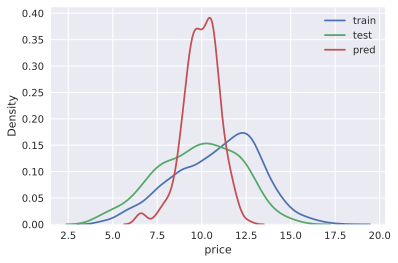

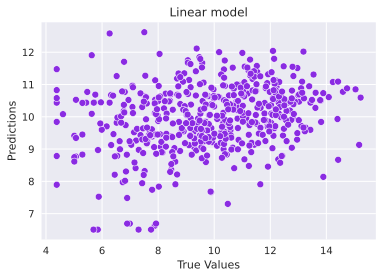

In [63]:
target_distr_linear(y_train, y_test, y_pred)   

In [64]:
def inverse_transform(feature):
    return np.expm1(feature)

calc_metrics(inverse_transform(y_test), inverse_transform(y_pred))

*** VAL **: 
MSE:   162956612251.74374
RMSE:  403678.847912228
R2:    -0.0711663721593141
MAE:   132760.68913782426
MedAE: 27380.00018413807
------------------------------


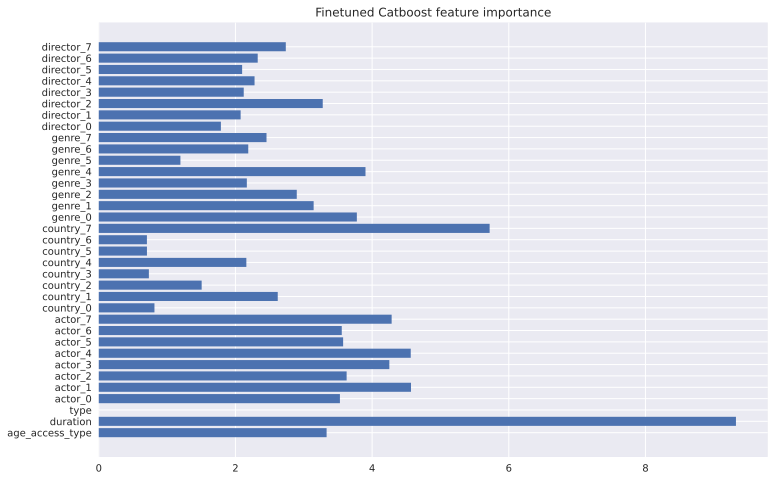

In [65]:
get_feature_imp(best_cat, train_dataset)

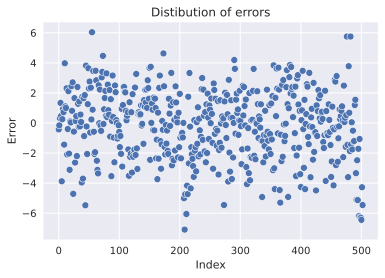

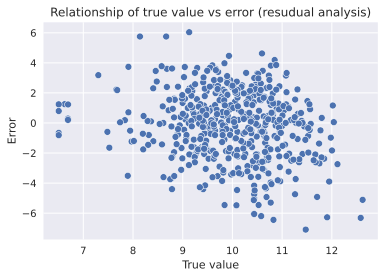

In [66]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)